<!-- <center><center><img src="https://raw.githubusercontent.com/makaires77/fioce/master/assets/logo_fioce.png" 
style="height:150px" alt="Logo_Fiocruz"></center></center> -->

<center><center><img src="https://user-images.githubusercontent.com/61051085/81343928-3ce9d500-908c-11ea-9850-0210b4e94ba0.jpg" 
style="height:150px" alt="Logo_Unifor"></center></center>

## <center>Análise estatística para avaliar utilização dos dados dos<br />  currículos Lattes para modelo de Grafo de análises em PDI. </center>

    Antonio Marcos Aires Barbosa

# <b>INTRODUÇÃO</b>

A análise de Grafos permite obter insights como produtos de análises em contextos da realidade com base em modelos capazes de lidar dados heterogêneos e relações complexas.


Neste trabalho propomos uma análise dos dados de pesquisa acadêmica tendo como fonte de dados os currículo Lattes de servidores da unidade Fiocruz Ceará.

# <b>FASE 0: Preparar e Testar Ambiente</b>

In [ ]:
## Configurar exibição dos dataframes do pandas na tela
from getpass import getpass
import subprocess
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('colheader_justify', 'left')
pd.set_option('display.max_rows', 600)

def check_update():
    # Caminho para o seu script
    script_path = './../../../../scripts/update_chromedriver.sh'

    # Executar o script sem a senha do sudo inicialmente para verificar as versões
    command = f"bash {script_path}"
    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()

    # Verificar se a atualização é necessária com base na saída do script
    output = stdout.decode()
    if "Versões do Chromedriver e Google Chrome estão compatíveis e atualizadas." in output:
        print("As versões do Chromedriver e Google Chrome estão atualizadas. Continuando execução...")
    else:
        print("As versões precisam ser atualizadas, insira sua senha sudo...")
        # Se a atualização for necessária, solicitar a senha do sudo
        sudo_password = getpass("Por favor, insira sua senha sudo:")

        # Executar o script com a senha do sudo
        command = f"echo '{sudo_password}' | sudo -S bash {script_path}"
        process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        stdout, stderr = process.communicate()

        # Limpar a saída para segurança
        clear_output(wait=True)

        # Exibir resultados
        print(stdout.decode())
        print(stderr.decode())

check_update()

In [ ]:
# import os
# os.listdir('./../../../../')

# !pip3 install --upgrade plotly
# !pip3 install omegaconf --upgrade

# import tqdm
# print(tqdm.__version__)

## requirements.txt
# numpy
# pandas
# networkx
# seaborn
# torch
# matplotlib
# h5py
# requests
# nltk
# Pillow
# PyPDF2
# neo4j
# urllib3
# tqdm
# Flask
# scikit-learn
# py2neo
# beautifulsoup4
# pyjarowinkler
# IPython

# !pip install -r ./../../../../requirements.txt

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import os, sys, pip, time, h5py, json
import requests, urllib, torch, sqlite3, asyncio
import glob, psutil, platform, subprocess, nltk
import warnings, logging, traceback, csv, string, re

from PIL import Image
from io import BytesIO
from pprint import pprint
from PyPDF2 import PdfReader
from string import Formatter
from neo4j import GraphDatabase
from nltk.corpus import stopwords
from urllib3.util.retry import Retry
from tqdm.notebook import trange, tqdm
from datetime import datetime, timedelta
from flask import render_template_string
from requests.adapters import HTTPAdapter
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from typing import Any, List, Dict, Optional
from py2neo import Graph, Node, Relationship
from urllib.parse import urlparse, parse_qs
from typing import List, Optional, Dict, Union
from collections import deque, defaultdict, Counter
from bs4 import BeautifulSoup, Tag, NavigableString
from pyjarowinkler.distance import get_jaro_distance
from sklearn.feature_extraction.text import TfidfVectorizer
from IPython.display import clear_output, display, HTML

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common import exceptions
from selenium.common.exceptions import (
    NoSuchElementException, 
    StaleElementReferenceException,
    ElementNotInteractableException,
    TimeoutException,
    WebDriverException
)

## Configurar exibição dos dataframes do pandas na tela
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('colheader_justify', 'left')
pd.set_option('display.max_rows', 600)

delay = 10
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
def strfdelta(tdelta, fmt='{H:02}h {M:02}m {S:02}s', inputtype='timedelta'):
    from string import Formatter
    
    """Convert a datetime.timedelta object or a regular number to a custom-formatted string, 
    just like the stftime() method does for datetime.datetime objects.

    The fmt argument allows custom formatting to be specified.  Fields can 
    include seconds, minutes, hours, days, and weeks.  Each field is optional.

    Some examples:
        '{D:02}d {H:02}h {M:02}m {S:02}s' --> '05d 08h 04m 02s' (default)
        '{W}w {D}d {H}:{M:02}:{S:02}'     --> '4w 5d 8:04:02'
        '{D:2}d {H:2}:{M:02}:{S:02}'      --> ' 5d  8:04:02'
        '{H}h {S}s'                       --> '72h 800s'

    The inputtype argument allows tdelta to be a regular number instead of the  
    default, which is a datetime.timedelta object.  Valid inputtype strings: 
        's', 'seconds', 
        'm', 'minutes', 
        'h', 'hours', 
        'd', 'days', 
        'w', 'weeks'
    """

    # Convert tdelta to integer seconds.
    if inputtype == 'timedelta':
        remainder = int(tdelta.total_seconds())
    elif inputtype in ['s', 'seconds']:
        remainder = int(tdelta)
    elif inputtype in ['m', 'minutes']:
        remainder = int(tdelta)*60
    elif inputtype in ['h', 'hours']:
        remainder = int(tdelta)*3600
    elif inputtype in ['d', 'days']:
        remainder = int(tdelta)*86400
    elif inputtype in ['w', 'weeks']:
        remainder = int(tdelta)*604800

    f = Formatter()
    desired_fields = [field_tuple[1] for field_tuple in f.parse(fmt)]
    possible_fields = ('W', 'D', 'H', 'M', 'S')
    constants = {'W': 604800, 'D': 86400, 'H': 3600, 'M': 60, 'S': 1}
    values = {}
    
    for field in possible_fields:
        if field in desired_fields and field in constants:
            values[field], remainder = divmod(remainder, constants[field])
    
    return f.format(fmt, **values)

def tempo(start, end):
    from datetime import timedelta
        
    t=end-start

    tempo = timedelta(
        weeks   = t//(3600*24*7),
        days    = t//(3600*24),
        seconds = t,
        minutes = t//(60),
        hours   = t//(3600),
        microseconds=t//1000000,
        )
    fmt='{H:2}:{M:02}:{S:02}'
    return strfdelta(tempo)

# https://sh-tsang.medium.com/tutorial-cuda-cudnn-anaconda-jupyter-pytorch-installation-in-windows-10-96b2a2f0ac57

In [ ]:
def check_path():
    try:
        # Tenta obter a variável de ambiente PATH
        path_output = subprocess.check_output("echo $PATH", shell=True).decode('utf-8').strip()
        return path_output
    except Exception as e:
        print("Erro ao obter PATH:", e)
    return path_output

def check_nvcc():
    # Identify the operating system
    os_type = platform.system()

    # Depending on the operating system, alter the command
    if os_type == "Linux":
        nvcc_path = "/usr/local/cuda/bin/nvcc"
        # Check if the nvcc executable exists in the path
        if not os.path.exists(nvcc_path):
            print("NVCC not found in the expected location for Linux.")
            return
    elif os_type == "Windows":
        # Construct the potential paths where NVCC could be located
        cuda_paths = glob.glob('C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v*/bin/nvcc.exe')
        if cuda_paths:
            nvcc_path = cuda_paths[0]  # Take the first match
        else:
            print("NVCC not found in the default installation paths for Windows.")
            return
    else:
        print("Unsupported Operating System.")
        return

    # Try to retrieve the NVCC version using the found path
    try:
        nvcc_output = subprocess.check_output([nvcc_path, '-V'], stderr=subprocess.STDOUT).decode()
        print(nvcc_output)
    except subprocess.CalledProcessError as e:
        print(f"Failed to execute NVCC: {e.output.decode()}")
    except OSError as e:
        print(f"NVCC not found: {e.strerror}")

def try_amb():
    ## Visualizar versões dos principais componentes
    
    pyVer      = sys.version
    pipVer     = pip.__version__
    
    print('\nVERSÕES DAS PRINCIPAIS BIBLIOTECAS INSTALADAS NO ENVIROMENT')
    print('Interpretador em uso:', sys.executable)
    
    # Improved handling of the 'CONDA_DEFAULT_ENV' environment variable
    try:
        print('    Ambiente Conda ativado:', os.environ['CONDA_DEFAULT_ENV'])
    except KeyError:
        print('    Ambiente Conda ativado: Não disponível')
    
    print('     Python: ' + pyVer, '\n        Pip:', pipVer, '\n')

def get_cpu_info_windows():
    import subprocess

    try:
        return subprocess.check_output("wmic cpu get Name", shell=True).decode('utf-8').split('\n')[1].strip()
    except:
        return "Informação não disponível"

def get_cpu_info_unix():
    import subprocess
    try:
        return subprocess.check_output("lscpu", shell=True).decode('utf-8')
    except:
        try:
            return subprocess.check_output("sysctl -n machdep.cpu.brand_string", shell=True).decode('utf-8').strip()
        except:
            return "Informação não disponível"

def try_cpu():
    # Métricas da CPU
    cpu_percent = psutil.cpu_percent(interval=1)
    cpu_count_logical = psutil.cpu_count(logical=True)
    cpu_count_physical = psutil.cpu_count(logical=False)
    cpu_freq = psutil.cpu_freq()
    cpu_times_percent = psutil.cpu_times_percent(interval=1)

    # Informação específica do modelo do processador
    if platform.system() == "Windows":
        cpu_model = get_cpu_info_windows()
    else:
        cpu_model = get_cpu_info_unix()

    # Informações adicionais sobre o Processador
    cpu_brand = platform.processor()
    cpu_architecture = platform.architecture()[0]
    cpu_machine_type = platform.machine()
    
    # Métricas da Memória RAM
    ram = psutil.virtual_memory()
    total_ram = ram.total / (1024 ** 3)  # Em GB
    used_ram = ram.used / (1024 ** 3)  # Em GB
    
    # Métricas do Espaço em Disco
    disk = psutil.disk_usage('/')
    total_disk = disk.total / (1024 ** 3)  # Em GB
    used_disk = disk.used / (1024 ** 3)  # Em GB
    free_disk = (total_disk - used_disk)
    used_disk_percent = (used_disk / total_disk) * 100
    free_disk_percent = (1 - (used_disk / total_disk)) * 100

    # Exibição das Métricas
    print(f"\nMarca do Processador: {cpu_brand}")
    print(f"Modelo do Processador: {cpu_model}")
    print(f"Frequência da CPU: {np.round(cpu_freq.current,2)} MHz")
    # print(f"Tipo de Máquina: {cpu_machine_type}")
    print(f"Arquitetura do Processador: {cpu_architecture}")
    print(f"Número de CPUs físicas: {cpu_count_physical}")
    print(f"Número de CPUs lógicas: {cpu_count_logical}")
    print(f"Uso atual CPU: {cpu_percent}%")
    print(f"Tempos de CPU: user={cpu_times_percent.user}%, system={cpu_times_percent.system}%, idle={cpu_times_percent.idle}%")
    print(f"\nTotal de RAM: {total_ram:>5.2f} GB")
    print(f"Usado em RAM: {used_ram:>5.2f} GB")
    print(f"Espaço Total em disco: {total_disk:>7.2f} GB")
    print(f"Espaço em disco usado: {used_disk:>7.2f} GB {used_disk_percent:>4.1f}%")
    print(f"Espaço em disco livre: {free_disk:>7.2f} GB {free_disk_percent:>4.1f}%")

def try_gpu():
    print('\nVERSÕES DOS DRIVERS CUDA, PYTORCH E GPU')
    try:
        check_nvcc()
    except Exception as e:
        print("NVCC não encontrado:",e,"\n")
    try:
        import torch
        print('    PyTorch:',torch.__version__)
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        print('Dispositivo:',device)
        print('Disponível :',device,torch.cuda.is_available(),' | Inicializado:',torch.cuda.is_initialized(),'| Capacidade:',torch.cuda.get_device_capability(device=None))
        print('Nome GPU   :',torch.cuda.get_device_name(0),'         | Quantidade:',torch.cuda.device_count())
    except Exception as e:
        print('  ERRO!! Ao configurar a GPU:',e,'\n')

def try_folders(drives, pastas, pastasraiz):
    """
    Function to search for chromedriver in specified folders on both Windows and Unix-like systems.

    Parameters:
    drives (list): List of drives to search in.
    pastas (list): List of folder names to look into.
    pastasraiz (list): List of root folder names to look into.

    Returns:
    str: Valid path if found, otherwise raises a FileNotFoundError.

    Raises:
    FileNotFoundError: If chromedriver is not found in any of the specified locations.
    """
    caminho = None  
    for drive in drives:
        for i in pastas:
            for j in pastasraiz:
                try:
                    caminho_testado = os.path.join(drive, i, j)
                    chromedriver_path = os.path.join(caminho_testado, 'chromedriver', 'chromedriver.exe' if os.name == 'nt' else 'chromedriver')

                    if os.path.isfile(chromedriver_path):
                        print(f"Listing files in: {caminho_testado}")
                        print(os.listdir(caminho_testado))
                        caminho = os.path.join(caminho_testado, '')
                        return caminho

                except FileNotFoundError as e:
                    print(f"File not found: {e}")
                    print('Could not locate the working folder.')
                    
    if caminho is None:
        caminho='./home/mak/fioce/'
        raise FileNotFoundError("Chromedriver could not be located in the specified directories.")

    return caminho

def try_browser(raiz):
    print('\nVERSÕES DO BROWSER E DO CHROMEDRIVER INSTALADAS')
    import platform
    from selenium import webdriver
    from selenium import webdriver
    from selenium.webdriver.chrome.service import Service

    try:
        # Caminho para o seu chromedriver
        if platform.system() == "Windows":
            driver_path=raiz+'\\chromedriver\\chromedriver.exe'
        else:
            driver_path=raiz+'chromedriver/chromedriver'
        print(driver_path)
        service = Service(driver_path)
        driver = webdriver.Chrome(service=service)
        str1 = driver.capabilities['browserVersion']
        str2 = driver.capabilities['chrome']['chromedriverVersion'].split(' ')[0]
        print(f'     Versão do browser: {str1}')
        print(f'Versão do chromedriver: {str2}')
        print()
        driver.quit()

        if str1[0:3] != str2[0:3]: 
            print(f"Versões incompatíveis, atualizar chromedriver!")
            print(f'  Baixar versão atualizada do Chromedriver em:')
            print(f'  https://googlechromelabs.github.io/chrome-for-testing/#stable')
            print(f'     Ex:. Chromedriver Versão 119 para Windows:')
            print(f'	   https://edgedl.me.gvt1.com/edgedl/chrome/chrome-for-testing/119.0.6045.105/win64/chromedriver-win64.zip')
            print(f'     Ex:. Chromedriver Versão 119 para Linux:')
            print(f'       https://edgedl.me.gvt1.com/edgedl/chrome/chrome-for-testing/119.0.6045.105/linux64/chromedriver-linux64.zip')
    except Exception as e:
        print(e)

def try_chromedriver(caminho):
    try:
        import os
        os.listdir(caminho)
        raiz=caminho
    except Exception as e:
        raiz=caminho

    finally:
        print(raiz)
    return raiz

In [ ]:
def definir_sistema(pastaraiz):
    """
    Function to define the system and prepare local folders.

    Parameters:
    pastaraiz (str): Root folder for the operation.

    Returns:
    tuple: A tuple containing the path (caminho), drive, and user (usuario).

    Raises:
    EnvironmentError: If the operating system is not recognized.
    """
    # Initialize variables
    caminho = ''
    drive = ''
    usuario = ''

    sistema_operacional = sys.platform

    try:
        if 'linux' in sistema_operacional:
            print('Sistema operacional Linux...')
            linux_users = ['mak/', 'marcos/']
            drive = '/home/'
            for user in linux_users:
                temp_caminho = os.path.join(drive, user, pastaraiz)
                if os.path.isdir(temp_caminho):
                    usuario = user
                    caminho = os.path.join(drive, usuario, pastaraiz, '')
                    break

        elif 'win32' in sistema_operacional:
            print('Sistema operacional Windows...')
            windows_users = ['\\Users\\marco\\', '\\Users\\marcos.aires\\']
            drive = 'C:'
            # print('Procurando em:')
            for user in windows_users:
                temp_caminho = os.path.join(drive, user, pastaraiz)
                print(f"  {temp_caminho}")
                if os.path.isdir(temp_caminho):
                    usuario = user
                    caminho = os.path.join(drive, usuario, pastaraiz, '')
                    break
                else:
                    pathzip, pathcsv, pathjson, pathfig, caminho, pathout = preparar_pastas(pastaraiz)
                    if os.path.isdir(caminho):
                        usuario = user
        else:
            raise EnvironmentError('SO não reconhecido')

    except FileNotFoundError as e:
        print('  ERRO!! Diretório não encontrado!')
        print(e)
    except EnvironmentError as e:
        print('  ERRO!! Sistema Operacional não suportado!')
        print(e)

    if not caminho:
        print('  ERRO!! Caminho não foi definido!')

    print(f'Pasta armazenagem local {caminho}\n')

    return caminho, drive, usuario

def preparar_pastas(caminho):
    # caminho, drive, usuario = definir_sistema(pastaraiz)
    # caminho = drive+':/'+usuario+pastaraiz
    # caminho = drive+':/'+pastaraiz

    # Check if caminho is empty or None
    if not caminho:
        raise ValueError("Variável 'caminho' vazia. Não é possível criar os diretórios.")

    if os.path.isdir(caminho) is False:
        os.mkdir(caminho)
        if os.path.isdir(caminho+'/xml_zip'):
            print ('Pasta para os arquivo xml já existe!')
        else:
            os.mkdir(caminho+'/xml_zip')
            print ('Pasta para arquivo xml criada com sucesso!')
        if os.path.isdir(caminho+'/csv'):
            print ('Pasta para os arquivo CSV já existe!')
        else:
            os.mkdir(caminho+'/csv')
            print ('Pasta para arquivo CSV criada com sucesso!')
        if os.path.isdir(caminho+'/json'):
            print ('Pasta para os arquivo JSON já existe!')
        else:
            os.mkdir(caminho+'/json')
            print ('Pasta para JSON criada com sucesso!')
        if os.path.isdir(caminho+'/fig'):
            print ('Pasta para figuras já existe!')
        else:
            os.mkdir(caminho+'/fig')
            print ('Pasta para JSON criada com sucesso!')
    else:
        if os.path.isdir(caminho+'/xml_zip'):
            print ('Pasta para os xml já existe!')
        else:
            os.mkdir(caminho+'/xml_zip')
            print ('Pasta para xml criada com sucesso!')
        if os.path.isdir(caminho+'/csv'):
            print ('Pasta para os CSV já existe!')
        else:
            os.mkdir(caminho+'/csv')
            print ('Pasta para CSV criada com sucesso!')
        if os.path.isdir(caminho+'/json'):
            print ('Pasta para os JSON já existe!')
        else:
            os.mkdir(caminho+'/json')
            print ('Pasta para JSON criada com sucesso!')
        if os.path.isdir(caminho+'/fig'):
            print ('Pasta para figuras já existe!')
        else:
            os.mkdir(caminho+'/fig')
            print ('Pasta para figuras criada com sucesso!')
        if os.path.isdir(caminho+'/output'):
            print ('Pasta para saídas já existe!')
        else:
            os.mkdir(caminho+'/output')
            print ('Pasta para saídas criada com sucesso!')            

    pathzip  = caminho+'xml_zip/'
    pathcsv  = caminho+'csv/'
    pathjson = caminho+'json/'
    pathfig  = caminho+'fig/'
    pathaux  = caminho
    pathout  = caminho+'output/'

    print('\nCaminho da pasta raiz', pathaux)
    print('Caminho arquivos  XML', pathzip)
    print('Caminho arquivos JSON', pathjson)
    print('Caminho arquivos  CSV', pathcsv)
    print('Caminho para  figuras', pathfig)
    print('Pasta arquivos saídas', pathout)
    
    return pathzip, pathcsv, pathjson, pathfig, pathaux, pathout


In [ ]:
drives=['C:/Users/','E:/','./home/']
pastas=['marcos.aires/', 'marco/','mak/']
pastaraiz='fioce'
caminho, drive, usuario = definir_sistema(pastaraiz)

try_amb()
try_cpu()
try_gpu()
try_browser(caminho)

pathzip, pathcsv, pathjson, pathfig, pathaux, pathout = preparar_pastas(caminho)

### Classes: Extração e Conversão
    ParseSoup
    LattesScraper
    Neo4jPersister
    DictToHDF5
    DatasetArticlesGenerator
    

## Classe para persistir nós secundários

In [ ]:
class Neo4jPersister:
    def __init__(self, uri, username, password):
        self._driver = GraphDatabase.driver(uri, auth=(username, password))

    def close(self):
        self._driver.close()

    @staticmethod
    def convert_to_primitives(input_data):
        if input_data is None:
            return None
        
        if isinstance(input_data, dict):
            return {key: Neo4jPersister.convert_to_primitives(value) for key, value in input_data.items()}
        
        elif isinstance(input_data, list):
            return [Neo4jPersister.convert_to_primitives(item) for item in input_data]
        
        elif isinstance(input_data, str):
            if 'http://' in input_data or 'https://' in input_data:
                parts = input_data.split(" ")
                new_parts = [urllib.parse.quote(part) if part.startswith(('http://', 'https://')) else part for part in parts]
                return " ".join(new_parts)
            return input_data
        
        elif isinstance(input_data, (int, float, bool)):
            return input_data
        
        else:
            return str(input_data)

    @staticmethod
    def debug_and_convert(input_data):
        try:
            return Neo4jPersister.convert_to_primitives(input_data)
        except:
            print("Conversion failed for:", input_data)
            raise

    def extract_lattes_id(self, infpes_list):
        """Extracts the Lattes ID from the InfPes list."""
        for entry in infpes_list:
            if 'ID Lattes:' in entry:
                # Extracting the numeric portion of the 'ID Lattes:' entry
                return entry.split(":")[1].strip()
        return None

    def persist_data(self, data_dict, label):
        data_dict_primitives = self.convert_to_primitives(data_dict)

        # Extracting the Lattes ID from the provided structure
        lattes_id = self.extract_lattes_id(data_dict.get("InfPes", []))
        
        if not lattes_id:
            print("Lattes ID not found or invalid.")
            return
        
        # Flatten the "Identificação" properties into the main dictionary
        if "Identificação" in data_dict_primitives:
            id_properties = data_dict_primitives.pop("Identificação")
            
            if isinstance(id_properties, dict):
                for key, value in id_properties.items():
                    # Adding a prefix to avoid potential property name conflicts
                    data_dict_primitives[f"Identificação_{key}"] = value
            else:
                # If it's not a dictionary, then perhaps store it as a single property (optional)
                data_dict_primitives["Identificação_value"] = id_properties

        with self._driver.session() as session:
            query = f"MERGE (node:{label} {{lattes_id: $lattes_id}}) SET node = $props"
            session.run(query, lattes_id=lattes_id, props=data_dict_primitives)

    def update_data(self, node_id, data_dict):
        data_dict_primitives = self.convert_to_primitives(data_dict)
        with self._driver.session() as session:
            query = f"MATCH (node) WHERE id(node) = {node_id} SET node += $props"
            session.run(query, props=data_dict_primitives)

    def parse_area(self, area_string):
        """Parses the area string and returns a dictionary with the parsed fields."""
        parts = area_string.split(" / ")
        area_data = {}
        for part in parts:
            key, _, value = part.partition(":")
            area_data[key.strip()] = value.strip()
        return area_data

    def process_all_person_nodes(self):
        """Iterates over all Person nodes and persists secondary nodes and relationships."""
        with self._driver.session() as session:
            result = session.run("MATCH (p:Person) RETURN p.name AS name, p.`Áreas de atuação` AS areas")

            for record in result:
                person_name = record["name"]
                
                # Check if name or areas is None
                if person_name is None or record["areas"] is None:
                    print(f"Skipping record for name {person_name} due to missing name or areas.")
                    continue

                # Check if the areas data is already in dict form
                if isinstance(record["areas"], dict):
                    areas = record["areas"]
                else:
                    # Attempt to convert from a string representation (e.g., JSON)
                    try:
                        areas = json.loads(record["areas"])
                    except Exception as e:
                        print(f"Failed to parse areas for name {person_name}. Error: {e}")
                        continue
                
                self.persist_secondary_nodes(person_name, areas)

In [ ]:
class DictToHDF5:
    def __init__(self, data_list):
        self.data_list = data_list

    def create_dataset(self, filename, directory=None):
        with h5py.File(f"{directory or ''}{filename}", "w") as f:
            null_group = f.create_group("0000")
            for person_dict in self.data_list:  # Corrigido de self.data para self.data_list
                if 'curriculo' not in person_dict:
                    name = person_dict.get('name', 'Unknown')  # Uso de get() para evitar KeyError
                    null_group.attrs[name] = "No curriculum"  # Adicionando como atributos ao grupo '0000'
                    continue
                person_group = f.create_group(person_dict['id'])
                for key, value in person_dict.items():
                    if value is None:
                        continue
                    if isinstance(value, list):
                        if not value:  # Skip empty lists
                            continue

                        dtype = type(value[0])
                        if dtype == str:
                            dt = h5py.string_dtype(encoding='utf-8')
                            person_group.create_dataset(key, (len(value),), dtype=dt, data=value)
                        else:
                            value = np.array(value, dtype=dtype)
                            person_group.create_dataset(key, data=value)
                    elif isinstance(value, str):
                        dt = h5py.string_dtype(encoding='utf-8')
                        person_group.create_dataset(key, (1,), dtype=dt, data=value)
                    elif isinstance(value, dict) or isinstance(value, list):
                        json_str = json.dumps(value)
                        dt = h5py.string_dtype(encoding='utf-8')
                        person_group.create_dataset(key, (1,), dtype=dt, data=json_str)
                    else:
                        person_group.create_dataset(key, data=value)

    def extract_id_lattes(self, data_dict):
        inf_pes = data_dict.get('InfPes', [])
        for item in inf_pes:
            if 'ID Lattes:' in item:
                return item.split('ID Lattes: ')[-1]
        return "0000" + str(data_dict.get("name"))

    # Para visualização
    @staticmethod
    def print_hdf5_structure(hdf5_file_path: str, indent=0):
        """
        Imprime a estrutura do arquivo HDF5 com informações adicionais.
        
        Parâmetros:
        - hdf5_file_path: str, caminho para o arquivo HDF5.
        - indent: int, nível de recuo para representação hierárquica (default=0).
        """
        with h5py.File(hdf5_file_path, 'r') as file:
            DictToHDF5._print_hdf5_group_structure(file, indent)
            
    @staticmethod
    def _print_hdf5_group_structure(group, indent=0):
        """
        Auxilia na impressão da estrutura hierárquica do grupo HDF5.
        
        Parâmetros:
        - group: h5py.Group, grupo HDF5 para imprimir.
        - indent: int, nível de recuo para representação hierárquica.
        """
        for key, value in group.items():
            print(" " * indent + f"{key} : {str(value)}")

            if isinstance(value, h5py.Group):
                DictToHDF5._print_hdf5_group_structure(value, indent + 4)
                
            elif isinstance(value, h5py.Dataset):
                # Informações adicionais sobre o conjunto de dados
                print(" " * (indent + 4) + f"Shape: {value.shape}, Dtype: {value.dtype}")
                
                # Visualização do conteúdo do conjunto de dados
                if value.size < 10:  # imprimir todo o conjunto de dados se ele for pequeno
                    print(" " * (indent + 4) + f"Data: {value[...]}")
                else:  # imprimir uma amostra dos dados se o conjunto de dados for grande
                    sample = value[...]
                    if value.ndim > 1:
                        sample = sample[:min(3, value.shape[0]), :min(3, value.shape[1])]
                    else:
                        sample = sample[:min(3, value.size)]
                    print(" " * (indent + 4) + f"Sample Data: {sample}")

    @staticmethod
    def print_json_structure(json_file_path: str, indent: int = 0, max_sample_size: int = 10):
        """
        Imprime a estrutura e os dados do arquivo JSON.

        Parâmetros:
        - json_file_path: str, caminho para o arquivo JSON.
        - indent: int, nível de recuo para representação hierárquica (default=0).
        - max_sample_size: int, tamanho máximo da amostra para visualização (default=10).
        """
        with open(json_file_path, 'r') as file:
            json_data = json.load(file)
            DictToHDF5._print_json_data_structure(json_data, indent, max_sample_size)

    @staticmethod
    def _print_json_data_structure(json_data, indent: int, max_sample_size: int):
        """
        Auxilia na impressão da estrutura e dos dados de um objeto JSON.

        Parâmetros:
        - json_data: qualquer tipo de dado serializável em JSON.
        - indent: int, nível de recuo para representação hierárquica.
        - max_sample_size: int, tamanho máximo da amostra para visualização.
        """
        if isinstance(json_data, dict):
            for key, value in json_data.items():
                print(" " * indent + f"{key}: {type(value).__name__}")
                DictToHDF5._print_json_data_structure(value, indent + 4, max_sample_size)

        elif isinstance(json_data, list):
            print(" " * indent + f"List of length {len(json_data)}")
            sample = json_data[:min(len(json_data), max_sample_size)]
            for index, value in enumerate(sample):
                print(" " * (indent + 4) + f"[{index}]: {type(value).__name__}")
                DictToHDF5._print_json_data_structure(value, indent + 8, max_sample_size)

        else:
            print(" " * indent + f"{json_data}")

    # Para persisistir em N4j
    def persist_to_neo4j(self, filepath, neo4j_url, username, password):
        graph = Graph(neo4j_url, auth=(username, password))
        with h5py.File(filepath, 'r') as f:
            for key in f.keys():
                group = f[key]
                properties = {}
                if key == '0000':  # Tratar grupo "0000" diferentemente
                    for attr_name, attr_value in group.attrs.items():
                        properties[attr_name] = attr_value
                    node = Node("NoCurriculumGroup", **properties)  # Criação de um nó específico para o grupo
                else:
                    for ds_key in group.keys():
                        dataset = group[ds_key]
                        properties[ds_key] = dataset[()]
                    node = Node("Person", **properties)  # Assumindo que o nó seja do tipo "Person"
                graph.create(node)

In [ ]:
class ParseSoup:
    def __init__(self, driver):
        self.configure_logging()
        self.base_url = 'http://buscatextual.cnpq.br'
        self.session = requests.Session()
        self.failed_extractions = []
        self.driver = driver
        self.delay = 10
        self.soup = None

    def configure_logging(self):
        # Configura o logging para usar um novo arquivo de log, substituindo o antigo
        logging.basicConfig(filename='lattes_scraper.log', level=logging.INFO, filemode='w')

    def __enter__(self):
        return self  # the object to bind to the variable in the `as` clause

    def __exit__(self, exc_type, exc_value, traceback):
        self.driver.quit()
        self.driver = None

    def to_json(self, data_dict: Dict, filename: str) -> None:
        try:
            with open(filename, 'w') as f:
                json.dump(data_dict, f)
        except Exception as e:
            logging.error(f"An error occurred while saving to JSON: {e}")

    def to_hdf5(self, processed_data: List[Dict], hdf5_filename: str) -> None:
        try:
            with h5py.File(hdf5_filename, 'w') as hdf5_file:
                for i, data in enumerate(processed_data):
                    # Serializa o dicionário como uma string JSON antes de armazená-lo.
                    serialized_data = json.dumps(data)
                    hdf5_file.create_dataset(str(i), data=serialized_data)
        except Exception as e:
            logging.error(f"An error occurred while saving to HDF5: {e}")

    def dictlist_to_json(self, data_list: List[Dict], filename: str) -> None:
        try:
            with open(filename, 'w') as f:
                json.dump(data_list, f)
        except Exception as e:
            logging.error(f"An error occurred while saving to JSON: {e}")

    def dictlist_to_hdf5(self, data_list: List[Dict], filename: str, directory=None) -> None:
        try:
            converter = DictToHDF5(data_list)
            converter.create_dataset(filename, directory)
        except Exception as e:
            logging.error(f"An error occurred while saving to HDF5: {e}")
    
    def format_string(self, input_str):
        # Verifica se a entrada é uma string de oito dígitos
        if input_str and len(input_str) == 9:
            return input_str
        elif input_str and len(input_str) == 8:
            # Divide a string em duas partes
            part1 = input_str[:4]
            part2 = input_str[4:]
            # Concatena as duas partes com um hífen
            formatted_str = f"{part1}-{part2}"
            return formatted_str
        else:
            return input_str
            
    def extract_tit1_soup(self, soup, data_dict=None, verbose=False):
        if data_dict is None:
            data_dict = {}
        elm_main_cell = soup.find("div", class_="layout-cell-pad-main")
        divs_title_wrapper = elm_main_cell.find_all('div', class_='title-wrapper')
        # Títulos contendo subseções
        tit1a = ['Identificação','Endereço','Formação acadêmica/titulação','Pós-doutorado','Formação Complementar',
                'Linhas de pesquisa','Projetos de pesquisa','Projetos de extensão','Projetos de desenvolvimento', 'Revisor de periódico','Revisor de projeto de fomento','Áreas de atuação','Idiomas','Inovação']
        tit1b = ['Atuação Profissional'] # dados com subseções
        for div_title_wrapper in divs_title_wrapper:
            # Encontre o título do bloco
            try:
                titulo = div_title_wrapper.find('h1').text.strip()
            except:
                titulo = 'Não disponível na tag h1 do Currículo Lattes'
            data_cells = div_title_wrapper.find_all("div", class_="data-cell")
            # Verifique se o título está na lista 'tit1'
            if titulo in tit1a:
                if verbose:
                    print(titulo)
                data_dict[titulo] = {}  # Inicialize o dicionário para o título 'Eventos'
                for data_cell in data_cells:
                    divs_layout_cell_3 = data_cell.find_all('div', class_='layout-cell-3')
                    divs_layout_cell_9 = data_cell.find_all('div', class_='layout-cell-9')
                    keys = []
                    vals = []
                    for i, j in zip(divs_layout_cell_3, divs_layout_cell_9):
                        if divs_layout_cell_3 and divs_layout_cell_9:
                            key = i.find('div', class_='layout-cell-pad-5 text-align-right')
                            key_text = key.get_text().strip().replace('\n', ' ').replace('\t', '')
                            keys.append(key_text)
                            val = j.find('div', class_='layout-cell-pad-5')
                            val_text = val.get_text().strip().replace('\n', ' ').replace('\t', '')
                            vals.append(val_text)
                            if verbose:
                                print(f'      {key_text:>3}: {val_text}')
                    agg_dict = {key: val for key, val in zip(keys, vals)}
                    data_dict[titulo] = Neo4jPersister.convert_to_primitives(agg_dict)
            if titulo in tit1b:
                if verbose:
                    print(titulo)
                data_dict[titulo] = {}  # Inicialize o dicionário para o título 'Eventos'
                for data_cell in data_cells:
                    sections = data_cell.find_all("div", class_="inst_back")               
                    if verbose:
                        print(len(sections), 'seções')
                    for section in sections:
                        section_name = section.find('b').get_text().strip()
                        data_dict[titulo][section_name] = []
                        if verbose:
                            print(section_name)
                        sibling = section.find_next_sibling()
                        current_data = {}  # Criamos um dicionário para armazenar os dados da subseção atual
                        while sibling:
                            classes = sibling.get('class', [])
                            if 'layout-cell-3' in classes:  # Data key
                                key = sibling.find("div", class_="layout-cell-pad-5 text-align-right").get_text().strip()
                                sibling = sibling.find_next_sibling()

                                if sibling and 'layout-cell-9' in sibling.get('class', []):  # Check if value is present
                                    val = sibling.find("div", class_="layout-cell-pad-5").get_text().strip().replace('\n', '').replace('\t','')
                                    current_data[key] = val
                                    if verbose:
                                        print(len(current_data.values()), key, val)
                            elif sibling.name == 'br' and 'clear' in sibling.get('class', []):  # Fim de seção/subseção
                                next_sibling = sibling.find_next_sibling()
                                if next_sibling and 'clear' in next_sibling.get('class', []):
                                    sibling = None
                                else:
                                    if current_data:
                                        data_dict[titulo][section_name].append(current_data)  # Armazenamos os dados em uma lista
                            if sibling:
                                sibling = sibling.find_next_sibling()
        return data_dict

    def extract_tit2_soup(self, soup, data_dict=None, verbose=False):
        if data_dict is None:
            data_dict = {}
        database = ''
        total_trab_text = 0
        total_cite_text = 0
        num_fator_h = 0
        data_wos_text = ''
        elm_main_cell = soup.find("div", class_="layout-cell-pad-main")
        divs_title_wrapper = elm_main_cell.find_all('div', class_='title-wrapper')
        tit2 = ['Produções', 'Bancas', 'Orientações']
        for div_title_wrapper in divs_title_wrapper:
            # Encontre o título do bloco
            try:
                titulo = div_title_wrapper.find('h1').text.strip()
            except:
                titulo = 'Não disponível na tag h1 do Currículo Lattes'
            data_cells = div_title_wrapper.find_all("div", class_="data-cell")
            # Verifique se o título está na lista 'tit2'
            if titulo in tit2:
                if verbose:
                    print(f'Título: {titulo}')
                data_dict[titulo] = {}  # Inicialize o dicionário para o título 'Eventos'
                for data_cell in data_cells:
                    sections = data_cell.find_all("div", class_="inst_back")
                    if verbose:
                        print(len(sections), 'seções')
                    for section in sections:
                        section_name = section.find('b').get_text().strip()
                        data_dict[titulo][section_name] = {}
                        if verbose:
                            print(f'Seção: {section_name}')
                        sibling = section.find_next_sibling()
                        current_subsection = None
                        current_data = {}  # Criamos um dicionário para armazenar os dados da subseção atual
                        if section_name == 'Produção bibliográfica':
                            subsections = section.find_next_siblings('div', class_='cita-artigos')
                            if verbose:
                                print(len(subsections), 'subseções')                       
                            for subsection in subsections:                            
                                if subsection:
                                    subsection_name = subsection.find('b').get_text().strip()
                                    if verbose:
                                        print(f'    Subseção: {subsection_name}') # nomes de subseção como ocorrências 
                                        print(f'    {len(subsection)} divs na subseção {subsection_name}')                                
                                    if subsection_name == 'Citações':
                                        current_subsection = subsection_name
                                        data_dict[titulo][section_name]['Citações'] = {}
                                        sub_section_list = []  
                                        ## Extrair quantidade de citações e fator H das divs de subseção com classe lyout-cell-12
                                        next_siblings = subsection.find_next_siblings("div", class_="layout-cell-12") #acha os irmãos da Subseção
                                        for sibling in next_siblings:
                                            citation_counts = sibling.findChildren("div", class_="web_s")  # Encontra as divs que tem os Valores de Citações
                                            if citation_counts:
                                                for i in citation_counts:
                                                    database = i.get_text()
                                                    total_trab = i.find_next_sibling("div", class_="trab")
                                                    if total_trab:
                                                        total_trab_text = total_trab.get_text().split("Total de trabalhos:")[1]
                                                    total_cite = i.find_next_sibling("div", class_="cita")
                                                    if total_cite:
                                                        total_cite_text = total_cite.get_text().split("Total de citações:")[1]
                                                    fator_h = i.find_next_sibling("div", class_="fator").get_text() if i.find_next_sibling("div", class_="fator") else None
                                                    num_fator_h = float(fator_h.replace('Fator H:', '')) if fator_h else None
                                                    data_wos = i.find_next_sibling("div", class_="detalhes")
                                                    if data_wos:
                                                        try:
                                                            data_wos_text = data_wos.get_text().split("Data:")[1].strip()
                                                        except:
                                                            data_wos_text = data_wos.get_text()
                                                    # Converta os valores para tipos de dados adequados
                                                    total_trab = int(total_trab_text)
                                                    total_cite = int(total_cite_text)
                                                    citation_numbers = {
                                                        "Database": database,
                                                        "Total de trabalhos": total_trab,
                                                        "Total de citações": total_cite,
                                                        "Índice_H": num_fator_h,
                                                        "Data": data_wos_text
                                                    }
                                                    # Verifique se a subseção atual já existe no dicionário
                                                    if 'Citações' not in data_dict[titulo][section_name]:
                                                        data_dict[titulo][section_name]['Citações'] = {}  # Inicialize como uma lista vazia
                                                    data_dict[titulo][section_name]['Citações'] = citation_numbers
                                                    if verbose:
                                                        print(f'        {database:>15}: {total_trab:>3} trabalhos, {total_cite:>3} citações, {fator_h}, {data_wos}')    
                            ## Encontrar a div irmã de div subseção com classe layout-cell-12 com artigos
                            vals_jcr = []
                            div_artigo_geral = data_cell.findChild("div", id="artigos-completos")
                            if verbose:
                                print(f'Encontrada {len(div_artigo_geral)} div geral de artigos')
                            if div_artigo_geral:
                                divs_artigos = div_artigo_geral.find_all('div', class_='artigo-completo')
                                if verbose:
                                    print(len(divs_artigos), 'divs de artigos')
                                current_data = {}  # Criamos um dicionário para armazenar os dados da subseção atual
                                if divs_artigos:                              
                                    for div_artigo in divs_artigos:
                                        data_dict[titulo][section_name]['Artigos completos publicados em periódicos'] = {}
                                        ## Extrair filhos da classes de artigos completos que estão à frente
                                        sibling = div_artigo.findChild()
                                        while sibling:
                                            classes = sibling.get('class', [])
                                            if 'layout-cell-1' in classes:  # Data key
                                                key = sibling.find("div", class_="layout-cell-pad-5 text-align-right").get_text().strip()
                                                sibling = sibling.find_next_sibling()
                                                if sibling and 'layout-cell-11' in sibling.get('class', []):  # Check if value is present
                                                    val = sibling.find("div", class_="layout-cell-pad-5").get_text().strip().replace('\n', '').replace('\t','')
                                                    info_dict = {
                                                        'data-issn': 'NULL',
                                                        'impact-factor': 'NULL',  
                                                        'jcr-year': 'NULL',
                                                    }
                                                    # Remova as tags span da div
                                                    for span in sibling.find_all('span'):
                                                        span.extract()
                                                    val_text = sibling.get_text(strip=True).strip().replace('\n',' ').replace('\t','')
                                                    current_data[key] = val_text
                                                    if verbose:
                                                        print(len(current_data.values()), key, val)
                                                    sup_element = sibling.find('sup')
                                                    if sup_element:
                                                        raw_jcr_data = sup_element.get_text()
                                                        # print('sup_element:',sup_element)
                                                        img_element = sup_element.find('img')
                                                        # print('img_element:',img_element)
                                                        if img_element:
                                                            original_title = img_element.get('original-title')
                                                            if original_title:
                                                                info_list = original_title.split('<br />') if original_title.split('<br />') else original_title
                                                                if info_list != 'NULL':
                                                                    issn = self.format_string(img_element.get('data-issn'))
                                                                    if verbose:
                                                                        print(f'impact-factor: {info_list[1].split(": ")[1]}')
                                                                    info_dict = {
                                                                        'data-issn': issn,
                                                                        'impact-factor': info_list[1].split(': ')[1],
                                                                        'jcr-year': info_list[1].split(': ')[0].replace('Fator de impacto ','').replace('(','').replace(')',''),
                                                                        'journal': info_list[0],
                                                                    }
                                                            else:
                                                                if verbose:
                                                                    print('Entrou no primeiro Else')
                                                                issn = self.format_string(img_element.get('data-issn'))
                                                                info_dict = {
                                                                    'data-issn': issn,
                                                                    'impact-factor': 'NULL',
                                                                    'jcr-year': 'NULL',
                                                                    'journal': 'NULL',
                                                                }
                                                    else:
                                                        if verbose:
                                                                    print('Entrou no segundo Else')
                                                        info_dict = {
                                                            'data-issn': 'NULL',
                                                            'impact-factor': 'NULL',
                                                            'jcr-year': 'NULL',
                                                            'journal': 'NULL',
                                                        }
                                                    vals_jcr.append(info_dict)
                                                    if verbose:
                                                        print(f'         {info_dict}')
                                                if 'JCR' not in data_dict:
                                                    data_dict['JCR'] = []
                                                if verbose:
                                                    print(len(vals_jcr))
                                                data_dict['JCR'] = vals_jcr
                                            elif sibling.name == 'br' and 'clear' in sibling.get('class', []):  # Fim de seção/subseção
                                                next_sibling = sibling.find_next_sibling()
                                                if next_sibling and 'clear' in next_sibling.get('class', []):
                                                    sibling = None
                                                else:
                                                    if current_data:
                                                        converted_data = Neo4jPersister.convert_to_primitives(current_data)
                                                        data_dict[titulo][section_name]['Artigos completos publicados em periódicos'] = converted_data
                                            if sibling:
                                                sibling = sibling.find_next_sibling()
                        else:
                            while sibling:
                                classes = sibling.get('class', [])
                                if 'cita-artigos' in classes:  # Subsection start
                                    subsection_name = sibling.find('b').get_text().strip()
                                    current_subsection = subsection_name
                                    if verbose:
                                        print(f'    Subseção: {subsection_name}')
                                    data_dict[titulo][section_name][current_subsection] = {}
                                    current_data = {}  # Inicializamos o dicionário de dados da subseção atual
                                elif 'layout-cell-1' in classes:  # Data key
                                    key = sibling.find("div", class_="layout-cell-pad-5 text-align-right").get_text().strip()
                                    sibling = sibling.find_next_sibling()
                                    if sibling and 'layout-cell-11' in sibling.get('class', []):  # Check if value is present
                                        val = sibling.find("div", class_="layout-cell-pad-5").get_text().strip().replace('\n', '').replace('\t','')
                                        current_data[key] = val
                                elif sibling.name == 'br' and 'clear' in sibling.get('class', []):  # Subsection or section end
                                    next_sibling = sibling.find_next_sibling()
                                    if next_sibling and 'clear' in next_sibling.get('class', []):
                                        sibling = None
                                    else:
                                        if current_subsection:
                                            data_dict[titulo][section_name][current_subsection] = Neo4jPersister.convert_to_primitives(current_data)  # Armazenamos os dados da subseção atual
                                if sibling:
                                    sibling = sibling.find_next_sibling()
        
        # Verifique se os dados dos tooltips estão presentes no objeto soup
        if 'tooltips' in soup.attrs:
            tooltips_data = soup.attrs['tooltips']
            agg = []
            for tooltip in tooltips_data:
                agg_data = {}
                # Extração do ano JCR a partir do "original_title"
                if tooltip.get("original_title"):
                    jcr_year = tooltip["original_title"].split(': ')[0].replace('Fator de impacto ','').replace('(','').replace(')','')
                    agg_data["jcr-ano"] = jcr_year
                # Adicionar todas as chaves e valores do tooltip ao dicionário agg_data
                for key, value in tooltip.items():
                    agg_data[key] = value
                agg.append(agg_data)
            data_dict['JCR2'] = agg
        else:
            print('Não foram achados os dados de tooltip')
            print(soup.attrs)
        return data_dict

    def extract_tit3_soup(self, soup, data_dict=None, verbose=False):
        if data_dict is None:
            data_dict = {}
        elm_main_cell = soup.find("div", class_="layout-cell-pad-main")
        divs_title_wrapper = elm_main_cell.find_all('div', class_='title-wrapper')
        # Títulos da seção 'Eventos'
        tit3 = ['Eventos']
        for div_title_wrapper in divs_title_wrapper:
            # Encontre o título do bloco
            try:
                titulo = div_title_wrapper.find('h1').text.strip()
            except:
                titulo = 'Não disponível na tag h1 do Currículo Lattes'
            data_cells = div_title_wrapper.find_all("div", class_="data-cell")
            # Verifique se o título está na lista 'tit3'
            if titulo in tit3:
                if verbose:
                    print(f'Título: {titulo}')
                data_dict[titulo] = {}  # Inicialize o dicionário para o título 'Eventos'
                for data_cell in data_cells:
                    sections = data_cell.find_all("div", class_="inst_back")
                    if verbose:
                        print(len(sections), 'seções')
                    for section in sections:
                        section_name = section.find('b').get_text().strip()
                        data_dict[titulo][section_name] = []
                        if verbose:
                            print(section_name)
                        sibling = section.find_next_sibling()
                        current_data = {}  # Criamos um dicionário para armazenar os dados da subseção atual
                        while sibling:
                            classes = sibling.get('class', [])
                            if 'layout-cell-1' in classes:  # Data key
                                key = sibling.find("div", class_="layout-cell-pad-5 text-align-right").get_text().strip()
                                sibling = sibling.find_next_sibling()

                                if sibling and 'layout-cell-11' in sibling.get('class', []):  # Check if value is present
                                    val = sibling.find("div", class_="layout-cell-pad-5").get_text().strip().replace('\n', '').replace('\t','')
                                    current_data[key] = val
                                    if verbose:
                                        print(len(current_data.values()), key, val)
                            elif sibling.name == 'br' and 'clear' in sibling.get('class', []):  # Fim de seção/subseção
                                next_sibling = sibling.find_next_sibling()
                                if next_sibling and 'clear' in next_sibling.get('class', []):
                                    sibling = None
                                else:
                                    if current_data:
                                        converted_data = Neo4jPersister.convert_to_primitives(current_data)
                                        data_dict[titulo][section_name] = converted_data
                            if sibling:
                                sibling = sibling.find_next_sibling()
        return data_dict

    def extract_data(self, soup):
        """
        Aggregates data from various dictionary sources into a consolidated nested dictionary, 
        ensuring that all nested lists within the dictionaries are transformed into nested dictionaries.
        Parameters:
        - soup: BeautifulSoup object, representing the parsed HTML content.
        Returns:
        - dict: An aggregated dictionary containing the consolidated data.
        """
        self.soup = soup
        
        def convert_list_to_dict(lst):
            """
            Converts a list into a dictionary with indices as keys.
            
            Parameters:
            - lst: list, input list to be transformed.
            
            Returns:
            - dict: Transformed dictionary.
            """
            return {str(i): item for i, item in enumerate(lst)}

        def merge_dict(d1, d2):
            """
            Recursively merges two dictionaries, transforming nested lists into dictionaries.
            Parameters:
            - d1: dict, the primary dictionary into which data is merged.
            - d2: dict or list, the secondary dictionary or list from which data is sourced.
            Returns:
            - None
            """
            # If d2 is a list, convert it to a dictionary first
            if isinstance(d2, list):
                d2 = convert_list_to_dict(d2)
            
            for key, value in d2.items():
                if isinstance(value, list):
                    d2[key] = convert_list_to_dict(value)
                if key in d1 and isinstance(d1[key], dict) and isinstance(value, dict):
                    merge_dict(d1[key], value)
                else:
                    d1[key] = value

        # Extract necessary information from soup
        elm_main_cell = soup.find("div", class_="layout-cell-pad-main")
        info_list = [x.strip() for x in elm_main_cell.find("div", class_="infpessoa").get_text().split('\n') if x.strip() !='']
        name = info_list[0]

        # Initialization of the aggregated_data dictionary
        aggregated_data = {"labels": "Person", "name": name, "InfPes": info_list, "Resumo": [elm_main_cell.find("p", class_="resumo").get_text().strip()]}

        # Data extraction and merging
        for data_extraction_func in [self.extract_tit1_soup, self.extract_tit2_soup, self.extract_tit3_soup]:
            extracted_sections = data_extraction_func(soup)
            for title, data in extracted_sections.items():
                if title not in aggregated_data:
                    aggregated_data[title] = {}
                merge_dict(aggregated_data[title], data)
        return aggregated_data


In [ ]:
def connect_driver(caminho):
    '''
    Conecta ao servidor do CNPq para busca de currículo
    '''
    # print(f'Conectando com o servidor do CNPq...')
    # print(f'Iniciada extração de {len(lista_nomes)} currículos')
    ## https://www.selenium.dev/documentation/pt-br/webdriver/browser_manipulation/
    # options   = Options()
    # options.add_argument("--headless")
    # driver   = webdriver.Chrome(options=options)

    try:
        # Caminho para o chromedriver no sistema local
        if platform.system() == "Windows":
            driver_path=caminho+'chromedriver/chromedriver.exe'
        else:
            driver_path=caminho+'chromedriver/chromedriver'
    except:
        print("Não foi possíve estabelecer uma conexão, verifique o chromedriver")
    
    # print(driver_path)
    service = Service(driver_path)
    driver = webdriver.Chrome(service=service)    
    url_busca = 'http://buscatextual.cnpq.br/buscatextual/busca.do?buscarDoutores=true&buscarDemais=true&textoBusca='
    driver.get(url_busca) # acessa a url de busca do CNPQ   
    driver.set_window_position(-20, -10)
    driver.set_window_size(170, 1896)
    driver.mouse = webdriver.ActionChains(driver)
    return driver

In [ ]:
class LattesScraper:
    def __init__(self, driver, institution, unit, term):
        self.base_url = 'http://buscatextual.cnpq.br'
        self.session = requests.Session()
        self.driver = driver
        self.delay = 30

    def wait_for_element(self, css_selector: str, ignored_exceptions=None):
        """
        Waits for the element specified by the CSS selector to load.
        :param css_selector: CSS selector of the element to wait for
        :param ignored_exceptions: List of exceptions to ignore
        """
        WebDriverWait(self.driver, self.delay, ignored_exceptions=ignored_exceptions).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, css_selector)))

    def paginar(self, driver):
        '''
        Helper function to page results on the search page
        '''
        numpaginas = []
        css_paginacao = "div.paginacao:nth-child(2)"
        try:
            WebDriverWait(self.driver, self.delay).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, css_paginacao)))
            paginacao = self.driver.find_element(By.CSS_SELECTOR, css_paginacao)
            paginas = paginacao.text.split(' ')
            remover = ['', 'anterior', '...']
            numpaginas = [x for x in paginas if x not in remover]
        except Exception as e:
            print('  ERRO!! Ao rodar função paginar():', e)
        return numpaginas

    def retry(self, func, expected_ex_type=Exception, limit=0, wait_ms=500,
              wait_increase_ratio=2, on_exhaust="throw"):
        attempt = 1
        while True:
            try:
                return func()
            except Exception as ex:
                if not isinstance(ex, expected_ex_type):
                    raise ex
                if 0 < limit <= attempt:
                    if on_exhaust == "throw":
                        raise ex
                    return on_exhaust
                attempt += 1
                time.sleep(wait_ms / 1000)
                wait_ms *= wait_increase_ratio

    def find_terms(self, NOME, instituicao, unidade, termo, delay, limite):
        """
        Função para manipular o HTML até abir a página HTML de cada currículo   
        Parâmeteros:
            - NOME: É o nome completo de cada pesquisador
            - Instituição, unidade e termo: Strings a buscar no currículo para reduzir duplicidades
            - driver (webdriver object): The Selenium webdriver object.
            - limite (int): Número máximo de tentativas em casos de erro.
            - delay (int): tempo em milisegundos a esperar nas operações de espera.
        Retorna:
            elm_vinculo, np.NaN, np.NaN, np.NaN, driver.
        Em caso de erro retorna:
            None, NOME, np.NaN, e, driver
        """
        ignored_exceptions=(NoSuchElementException,StaleElementReferenceException,)
        # Inicializando variáveis para evitar UnboundLocalError
        elm_vinculo = None
        qte_resultados = 0
        ## Receber a quantidade de opções ao ler elementos de resultados
        duvidas   = []
        force_break_loop = False
        try:
            # Wait and fetch the number of results
            css_resultados = ".resultado"
            WebDriverWait(self.driver, delay, ignored_exceptions=ignored_exceptions).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, css_resultados)))
            resultados = self.driver.find_elements(By.CSS_SELECTOR, css_resultados)
            ## Ler quantidade de resultados apresentados pela busca de nome
            try:
                css_qteresultados = ".tit_form > b:nth-child(1)"
                WebDriverWait(self.driver, delay).until(
                    EC.presence_of_element_located((By.CSS_SELECTOR, css_qteresultados)))                       
                soup = BeautifulSoup(self.driver.page_source, 'html.parser')
                div_element = soup.find('div', {'class': 'tit_form'})
                match = re.search(r'<b>(\d+)</b>', str(div_element))
                if match:
                    qte_resultados = int(match.group(1))
                    # print(f'{qte_resultados} resultados para {NOME}')
                else:
                    return None, NOME, np.NaN, 'Currículo não encontrado', self.driver
            except Exception as e1:
                print('  ERRO!! Currículo não disponível no Lattes')
                return None, NOME, np.NaN, e1, self.driver
            
            ## Escolher função a partir da quantidade de resultados da lista apresentada na busca
            ## Ao achar clica no elemento elm_vinculo com link do nome para abrir o currículo
            numpaginas = self.paginar(self.driver)
            if numpaginas == [] and qte_resultados==1:
                # capturar link para o primeiro nome resultado da busca
                try:
                    css_linknome = ".resultado > ol:nth-child(1) > li:nth-child(1) > b:nth-child(1) > a:nth-child(1)"
                    WebDriverWait(self.driver, delay).until(
                        EC.presence_of_element_located((By.CSS_SELECTOR, css_linknome)))            
                    elm_vinculo  = self.driver.find_element(By.CSS_SELECTOR, css_linknome)
                    nome_vinculo = elm_vinculo.text
                except Exception as e2:
                    print('  ERRO!! Ao encontrar o primeiro resultado da lista de nomes:', e2)
                    
                    # Call the handle stale file_error function
                    if self.handle_stale_file_error(self.driver):
                        # If the function returns True, it means the error was resolved.
                        # try to get the nome_vinculo again:
                        try:
                            elm_vinculo  = self.driver.find_element(By.CSS_SELECTOR, css_linknome)
                            nome_vinculo = elm_vinculo.text
                        except Exception as e3:
                            print('  ERRO!! Servidor CNPq indisponível no momento, tentar em alguns minutos:', e3)
                            return None, NOME, np.NaN, e3, self.driver
                    else:
                        # If the function returns False, it means the error was not resolved within the given retries.
                        return None, NOME, np.NaN, e2, self.driver

                    print('  Não foi possível extrair por falha no servidor do CNPq:',e)
                    return None, NOME, np.NaN, e2, self.driver
                # print('Clicar no nome único:', nome_vinculo)
                try:
                    self.retry(ActionChains(self.driver).click(elm_vinculo).perform(),
                        wait_ms=20,
                        limit=limite,
                        on_exhaust=(f'  Problema ao clicar no link do nome. {limite} tentativas sem sucesso.'))   
                except Exception as e4:
                    print('  ERRO!! Ao clicar no único nome encontrado anteriormente',e)
                    return None, NOME, np.NaN, e4, self.driver
            
            ## Quantidade de resultados até 10 currículos, acessados sem paginação
            else:
                print(f'       {qte_resultados:>3} homônimos de: {NOME}')
                numpaginas = self.paginar(self.driver)
                numpaginas.append('próximo')
                iteracoes=0
                ## iterar em cada página de resultados
                pagin = qte_resultados//10+1
                count = None
                found = None
                for i in range(pagin+1):
                    # print(i,'/',pagin)
                    iteracoes+=1
                    try:
                        numpaginas = self.paginar(self.driver)
                        # print(f'       Iteração: {iteracoes}. Páginas sendo lidas: {numpaginas}')
                        css_resultados = ".resultado"
                        WebDriverWait(self.driver, delay).until(
                            EC.presence_of_element_located((By.CSS_SELECTOR, css_resultados)))
                        resultados = self.driver.find_elements(By.CSS_SELECTOR, css_resultados)
                    except Exception as e:
                        print('  ERRO!! Ao paginar:',e)
                    ## iterar em cada resultado
                    for n,i in enumerate(resultados):
                        linhas = i.text.split('\n\n')
                        # print(linhas)
                        if 'Stale file handle' in str(linhas):
                            return np.NaN, NOME, np.NaN, 'Stale file handle', self.driver
                        for m,linha in enumerate(linhas):
                            # print(f'\nOrdem da linha: {m+1}, de total de linhas {len(linhas)}')
                            # print('Conteúdo da linha:',linha.lower())
                            # print(linha)
                            try:
                                if instituicao.lower() in linha.lower() or unidade.lower() in linha.lower() or termo.lower() in linha.lower():
                                    # print('Vínculo encontrado!')
                                    count=m
                                    while get_jaro_distance(linhas[count].split('\n')[0], str(NOME)) < 0.75:
                                        count-=1
                                    # print('       Identificado vínculo no resultado:', m+1)
                                    found = m+1
                                    # nome_vinculo = linhas[count].replace('\n','\n       ').strip()
                                    # print(f'       Achado: {nome_vinculo}')
                                    try:
                                        css_vinculo = f".resultado > ol:nth-child(1) > li:nth-child({m+1}) > b:nth-child(1) > a:nth-child(1)"
                                        # print('\nCSS_SELECTOR usado:', css_vinculo)
                                        WebDriverWait(self.driver, delay).until(
                                            EC.presence_of_element_located((By.CSS_SELECTOR, css_vinculo)))            
                                        elm_vinculo  = self.driver.find_element(By.CSS_SELECTOR, css_vinculo)
                                        nome_vinculo = elm_vinculo.text
                                        # print('Elemento retornado:',nome_vinculo)
                                        self.retry(ActionChains(self.driver).click(elm_vinculo).perform(),
                                            wait_ms=200,
                                            limit=limite,
                                            on_exhaust=(f'  Problema ao clicar no link do nome. {limite} tentativas sem sucesso.'))            
                                    except Exception as e5:
                                        print('  ERRO!! Ao achar o link do nome com múltiplos resultados')
                                        return np.NaN, NOME, np.NaN, e5, self.driver
                                    force_break_loop = True
                                    break
                            except Exception as e6:
                                traceback_str = ''.join(traceback.format_tb(e6.__traceback__))
                                print('  ERRO!! Ao procurar vínculo com currículos achados')    
                                print(e6,traceback_str)
                            ## Caso percorra toda lista e não encontre vínculo adiciona à dúvidas quanto ao nome
                            if m==(qte_resultados):
                                print(f'Nenhuma referência à {instituicao} ou ao {unidade} ou ao termo {termo}')
                                duvidas.append(NOME)
                                # clear_output(wait=True)
                                # driver.quit()
                                continue
                        if force_break_loop:
                            break
                    try:
                        prox = self.driver.find_element(By.PARTIAL_LINK_TEXT, 'próximo')
                        prox.click()
                    except:
                        continue
                if count:
                    nome_vinculo = linhas[count].replace('\n','\n       ').strip()
                    print(f'       Escolhido homônimo {found}: {nome_vinculo}')
                else:
                    print(f'       Não foi possível identificar o vínculo de: {NOME}')
                    duvidas.append(NOME)
            try:
                elm_vinculo.text
                # print(f'Nomes: {NOME} | {elm_vinculo.text}')
            except:
                return None, NOME, np.NaN, 'Vínculo não encontrado', self.driver
        except exceptions.TimeoutException:
            print("  ERRO 8a!! O tempo limite de espera foi atingido.")
            return None, NOME, np.NaN, "TimeoutException", self.driver
        except exceptions.WebDriverException as e7:
            print("  ERRO 8b!! Problema ao interagir com o driver.")
            return None, NOME, np.NaN, e7, self.driver
        except Exception as e8:
            print("  ERRO 8c!! Erro no servidor do CNPq (Stale file handler).")
            print(f'  {e8}')
            
            # Call the handle stale file_error function
            if self.handle_stale_file_error(self.driver):
                # If the function returns True, it means the error was resolved.
                # try to get the nome_vinculo again:
                try:
                    elm_vinculo  = self.driver.find_element(By.CSS_SELECTOR, css_linknome)
                    nome_vinculo = elm_vinculo.text
                except Exception as e9:
                    print('  ERRO 9!! Servidor CNPq indisponível no momento, tentar em alguns minutos:', e9)
                    return None, NOME, np.NaN, e9, self.driver
            else:
                # If the function returns False, it means the error was not resolved within the given retries.
                return None, NOME, np.NaN, e8, self.driver

        # Verifica antes de retornar para garantir que elm_vinculo foi definido
        if elm_vinculo is None:
            print("Vínculo não foi definido.")
            return None, NOME, np.NaN, 'Vínculo não encontrado', self.driver
        # Retorna a saída de sucesso
        return elm_vinculo, np.NaN, np.NaN, np.NaN, self.driver

    def handle_stale_file_error(self, max_retries=5, retry_interval=10):
        for attempt in range(max_retries):
            try:
                error_div = self.driver.find_element(By.CSS_SELECTOR, 'resultado')
                linha1 = error_div.fidChild('li')
                if 'Stale file handle' in linha1.text:
                    time.sleep(retry_interval)
                else:
                    return True
            except NoSuchElementException:
                return True
        return False
       
    def extract_data_from_cvuri(self, element) -> dict:
        """
        Extracts data from the cvuri attribute of the given element.
        :param element: WebElement object
        :return: Dictionary of extracted data
        """
        cvuri = element.get_attribute('cvuri')
        parsed_url = urlparse(cvuri)
        params = parse_qs(parsed_url.query)
        data_dict = {k: v[0] for k, v in params.items()}
        return data_dict

    def fill_name(self, NOME):
        '''
        Move cursor to the search field and fill in the specified name.
        '''
        if self.driver is None:
            logging.error("O driver não foi inicializado corretamente.")
            return
        try:
            nome = lambda: self.driver.find_element(By.CSS_SELECTOR, ("#textoBusca"))
            nome().send_keys(Keys.CONTROL + "a")
            nome().send_keys(NOME)
        except Exception as e:
            traceback_str = ''.join(traceback.format_tb(e.__traceback__))
            print(f'  ERRO!! Ao colar nome para buscar.') #, {traceback_str}
        try:            
            seletorcss = 'div.layout-cell-12:nth-child(8) > div:nth-child(1) > div:nth-child(1) > a:nth-child(1)'
            WebDriverWait(self.driver, self.delay).until(
                EC.element_to_be_clickable((By.CSS_SELECTOR, seletorcss))).click()
            
            seletorcss = "#botaoBuscaFiltros"
            WebDriverWait(self.driver, self.delay).until(
                EC.element_to_be_clickable((By.CSS_SELECTOR, seletorcss)))
        except Exception as e:
            traceback_str = ''.join(traceback.format_tb(e.__traceback__))
            print(f'  ERRO!! Ao clicar no botão Buscar.\n{e}, {traceback_str}')

    def return_search_page(self):
        url_busca = 'http://buscatextual.cnpq.br/buscatextual/busca.do?buscarDoutores=true&buscarDemais=true&textoBusca='
        self.driver.get(url_busca) # acessa a url de busca do CNPQ        

    # # Clicar no nome achado e clicar no botão "Abrir Currículo" da janela pop-up
    # def check_and_click_vinculo(self, elm_vinculo, max_retries=5, retry_interval=10):
    #     for attempt in range(max_retries):
    #         if elm_vinculo is None:
    #             logging.info("Nenhum dos vínculos esperados encontrado no currículo...")
    #             self.return_search_page()
    #         try:
    #             btn_abrir_curriculo = WebDriverWait(self.driver, delay).until(
    #                 EC.element_to_be_clickable((By.CSS_SELECTOR, "#idbtnabrircurriculo")))                    
    #             self.retry(ActionChains(self.driver).click(btn_abrir_curriculo).perform(),
    #                 wait_ms=1000,
    #                 limit=max_retries,
    #                 on_exhaust=(f'  Problema ao clicar no link do nome. {max_retries} tentativas sem sucesso.'))
    #             return
    #         except WebDriverException:
    #             print('       Não foi possível abrir o currículo.')
    #             self.return_search_page()

    # Clicar no nome achado e clicar no botão "Abrir Currículo" da janela pop-up
    def check_and_click_vinculo(self, elm_vinculo):
        if elm_vinculo is None:
            logging.info("Nenhum dos vínculos esperados encontrado no currículo...")
            self.return_search_page()
        # try:
        #     logging.info(f'Vínculo encontrado no currículo de nome: {elm_vinculo.text}')
        # except AttributeError:
        #     logging.error("Vínculo não encontrado, passando para o próximo nome...")
        #     self.return_search_page()

        try:
            time.sleep(0.4) # para evitar erros em conexão lenta
            # Aguardar até estar pronto para ser clicado       
            btn_abrir_curriculo = WebDriverWait(self.driver, delay).until(
                EC.element_to_be_clickable((By.CSS_SELECTOR, "#idbtnabrircurriculo")))
            time.sleep(0.3) # para evitar erros em conexão lenta
            try:
                # Clicar no botão para abrir o currículo       
                ActionChains(self.driver).click(btn_abrir_curriculo).perform()
            except TimeoutException:
                print("       New window did not open. Clicking again.")
                ActionChains(self.driver).click(btn_abrir_curriculo).perform()
        except WebDriverException:
            print('       Currículo não encontrado para o nome buscado.')
            self.return_search_page()
        
    def switch_to_new_window(self):
        window_before = self.driver.current_window_handle
        WebDriverWait(self.driver, self.delay).until(EC.number_of_windows_to_be(2))
        window_after = self.driver.window_handles
        new_window = [x for x in window_after if x != window_before][0]
        self.driver.switch_to.window(new_window)

    def switch_back_to_original_window(self):
        current_window = self.driver.current_window_handle
        original_window = [x for x in self.driver.window_handles if x != current_window][0]
        self.driver.close()
        self.driver.switch_to.window(original_window) # Voltar para janela original

    def extract_tooltip_data(self, retries=3, delay=0.2) -> list[dict]:
        """
        Extracts tooltip data from articles section using Selenium with retry logic.
        :param retries: Number of retries if element is not interactable.
        :param delay: Wait time before retrying.
        :return: List of dictionaries containing the extracted tooltip data.
        """
        tooltip_data_list = []

        try:
            self.wait_for_element("#artigos-completos img.ajaxJCR", [TimeoutException])
            layout_cells = self.driver.find_elements(By.CSS_SELECTOR, '#artigos-completos .layout-cell-11 .layout-cell-pad-5')
            for cell in layout_cells:
                tooltip_data = {}
                try:
                    elem_citado = cell.find_element(By.CSS_SELECTOR, '.citado')
                    tooltip_data.update(self.extract_data_from_cvuri(elem_citado))
                except (ElementNotInteractableException, NoSuchElementException):
                    pass

                try:
                    doi_elem = cell.find_element(By.CSS_SELECTOR, "a.icone-producao.icone-doi")
                    tooltip_data["doi"] = doi_elem.get_attribute("href")
                except NoSuchElementException:
                    tooltip_data["doi"] = None

                current_retries = retries
                while current_retries > 0:
                    try:
                        self.wait_for_element("img.ajaxJCR", [TimeoutException])
                        tooltip_elem = cell.find_element(By.CSS_SELECTOR, "img.ajaxJCR")
                        if tooltip_elem.is_displayed() and tooltip_elem.size['height'] > 0:
                            ActionChains(self.driver).move_to_element(tooltip_elem).perform()
                            original_title = tooltip_elem.get_attribute("original-title")
                            match = re.search(r"Fator de impacto \(JCR \d{4}\): (\d+\.\d+)", original_title)
                            tooltip_data["impact-factor"] = match.group(1) if match else None
                            tooltip_data["original_title"] = original_title.split('<br />')[0].strip()
                            break  # Saída do loop se a ação foi bem-sucedida
                    except (ElementNotInteractableException, NoSuchElementException, TimeoutException):
                        time.sleep(delay)  # Espera antes de tentar novamente
                        current_retries -= 1  # Decrementa a contagem de retentativas

                tooltip_data_list.append(tooltip_data)

            print(f'       {len(tooltip_data_list):>003} artigos extraídos')
            logging.info(f'{len(tooltip_data_list):>003} artigos extraídos')

        except TimeoutException as e:
            logging.info("Publicações de artigos não detectada no currículo")
        except Exception as e:
            logging.error(f"Erro inesperado ao extrair tooltips: {e}")

        return tooltip_data_list

    def search_profile(self, name, instituicao, unidade, termo):
        try:
            # Find terms to interact with the web page and extract the profile
            profile_element, _, _, _, _ = self.find_terms(
                name, 
                instituicao,  
                unidade,  
                termo,  
                10,  
                3  
            )
            # print('Elemento encontrado:', profile_element)
            if profile_element:
                return profile_element
            else:
                logging.info(f'Currículo não encontrado: {name}')
                self.return_search_page()

        except requests.HTTPError as e:
            logging.error(f"HTTPError occurred: {str(e)}")
            return None
        except Exception as e:
            logging.error(f"Erro inesperado ao buscar: {str(e)}")
            return None
        
    def scrape(self, driver, name_list, instituicao, unidade, termo, json_filename, hdf5_filename):
        dict_list=[]
        for k, name in enumerate(name_list):
            try:
                print(f'{k+1:>2}/{len(name_list)}: {name}')
                self.fill_name(name)
                elm_vinculo = self.search_profile(name, instituicao, unidade, termo)
                
                # Clica no link do nome e no botão Abrir Currículo
                self.check_and_click_vinculo(elm_vinculo)
                
                if elm_vinculo:
                    # Muda para a nova janela aberta com o currículo
                    self.switch_to_new_window()

                    try:
                        tooltip_data_list = self.extract_tooltip_data()
                    except:
                        print(f"Erro ao extrair tooltips, tentando novamente...")
                        tooltip_data_list = self.extract_tooltip_data()
                    
                    page_source = driver.page_source
                    if page_source is not None:
                        soup = BeautifulSoup(page_source, 'html.parser')
                        soup.attrs['tooltips'] = tooltip_data_list                 
                        if soup:
                            # print('Extraindo dados do objeto Soup...')
                            parse_soup_instance = ParseSoup(driver)
                            data = parse_soup_instance.extract_data(soup)
                            # Chama métodos de conversão de dicionário individual
                            # parse_soup_instance.to_json(data, json_filename)
                            # parse_soup_instance.to_hdf5(data, hdf5_filename)
                            dict_list.append(data)
                    else:
                        logging.error(f"Não foi possível extrair dados do currículo: {name}")
                        continue

                    # Fechar janela do currículo e voltar para página de busca
                    self.switch_back_to_original_window()

                    # Clicar no botão para fechar janela pop-up
                    btn_fechar_curriculo = WebDriverWait(driver, delay).until(
                        EC.element_to_be_clickable((By.CSS_SELECTOR, "#idbtnfechar")))
                    ActionChains(driver).click(btn_fechar_curriculo).perform()    

                else:
                    logging.info(f"Currículo não encontrado para: {name}")
                    continue

                self.return_search_page()
                # logging.info('Successfully restarded extraction.')
            # except TimeoutException as e:
            #     logging.error(f"Sem resposta antes do timeout para: {name}: {str(e)}")
            except Exception as e:
                logging.info(f"Currículo inexistente: {name}: {str(e)}")
        driver.quit()
        return dict_list
    


## Montar dataframe com quantidade de artigos e atualização

In [ ]:
class ArticlesCounter:
    def __init__(self, dict_list):
        self.data_list = dict_list

    def dias_desde_atualizacao(self, data_atualizacao_str):
        # Converte a data de atualização em um objeto datetime
        data_atualizacao = datetime.strptime(data_atualizacao_str, '%d/%m/%Y')
        
        # Obtém a data atual
        data_atual = datetime.now()
        
        # Calcula a diferença em dias
        diferenca_dias = (data_atual - data_atualizacao).days if data_atualizacao else None
        return diferenca_dias

    def extrair_data_atualizacao(self, dict_list):
        ids_lattes_grupo=[]
        nomes_curriculos=[]
        dts_atualizacoes=[]
        tempos_defasagem=[]
        qtes_artcomplper=[]
        for dic in dict_list:
            info_nam = dic.get('name',{})
            nomes_curriculos.append(info_nam)
            info_pes = dic.get('InfPes', {})
            if type(info_pes) == dict:
                processar = info_pes.values()
            elif type(info_pes) == list:
                processar = info_pes
            for line in processar:
                try:
                    id_pattern = re.search(r'ID Lattes: (\d+)', line)
                    dt_pattern = re.search(r'\d{2}/\d{2}/\d{4}', line)
                    id_lattes =  id_pattern.group(1) if id_pattern else None
                    if id_lattes:
                        ids_lattes_grupo.append(id_lattes)
                    data_atualizacao = dt_pattern.group() if dt_pattern else None
                    if data_atualizacao:
                        dts_atualizacoes.append(data_atualizacao)
                        tempo_atualizado = self.dias_desde_atualizacao(data_atualizacao)
                        tempos_defasagem.append(tempo_atualizado)                    
                except Exception as e:
                    pass
                    # print(e)

            info_art = dic.get('Produções', {}).get('Produção bibliográfica', {}).get('Artigos completos publicados em periódicos', {})
            qtes_artcomplper.append(len(info_art.values()))

        dtf_atualizado = pd.DataFrame({"id_lattes": ids_lattes_grupo,
                                       "curriculos": nomes_curriculos, 
                                       "ultima_atualizacao": dts_atualizacoes,
                                       "dias_defasagem": tempos_defasagem,
                                       "qte_artigos_periodicos": qtes_artcomplper,
                                       })
        return dtf_atualizado

In [ ]:
# os.listdir('./../data/')

## Módulos Python/Golang para gerar dataset de artigos

Realizamos seis experimentos (single-thread com e sem GPU, multi-thread com e sem GPU, e multi-process com e sem GPU), repetidos 5 vezes cada, para efetuvar a montagem do dataset executando exatamente o mesmo processo de geração do dataset com preenchimento dos dados faltantes por buscas no na API do Crossref e scrap quando necessário. A estrutura da classe garante que o mesmo fluxo de processamento seja seguido em cada experimento, com as únicas diferenças sendo o uso de GPU e o método de paralelismo (thread ou processo).

Em cada um dos métodos de processamento (process_single_result, process_single_result_with_gpu, process_single_result_multiprocess, process_single_result_multiprocess_gpu, etc.), os seguintes passos são seguidos:

<b>Pré-processamento dos dados</b>: 

O método preprocess_data é chamado para tratar os dados brutos.

<b>Extração de informações do artigo</b>: 

self._extract_article_info é usado para extrair informações relevantes de cada artigo.
    
<b>Complementação de informações</b>: 

self._complement_article_info é usado para adicionar informações faltantes dos artigos.

<b>Preenchimento de dados faltantes</b>: 

self._fill_missing_data é chamado para buscar informações adicionais via scraping ou CrossRef. Dependendo do método, a GPU pode ser usada para cálculos de similaridade.

<b>Construção dos dados finais</b>: 

Os dados finais são construídos e retornados, incluindo o número de identificação Lattes, nome, as áreas de especialização e as informações dos artigos.

Os métodos process_dicts e suas variantes (com GPU, multithread, e multiprocess) encapsulam esse fluxo de processamento para um conjunto de dados, aplicando o método de processamento apropriado (com ou sem GPU, single-thread, multithread ou multiprocess) a cada item do conjunto de dados.


# <b>FASE 1: Extrair Currículos para dicionários</b>

## Montar Lista de Pessoal para extrair currículos

In [ ]:
# Ler dados do arquivo Excel do Setor de Recursos Humanos
pathdata = './../data/'
file_persons = 'fioce_colaboradores-2023.xls'

# Ler apenas os cabeçalhos do arquivo Excel
headers = pd.read_excel(pathdata+file_persons, skiprows=3, header=0, nrows=0).columns
# headers

# Usar função para indicar quais colunas devem ser eliminadas na leitura
def cols_to_keep(col_name):
    return col_name not in ['QUANT','Unnamed: 3','Unnamed: 6','Unnamed: 9','ADICIONAL OCUPACIONAL',
                            'EMPRESA/BOLSA/PROGRAMA','GESTOR','ADI','POSSE NA FIOCRUZ',
                            'VIGÊNCIA BOLSA/ENCERRAMENTO DO CONTRATO','Unnamed: 17',
                            'EMAIL INSTITUCIONAL','EMAIL PESSOAL','GENERO','DATA NASCIMENTO',
                            'Unnamed: 22','FORMAÇÃO','ENDEREÇO RESIDENCIAL']

# Filtrar cabeçalhos com base na função
selected_columns = [col for col in headers if cols_to_keep(col)]

# Ler dados do arquivo Excel do Setor de Recursos Humanos
fioce_pessoal = pd.read_excel(pathdata+file_persons, skiprows=3, header=0, usecols=selected_columns)
print(f'{len(fioce_pessoal.index)} nomes de colaboradores no total, todos vínculos e status')
print(f'{len(fioce_pessoal["VÍNCULO"].unique()):3} tipos de vínculos')
print('\nTipos de vínculos',list(fioce_pessoal['VÍNCULO'].unique()))
print('  Tipos de status',list(fioce_pessoal['STATUS'].unique()))
filtro1 = fioce_pessoal.VÍNCULO == 'SERVIDOR'
filtro2 = fioce_pessoal['STATUS'].isin(['ATIVO', 'AFASTADO'])
lista_nomes = fioce_pessoal[(filtro1) & (filtro2)]['NOME'].tolist()
print(f'\n{len(lista_nomes)} nomes para extrair currículos')
for i,nome in enumerate(lista_nomes):
    print(f'{i+1:2}. {nome}')

In [ ]:
# fioce_pessoal

In [ ]:
grupos_internos = fioce_pessoal['ÁREA'].unique()
coordenacoes=[]
grupos_tematicos=[]
for i in grupos_internos:
    # print(i)
    if 'coordenação' in str(i).lower():
        coordenacoes.append(i)
    elif str(i) != 'nan':
        grupos_tematicos.append(str(i))

In [ ]:
coordenacoes.sort()
coordenacoes

In [ ]:
grupos_tematicos.sort()
grupos_tematicos

In [ ]:
# Outras atividades não relacionadas diretamente com pesquisa
remover = ['Angela Christina De Moraes Ostritz',
           'Bruno Bezerra Carvalho',
           'Carlos Jose Araujo Pinheiro',
           'Charles Cerqueira De Abreu',
           'Ezequiel Valentim De Melo',
           'Ivanildo Lopes Farias',
           'João Baptista Estabile Neto',
           'Kamila Matos Albuquerque',
           'Luciana Coelho Serafim',
           'Luciano Pinto Zorzanelli',
           'Luciana Silvério Alleluia Higino Da Silva',
           'Luis Fernando Pessoa De Andrade',
           'Marcelo Jorge Lopes Coutinho',
           'Nilton Luiz Costa Machado',
           'Patricia Maria Ferreira da Silva',
           'Renato Caldeira De Souza',
           'Sergio Dos Santos Reis',
           
           'Ana Camila Oliveira Alves',
           'Antonio Marcos Aires Barbosa',
           'Clarice Gomes E Souza Dabés',
           'Luciana Pereira Lindenmeyer',
           'Rodrigo Carvalho Nogueira',
           'Venúcia Bruna Magalhães Pereira',
           ]

lista_busca=[]
for i in lista_nomes:
    if i.strip() not in remover:
        lista_busca.append(i)

print(f'{len(lista_busca)} currículos a extrair da plataforma Lattes')

## <b>Processar usando a classe de extração</b> (30min/60nomes)

In [ ]:
## Comentado por economia de tempo, meia hora para montar 50 currículos
pasta_dados = './../data/'
instituicao = 'Fundação Oswaldo Cruz'
unidade = 'Imunopatologia'
termo = 'Ministerio da Saude'
driver = connect_driver(caminho)

# Iniciar a extração completa de todos currículos
t1 = time.time()
scraper = LattesScraper(driver, instituicao, unidade, termo)

# Extrai e monta a lista de dicionários
dom_dict_list = scraper.scrape(driver, lista_busca, instituicao, unidade, termo,
                            pasta_dados+"dom_dicts_list.json", pasta_dados+"dom_dicts_list.hdf5")

print(f'\n{tempo(t1,time.time())} para busca de {len(lista_busca)} nomes com extração de dados de {len(dom_dict_list)} dicionários')

### Visualizar dados em tabelas

In [ ]:
## Contagem de artigos para simples confererência
print(f'{len(dom_dict_list)} dicionários montados')
qte_artigos=0
qte_titulos=0
for k,i in enumerate(dom_dict_list):
    try:
        qte_jcr = len(i['JCR'])
    except:
        qte_jcr = 0
    try:
       qte_jcr2 = len(i['JCR2'])
    except:
       qte_jcr2 = 0
    qte_artigos+=qte_jcr
    qte_titulos+=qte_jcr2
    status=qte_jcr2-qte_jcr
    print(f"{k:>2}C {qte_jcr:>03}A {qte_jcr2:>03}T Dif:{status:>03} {i['name']} ")

print(f'\nTotal de artigos em todos períodos: {qte_artigos}')
print(f'Total de títulos em todos períodos: {qte_titulos}')

In [ ]:
# remanescentes = [lista_busca[25]]
# remanescentes

In [ ]:
# # Iniciar a extração de currículos remanescentes
# t0 = time.time()
# scraper = LattesScraper(driver, instituicao, unidade, termo)

# # Extrai e monta a lista de dicionários
# dom_dict_list_1 = scraper.scrape(driver, remanescentes, instituicao, unidade, termo,
#                             pasta_dados+"dom_dicts_list_rem.json", pasta_dados+"dom_dicts_list_rem.hdf5")

# print(f'\n{tempo(t0,time.time())} para busca de {len(remanescentes)} nomes com extração de dados de {len(dom_dict_list)} dicionários')

## Salvar dados brutos da extração em JSON

In [ ]:
# Função para salvar a lista de dicionários em um arquivo .json
def save_to_json(data, file_path):
    with open(file_path, 'w', encoding='utf-8') as file:
        json.dump(data, file, ensure_ascii=False, indent=4)
        
dict_list=dom_dict_list
file_path='./../data/dict_list_fioce.json'
save_to_json(dict_list, file_path)

print(f"Arquivo JSON salvo em: {file_path}")

In [ ]:
## Visualizar nomes de cada dicionário extraído
# print(f"{len(dom_dict_list)} currículos extraídos")
# c=0
# for i in dom_dict_list:
#     try:
#         print(f"{c:>3} {i['name']}")
#         c+=1
#     except:
#         pass

In [ ]:
## Visualizar dicionário extraído
# n=4
# print(dom_dict_list[n].get('name'))
# print(dom_dict_list[n].get('InfPes'))
# print('\nSubdicionários extraídos do currículo:')
# for i in dom_dict_list[n].keys():
#     print(f"  {i}")

In [ ]:
# dom_dict_list[n].get('InfPes')

In [ ]:
# dom_dict_list[44].get('InfPes')

In [ ]:
# dom_dict_list[n].get('JCR')

In [ ]:
# dom_dict_list[n].get('JCR2')

In [ ]:
# dom_dict_list[n].get('Produções', {})

In [ ]:
# dom_dict_list[n].get('Produções', {}).get('Produção bibliográfica', {}).get('Artigos completos publicados em periódicos', {})

# <b>Carregar JSON com lista de dicionários extraídos</b>

In [ ]:
# Carregar o conteúdo do arquivo 'dict_list_fioce.json' para a variável dict_list
import os
import json

folder='./../data/'
def list_json(folder):
    for i in os.listdir(folder):
        try:
            ext = i.split('.')[1]
            if ext == 'json':
                print(i)
        except:
            pass

list_json(folder)

def load_from_json(file_path):
    """
    Carrega um arquivo JSON e retorna seu conteúdo.
    Parâmetros:
        file_path (str): O caminho para o arquivo JSON.
    Retorna:
        dict: O conteúdo do arquivo JSON.
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return data

dict_list = load_from_json('./../data/dict_list_fioce.json')
print(f"{len(dict_list)} currículos carregados na lista de dicionários dict_list")

In [ ]:
atualizador = ArticlesCounter(dict_list)
dtf_atualizado = atualizador.extrair_data_atualizacao(dict_list)
dtf_atualizado

In [ ]:
# for i in dict_list[0:1]:
#     print(i)

# <b>FASE 2: Estudar melhor montagem de datasets</b>

## Experimentos Piloto: Singlethread/MultiThread/CPU/GPU

In [ ]:
import subprocess
import json
import time
from dataset_articles_generator_py import DatasetArticlesGenerator

# Função para preparar e processar os dados com o programa Go
def process_data_multithreads_with_go(dict_list, go_executable="./dataset_articles_generator"):
    folder = './../data/'

    start_time = time.time()

    # Salvar os dados em um arquivo JSON para entrada na função de processamento de currículos
    input_json = folder + "input_golang_preprocessed.json"
    with open(input_json, "w") as file:
        json.dump(dict_list, file)

    output_json = folder + "articles_dataset_mtgo.json"  # Arquivo de saída
    progress_file = folder + "progress.txt"  # Arquivo de progresso

    # Limpar o arquivo de progresso antes de começar
    with open(progress_file, "w") as file:
        pass

    # Iniciar o subprocesso Go com os caminhos de entrada e saída
    go_process = subprocess.Popen([go_executable, input_json, output_json])

    # Preparar a barra de progresso
    progress_bar = tqdm(total=len(dict_list), desc="Multi-Thread CPU-Based Similarity Analysis Experiment in Golang")

    # Monitorar o progresso
    while go_process.poll() is None:
        try:
            with open(progress_file, "r") as file:
                progress = int(file.read().strip())
            progress_bar.n = progress
            progress_bar.refresh()
        except (FileNotFoundError, ValueError):
            pass
        time.sleep(1)

    # Atualização final após o término do loop para garantir 100% de progresso
    try:
        with open(progress_file, "r") as file:
            progress = int(file.read().strip())
        progress_bar.n = progress
        progress_bar.refresh()
    except (FileNotFoundError, ValueError):
        pass

    
    progress_bar.close()
    execution_time = time.time() - start_time
    
    # Ler os resultados processados
    with open(output_json, "r") as file:
        processed_data = json.load(file)

    return processed_data, execution_time

if __name__ == "__main__":
    extracted_data_list = dict_list
    results = []
    experiment_data = []

    # Quantidade de corridas de teste para estudo piloto
    n = 10

    for i in range(n):
        print(f'Bateria de testes {i+1}/{max(range(n))+1}')
        dataset_generator = DatasetArticlesGenerator()
        folder = './../data/'

        # Executar os diferentes métodos de processamento e coletar tempos
        # Processamento em Python (single e multithread)
        print('  1. Medindo processamento serial com python em CPU...')
        start_time = time.time()
        exectimes_singlethread_py = dataset_generator.process_dicts(extracted_data_list, 
                                                                              folder + "output_py_cpu_singlethread.json", 
                                                                              folder + "output_py_cpu_singlethread.h5")
        singlethread_py_time = time.time() - start_time
        
        print('  2. Medindo processamento serial com python em GPU...')
        start_time = time.time()
        exectimes_py_gpu_singlethread = dataset_generator.process_dicts_with_gpu(extracted_data_list,
                                                                                           folder + "output_py_gpu_singlethread.json", folder + "output_py_gpu_singlethread.h5")
        py_gpu_singlethread_time = time.time() - start_time
        
        print('  3. Medindo processamento multithreading com python em CPU...')
        start_time = time.time()
        exectimes_multithreads_py = dataset_generator.process_dicts_multithread(extracted_data_list, 
                                                                                         folder + "output_multithreads_py.json", 
                                                                                         folder + "output_multithreads_py.h5")
        multithreads_py_time = time.time() - start_time
        
        print('  4. Medindo processamento multithreading com python em GPU...')
        start_time = time.time()
        exectimes_py_gpu_multithreads = dataset_generator.process_dicts_multithreads_with_gpu(extracted_data_list,
                                                                                                      folder + "output_py_gpu_multithreads.json", 
                                                                                                      folder + "output_py_gpu_multithreads.h5")
        py_gpu_multithreads_time = time.time() - start_time

        # Processamento com Go (multithread)
        print('  5. Medindo processamento multithreading com golang em CPU...')
        processed_data_go, multithreading_go_time = process_data_multithreads_with_go(extracted_data_list)
        exectimes_multithreading_go = multithreading_go_time

        # Coletar dados adicionais de requisições e tempo gasto
        request_count = dataset_generator.request_count
        time_spent = dataset_generator.time_spent

        # Adicionar ao registro de resultados
        execution_times = {
            'singlethread_cpu_py': singlethread_py_time,
            'singlethread_gpu_py': py_gpu_singlethread_time,
            'multithreads_cpu_py': multithreads_py_time,
            'multithreads_gpu_py': py_gpu_multithreads_time,
            'multithreads_cpu_go': multithreading_go_time,
        }
        results.append({
            'execution_times': execution_times,
            'request_count': request_count,
            'time_spent': time_spent
        })

        # Armazenar dados para plotagem
        experiment_data.append({
            'request_count': request_count,
            'time_spent': time_spent
        })

        # Caminho do arquivo de destino
        file_path = './../data/experiments_pilot_results.json'

        # Salvando os dados em formato JSON
        with open(file_path, 'w') as file:
            json.dump(results, file, indent=4)

    # Plotar os dados coletados
    # dataset_generator.plot_time_spent_by_activity(experiment_data)


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.power import FTestAnovaPower

# Carregar resultados salvos previamente dos estudos piloto
pilot_results = load_from_json('./../data/experiments_pilot_results.json')
print(f"{len(pilot_results)} experimentos piloto de medição de tempo de execução")

# Transformando a lista de dicionários em um DataFrame
data = []
for result in pilot_results:
    for method, time in result['execution_times'].items():
        data.append({'Método': method, 'Tempo': time})

df = pd.DataFrame(data)
df

In [ ]:
media = df.groupby('Método').mean().rename_axis('Médias de tempo de execução', axis='index')
media

In [ ]:
medianas = df.groupby('Método').median().rename_axis('Medianas dos tempos de execução', axis='index')
medianas

In [ ]:
variancia = df.groupby('Método').var().rename_axis('Variância nos tempo de execução', axis='index')
variancia

In [ ]:
devpad = df.groupby('Método').std().rename_axis('Desvio Padrão nos tempos de execução', axis='index')
devpad

# Classe para analisar experimentos e plotar resultados

In [ ]:
import os
import json
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
import plotly.graph_objects as go

from plotly.subplots import make_subplots
from statsmodels.formula.api import ols
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.power import FTestAnovaPower

class DescriptiveStatistics:
    def __init__(self, results):
        self.results = results
        self.method_times = self._extract_times()

    def _extract_times(self):
        method_times = {}
        for res in self.results:
            for method, time in res['execution_times'].items():
                method_times.setdefault(method, []).append(time)
        return method_times

    def calculate_iqr(self):
        iqr_values = {}
        for method, times in self.method_times.items():
            Q1 = np.percentile(times, 25)
            Q3 = np.percentile(times, 75)
            IQR = Q3 - Q1
            iqr_values[method] = IQR
        return iqr_values

    def interpret_iqr(self, iqr_values, low_variation_threshold=10, high_variation_threshold=50):
        interpretations = {}
        print("  Valores muito acima ou abaixo dos quartis (Q1 - 1.5*IQR, Q3 + 1.5*IQR) podem indicar outliers.\n")
        for method, iqr in iqr_values.items():
            interpretation = str(f"Para o método '{method}':\n  IQR: {iqr:.2f}\n")
            if iqr < low_variation_threshold:
                interpretation += "  Pouca variação nos dados.\n"
            elif iqr < high_variation_threshold:
                interpretation += "  Variação moderada nos dados.\n"
            else:
                interpretation += "  Alta variação nos dados, possíveis outliers.\n"
            interpretations[method] = interpretation
        return interpretations

    def compute_statistics(self):
        statistics = {}
        for result in self.results:
            for method, time in result['execution_times'].items():
                statistics.setdefault(method, []).append(time)

        return {
            method: {
                'mean': np.mean(times),
                'median': np.median(times),
                'std_dev': np.std(times),
                'min': np.min(times),
                'max': np.max(times),
                'count': len(times)
            }
            for method, times in statistics.items()
        }

    def print_statistics(self):
        stats = self.compute_statistics()
        for method, values in stats.items():
            print(f"   Method: {method:>19}")
            for stat, value in values.items():
                print(f"  {stat:>7}: {value:>7.2f}")
            print()

class DataNormalityTest:
    def __init__(self, results):
        self.results = results

    def test_normality(self):
        self.normality_results = {}  # Definindo o atributo normality_results
        method_times = {}
        
        # Extrair tempos de execução para cada método
        for res in self.results:
            for method, time in res['execution_times'].items():
                method_times.setdefault(method, []).append(time)

        # Realizar teste de Shapiro-Wilk
        for method, times in method_times.items():
            stat, p = st.shapiro(times)
            self.normality_results[method] = {'statistic': stat, 'p_value': p}

        return self.normality_results

    def interpret_normality_results(self, p_threshold=0.05):
        interpretations = {}
        for method, result in self.normality_results.items():
            p_value_display = f"< 0.001" if result['p_value'] < 0.001 else f"{result['p_value']:.4f}"
            # Interpretação baseada no valor-p do teste
            if result['p_value'] < p_threshold:
                interpretation = f"Para o método '{method}', o teste de Shapiro-Wilk resultou em um valor-p de {p_value_display} que é menor que o limiar de significância de {p_threshold}. Isto sugere que os dados não seguem uma distribuição normal, levando à rejeição da hipótese nula de normalidade."
            else:
                interpretation = f"Para o método '{method}', o teste de Shapiro-Wilk resultou em um valor-p de {p_value_display}, que é maior ou igual ao limiar de significância de {p_threshold}. Isto indica que não há evidências suficientes para rejeitar a hipótese nula, sugerindo que os dados podem seguir uma distribuição normal."
            interpretations[method] = interpretation
        return interpretations

class SampleSizeCalculator:
    def __init__(self, results):
        self.results = results
        self.desc_stats = DescriptiveStatistics(results)

    def calculate_effect_size(self, method1, method2):
        stats1 = self.desc_stats.compute_statistics()[method1]
        stats2 = self.desc_stats.compute_statistics()[method2]

        mean1, std_dev1 = stats1['mean'], stats1['std_dev']
        mean2, std_dev2 = stats2['mean'], stats2['std_dev']

        combined_std_dev = np.sqrt(((stats1['count'] - 1) * std_dev1**2 + (stats2['count'] - 1) * std_dev2**2) / (stats1['count'] + stats2['count'] - 2))
        effect_size = (mean1 - mean2) / combined_std_dev

        return effect_size

    def calculate_sample_size(self, method_names, effect_size, power):
        sample_sizes = {}
        stats = self.desc_stats.compute_statistics()

        analysis = TTestIndPower()

        for method in method_names:
            std_dev = stats[method]['std_dev']
            n = analysis.solve_power(effect_size=effect_size, nobs1=None, alpha=0.05, power=power, ratio=1, alternative='two-sided')
            sample_sizes[method] = n

        return sample_sizes

class BasicSampleSizeCalculator:
    def __init__(self, results, alpha=0.05, power=0.8, effect_size=None):
        self.results = results
        self.alpha = alpha
        self.power = power
        self.effect_size = effect_size

    def calculate_sample_size(self, effect_size, power, alpha=0.05):
        analysis = TTestIndPower()
        return analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1.0)

    def calculate_effect_size(self, method):
        # Calcular o desvio padrão e a média
        times = [res['execution_times'][method] for res in self.results]
        std_dev = np.std(times, ddof=1)
        mean = np.mean(times)

        # Usar um tamanho de efeito padrão se não for fornecido
        if self.effect_size is None:
            # Cohen's d para tamanho de efeito pequeno
            self.effect_size = 0.2

        return self.effect_size * std_dev / mean

    def calculate_sample_size(self, effect_size, power, alpha=0.05):
        analysis = TTestIndPower()
        return analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1.0)

class StudentTTest:
    def __init__(self, results):
        self.results = results

    def filter_data(self, method_name):
        return [res['execution_times'][method_name] for res in self.results if method_name in res['execution_times']]

    def apply_t_test(self, method1, method2):
        data1 = self.filter_data(method1)
        data2 = self.filter_data(method2)
        t_stat, p_value = st.ttest_ind(data1, data2, equal_var=False)
        return {'t_statistic': t_stat, 'p_value': p_value}

    def interpret_results(self, method1, method2, t_test_result, alpha=0.05):
        t_stat = t_test_result['t_statistic']
        p_value = t_test_result['p_value']

        interpretation = f"Comparando '{method1}' com '{method2}':\n"
        interpretation += f"  Estatística t: {t_stat:.3f}\n"
        p_value_display = f"< 0.001" if t_test_result['p_value'] < 0.001 else f"{t_test_result['p_value']:.4f}"
        interpretation += f"  Valor-p: {p_value_display}\n"

        if p_value < alpha:
            interpretation += (f"  Com um nível de significância de " + str(alpha) + ", rejeita-se a hipótese nula.\n" +
                               "  Isso indica que há uma diferença estatisticamente significativa entre os tempos de " +
                               "execução dos métodos comparados.")
        else:
            interpretation += (f"  Com um nível de significância de " + str(alpha) + ", que não há evidências suficientes para rejeitar a hipótese nula.\n"+
                               "  Isso sugere que não foi possível detectar diferença estatisticamente significativa entre os tempos de execução dos métodos comparados.")

        return interpretation

class MannWhitneyTest:
    def __init__(self, results):
        self.results = results

    def filter_data(self, method_name):
        return [res['execution_times'][method_name] for res in self.results if method_name in res['execution_times']]

    def apply_u_test(self, method1, method2):
        data1 = self.filter_data(method1)
        data2 = self.filter_data(method2)
        u_stat, p_value = st.mannwhitneyu(data1, data2, alternative='two-sided')
        return {'u_statistic': u_stat, 'p_value': p_value}

    def interpret_results(self, method1, method2, u_test_result, alpha=0.05):
        u_stat = u_test_result['u_statistic']
        p_value = u_test_result['p_value']
        
        interpretation =  f"Comparando '{method1}' com '{method2}':\n"
        interpretation += f"  Estatística U: {u_stat:.3f}\n"
        p_value_display = f"< 0.001" if u_test_result['p_value'] < 0.001 else f"{u_test_result['p_value']:.4f}"
        interpretation += f"  Valor-p: {p_value_display}\n"

        if p_value < alpha:
            interpretation += ("  Com um nível de significância de " + str(alpha) + ", rejeita-se a hipótese nula.\n" +
                               "  Isso indica que há uma diferença estatisticamente significativa " +
                               "entre os tempos de execução dos métodos comparados.")
        else:
            interpretation += ("  Com um nível de significância de " + str(alpha) + ", não se rejeita a hipótese nula.\n"+
                               "    Isso sugere que não foi possível detectar diferença estatisticamente significativa entre os tempos de execução dos métodos comparados.")
        return interpretation


class ExperimentAnalysis:
    def __init__(self, data):
        """
        Inicializa a classe com os dados dos experimentos.
        :param data: DataFrame com os dados dos experimentos.
        """
        self.data = data

    def perform_anova(self):
        """
        Realiza a Análise de Variância (ANOVA) nos dados fornecidos.
        """
        modelo = ols('Tempo ~ Método', data=self.data).fit()
        anova_resultados = sm.stats.anova_lm(modelo, typ=2)
        return anova_resultados

    def perform_post_hoc_tests(self):
        """
        Realiza testes post-hoc se a ANOVA mostrar diferenças significativas.
        """
        tukey = pairwise_tukeyhsd(endog=self.data['Tempo'], groups=self.data['Método'], alpha=0.05)
        return tukey

    def calculate_sample_size(self, effect_size, alpha, power):
        """
        Calcula o tamanho da amostra necessário para o estudo principal.
        :param effect_size: Tamanho do efeito desejado.
        :param alpha: Nível de significância.
        :param power: Poder do teste.
        """
        analysis = FTestAnovaPower()
        # Como estamos lidando com múltiplos grupos, usamos um ajuste para o número de grupos
        num_groups = len(self.data['Método'].unique())
        sample_size_per_group = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, nobs1=None)
        total_sample_size = sample_size_per_group * num_groups
        return total_sample_size

    def interpret_results(self, anova_results, post_hoc_results):
        """
        Interpreta os resultados da ANOVA e dos testes post-hoc, separando em dois grupos:
        um para diferenças significativas e outro para ausência de evidências suficientes.
        :param anova_results: Resultados da ANOVA.
        :param post_hoc_results: Resultados dos testes post-hoc.
        """
        # Interpretação dos resultados da ANOVA
        print("Resultados da ANOVA:")
        print(anova_results)

        # Verificando se há diferença significativa na ANOVA
        if anova_results['PR(>F)'][0] < 0.05:
            print("\nExistem diferenças significativas entre os métodos.")
        else:
            print("\nNão há evidências suficientes para afirmar diferenças significativas entre os métodos.")

        # Interpretação dos resultados do Teste Post-Hoc
        print("\nResultados do Teste Post-Hoc (Tukey HSD):")
        print(post_hoc_results.summary())

        # Convertendo os resultados do Tukey HSD em DataFrame
        post_hoc_df = pd.DataFrame(data=post_hoc_results._results_table.data[1:], columns=post_hoc_results._results_table.data[0])

        # Agrupando os resultados
        significant_differences = []
        no_significant_evidence = []

        # Classificando os pares de grupos
        for index, row in post_hoc_df.iterrows():
            pair = f"{row['group1']} e {row['group2']}"
            if row['reject']:
                significant_differences.append((pair, row['p-adj']))
            else:
                no_significant_evidence.append((pair, row['p-adj']))

        # Exibindo os resultados
        if significant_differences:
            print("\nGrupos com Diferenças Estatisticamente Significativas:")
            for pair, p_adj in significant_differences:
                p_value_display = f"< 0.001" if p_adj < 0.001 else f"{p_adj:.4f}"
                print(f"{pair} apresentam diferenças significativas (p-adj = {p_value_display}).")

        if no_significant_evidence:
            print("\nGrupos sem Evidências Suficientes para Diferenças Estatisticamente Significativas:")
            for pair, p_adj in no_significant_evidence:
                print(f"Não há evidências suficientes para afirmar diferenças significativas entre {pair} (p-adj = {p_adj:.4f}).")

class ExecutionTimeComparator:
    def __init__(self, results):
        self.results = results

    def compare_methods(self, filter_keyword=None):
        method_times = {}
        for res in self.results:
            for method, time in res['execution_times'].items():
                if filter_keyword and filter_keyword not in method:
                    continue
                method_times.setdefault(method, []).append(time)

        # Calcular médias e medianas
        averages = {method: np.mean(times) for method, times in method_times.items()}
        medians = {method: np.median(times) for method, times in method_times.items()}

        # Comparar os métodos dois a dois
        comparison_results = []
        methods = list(method_times.keys())
        for i in range(len(methods)):
            for j in range(i+1, len(methods)):
                method1, method2 = methods[i], methods[j]

                # Assegurar que o maior tempo está no numerador
                if averages[method1] < averages[method2]:
                    method1, method2 = method2, method1

                avg_ratio = np.round(averages[method1] / averages[method2] if averages[method2] else float('inf'), 2)
                median_ratio = np.round(medians[method1] / medians[method2] if medians[method2] else float('inf'), 2)
                comparison_results.append({
                    'method1': method1,
                    'method2': method2,
                    'average_ratio': avg_ratio,
                    'median_ratio': median_ratio
                })

        # Ordenar os resultados pela razão da mediana em ordem decrescente
        comparison_results.sort(key=lambda x: x['median_ratio'], reverse=True)

        return comparison_results

class Plotter:
    def __init__(self, results, colors):
        self.results = results
        self.colors = colors
        self.methods = list(results[0]['execution_times'].keys())

    def plot_boxplot(self, ylims=None):
        if ylims is None:
            ylims = {}

        fig = make_subplots(rows=1, cols=len(self.methods))

        for i, method in enumerate(self.methods, start=1):
            times = [res['execution_times'][method] for res in self.results]
            color = self.colors[i-1] if i <= len(self.colors) else 'grey'

            median = np.median(times)
            std_dev = np.std(times)

            fig.add_trace(go.Box(y=times, name=method, marker_color=color), row=1, col=i)
            fig.update_yaxes(range=ylims.get(f'y{i}_lim', [min(times)-(max(times)-min(times))*0.02, max(times)+(max(times)-min(times))*0.02]), row=1, col=i)

            fig.add_annotation(dict(
                xref=f'x{i}', yref=f'y{i}', 
                x=0, y=median, 
                text=f"Mediana: {median:.2f}", showarrow=False, xanchor='center', yshift=10
            ))
            fig.add_annotation(dict(
                xref=f'x{i}', yref=f'y{i}', 
                x=0, y=median, 
                text=f"Desv.Pad.: {std_dev:.2f}", showarrow=False, xanchor='center', yshift=-10
            ))

        fig.update_layout(
            yaxis_title='Tempo de Execução em segundos (s)',
            showlegend=False,
            width=1900,
            height=600,
            font=dict(size=20)
        )
        fig.show(renderer="notebook")

    def plot_execution_times_comparison(self):
        labels = [f'Experimento {i+1}' for i in range(len(self.results))]
        fig = go.Figure()

        for i, method in enumerate(self.methods):
            times = [np.round(res['execution_times'][method], 1) for res in self.results]
            color = self.colors[i] if i < len(self.colors) else 'grey'

            fig.add_trace(go.Bar(name=method, x=labels, y=times, marker_color=color, text=times, textposition='outside'))

        fig.update_layout(
            barmode='group',
            yaxis_title='Tempo de Execução em segundos (s)',
            width=1900,
            height=600,
            font=dict(size=18)
        )

        # Atualizar layout do gráfico
        fig.update_layout(
            barmode='group',
            # title='',
            # xaxis_title='Experimento',
            yaxis_title='Tempo de Execução em segundos (s)',
            legend=dict(
                x=0.99,
                y=0.99,
                xanchor='right',
                yanchor='top'
            )
        )

        fig.show(renderer="notebook")

    def plot_scatter(self):
        fig = go.Figure()

        for i in range(len(self.results)):
            for j, method in enumerate(self.methods):
                time = self.results[i]['execution_times'][method]
                color = self.colors[j] if j < len(self.colors) else 'grey'

                fig.add_trace(go.Scatter(x=[i], y=[time], mode='markers+text', name=method, marker_color=color,
                                         text=[f'{time:.1f}'], textposition='top center'))

        fig.update_layout(
            title='Distribuição dos Tempos nos Experimentos Comparados',
            yaxis_title='Tempo de Execução em segundos (s)',
            width=1800,
            height=600,
            font=dict(size=20)
        )
        fig.show(renderer="notebook")

class ResultLoader:
    def __init__(self, folder):
        self.folder = folder

    def list_json(self):
        """
        Lista todos os arquivos JSON no diretório especificado.
        """
        json_files = []
        for file in os.listdir(self.folder):
            if file.endswith('.json'):
                json_files.append(file)
        return json_files

    def load_from_json(self, file_name):
        """
        Carrega um arquivo JSON e retorna seu conteúdo.
        Parâmetros:
            file_name (str): O nome do arquivo JSON a ser carregado.
        Retorna:
            dict: O conteúdo do arquivo JSON.
        """
        file_path = os.path.join(self.folder, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        return data

# if __name__ == "__main__":
#     folder = './../data/'
#     loader = ResultLoader(folder)
#     # print(f"Arquivos json na pasta de dados:")
#     # for i in loader.list_json():
#     #     print(f"  {i}")
#     file_results = 'experiments_pilot_results.json'
#     results = loader.load_from_json(file_results)
#     print("Experimento piloto de avaliação do tempo de execução")
#     print(f"  {len(results)} medições exploratórias, para cada método de execução")
#     print(f"  Resultados registrados em '{file_results}'\n")

#     print(f"Estatísticas descritivas levantadas:")
#     stats = DescriptiveStatistics(results)
#     stats.print_statistics()

#     comparator = ExecutionTimeComparator(results)
#     compare_all = comparator.compare_methods()

#     worst_method = compare_all[0].get('method1')
#     best_method = compare_all[0].get('method2')
#     greater_average_comparision = compare_all[0].get('average_ratio')
#     greater_median_comparision = compare_all[0].get('median_ratio')

#     second_worst_method = compare_all[1].get('method1')
#     second_best_method = compare_all[1].get('method2')
#     second_greater_average_comparision = compare_all[1].get('average_ratio')
#     second_greater_median_comparision = compare_all[1].get('median_ratio')

#     print("Maiores reduções no tempo de execução medidas no experimento piloto:")
#     print(f"  Entre {worst_method} e {best_method} redução no tempo médio de {greater_average_comparision} vezes, e no tempo mediano de {greater_median_comparision} vezes")
#     print(f"  Entre {second_worst_method} e {second_best_method} redução no tempo médio de {second_greater_average_comparision} vezes, e no tempo mediano de {second_greater_median_comparision} vezes")
#     print(f"\nSegue todas as comparações de possíveis melhorias realizadas quanto ao ganho em tempo de execução:")
#     for k,comparison in enumerate(compare_all):
#         print(f"  De {compare_all[k].get('method1'):>19} para {compare_all[k].get('method2'):>19} mostrou tempo mediano {compare_all[k].get('median_ratio')} melhor")

#     compare_multithread = comparator.compare_methods('multithread')
#     print(f"\nComparando somente entre os métodos em multithreading, segue as comparações ordenadas do maior para menor ganho em tempo de execução:")
#     compare = compare_multithread
#     for k,comparison in enumerate(compare):
#         print(f"  De {compare[k].get('method1'):>19} para {compare[k].get('method2'):>19} mostrou tempo mediano {compare[k].get('median_ratio')} melhor")

#     colors = ['blue', 'yellow', 'green', 'orange', 'purple']
#     plotter = Plotter(results, colors)
#     plotter.plot_boxplot()
#     plotter.plot_execution_times_comparison()
#     plotter.plot_scatter()        

# Planejar Estudos Exploratórios (Piloto)

**Objetivo:**

Avaliação inicial dos 5 métodos de processamento (singlethread CPU e GPU em Python, multithread CPU e GPU em Python, e multithread em Go) para montagem de datasets.

**Metodologia:**

Execução repetida (10 vezes) de cada método em um conjunto de dados padronizado para coleta de tempos de execução.

**Dados Coletados:**

Tempos de execução para cada método e cada repetição.
Análise Estatística Preliminar: Análise descritiva (média, mediana, desvio padrão) para avaliar a variabilidade e tendência central dos tempos de execução de cada método.

# Planejar Estudo Principal

**Questões de pesquisa:**
- Q1: Multithreading é mais rápido que Singlethreading.
- Q2: Multithreading em Go é mais rápido que em Python.
- Q3: Uso de GPU é mais eficiente que CPU no processamento multithread em Python.
Seleção de Métodos para Análise Detalhada: Baseada nos resultados do estudo piloto, escolher os métodos mais promissores para análise comparativa detalhada.

## Testes Estatísticos


Foram aplicados testes de hipóteses (Teste t de Student para amostras independentes e/ou Teste U de Mann-Whitney, conforme a normalidade dos dados) para comparar os métodos selecionados.
Interpretação dos Resultados: Análise dos valores-p e estatísticas dos testes para tirar conclusões sobre as hipóteses testadas.

**ANOVA:** Para uma análise mais abrangente e comparação entre todos os métodos em conjunto, aplicou-se a Análise de Variância (ANOVA), focando na variação dos tempos de execução entre os métodos selecionados para identificar quais são as diferenças mais promissoras observadas a partir dos dados colhidos nos estudos piloto da fase exploratória.

*Tamanho da Amostra:* Avaliar se o número de repetições (10 neste caso) é suficiente para fornecer poder estatístico para os testes de hipóteses.

*Análise de Normalidade:* Checar a normalidade dos dados para escolher o teste estatístico mais adequado.
Interpretação Contextualizada: Considerar os resultados estatísticos no contexto das limitações e objetivos específicos do estudo.

*Repetibilidade e Controle:* Foram mantidas as condições experimentais consistentes (como a máquina de teste preparada e o mesmo conjunto de dados) para garantir a validade dos resultados.

## Estatística Descritiva dos Experimentos Piloto exploratórios

**Desenho do experimento piloto:**
 
No experimento piloto exploratório realizado, o mesmo conjunto de dados foi processado repetidas vezes (10 vezes) para obter o tempos médios e medianos de execução, bem como os desvio padrão para cada uma das implementações. 

Este procedimento foi adotado para minimizar a variabilidade externa e focar nas diferenças causadas pelos métodos de processamento em si. Com múltiplas medições, foi possível obter uma amostra mais representativa dos tempos de execução, permitindo uma avaliação estatística mais confiável e robusta. 

Essa abordagem foi crucial, considerando que o desempenho pode ser influenciado por fatores externos ou aleatórios, como variações na carga do sistema ou no uso da memória.

In [ ]:
folder = './../data/'
loader = ResultLoader(folder)
# print(f"Arquivos json na pasta de dados:")
# for i in loader.list_json():
#     print(f"  {i}")
file_results = 'experiments_pilot_results.json'
results = loader.load_from_json(file_results)
print("Experimento piloto de avaliação do tempo de execução")
print(f"  {len(results)} medições exploratórias, para cada método de execução")
print(f"  Resultados registrados em '{file_results}'\n")

print(f"Estatísticas descritivas levantadas:")
descriptive_stats = DescriptiveStatistics(results)
descriptive_stats.print_statistics()
iqr_results = descriptive_stats.calculate_iqr()

print("Intervalos interquartis (IQR):")
interpretations = descriptive_stats.interpret_iqr(iqr_results)
for method, interp in interpretations.items():
    print(interp)

## Visualizar dados do estudo piloto

In [ ]:
folder = './../data/'
loader = ResultLoader(folder)
# print(f"Arquivos json na pasta de dados:")
# for i in loader.list_json():
#     print(f"  {i}")
file_results = 'experiments_pilot_results.json'
results = loader.load_from_json(file_results)

comparator = ExecutionTimeComparator(results)
compare_all = comparator.compare_methods()

worst_method = compare_all[0].get('method1')
best_method = compare_all[0].get('method2')
greater_average_comparision = compare_all[0].get('average_ratio')
greater_median_comparision = compare_all[0].get('median_ratio')

second_worst_method = compare_all[1].get('method1')
second_best_method = compare_all[1].get('method2')
second_greater_average_comparision = compare_all[1].get('average_ratio')
second_greater_median_comparision = compare_all[1].get('median_ratio')

print("Maiores reduções no tempo de execução medidas no experimento piloto:")
print(f"  Entre {worst_method} e {best_method} redução no tempo médio de {greater_average_comparision} vezes, e no tempo mediano de {greater_median_comparision} vezes")
print(f"  Entre {second_worst_method} e {second_best_method} redução no tempo médio de {second_greater_average_comparision} vezes, e no tempo mediano de {second_greater_median_comparision} vezes")
print(f"\nSegue todas as comparações de possíveis melhorias realizadas quanto ao ganho em tempo de execução:")
for k,comparison in enumerate(compare_all):
    print(f"  De {compare_all[k].get('method1'):>19} para {compare_all[k].get('method2'):>19} mostrou tempo mediano {compare_all[k].get('median_ratio')} melhor")

compare_multithread = comparator.compare_methods('multithread')
print(f"\nComparando somente entre os métodos em multithreading, segue as comparações ordenadas do maior para menor ganho em tempo de execução:")
compare = compare_multithread
for k,comparison in enumerate(compare):
    print(f"  De {compare[k].get('method1'):>19} para {compare[k].get('method2'):>19} mostrou tempo mediano {compare[k].get('median_ratio')} melhor")

colors = ['blue', 'yellow', 'green', 'orange', 'purple']
plotter = Plotter(results, colors)
plotter.plot_boxplot()
plotter.plot_execution_times_comparison()
plotter.plot_scatter()   

## Interpretar estatística descritiva dos estudos exploratórios piloto:

A variação (desvio padrão) é relativamente baixa para o método 'multithreads_cpu_go', mas mais alta para os outros métodos. Isso sugere que os resultados para o Golang são mais consistentes.

Foram realizadas 10 medições exploratórias para cada método, como ponto de partida para análises exploratórias. No entanto, para resultados mais conclusivos, especialmente em situações com maior variação, um número maior de medições pode ser necessário no estudo principal.

Quanto à magnitude das Diferenças, já nos estudos exploratórios foi notória a diferença relevante nos tempos médios e medianos entre os métodos de multithreading e singlethreading, sugerindo que a hipótese h1 (multithreading é mais rápido que singlethreading) pode ser suportada. Já quanto à diferença entre as implementações em multithreading em Python versus Golang a diferença, embora aparente, foi pequena, demandando um teste de hipóteses específico dentro do estudo principal para determinar se essa diferença é estatisticamente significativa para h2.

Para avaliação mais precisa, realizamos testes estatísticos ANOVA e teste t, para h1 e h2, levando em consideração as observações exploratórias, para avaliar se os p-valores são baixos o suficiente (abaixo de 0.05) para comprovar que as diferenças observadas são estatisticamente significativas.

In [ ]:
# Criar a instância da classe e realizar as análises ANOVA do experimento principal
analysis = ExperimentAnalysis(df)
anova_results = analysis.perform_anova()
anova_results


In [ ]:
analysis = ExperimentAnalysis(df)
post_hoc_results = analysis.perform_post_hoc_tests()
analysis.interpret_results(anova_results, post_hoc_results)

# Calcular Análise de variância (ANOVA) 

In [ ]:
# !pip3 install statsmodels

In [ ]:
# Criar a instância da classe e realizar as análises
analysis = ExperimentAnalysis(df)
anova_results = analysis.perform_anova()
anova_results

In [ ]:
analysis = ExperimentAnalysis(df)
post_hoc_results = analysis.perform_post_hoc_tests()
analysis.interpret_results(anova_results, post_hoc_results)

## Explicar métricas de cálculos da ANOVA dos métodos avaliados

**Soma dos Quadrados (sum_sq):**

- Método:   1.802275 × 10^7 é a soma dos quadrados devido aos métodos, indicando a variação total atribuída aos diferentes métodos.
- Residual: 1.505069 × 10^6 é a soma dos quadrados residual, indicando a variação dentro dos grupos, ou seja, a variação nos tempos de execução que não é explicada pelos diferentes métodos.

**Graus de Liberdade (df):**

- Método: 4 representa o número de grupos (métodos) menos um.
- Residual: 45 calculado como o número total de observações menos o número de grupos (neste caso, 50 - 5).
- F-Statistic (F):Valor: 134.715304 é o valor da estatística F, usado para determinar a significância estatística. Um valor F alto sugere que há variação significativa entre os grupos.
- P-Value (PR(>F)): Valor: 1.963770 × 10^−24 é um valor p extremamente pequeno, o que indica que as diferenças nos tempos de execução entre os cinco métodos são estatisticamente significativas, como esperado.

**Conclusão**

- Significância Estatística: Dado o valor p muito baixo, podemos rejeitar a hipótese nula de que todos os métodos têm o mesmo tempo médio de execução. Isso indica que pelo menos um dos métodos difere significativamente dos outros em termos de tempo de execução.

### Descrever cálculos do Teste de Tukey

Os resultados do teste post-hoc de Tukey HSD fornecem uma análise detalhada das diferenças entre os pares de métodos. 

**Diferença de Médias (meandiff):**

- Indica a diferença média nos tempos de execução entre os dois métodos comparados.
Valor P (p-adj):

- Mostra a significância estatística da diferença entre cada par de métodos. Um valor p ajustado abaixo de 0.05 indica uma diferença estatisticamente significativa.
Intervalo de Confiança (lower, upper):

- Fornece o intervalo de confiança para a diferença de médias. Se este intervalo não incluir zero, a diferença é considerada estatisticamente significativa.
Rejeição da Hipótese Nula (reject):

- 'True' indica que a hipótese nula de não haver diferença significativa entre os dois métodos foi rejeitada. 'False' indica que não há evidência suficiente para rejeitar a hipótese nula.

- Significativas vs Não Significativas: As diferenças nos tempos de execução entre 'multithreads_cpu_go' e ambos os métodos 'singlethread_cpu_py' e 'singlethread_gpu_py' são significativas. Similarmente, as diferenças entre 'multithreads_cpu_py' ou 'multithreads_gpu_py' e os métodos 'singlethread' também são significativas. Não há diferenças significativas entre 'multithreads_cpu_go' e 'multithreads_cpu_py' ou 'multithreads_gpu_py', nem entre 'multithreads_cpu_py' e 'multithreads_gpu_py', nem entre 'singlethread_cpu_py' e 'singlethread_gpu_py'.

### Comparar processamento serial com o processamento paralelo em CPU

Como esperado, os métodos "singlethread" (tanto CPU quanto GPU) são estatisticamente mais lentos que os métodos "multithread" (CPU e GPU), sendo a ordem de grandeza da diferença possível de ser expressa pela comparação dos tempos médios de execução na ordem de quatro vezes mais rápido processar em multithread que em singlethread, sugerindo que os métodos "multithread" são mais eficientes em termos de tempo de execução.

Porém, não foi possível detectar diferença estatisticamente significante entre os métodos "multithreads_cpu_py", "multithreads_gpu_py" e "multithreads_cpu_go", indicando que podem ser igualmente eficientes em termos de tempo de execução dentro do contexto dos experimentos realizados.

### Comparar processamento multithreading em CPU em Python versus Golang

Já a análise dos resultados do teste post-hoc de Tukey HSD para a comparação específica entre os métodos "multithreads_cpu_go" implementado em Golang e "multithreads_cpu_py" implementado em Python, podemos fazer a seguinte interpretação:

Comparação Entre "multithreads_cpu_go" e "multithreads_cpu_py":

- Diferença de Médias (meandiff): -125.8074
- Valor P (p-adj): 0.5438
- Intervalo de Confiança: de -358.2025 a 106.5877
- Rejeição da Hipótese Nula (reject): False

### Explicar a análise

- Diferença de Médias: A diferença média nos tempos de execução entre os métodos 'multithread' em Golang e Python é de -125.8074. Isso indica que, em média, o método 'multithreads_cpu_py' (Python) é ligeiramente mais rápido do que o método 'multithreads_cpu_go' (Golang), mas essa diferença é relativamente pequena.

- Significância Estatística: O valor p de 0.5438 é bem acima do limiar comum de 0.05, o que significa que a diferença observada entre os dois métodos não é estatisticamente significativa.

- Intervalo de Confiança: O intervalo de confiança para a diferença de médias inclui zero, reforçando a conclusão de que não há uma diferença estatisticamente significativa entre os métodos.

- Rejeição da Hipótese Nula: Como o valor 'reject' é False, não rejeitamos a hipótese nula. Isso sugere que não há evidência suficiente para afirmar que existe uma diferença significativa nos tempos de execução entre 'multithreads_cpu_go' e 'multithreads_cpu_py'.

### Conclusão Prática

Com base nos resultados do teste de Tukey HSD, podemos concluir que, em termos de tempo de execução, não há uma diferença significativa entre os métodos 'multithreads_cpu_go' (Golang) e 'multithreads_cpu_py' (Python). Isso sugere que ambos os métodos são comparáveis em termos de eficiência de tempo de execução para as tarefas testadas no seu estudo. Portanto, a escolha entre esses dois métodos pode ser baseada em outros fatores, como preferências de linguagem de programação, familiaridade com a tecnologia, disponibilidade de bibliotecas e recursos, entre outros aspectos práticos.

## Quadro de interpretação da análise de Variância (ANOVA)

A tabela ANOVA apresenta os seguintes resultados:

| Fonte de Variação | Soma dos Quadrados (SQ) | Graus de Liberdade (gl) | F      | p-valor                |
| ----------------- | ----------------------- | ----------------------- | ------ | ---------------------- |
| Método            | 94367.95                | 1                       | 2403.41| 3.32 × 10<sup>-11</sup>|
| Residual          | 314.11                  | 8                       | NA     | NA                     |

**Achados:**
- A "Soma dos Quadrados" para o Método é significativamente maior do que a Residual, indicando uma forte influência do método no tempo de execução.
- O valor de F é 2403.41, o que é bastante elevado, mostrando que a variação entre os grupos é significativamente maior do que dentro dos grupos.
- O p-valor é extremamente baixo (3.32 × 10<sup>-11</sup>), o que indica que as diferenças entre os métodos são estatisticamente significativas.

## Teste Post-Hoc (Tukey HSD)

Os resultados do teste Tukey HSD são os seguintes:

| Grupo 1           | Grupo 2           | Diferença de Médias | p-valor ajustado | Intervalo de Confiança Inferior | Superior |
| ----------------- | ----------------- | ------------------- | ---------------- | ------------------------------ | -------- |
| multithreads_cpu_go| multithreads_cpu_py| -194.29             | 0.0000           | -203.43                        | -185.15  |

**Achados:**
- Existe uma diferença significativa na média de tempo de execução entre os métodos 'multithreads_cpu_go' e 'multithreads_cpu_py'.
- A média do método 'multithreads_cpu_py' é 194.29 unidades menor que a do método 'multithreads_cpu_go', o que é estatisticamente significativo (p-valor ajustado = 0.0000).
- O intervalo de confiança não inclui 0, reforçando que a diferença observada é significativa.

## Interpretar resultados ANOVA e do Teste de Tukey HSD:


1. **Resultados da ANOVA**: O valor-p muito baixo (1.963770e-24) indica que existem diferenças significativas nos tempos de execução entre os métodos analisados. Isso sugere que pelo menos um dos métodos difere significativamente dos outros em termos de tempo de execução.

2. **Resultados do Teste Post-Hoc (Tukey HSD)**: Este teste detalha quais pares específicos de métodos têm diferenças significativas:
   - **Diferenças significativas**: Foram observadas entre os métodos de multithreading (tanto em Python quanto em Go) e os métodos de singlethreading (tanto em Python quanto em GPU). Isso sugere que os métodos de multithreading são significativamente mais rápidos do que os métodos de singlethreading.
   - **Sem diferenças significativas**: Entre os métodos de multithreading em Python e Go, e entre os métodos de singlethreading em Python e em GPU. Isso sugere que, estatisticamente, esses métodos têm desempenhos semelhantes em termos de tempo de execução.

Alguma discrepância pode surgir entre os resultados dos testes de hipóteses individuais e a ANOVA com Tukey HSD devido à natureza desses testes. 

A ANOVA testa diferenças entre grupos, enquanto os testes de hipóteses individuais podem se concentrar em comparações específicas. 

A ANOVA, seguida pelo Teste de Tukey, fornece uma visão mais abrangente das diferenças entre todos os métodos comparados, enquanto os testes de hipóteses individuais oferecem uma visão mais direcionada das comparações específicas.

# <b>Executar Estudo Principal</b>

- Utilizando o paralelismo por MultiThreading em CPU, comparar implementações Pyhton versus Golang

## Avaliar tamanho das amostras para Estudo Principal

A avaliação da suficiência da quantidade de amostras para conduzir o Estudo Principal com base nos resultados da estatística descritiva e do IQR envolve considerar a variabilidade e a consistência dos dados. Aqui estão alguns pontos a considerar:

Desvio Padrão e Variação: Os métodos singlethread_cpu_py, singlethread_gpu_py, multithreads_cpu_py e multithreads_gpu_py mostram desvios padrão relativamente altos e IQRs significativos, indicando uma variabilidade considerável nos tempos de execução. Isso pode sugerir a necessidade de coletar mais amostras para obter estimativas mais precisas.

Consistência: O método multithreads_cpu_go mostra um desvio padrão muito baixo e um IQR pequeno, indicando resultados consistentes. Para este método, as 10 amostras parecem suficientes.

Número de Amostras (count): Embora 10 amostras possam ser suficientes para uma análise preliminar, para testes estatísticos mais robustos, especialmente quando há variabilidade significativa, é geralmente recomendado um número maior de amostras. Isso aumenta a precisão das estimativas e a confiabilidade dos testes de hipóteses.

Análise de Outliers: O IQR alto sugere a possibilidade de outliers. Seria prudente investigar esses outliers e considerar coletar mais dados para garantir que os resultados não sejam distorcidos por poucas observações atípicas.

Com base nessa análise, para os métodos com alta variabilidade e IQRs significativos, seria aconselhável coletar mais amostras antes de prosseguir para o Estudo Principal. Isso ajudaria a garantir que as conclusões sejam baseadas em dados representativos e robustos.

## Avaliar normalidade dos dados

In [ ]:
from pprint import pprint
normality_test = DataNormalityTest(results)
normality_results = normality_test.test_normality()
normality_test_interpretations = normality_test.interpret_normality_results()

for i in normality_test_interpretations.values():
    pprint(i, width=140)
    print()

## Teste t de Student para hipótese avaliar diferença CPU/GPU

In [ ]:
t_test = StudentTTest(results)
comparision = ('multithreads_cpu_py', 'multithreads_gpu_py')
t_test_result = t_test.apply_t_test(*comparision)
interpretation = t_test.interpret_results(comparision[0], comparision[1], t_test_result)
print(interpretation)
print()

## Planejar Hipóteses do Estudo Principal

Com base nos resultados dos estudos piloto, os resultados da análise exploratória e do teste de normalidade, permitiram selecionar os métodos para o estudo principal.

A análise das estatísticas descritivas revelou diferenças significativas nos tempos de execução entre os métodos. Especialmente notável foi a diferença entre os métodos de multithreading (Python e Go) e os métodos de singlethreading.

Quanto ao teste de normalidade dos dados, quatro dos cinco métodos (todos exceto multithreads_cpu_go) apresentaram evidências de seguir uma distribuição normal, indicando a adequação de testes paramétricos para a comparação.

O método multithreads_cpu_go foi excluído do estudo principal, por não seguir uma distribuição normal, sendo analisado separadamente usando teste não paramétricos, com o teste de Mann-Whitney.

A comparação entre CPU e GPU foi abandonada devido a similaridade de desempenho. Os tempos de execução entre as implementações com CPU e GPU mostraram-se bastante similares, indicando que a variação de desempenho entre essas duas abordagens não era substancial para o contexto do estudo.

### Seleção de métodos e hipóteses para Estudo Principal: 

Com base nos resultados da fase exploratória e estudos piloto, foi direcionado o foco do estudo principal para avaliar as implementaões em Multithreading em cada Linguagem. Observou-se uma diferença de desempenho mais significativa entre os métodos de multithreading e singlethreading, e entre as implementações em Python e Go.

Portanto, o Estudo Principal foi planejado para testar as seguintes hipóteses:

- H1: A execução em multithreading é mais rápida que em singlethreading.
- H2: A execução em multithreading com Golang é mais rápida que a execução multithread em Python.


Decidiu-se incluir dos dados dos métodos 'multithreads_cpu_py' e 'multithreads_cpu_go' no estudo principal para testar a hipótese H2 (comparação entre Python e Go em multithreading), e os dados dos métodos 'singlethread_cpu_py' e 'multithreads_cpu_py' para testar a hipótese H1 (comparação entre multithreading e singlethreading).

Aplicação de Testes Estatísticos: Utilizou-se o teste t de Student para amostras independentes e o teste de Mann-Whitney, a depender da normalidade dos dados.

### Metodologia do Estudo Principal:

O Estudo Principal visa comparar dois a dois dos métodos de processamento mais promissores, foi planejado e executado seguindo estas etapas:

- Planejamento do Estudo Principal: Com base nos resultados preliminares, focou-se na comparação entre métodos de multithreading (Python e Go) e a comparação entre multithreading e singlethreading.

Testes de Hipóteses:

- Hipótese H1 (Multithreading vs Singlethreading): Utilizou-se os métodos singlethread_cpu_py e multithreads_cpu_py para avaliar se a execução em multithreading é significativamente mais rápida que em singlethreading.

- Hipótese H2 (Multithreading em Python vs Go): Comparou-se multithreads_cpu_py e multithreads_cpu_go para determinar qual apresenta melhor desempenho.
Aplicação de Testes Estatísticos:

Para H1, aplicou-se o teste t de Student, considerando a normalidade dos dados para os métodos envolvidos.

Para H2, utilizou-se o teste de Mann-Whitney, devido à não normalidade dos dados de multithreads_cpu_go.

Interpretação dos Resultados: Os resultados foram analisados estatisticamente, com interpretações baseadas nos valores-p e estatísticas dos testes aplicados, para concluir sobre a rejeição ou não das hipóteses propostas.

## Calcular tamanho do efeito (Cohen's D) no estudo principal

No contexto da comparação dos métodos de processamento do presente estudo os conceitos de Tamanho do Efeito e Poder Estatístico podem ser melhor compreendidos como:

Tamanho do Efeito: Indica a magnitude da diferença em tempos de execução entre os métodos comparados. Um tamanho de efeito grande significa uma diferença substancial no desempenho entre os dois métodos. Por exemplo, um tamanho de efeito grande para H1 (Multithreading vs Singlethreading) sugere que o multithreading tem um desempenho significativamente superior ao singlethreading em termos de tempo de execução.

Poder Estatístico: Refere-se à probabilidade de detectar essa diferença significativa nos tempos de execução, caso ela realmente exista. Um alto poder estatístico no contexto desse estudo significa que há uma boa chance de identificar corretamente qual método é mais rápido, reduzindo o risco de conclusões incorretas devido à variação aleatória nos tempos de execução.

O tamanho de efeito, frequentemente representado por Cohen's d na análise de comparação de médias, é classificado da seguinte forma para indicar sua magnitude:

- Pequeno: 0.2 ou próximo disso. Indica uma diferença pequena entre os grupos.

- Médio: Em torno de 0.5. Representa uma diferença moderada entre os grupos.

- Grande: 0.8 ou mais. Indica uma diferença substancial ou grande entre os grupos.

Esses valores são diretrizes gerais. Na prática, o contexto do estudo e a área de aplicação podem influenciar a interpretação da significância do tamanho do efeito. Por exemplo, em alguns campos da pesquisa, um tamanho de efeito "pequeno" pode ser muito relevante, especialmente em estudos com grandes amostras.


## Calcular tamanho da amostra suficiente para estudo principal

In [ ]:
# Instanciando a classe SampleSizeCalculator
sample_size_calculator = SampleSizeCalculator(results)

# Calculando o tamanho do efeito para as comparações de interesse
effect_size_h1 = np.round(sample_size_calculator.calculate_effect_size('singlethread_cpu_py', 'multithreads_cpu_py'),4)
print(f"Tamanho do efeito para H1: {effect_size_h1}")

effect_size_h2 = np.round(sample_size_calculator.calculate_effect_size('multithreads_cpu_py', 'multithreads_cpu_go'),4)
print(f"Tamanho do efeito para H2: {effect_size_h2}")

In [ ]:
# Definição do poder estatístico desejado
power = 0.99

# Calculando o tamanho da amostra necessário dados o poder estatístico desejado e o tamanho do efeito entre cada grupo
sample_size_h1 = sample_size_calculator.calculate_sample_size(['singlethread_cpu_py', 'multithreads_cpu_py'], 
                                                              effect_size_h1, 
                                                              power)
print("\nCálculo do tamanho da amostra para H1:")
for i in sample_size_h1.items():
    print(i)

sample_size_h2 = sample_size_calculator.calculate_sample_size(['multithreads_cpu_py', 'multithreads_cpu_go'], 
                                                              effect_size_h2, 
                                                              power)
print("\nCálculo do tamanho da amostra para H2:")
for i in sample_size_h2.items():
    print(i)

Os valores menores para o tamanho da amostra indicam que, com base nos parâmetros estatísticos estabelecidos (tamanho do efeito e poder estatístico), é necessário um número reduzido de observações para detectar uma diferença estatisticamente significativa entre os métodos comparados. 

Esses resultados sugerem que mesmo com poucas observações, é possível atingir um nível de confiança razoável nas conclusões sobre as diferenças de desempenho entre os métodos de processamento em multithreading e singlethreading (H1) e entre as implementações em Python e Go (H2).

Considerando que o tamanho da amostra necessário para alcançar um poder estatístico adequado e detectar diferenças significativas é menor do que o número de observações já coletadas no estudo piloto, é possível prosseguir com os testes de hipóteses usando os dados disponíveis coletados durante a fase exploratória. 

Isso implica que as 10 observações coletadas para cada método são suficientes para conduzir uma análise estatística robusta e tirar conclusões válidas sobre as hipóteses H1 e H2.

## Avaliar Hipótese H1 (Multithreading vs Singlethreading)

In [ ]:
t_test = StudentTTest(results)
comparision = ('singlethread_cpu_py', 'multithreads_cpu_py')
t_test_result = t_test.apply_t_test(*comparision)
interpretation = t_test.interpret_results(comparision[0], comparision[1], t_test_result)
print(interpretation)
print()
t_test = StudentTTest(results)
comparision = ('singlethread_gpu_py', 'multithreads_gpu_py')
t_test_result = t_test.apply_t_test(*comparision)
interpretation = t_test.interpret_results(comparision[0], comparision[1], t_test_result)
print(interpretation)

## Avaliar Hipótese H2 (Multithreading em Python vs Go)

### Teste de Mann-Whitney U

Para aplicar um teste de hipóteses adequado para o conjunto os dados multithreads_cpu_go, que não seguem uma distribuição normal, aplicamos um teste não paramétrico, o Teste de Mann-Whitney U. 

Foi usado e teste U de Mann-Whitney para comparar diferenças entre duas amostras independentes, já que as premissas de normalidade para o teste t de Student não foram atendidas, porque os dados não seguem uma distribuição normal. Este teste não assume uma distribuição normal e é menos sensível a outliers do que o teste t.

Os valores típicos analisados no Teste U de Mann-Whitney incluem:

- Estatística U: Um valor numérico que indica a diferença entre as distribuições das duas amostras. Quanto menor o valor U, maior é a diferença entre os grupos.

- Valor-p: Indica a significância estatística da diferença observada entre as amostras. Um valor-p baixo (tipicamente menor que 0.05) sugere que as diferenças observadas são estatisticamente significativas, enquanto um valor-p alto sugere que não são.

A interpretação dos resultados se concentrou principalmente na estatística U e no valor-p. Se o valor-p for menor que o nível de significância (geralmente 0.05), a hipótese nula de que as duas amostras são iguais é rejeitada.

In [ ]:
mann_whitney_test = MannWhitneyTest(results)
np_comparision = ('multithreads_cpu_go', 'multithreads_cpu_py')
mann_whitney_results = mann_whitney_test.apply_u_test(*np_comparision)
mann_whitney_interpretation = mann_whitney_test.interpret_results(np_comparision[0], np_comparision[1], mann_whitney_results)
print(mann_whitney_interpretation)
print()
mann_whitney_test = MannWhitneyTest(results)
np_comparision = ('multithreads_cpu_go', 'multithreads_gpu_py')
mann_whitney_results = mann_whitney_test.apply_u_test(*np_comparision)
mann_whitney_interpretation = mann_whitney_test.interpret_results(np_comparision[0], np_comparision[1], mann_whitney_results)
print(mann_whitney_interpretation)

### Visualizar dados de cálculo do tamanho do efeito

In [ ]:
df_filtrado_cpu = df[df['Método'].isin(['multithreads_cpu_py', 'multithreads_cpu_go'])]
df_filtrado_cpu

In [ ]:
media = df_filtrado_cpu.groupby('Método').mean().rename_axis('Médias de tempo de execução', axis='index')
media

In [ ]:
variancia = df_filtrado_cpu.groupby('Método').var().rename_axis('Variância nos tempo de execução', axis='index')
variancia

In [ ]:
df_filtrado_python = df[df['Método'].isin(['multithreads_cpu_py', 'multithreads_gpu_py'])]
df_filtrado_python

In [ ]:
import numpy as np

# Usando as médias e desvios padrão para cada método obtidos no piloto
media_py = media['Tempo']['multithreads_cpu_py']
media_go = media['Tempo']['multithreads_cpu_go']
sd_py = np.sqrt(variancia['Tempo']['multithreads_cpu_py'])
sd_go = np.sqrt(variancia['Tempo']['multithreads_cpu_go'])

# Calculando Cohen's d para o tamanho do efeito
n_py = len(df_filtrado_cpu[df_filtrado_cpu['Método'] == 'multithreads_cpu_py'])
n_go = len(df_filtrado_cpu[df_filtrado_cpu['Método'] == 'multithreads_cpu_go'])
pooled_sd = np.sqrt(((n_py - 1) * sd_py**2 + (n_go - 1) * sd_go**2) / (n_py + n_go - 2))
effect_size = (media_py - media_go) / pooled_sd
effect_size

### Interpretar Tamanho do efeito 

- Magnitude do Efeito:
O tamanho do efeito é uma medida quantitativa da magnitude da diferença entre dois grupos. Neste caso, o valor de -2.55 é relativamente grande, indicando uma diferença substancial entre os grupos que você está comparando (multithreading em Python versus Golang).

- Direção do Efeito:
O sinal negativo (-) no tamanho do efeito indica a direção da diferença. Isso significa que o grupo de referência (provavelmente o grupo Python no seu cálculo) tem um tempo médio de execução significativamente menor em comparação com o outro grupo (Golang).

- Interpretação:
Um tamanho de efeito tão grande sugere que as diferenças nos tempos de execução entre os métodos de multithreading em Python e Golang são notáveis e potencialmente muito significativas do ponto de vista prático.

- Cohen's d:
O tamanho do efeito foi calculado com base emem Cohen's d, que é comumente usado para expressar a diferença entre duas médias em termos de desvio padrão. Valores de Cohen's d são geralmente interpretados da seguinte maneira:

    Pequeno: 0.2
    Médio: 0.5
    Grande: 0.8

- Considerações para o Estudo:
Com um tamanho de efeito tão grande, será necessário um número menor de amostras para detectar uma diferença estatisticamente significativa entre os grupos. 
No entanto, é essencial considerar a precisão dessas estimativas e a variabilidade dos dados.
Um tamanho de efeito de -2.55 indica uma diferença grande e potencialmente muito significativa entre os métodos de multithreading em Python e Golang tomados isoladamente. 

Como com apenas os resultados do estudo piloto não houve evidência suficiente para rejeitar a hipótese nula na comparação entre esses dois métodos, e considerando a diferença grande no tamanho do efeito calculado entre os dois métodos de multithreading, fica clara a necessidade de realizar novas medições específicas para comparar esses dois métodos, aproveitando para revisar os dados e os cálculos para garantir que tudo esteja correto e que não haja erros ou viéses inadvertidos na coleta de dados ou no cálculo.

### Calcular tamanho da amostra para o estudo entre os métodos de multithreading

In [ ]:
from statsmodels.stats.power import TTestIndPower

# Parâmetros para o cálculo
alpha = 0.05  # Nível de significância
power = 0.9   # Poder do teste

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1.0, alternative='two-sided')

sample_size

In [ ]:
import subprocess
import json
import time
from dataset_articles_generator_py import DatasetArticlesGenerator

# Função para preparar e processar os dados com o programa Go
def process_data_multithreads_with_go(dict_list, go_executable="./dataset_articles_generator"):
    folder = './../data/'

    start_time = time.time()

    # Salvar os dados em um arquivo JSON para entrada na função de processamento de currículos
    input_json = folder + "input_golang_preprocessed.json"
    with open(input_json, "w") as file:
        json.dump(dict_list, file)

    output_json = folder + "articles_dataset_mtgo.json"  # Arquivo de saída
    progress_file = folder + "progress.txt"  # Arquivo de progresso

    # Limpar o arquivo de progresso antes de começar
    with open(progress_file, "w") as file:
        pass

    # Iniciar o subprocesso Go com os caminhos de entrada e saída
    go_process = subprocess.Popen([go_executable, input_json, output_json])

    # Preparar a barra de progresso
    progress_bar = tqdm(total=len(dict_list), desc="Multi-Thread CPU-Based Similarity Analysis Experiment in Golang")

    # Monitorar o progresso
    while go_process.poll() is None:
        try:
            with open(progress_file, "r") as file:
                progress = int(file.read().strip())
            progress_bar.n = progress
            progress_bar.refresh()
        except (FileNotFoundError, ValueError):
            pass
        time.sleep(1)

    # Atualização final após o término do loop para garantir 100% de progresso
    try:
        with open(progress_file, "r") as file:
            progress = int(file.read().strip())
        progress_bar.n = progress
        progress_bar.refresh()
    except (FileNotFoundError, ValueError):
        pass

    
    progress_bar.close()
    execution_time = time.time() - start_time
    
    # Ler os resultados processados
    with open(output_json, "r") as file:
        processed_data = json.load(file)

    return processed_data, execution_time

if __name__ == "__main__":
    extracted_data_list = dict_list
    results = []
    experiment_data = []

    # Quantidade de corridas de teste para estudo piloto
    n = 5

    for i in range(n):
        print(f'Bateria de testes {i+1}/{max(range(n))+1}')
        dataset_generator = DatasetArticlesGenerator()
        folder = './../data/'

        # Executar os diferentes métodos de processamento e coletar tempos
        print('  1. Medindo processamento multithreading com python em CPU...')
        start_time = time.time()
        exectimes_multithreads_py = dataset_generator.process_dicts_multithread(extracted_data_list, 
                                                                                         folder + "output_multithreads_py.json", 
                                                                                         folder + "output_multithreads_py.h5")
        multithreads_py_time = time.time() - start_time
        
        # Processamento com Go (multithread)
        print('  2. Medindo processamento multithreading com golang em CPU...')
        processed_data_go, multithreading_go_time = process_data_multithreads_with_go(extracted_data_list)
        exectimes_multithreading_go = multithreading_go_time

        # Coletar dados adicionais de requisições e tempo gasto
        request_count = dataset_generator.request_count
        time_spent = dataset_generator.time_spent

        # Adicionar ao registro de resultados
        execution_times = {
            'multithreads_cpu_py': multithreads_py_time,
            'multithreads_cpu_go': multithreading_go_time,
        }
        results.append({
            'execution_times': execution_times,
            'request_count': request_count,
            'time_spent': time_spent
        })

        # Armazenar dados para plotagem
        experiment_data.append({
            'request_count': request_count,
            'time_spent': time_spent
        })

        # Caminho do arquivo de destino
        file_path = './../data/experiments_principal_results.json'

        # Salvando os dados em formato JSON
        with open(file_path, 'w') as file:
            json.dump(results, file, indent=4)

    # Plotar os dados coletados
    # dataset_generator.plot_time_spent_by_activity(experiment_data)

In [ ]:
# Carregar resultados salvos previamente dos estudos piloto
results_principal = load_from_json('./../data/experiments_principal_results.json')
print(f"{len(results_principal)} experimentos de medição de tempo de execução dois a dois")
results_principal

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.power import FTestAnovaPower

# Transformando a lista de dicionários em um DataFrame
data = []
for result in results_principal:
    for method, time in result['execution_times'].items():
        data.append({'Método': method, 'Tempo': time})

df = pd.DataFrame(data)
df

In [ ]:
from tqdm import tqdm_notebook
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_2boxplot(results, ylims=None):
    # Se ylims for None, inicialize-o como um dicionário vazio
    if ylims is None:
        ylims = {}

    # Preparar dados para o boxplot
    multithreads_py_times = [res['execution_times']['multithreads_cpu_py'] for res in results]
    multithreads_go_times = [res['execution_times']['multithreads_cpu_go'] for res in results]

    # Calcular medianas
    medians = {
        'Multithread Py CPU': round(np.median(multithreads_py_times), 1),
        'Multithread Go CPU': round(np.median(multithreads_go_times), 1)
    }

    # Criar subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=("Multi Thread CPU Python", "Multi Thread CPU Golang"))

    fig.add_trace(go.Box(y=multithreads_py_times, name="Multithread Py CPU", marker_color='green'), row=1, col=1)
    fig.add_trace(go.Box(y=multithreads_go_times, name="Multithread Go CPU", marker_color='purple'), row=1, col=2)

    # Configurar limites do eixo y para cada subplot
    for i in range(1, 3):
        if f'y{i}_lim' in ylims:
            fig.update_yaxes(range=ylims[f'y{i}_lim'], row=1, col=i)

    # Adicionar anotações de mediana e desvio padrão
    for i, dataset in enumerate([multithreads_py_times, multithreads_go_times], start=1):
        median = np.median(dataset)
        std_dev = np.std(dataset)

        # Calcular a posição central de cada subplot
        center_pos = 0

        fig.add_annotation(dict(
            xref=f'x{i}', yref=f'y{i}', 
            x=center_pos, y=median, 
            text=f"Mediana: {median:.2f}", showarrow=False, xanchor='center', yshift=10
        ))

        fig.add_annotation(dict(
            xref=f'x{i}', yref=f'y{i}', 
            x=center_pos, y=median, 
            text=f"Desv.Pad.: {std_dev:.4f}", showarrow=False, xanchor='center', yshift=-10
        ))

    # Configurações de layout
    fig.update_layout(
                    #   title='Visualização da variação dentro de cada um dos experimentos comparados',
                      yaxis_title='Tempo de Execução (s)')

    fig.show(renderer="notebook")

def plot_2execution_times_comparison(experiment_data):
    # Preparar dados para o boxplot
    multithreads_py_times = [np.round(res['execution_times']['multithreads_cpu_py'],4) for res in results]
    multithreads_go_times = [np.round(res['execution_times']['multithreads_cpu_go'],4) for res in results]

    # Criar uma lista de rótulos para o eixo X
    labels = [f'Experimento {i+1}' for i in range(len(experiment_data))]

    # Criar o gráfico
    fig = go.Figure(data=[
        go.Bar(name='Multithread Py CPU', x=labels, y=multithreads_py_times, text=multithreads_py_times, textposition='outside', marker_color='green'),
        go.Bar(name='Multithread Go CPU', x=labels, y=multithreads_go_times, text=multithreads_go_times, textposition='outside', marker_color='purple'),
    ])


    # Atualizar layout do gráfico
    fig.update_layout(
        barmode='group',
        # title='Comparação Visual dos Tempos de Execução em Python',
        xaxis_title='Experimento',
        yaxis_title='Tempo de Execução (segundos)'
    )

    # Exibir gráfico
    fig.show(renderer="notebook")

def plot_2scatter(results):
    # Preparar dados para o scatterplot
    multithreads_py_times = [res['execution_times']['multithreads_cpu_py'] for res in results]
    multithreads_go_times = [res['execution_times']['multithreads_cpu_go'] for res in results]

    # Criar scatter plot
    fig = go.Figure()

    # Adicionar pontos de dados e rótulos
    for i in range(len(results)):
        fig.add_trace(go.Scatter(x=[i], y=[multithreads_py_times[i]], mode='markers+text', name='Multithread Python CPU',
                                 text=[f'{multithreads_py_times[i]:.1f}'], textposition='top center', marker_color='green'))
        fig.add_trace(go.Scatter(x=[i], y=[multithreads_go_times[i]], mode='markers+text', name='Multithread Golang CPU',
                                 text=[f'{multithreads_go_times[i]:.1f}'], textposition='top center', marker_color='purple'))

    # Configurações de layout
    fig.update_layout(
                    #   title='Comparação Estatística dos Tempos de Execução em Python',
                      yaxis_title='Tempo de Execução (s)')

    fig.show(renderer="notebook")


ylims2 = {
    'y1_lim': [138, 159], 
    'y2_lim': [340.573, 340.585], 
}

# Chamada da função com a lista de resultados
plot_2execution_times_comparison(results_principal)
plot_2boxplot(results_principal, ylims2)
# plot_2scatter(results_principal)

In [ ]:
# import subprocess
# import json
# import time
# from tqdm.notebook import tqdm
# from dataset_articles_generator_py import DatasetArticlesGenerator

# # Função para preparar e processar dados com multithreading em Golang sem recursividade
# def process_data_multithreads_with_go(dict_list, go_executable="./dataset_articles_generator"):
#     folder = './../data/'

#     start_time = time.time()

#     # Salvar os dados em um arquivo JSON para entrada na função de processamento de currículos
#     input_json = folder + "input_golang_preprocessed.json"
#     with open(input_json, "w") as file:
#         json.dump(dict_list, file)

#     output_json = folder + "articles_dataset_mtgo.json"  # Arquivo de saída
#     progress_file = folder + "progress.txt"  # Arquivo de progresso

#     # Limpar o arquivo de progresso antes de começar
#     with open(progress_file, "w") as file:
#         pass

#     # Iniciar o subprocesso Go com os caminhos de entrada e saída
#     go_process = subprocess.Popen([go_executable, input_json, output_json])

#     # Preparar a barra de progresso
#     progress_bar = tqdm(total=len(dict_list))

#     # Monitorar o progresso
#     while go_process.poll() is None:
#         try:
#             with open(progress_file, "r") as file:
#                 progress = int(file.read().strip())
#             progress_bar.n = progress
#             progress_bar.refresh()
#         except (FileNotFoundError, ValueError):
#             pass
#         time.sleep(1)

#     # Atualização final após o término do loop para garantir 100% de progresso
#     try:
#         with open(progress_file, "r") as file:
#             progress = int(file.read().strip())
#         progress_bar.n = progress
#         progress_bar.refresh()
#     except (FileNotFoundError, ValueError):
#         pass

    
#     progress_bar.close()
#     execution_time = time.time() - start_time
    
#     # Ler os resultados processados
#     with open(output_json, "r") as file:
#         processed_data = json.load(file)

#     return processed_data, execution_time

# # Função para preparar e processar dados com multithreading em Python
# def process_data_multithreads_with_py(all_extracted_data):
#     dataset_generator = DatasetArticlesGenerator()

#     # Medir o tempo de início
#     start_time = time.time()

#     # Processar os dados
#     folder='./../data/'
#     processed_data_py = dataset_generator.process_dicts_multithread(all_extracted_data, 
#                                                                           folder+"articles_dataset_mtpy.json", 
#                                                                           folder+"articles_dataset_mtpy.h5")

#     # Calcular o tempo de execução
#     execution_time = np.round(time.time() - start_time,1)

#     return processed_data_py, execution_time

# if __name__ == "__main__":
#     all_extracted_data = dict_list  # Lista de dicionários quer servirá para montar o dataset de artigos

#     # Processar em multithread com Python
#     print("Iniciando processamento multithread com Python")
#     results_multithread, time_multithreads_py = process_data_multithreads_with_py(all_extracted_data)
#     print(f"Processamento multithread com Python concluído em {time_multithreads_py:.2f} segundos")

#     # Processar em multithread com Golang
#     print("\nIniciando processamento multithread com Golang")
#     processed_data_go, time_multithreads_go = process_data_multithreads_with_go(all_extracted_data)
#     print(f"Processamento multithread com Golang concluído em {time_multithreads_go:.2f} segundos")

#     # Comparar tempos de execução
#     print("\nComparação dos Tempos de Execução:")
#     print(f"Multithread em Python: {time_multithreads_py:.2f} segundos")
#     print(f"Multithread em Golang: {time_multithreads_go:.2f} segundos")


## Gerar dataset com módulo Python

In [ ]:
# # Gerar dataset de artigos completos publicados em periódicos com python
# all_extracted_data = dict_list
# processed_data_py, execution_time = process_data_multithreads_with_py(all_extracted_data)

# # O resultado é salvo nos arquivos especificados
# print(f"\nDataset de artigos publicados em periódicos montado com {len(processed_data_py)} dicionários processados")

In [ ]:
# dataset_articles

In [ ]:
import json
import pandas as pd

# Carregar dados processados pelo Python
folder='./../data/'
with open(folder+'articles_dataset_mtpy.json', 'r') as file:
    data_python = json.load(file)

# Converter os dados para DataFrames do Pandas, se necessário
df_python = pd.DataFrame(data_python)

# Filtrar as linhas onde a coluna 'articles' não é uma lista vazia
df_py_filtered = df_python[df_python['articles'].apply(lambda x: len(x) > 0)]
# df_py_filtered

In [ ]:
import json
import pandas as pd

# Carregar dados processados pelo Python
folder='./../data/'
with open(folder+'articles_dataset_mtpy.json', 'r') as file:
    data_python = json.load(file)

# Converter os dados para DataFrames do Pandas, se necessário
df_python = pd.DataFrame(data_python)

# Filtrar as linhas onde a coluna 'articles' não é uma lista vazia
df_py_filtered = df_python[df_python['articles'].apply(lambda x: len(x) > 0)]

In [ ]:
df_py_filtered[:2]['articles']

In [ ]:
dict_list[1].get('Produções').get('Produção bibliográfica').get('Artigos completos publicados em periódicos')

## Gerar dataset com módulo Go

In [ ]:
processed_data, execution_time = process_data_multithreads_with_go(dict_list[:3])

In [ ]:
# Carregar dados processados pelo Go
folder='./../data/'
with open(folder + 'articles_dataset_mtgo.json', 'r') as file:
    data_go = json.load(file)

df_golang = pd.DataFrame(data_go)

# Filtrar as linhas onde a coluna 'articles' não é uma lista vazia
df_go_filtered = df_golang[df_golang['articles'].apply(lambda x: len(x) > 0)]

In [ ]:
for i,j in df_go_filtered[:1]['articles'].items():
    for article in j:
        for i,j in article.items():
            print(f'{i}: {j}')
        print()

# Outros

Há outras abordagens para paralelizar os cálculos além do multithreading. Cada abordagem tem suas vantagens e desvantagens e pode ser mais adequada dependendo das características específicas do seu problema e do ambiente de execução. Aqui estão algumas alternativas:

### Multiprocessing:

Utiliza processos separados em vez de threads, o que pode ser vantajoso em Python devido ao Global Interpreter Lock (GIL) que limita a execução de threads.
Cada processo tem sua própria instância do Python e seu próprio espaço de memória, o que evita problemas de concorrência e pode ser útil para tarefas intensivas em CPU.
Pode ser implementado usando o módulo multiprocessing em Python.

### Distribuição em Cluster (Computação Distribuída):

Envolvendo o uso de múltiplas máquinas para processar os dados em paralelo.
Frameworks como Apache Spark ou Dask são projetados para processar grandes conjuntos de dados de forma distribuída e paralela.
Ideal para datasets muito grandes que não cabem na memória de uma única máquina.

### Uso de GPUs:

Para operações que podem ser paralelizadas a nível de instrução, GPUs oferecem um alto grau de paralelismo.
Utilização de bibliotecas como CUDA ou OpenCL para programação de GPU.
Indicado para cálculos matemáticos e operações de matriz que podem ser eficientemente paralelizados em uma GPU.

### Programação Assíncrona:

Utiliza o conceito de async/await para realizar operações de I/O sem bloquear o thread principal.
Muito útil para operações de I/O-bound, como acessar APIs, ler arquivos ou executar consultas em banco de dados.
Pode ser implementada em Python com as palavras-chave async e await e com o uso de bibliotecas como asyncio.

### MapReduce:

Um modelo de programação para processar grandes conjuntos de dados em paralelo, dividindo o trabalho em um conjunto de tarefas independentes (Map) e depois combinando os resultados (Reduce).
Pode ser implementado em um único computador ou distribuído em um cluster.
Cada uma dessas abordagens tem seus próprios trade-offs em termos de complexidade de implementação, escalabilidade, desempenho e adequação ao problema específico que você está tentando resolver.

## Consulta individual por dados do DOI por scrapping

In [ ]:
import requests
from bs4 import BeautifulSoup

def scrape_article_info(doi):
    headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36'}
    url = f"https://doi.org/{doi}"

    try:
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            title = soup.find_all(['title', 'título'])
            abstract = soup.find_all(['Abstract', 'resumo'])

            # Exemplo simples de extração
            extracted_title = title[0].get_text() if title else "Title not found"
            extracted_abstract = abstract[0].get_text() if abstract else "Abstract not found"

            return extracted_title, extracted_abstract
    except Exception as e:
        print(f"Error scraping DOI {doi}: {e}")
        return "Error", "Error"

# Exemplo de uso
title, abstract = scrape_article_info("10.1038/s41598-021-83203-2")
print("Title:", title)
print("Abstract:", abstract)

In [ ]:
## Exibir conteúdo dos HDF5
# converter = DictToHDF5(dict_list)
# directory="./../data/"
# converter.print_hdf5_structure(directory+"output_areas_data.hdf5")

In [ ]:
## Exibir conteúdo dos JSONs
# converter = DictToHDF5(dict_list)
# directory="./../data/"
# converter.print_json_structure(directory+"output_areas_data.json")

# <b>FASE 2: Árvore do Conhecimento do CNPq para Neo4j</b>

## Procedimento para instalar Neo4j Desktop, APOC e GDS

A instalação do Neo4j Desktop em um ambiente operacional Ubuntu requer a execução de uma série de passos sequenciais que envolvem tanto a obtenção do pacote de instalação adequado quanto a configuração subsequente do software. Este procedimento pode ser delineado em fases, tal como se descreve a seguir.

### Pré-requisitos
- Sistema Operacional Ubuntu (Versão 18.04 LTS ou superior é recomendada)
- Acesso à internet para download de pacotes

### Procedimento de Instalação

1. **Download do Instalador**: Acesse a [página oficial de downloads do Neo4j](https://neo4j.com/download/) e baixe o instalador de Neo4j Desktop para Linux.

2. **Concessão de Permissões**: Torne o arquivo baixado executável. Supondo que o arquivo tenha sido baixado no diretório `Downloads`, o comando a ser executado seria:
    ```bash
    chmod +x ~/Downloads/neo4j-desktop-<versão>.AppImage
    ```
    
    Substitua `<versão>` pela versão específica que você baixou e execute no Terminal:
    ```bash
    sudo apt update -y
    sudo apt install fuse
    chmod +x ~/Downloads/neo4j-desktop-1.5.9-x86_64.AppImage
    ```
    

3. **Execução do Instalador**: Execute o arquivo `.AppImage` para iniciar o assistente de instalação.
    ```bash
    ./Downloads/neo4j-desktop-<versão>.AppImage
    ```
    
    Substitua `<versão>` pela versão específica que você baixou e execute no Terminal:
    ```bash
    ./Downloads/neo4j-desktop-1.5.9-x86_64.AppImage
    ```    

4. **Assistente de Instalação**: Siga as instruções apresentadas pelo assistente de instalação. O software será instalado e uma opção para lançá-lo será mostrada ao final do processo.

5. **Inicialização**: Após a conclusão da instalação, o Neo4j Desktop pode ser inicializado diretamente a partir do lançador de aplicações do Ubuntu ou através do arquivo `.AppImage` que foi baixado.

6. **Configuração Inicial**: Na primeira execução, o Neo4j Desktop irá solicitar que você crie ou insira detalhes de uma conta Neo4j, que é usada para gerenciar licenças e extensões.

7. **Criação de um Banco de Dados**: Uma vez dentro do aplicativo, você pode criar um novo banco de dados ou conectar-se a um banco de dados existente.

### Pós-instalação
- Depois disso instalamos as extensões e **plugins APOC** e **Graph Data Science** para estender as funcionalidades do Neo4j.

Ao concluir este protocolo de instalação, o usuário terá uma instância funcional do Neo4j Desktop, pronta para a criação, gestão e análise de bancos de dados em grafos, tudo a partir de uma interface gráfica intuitiva e robusta.

### Passos para criar o atalho Neo4j Desktop no Ubuntu

Criar um atalho na área de trabalho para o Neo4j Desktop em um sistema operacional Ubuntu pode ser uma medida prática para agilizar o acesso ao software. Para a efetivação desta tarefa, um arquivo `.desktop` deve ser criado e configurado adequadamente. Abaixo, encontra-se um protocolo delineado para tal fim:

1. **Criação do arquivo `.desktop`**: Abra um terminal e execute o seguinte comando para criar um novo arquivo `.desktop` na área de trabalho.

    ```bash
    touch ~/Desktop/neo4j-desktop.desktop
    ```

2. **Edição do arquivo `.desktop`**: Utilize um editor de texto de sua escolha para abrir o arquivo. Por exemplo, utilizando o editor `nano`:

    ```bash
    nano ~/Desktop/neo4j-desktop.desktop
    ```

3. **Inserção das Configurações**: No editor de texto, insira as seguintes linhas, ajustando os campos conforme necessário.

    ```ini
    [Desktop Entry]
    Name=Neo4j Desktop
    Comment=Neo4j Graph Database
    Exec=/Downloads/neo4j-desktop-1.5.9-x86_64.AppImage
    Icon=/Downloads/icone
    Type=Application
    Encoding=UTF-8
    Terminal=false
    Categories=Development;
    ```

    - `Exec`: O caminho completo para o executável do Neo4j Desktop.
    - `Icon`: O caminho completo para o ícone que você deseja usar para o atalho (opcional).

4. **Permissões**: Para tornar o arquivo `.desktop` executável, execute o seguinte comando:

    ```bash
    chmod +x ~/Desktop/neo4j-desktop.desktop
    ```

Após a realização dessas etapas, um ícone deverá aparecer na sua área de trabalho. Clicar nesse ícone resultará na inicialização do Neo4j Desktop. É pertinente notar que o caminho para o executável e o ícone devem ser ajustados de acordo com a localização específica desses elementos no seu sistema.

Este procedimento é baseado em práticas convencionais para sistemas Linux que utilizam o ambiente de desktop GNOME, comumente empregado em distribuições Ubuntu. A eficácia do método pode variar de acordo com configurações específicas do sistema e versões do software em questão.

#### No Linux abrimos o Neo4j Desktop através do link para o arquivo tornado executável
Obs.: conferir se o Neo4j está rodando e com a base de dados iniciada

Abrir no terminal com: sudo systemctl start neo4j

Abrir no browser: http://localhost:7474

## Funções PDF->Neo4j com Classificação do CNPq

    class Cnpq4j

In [ ]:
pathdata = './../data/'
file_cnpq = 'cnpq_tabela-areas-conhecimento.pdf'
caminho = pathdata+file_cnpq

def verifica_ponto_virgula(df):
    return df[df['Descricao'].str.contains(';', regex=False)]

def verifica_virgula(df):
    return df[df['Descricao'].str.contains(',', regex=False)]

def verifica_formato_descricao(descricao):
    excecoes = ["de", "do", "da", "dos", "das", "a", "o", "e", "em", "com", "para", "por", "sem"]
    palavras = descricao.split()
    
    for i, palavra in enumerate(palavras):
        if palavra.lower() in excecoes or palavra[0]=="(":
            continue
        if not palavra[0].isupper() or (palavra==palavras[-1] and palavra in excecoes):
            return False, i  # Retornar False e o índice da palavra problemática
    return True, None

    # for idx, word in enumerate(palavras):
    #     # Se a palavra inicia com letra minúscula e não é uma preposição ou artigo
    #     if word[0].islower() and word not in excecoes:
    #         # Aqui verificamos se a palavra anterior termina com uma letra e a palavra atual é uma preposição ou artigo
    #         if idx > 0 and palavras[idx - 1][-1].isalpha() and word in excecoes:
    #             return (False, idx)
    #         # Ou apenas a condição de começar com minúscula e não ser preposição ou artigo
    #         elif idx == 0 or (idx > 0 and not palavras[idx - 1][-1].isalpha()):
    #             return (False, idx)    

def corrigir_descricao(descricao, word_index):
    excecoes = ["de", "do", "da", "dos", "das", "a", "o", "e", "em", "com", "para", "por", "sem"]
    palavras = descricao.split()

    # Se o índice anterior existir e a palavra atual começa com minúscula
    if word_index > 0 and palavras[word_index][0].islower():
        # Checar se a palavra é uma preposição ou artigo e se a anterior termina com uma letra
        if palavras[word_index] in excecoes:
            palavras[word_index - 1] += palavras[word_index]
            del palavras[word_index]
        else:
            # Juntar palavra atual com a palavra anterior
            palavras[word_index - 1] += palavras[word_index]
            del palavras[word_index]

    # Após as correções, juntamos as palavras de volta em uma única string
    nova_descricao = ' '.join(palavras)

    # Imprimindo para debug
    # print(f"Descrição ruim: {descricao}")
    # print(f"Correção feita: {palavra_anterior} + {palavra_incorreta} = {correcao}")
    # print(f"Nova descrição: {nova_descricao}\n")
    
    return nova_descricao

def extrair_areas(caminho):
    texto_completo = ""

    reader = PdfReader(caminho)
    
    for npag, p in tqdm(enumerate(reader.pages), total=len(reader.pages), desc="Processando páginas do PDF das Áreas de pesquisa do CNPq.."):
        texto_completo += p.extract_text()

    texto_completo = texto_completo.replace('\n', ' ').replace(" -","-").replace(" ,",",").strip().replace("ã o","ão")
    texto_completo = re.sub(r'\s?(\d)\s?(\.)\s?(\d{2})\s?(\.)\s?(\d{2})\s?(\.)\s?(\d{2})\s?(-)\s?(\d)\s?', r'\1\2\3\4\5\6\7\8\9', texto_completo)

    pattern = r'(\d\.\d{2}\.\d{2}\.\d{2}-\d)([^0-9]+)'
    matches = re.findall(pattern, texto_completo)

    codigos = [match[0] for match in matches]
    descricoes = [match[1].strip() for match in matches]

    print(f'Total dos códigos   identificados: {len(codigos)}')
    print(f'Total de descrições identificadas: {len(descricoes)}')

    df_linhas = pd.DataFrame({'Codigo': codigos, 'Descricao': descricoes})

    # Verificação da divisão correta dos códigos/descrições
    descricoes_com_numeros = df_linhas[df_linhas['Descricao'].str.contains(r'\d')]
    if not descricoes_com_numeros.empty:
        print(f"Conferência: {len(descricoes_com_numeros)} descrições contêm números!")
    else:
        print(f"Nenhum erro de códigos em descrições!")

    # Identificando e printando a quantidade de possíveis erros
    erros = sum(1 for descricao in descricoes if not verifica_formato_descricao(descricao)[0])
    print(f"{erros} possíveis erros de descrição detectados.")

    # Barra de progresso para correção das descrições
    with tqdm(total=df_linhas.shape[0], desc="Corrigindo descrições...") as pbar:
        for index, row in df_linhas.iterrows():
            is_valid, word_index = verifica_formato_descricao(row['Descricao'])
            loop_count = 0
            while not is_valid and loop_count < 10:
                row['Descricao'] = corrigir_descricao(row['Descricao'], word_index)
                is_valid, word_index = verifica_formato_descricao(row['Descricao'])
                loop_count += 1
            if loop_count == 10:
                print(f"Problema corrigindo descrição: {row['Descricao']}")
            pbar.update(1)

    return df_linhas

df_areas = extrair_areas(caminho)

### Classe persistir classificação do CNPq no Neo4j

In [ ]:
# Configuration for logging operations
logging.basicConfig(level=logging.DEBUG,
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    filename='./logs/database_operations.log',
                    filemode='w')

class CNPqTree:
    def __init__(self, uri, user, password):
        self._driver = GraphDatabase.driver(uri, auth=(user, password))
        
        # Inicialização da vetorização TF-IDF
        self.vectorizer = TfidfVectorizer()
        
        # Definição do modelo de classificação
        self.model = self.ClassifierModel()
    
    class ClassifierModel(nn.Module):
        def __init__(self):
            super().__init__()
            # Camadas da rede neural
            self.fc1 = nn.Linear(5000, 1000)  
            self.fc2 = nn.Linear(1000, 100)
            self.fc3 = nn.Linear(100, 10)
        
        def forward(self, x):
            x = torch.relu(self.fc1(x))
            x = torch.relu(self.fc2(x))
            return self.fc3(x)
    
    def vectorize_titles(self, titles):
        X = self.vectorizer.fit_transform(titles)
        return torch.from_numpy(X.toarray())
    
    def train(self, train_data, train_labels, num_epochs=10):
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.model.parameters())

        for epoch in range(num_epochs):
            optimizer.zero_grad()
            outputs = self.model(train_data)
            loss = criterion(outputs, train_labels)
            loss.backward()
            optimizer.step()
            logging.info(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")
    
    def classify(self, titles):
        tensor_titles = self.vectorize_titles(titles)
        with torch.no_grad():
            predicted_outputs = self.model(tensor_titles)
            _, predicted_labels = torch.max(predicted_outputs, 1)
        return predicted_labels

    def close(self):
        self._driver.close()

    # Additional methods for node creation
    def _merge_nodes(self, node_type, code, name):
        with self._driver.session() as session:
            session.run(f"MERGE (n:{node_type} {{code: $code, name: $name}})", code=code, name=name)

    def _create_relationship(self, parent_type, parent_code, child_type, child_code, relation_name):
        with self._driver.session() as session:
            session.run(f"""
                MATCH (p:`{parent_type}` {{code: $parent_code}})
                MATCH (c:`{child_type}` {{code: $child_code}})
                MERGE (p)-[:{relation_name}]->(c)
            """, parent_code=parent_code, child_code=child_code)

    def process(self, classifications):
        # First, create nodes for each classification
        for code, name in classifications:
            # Remove the verification digit
            code = code.rsplit('-', 1)[0]
            
            # Define regex patterns
            grande_area_pattern   = r"^\d\.00\.00\.00$"
            area_pattern          = r"^\d\.\d{2}\.00\.00$"  
            subarea_pattern       = r"^\d\.\d{2}\.\d{2}\.00$"  
            especialidade_pattern = r"^\d\.\d{2}\.\d{2}\.\d{2}$"

            if re.match(grande_area_pattern, code):
                self._merge_nodes('GrandeÁrea', code, name)
            elif re.match(area_pattern, code):
                self._merge_nodes('Área', code, name)
            elif re.match(subarea_pattern, code):
                self._merge_nodes('Subárea', code, name)
            elif re.match(especialidade_pattern, code):
                self._merge_nodes('Especialidade', code, name)
            else:
                logging.error(f"Invalid code format: {code}")
                raise ValueError(f"Invalid code format: {code}")

        # Next, establish relationships
        for code, _ in classifications:
            # Remove the verification digit
            code = code.rsplit('-', 1)[0]

            # For GrandeÁrea to Área
            if re.match(area_pattern, code):
                match = re.match(r"^(\d)\.\d{2}\.00\.00$", code)
                if match:
                    parent_code = match.group(1) + ".00.00.00"
                    self._create_relationship('GrandeÁrea', parent_code, 'Área', code, 'CONTÉM_ÁREA')
                else:
                    logging.error(f"Unexpected code format for Área: {code}")
                    raise ValueError(f"Unexpected code format for Área: {code}")

            # For Área to Subárea
            elif re.match(subarea_pattern, code):
                match = re.match(r"(\d\.\d{2})\.\d{2}\.00$", code)
                if match:
                    parent_code = match.group(1) + ".00.00"
                    self._create_relationship('Área', parent_code, 'Subárea', code, 'CONTÉM_SUBÁREA')
                else:
                    logging.error(f"Unexpected code format for Subárea: {code}")
                    raise ValueError(f"Unexpected code format for Subárea: {code}")

            # For Subárea to Especialidade
            elif re.match(especialidade_pattern, code):
                match = re.match(r"(\d\.\d{2}\.\d{2})\.\d{2}$", code)
                if match:
                    parent_code = match.group(1) + ".00"
                    self._create_relationship('Subárea', parent_code, 'Especialidade', code, 'CONTÉM_ESPECIALIDADE')
                else:
                    logging.error(f"Unexpected code format for Especialidade: {code}")
                    raise ValueError(f"Unexpected code format for Especialidade: {code}")

    def create_node_cnpq(self):
        with self._driver.session() as session:
            # Iniciar uma transação para executar a consulta Cypher
            result = session.execute_write(self._create_and_associate)

            return result

    @staticmethod
    def _create_and_associate(tx):
        # Definição da consulta Cypher usando MERGE
        query = (
            "MERGE (tree:ÁrvoreCNPq { name: 'Árvore do Conhecimento' }) "
            "WITH tree "
            "MATCH (ga:GrandeÁrea) "
            "MERGE (tree)-[:CONTÉM_GRANDEÁREA]->(ga)"
        )
        # Executar a consulta
        result = tx.run(query)
        return result.single()  # Retornar o resultado da consulta, se necessário

## <b>Persistir dados da árvore de conecimento do CNPq no neo4j</b>

In [ ]:
# Instantiate the class with appropriate Neo4j credentials
cnpq_tree = CNPqTree('bolt://localhost:7687', 'neo4j', 'password')

# Process the classifications (assuming df_areas is a DataFrame with 'Codigo' and 'Descricao' columns)
cnpq_tree.process(df_areas[['Codigo', 'Descricao']].values)
cnpq_tree.create_node_cnpq()

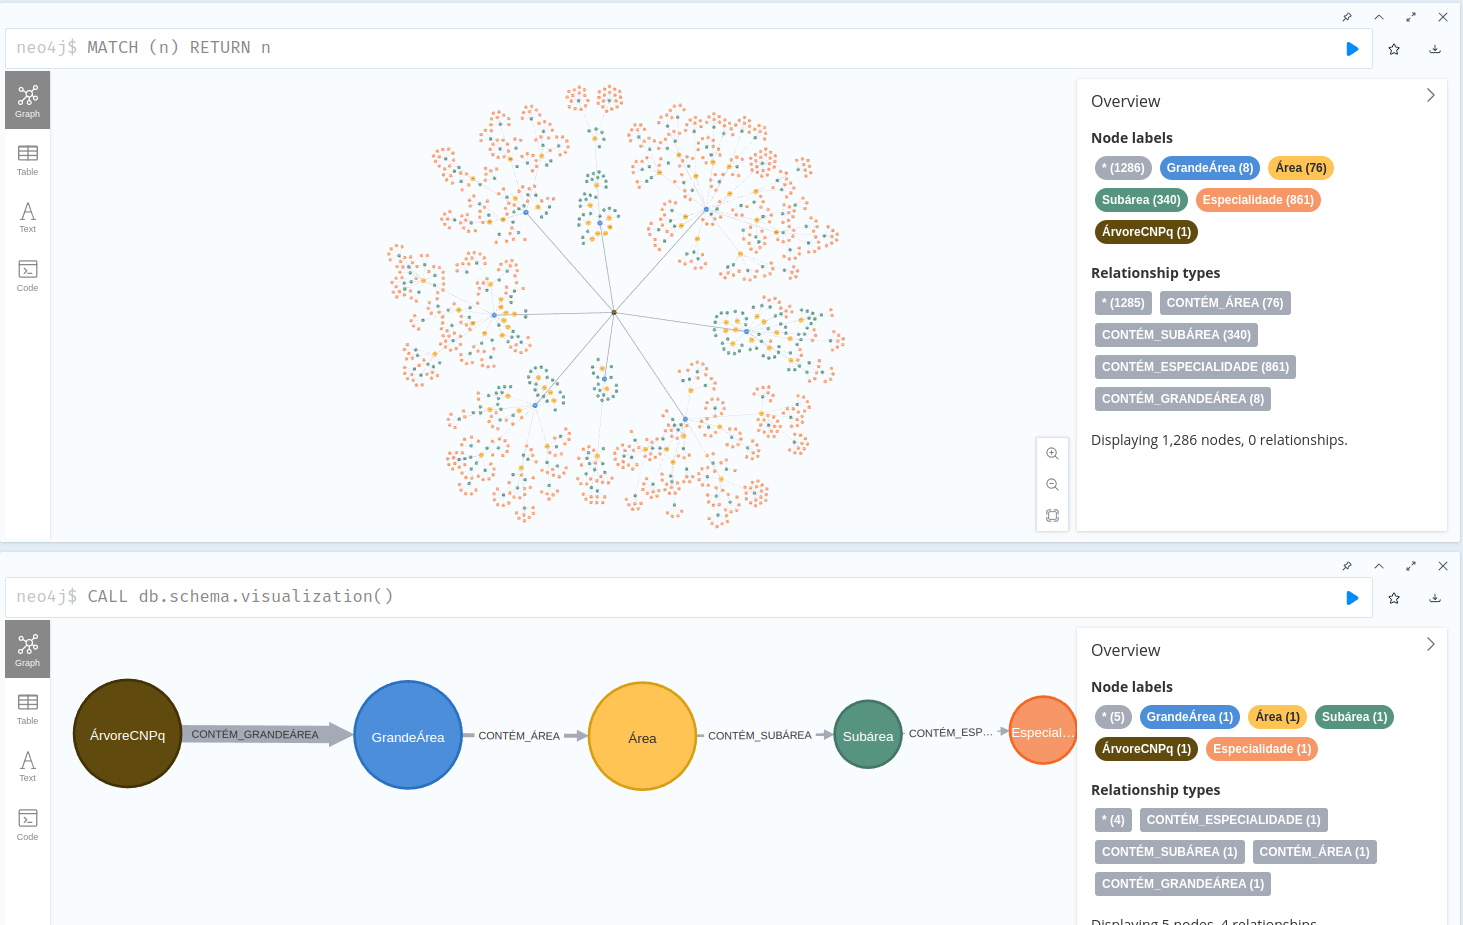

## Classe para explorar grafo persistido

In [ ]:
class GraphExplore:
    def __init__(self, uri, user, password):
        self.driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        # Fecha a conexão com o banco de dados
        self.driver.close()

    def explore_sons_nodes_bystring(self, string):
        with self.driver.session() as session:
            result = session.read_transaction(self._find_sons_nodes, string)
            return result

    @staticmethod
    def _find_sons_nodes(tx, string):
        query = (
            "MATCH (area) "
            "WHERE area.name CONTAINS $string "
            "MATCH path = (area)-[r*]->(descendant) "
            "WHERE ALL(rel IN r WHERE type(rel) STARTS WITH 'CONTÉM') "
            "RETURN path"
        )
        result = tx.run(query, string=string)
        return [record["path"] for record in result]

    @staticmethod
    def _create_subgraph(tx, area_name):
        create_subgraph_query = (
            "CALL gds.graph.project("
            "'subgraphComputacao', "
            "'MATCH (area:Área)-[r:CONTÉM*]->(descendant) WHERE area.name CONTAINS $area_name RETURN id(area) AS id UNION MATCH (area:Área)-[r:CONTÉM*]->(descendant) WHERE area.name CONTAINS $area_name RETURN id(descendant) AS id', "
            "'MATCH (area:Área)-[r:CONTÉM*]->(descendant) WHERE area.name CONTAINS $area_name RETURN id(area) AS source, id(descendant) AS target, type(r) AS type'"
            ")"
        )
        tx.run(create_subgraph_query, area_name=area_name)

    def apply_graph_algorithms(self, area_name):
        with self.driver.session() as session:
            # Criar um subgrafo em memória
            session.write_transaction(self._create_subgraph, area_name)
            # Aplicar um algoritmo ao subgrafo e retornar os resultados
            result = session.read_transaction(self._apply_pagerank)
            return result

    def paths_to_dataframe(self, paths):
        dados = []

        for path in paths:
            try:
                # Acessando nós e relações como atributos, não métodos
                nos = path.nodes
                relacoes = path.relationships

                # Assumindo que cada Path contém pelo menos 2 nós (início e fim)
                if len(nos) >= 2:
                    inicio = nos[0]
                    fim = nos[-1]

                    # Extrai as informações desejadas
                    id_inicio = inicio.id
                    rotulos_inicio = list(inicio.labels)
                    propriedades_inicio = dict(inicio)

                    id_fim = fim.id
                    rotulos_fim = list(fim.labels)
                    propriedades_fim = dict(fim)

                    # Adiciona os dados extraídos à lista
                    dados.append({
                        "ID Início": id_inicio,
                        "Rótulos Início": rotulos_inicio,
                        "Código Início": propriedades_inicio.get('code', ''),
                        "Nome Início": propriedades_inicio.get('name', ''),
                        "ID Fim": id_fim,
                        "Rótulos Fim": rotulos_fim,
                        "Código Fim": propriedades_fim.get('code', ''),
                        "Nome Fim": propriedades_fim.get('name', ''),
                        "Tamanho": len(relacoes)
                    })
            except Exception as e:
                print(f"Erro ao processar o Path: {e}")

        return pd.DataFrame(dados)

In [ ]:
# Exemplo de utilização da classe de exploração por palavra-chave no grafo
if __name__ == "__main__":
    uri = "neo4j://localhost:7687"  # URI do banco de dados Neo4j
    user = "neo4j"                  # Nome de usuário para o banco de dados Neo4j
    password = "password"           # Senha para o banco de dados Neo4j

    graph_explorer = GraphExplore(uri, user, password)
    palavra = "Computação"
    try:
        paths = graph_explorer.explore_sons_nodes_bystring(palavra)
        print(f"{len(paths)} relacionamentos encontrados envolvendo a palavra-chave '{palavra}'")
    finally:
        graph_explorer.close()

    dtf01 = graph_explorer.paths_to_dataframe(paths)

In [ ]:
dtf01

In [ ]:
graph_explorer = GraphExplore(uri, user, password)
palavra = "Saúde"
try:
    paths = graph_explorer.explore_sons_nodes_bystring(palavra)
    print(f"{len(paths)} relacionamentos encontrados envolvendo a palavra-chave '{palavra}'")
finally:
    graph_explorer.close()

dtf02 = graph_explorer.paths_to_dataframe(paths)

In [ ]:
dtf02

In [ ]:
# Carregar o conteúdo do arquivo 'output.json' para a variável dict_list
# folder='./../data/'
# dict_list = load_from_json(folder+'articles_data.json')
# print(f"{len(dict_list)} currículos carregados em lista de dicionários")

In [ ]:
# articles_data

In [ ]:
def retrieve_titles(data, key="titulo"):
    """
    Recupera todos os títulos de publicações de uma estrutura JSON aninhada.
    
    Args:
    - data (dict): O dicionário contendo os dados.
    - key (str): A chave para buscar no dicionário (padrão é "titulo").
    
    Returns:
    - list: Uma lista contendo todos os títulos encontrados.
    """
    titles = []
    
    # Se o tipo de data for um dicionário e contiver a chave desejada
    if isinstance(data, dict):
        if key in data:
            titles.append(data[key])
        for value in data.values():
            titles.extend(retrieve_titles(value, key))
    
    # Se o tipo de data for uma lista, itere sobre ela
    elif isinstance(data, list):
        for item in data:
            titles.extend(retrieve_titles(item, key))
    
    return titles

# Carregando o arquivo JSON e recuperando os títulos
with open("./../data/articles_data.json", "r") as file:
    data = json.load(file)
    all_titles = retrieve_titles(data)

print(all_titles)


## Gerar lista do dicionário de currículos

### Mostrar lista de dicionários extraídos por cada currículo

In [ ]:
# for data_dict in dict_list:
#     for k, v in data_dict.items():
#         print(f'{k:>30}| {type(v)}, {v}')
#     print()

### Visualizar Áreas de Atuação da lista de dicionários

In [ ]:
# dict_list[0]['Áreas de atuação']

In [ ]:
# dict_list[1]['Áreas de atuação']

In [ ]:
# dict_list[2]['Áreas de atuação']

In [ ]:
# dict_list[8]['Áreas de atuação']

### Teste tradução para inglês antes de gerar incorporações de vetores

In [ ]:
# https://huggingface.co/unicamp-dl/translation-pt-en-t5/tree/main

# Teste do pipeline de tradução com transformers
# from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
  
# tokenizer = AutoTokenizer.from_pretrained("unicamp-dl/translation-pt-en-t5")
# model = AutoModelForSeq2SeqLM.from_pretrained("unicamp-dl/translation-pt-en-t5")
# pten_pipeline = pipeline('text2text-generation', model=model, tokenizer=tokenizer)

# pten_pipeline("translate Portuguese to English: Eu gosto de comer arroz.")

## Classe de extrair dados e gerar datasets para vetorizar

    ExtractPublicationDataset
    DatasetExtractor1 (usada quando operava tradução)

In [ ]:
import re
import nltk
import json
from nltk.corpus import stopwords

class ExtractPublicationDataset:
    def __init__(self):
        self.json_file_path = './../data/processed_data.json'
        self.data = self._load_data()

    def _load_data(self):
        with open(self.json_file_path, 'r', encoding='utf-8') as file:
            return json.load(file)

    def _extract_id_lattes(self, inf_pes):
        id_lattes_info = inf_pes.get('2', '')
        id_lattes_match = re.search(r'ID Lattes: (\d+)', id_lattes_info)
        if id_lattes_match:
            id_lattes = id_lattes_match.group(1)
        else:
            id_lattes_match = re.search(r'Endereço para acessar este CV: http%3A//lattes.cnpq.br/(\d+)', id_lattes_info)
            id_lattes = id_lattes_match.group(1)
        return id_lattes if id_lattes else None

    def extract_productions_data(self, author_data):
        prod_data = author_data.get('Produções', {}).get('Produção bibliográfica', {}).get('Artigos completos publicados em periódicos', {})
        return prod_data
    
    def sep_define(self, prod_entry):
        if ' . ' in prod_entry:
            sep1 = ' . '
        elif '; ' in prod_entry:
            sep1 = '; '
        else:
            sep1 = '. '

        if 'v. ' in prod_entry:
            sep2 = '. '
        else:
            sep2 = ' '        
        return sep1,sep2

    def _extract_publication_info(self, jcr_data, jcr2_data, prod_data):
        publications = []

        for key, entry in jcr2_data.items():
            titulo_jcr2 = entry.get('titulo', '')

            publication = {
                'ano': '',
                'titulo': entry.get('titulo', ''),
                'issn': entry.get('issn', ''),
                'nomePeriodico': entry.get('journal', entry.get('original_title', '')),
                'impact_factor': entry.get('impact-factor', ''),
                'autores': '',
            }

            if not publication['impact_factor']:
                jcr_entry = jcr_data.get(key, {})
                publication['impact_factor'] = jcr_entry.get('impact-factor', '')
                    
            if not publication['issn']:
                jcr_entry = jcr_data.get(key, {})
                publication['issn'] = jcr_entry.get('data-issn', jcr_entry.get('issn'))

            if not publication['ano']:
                # Regular expression to extract year from production data
                for prod_key, prod_entry in prod_data.items():
                    if publication['titulo'] in prod_entry:
                        year_match = re.search(r'(\d{4})\.', prod_entry)
                        if year_match:
                            publication['ano'] = year_match.group(1)
                            break
                        else:
                            publication['ano'] = 2023
            # Usar dados do dicionário de Produções para complementar dados
            if publication['titulo'] != '':
                pass        
            else:
                ordem = str(int(key)+1)+'.'
                prod_entry = prod_data.get(ordem)
                sep1, sep2 = self.sep_define(prod_entry)
                publication['autores'] = prod_entry.split(sep1)[0] if prod_entry else ''
                publication['titulo']  = prod_entry.split(sep1)[1].split(sep2)[0] if prod_entry else ''                

            if publication['autores'] != '':
                pass        
            else:
                ordem = str(int(key)+1)+'.'
                prod_entry = prod_data.get(ordem)
                sep1, sep2 = self.sep_define(prod_entry)
                publication['autores'] = prod_entry.split(sep1)[0] if prod_entry else ''               

            publications.append(publication)

        return publications

    def extract_publications(self):
        all_publications = []

        for author_data in self.data:
            id_lattes = self._extract_id_lattes(author_data.get('InfPes', {}))
            jcr_data = author_data.get('JCR', {})
            jcr2_data = author_data.get('JCR2', {})
            # Extrai as ocorrências de artigos de cada currículo
            prod_data = self.extract_productions_data(author_data)

            publication_info = self._extract_publication_info(jcr_data, jcr2_data, prod_data)

            for info in publication_info:
                info['id_lattes'] = id_lattes
                all_publications.append(info)

        return all_publications

    def normalize_titles(self, input_data, file_path='./../data/clean_titles.json'):
        """
        Normaliza os títulos convertendo todos os caracteres em letras minúsculas e removendo palavras irrelevantes.
        Salva os títulos normalizados em um novo arquivo JSON com nome clean_titles.
        
        Parâmetros:
        - input_data (dict): O dicionário que contém os títulos em inglês.
        - file_path (str): O caminho onde o arquivo JSON será salvo.
        
        Retorna:
        None
        """
        # Initialize the stopwords
        nltk.download('stopwords')
        # stopwords for both English and Portuguese
        stop_words_en = set(stopwords.words('english'))
        stop_words_pt = set(stopwords.words('portuguese'))
        stop_words = stop_words_en.union(stop_words_pt)
        
        normalized_data = {}
        
        for path, entry in input_data.items():
            # Extract the translated title
            title = entry.get('titulo', '')
            
            # Convert to lowercase
            title = title.lower()
            
            # Remove stopwords
            title_words = title.split()
            filtered_words = [word for word in title_words if word not in stop_words]
            
            # Reassemble the title
            normalized_title = ' '.join(filtered_words)
            
            # Store in the normalized data dictionary
            normalized_data[path] = {'titulo': normalized_title, 'ano': entry.get('ano', 'Unknown')}
        
        # Save to disk
        with open(file_path, 'w', encoding='utf-8') as json_file:
            json.dump(normalized_data, json_file, ensure_ascii=False, indent=4)

In [ ]:
# Instanciar a classe ExtractPublicationDataset
extractor = ExtractPublicationDataset()

# Gerar o dataset de publicações
publications_dataset = extractor.extract_publications()
print(len(publications_dataset))

In [ ]:
# publications_dataset

In [ ]:
# import re
# import json
# import nltk
# import logging
# from tqdm import tqdm
# from datetime import datetime
# from nltk.corpus import stopwords
# from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

# # Configuração básica do logging para exibir mensagens no console
# # logging.basicConfig(level=logging.INFO, format='%(levelname)s:%(message)s')
# logging.basicConfig(filename='./logs/DatasetExtractor1.log', level=logging.INFO, format='%(levelname)s:%(message)s')

# class DatasetExtractor1:
#     def __init__(self, path_to_data, parse_soup):
#         self.data_path = path_to_data
#         self.parse_soup = parse_soup
#         self.dataset = self._load_dataset()
#         self.tokenizer = AutoTokenizer.from_pretrained("unicamp-dl/translation-pt-en-t5")
#         self.model = AutoModelForSeq2SeqLM.from_pretrained("unicamp-dl/translation-pt-en-t5")
#         self.translation_pipeline = pipeline('text2text-generation', model=self.model, tokenizer=self.tokenizer)
#         with open(path_to_data, 'r', encoding='utf-8') as file:
#             self.data = json.load(file)

#     def _load_dataset(self):
#         with open(self.data_path, "r", encoding="utf-8") as file:
#             return json.load(file)

#     def extract_all_years(self):
#         """
#         Extrai anos das strings fornecidas.
#         Returns:
#         - dict: Dicionário com os anos extraídos.
#         """
#         years_dict = {}
#         pattern = re.compile(r'(\d{4})\.')  # Padrão para pegar o ano no final da string

#         # Adiciona uma mensagem de log para iniciar a extração
#         logging.info('Iniciando a extração dos anos.')

#         for index, item in enumerate(self.data):
#             bibliographic_production = item.get("Produções", {}).get("Produção bibliográfica", {}).get("Artigos completos publicados em periódicos", {})
            
#             if not bibliographic_production:
#                 logging.warning(f'Índice {index}: Produção bibliográfica não encontrada ou vazia.')
            
#             for seq, article_str in bibliographic_production.items():
#                 match = pattern.search(article_str)
#                 if match:
#                     years_dict[f"{index}.{seq}"] = match.group(1)
#                 else:
#                     # Adiciona uma mensagem de log para entradas onde o ano não foi extraído
#                     logging.warning(f'Índice {index}, Sequência {seq}: Ano não encontrado em "{article_str}".')

#         # Adiciona uma mensagem de log após a conclusão da extração
#         logging.info('Extração dos anos concluída.')

#         return years_dict

#     def extract_all_idlattes(self):
#         idlattes_list = []
#         for item in self.data:
#             id_lattes = self.parse_soup.extrair_idlattes(item)
#             idlattes_list.append(id_lattes)
#         return idlattes_list

#     def _recursive_extraction(self, data, keys_of_interest, path="", results=None):
#         if results is None:
#             results = {}
#         if isinstance(data, list):
#             for index, item in enumerate(data):
#                 updated_path = f"{path}[{index}]"
#                 self._recursive_extraction(item, keys_of_interest, updated_path, results)
#         elif isinstance(data, dict):
#             for key, value in data.items():
#                 updated_path = f"{path}.{key}" if path else key
#                 if key in keys_of_interest:
#                     # Adicionando o título ao dicionário de resultados
#                     results[updated_path] = {'titulo': value}
#                 else:
#                     self._recursive_extraction(value, keys_of_interest, updated_path, results)
#         return results
    
#     ## omitindo o id_lattes do dataset montado
#     # def extract_datasets(self, keys_of_interest):
#     #     extracted_years = self.extract_all_years()
#     #     print(f"{len(extracted_years):>4} quantidade de anos recuperados")
#     #     extracted_titles = self._recursive_extraction(self.data, ['titulo'])
#     #     print(f"{len(extracted_titles):>4} quantidade de titulos recuperados")

#     #     # Combinar anos e títulos
#     #     for y,key in zip(extracted_years.values(),extracted_titles):
#     #         extracted_titles[key]['ano'] = y if y else str(datetime.now().year)
#     #     return extracted_titles 

#     def extract_datasets(self, keys_of_interest):
#         extracted_years = self.extract_all_years()
#         datasets = []

#         for author in self.data:
#             # Extrai o ID Lattes do autor
#             id_lattes = self.parse_soup.extrair_idlattes(author)

#             # Extrai as publicações do autor
#             author_publications = self._recursive_extraction(author, keys_of_interest)

#             # Associa o ID Lattes, o ano e o título a cada publicação
#             for key, publication in author_publications.items():
#                 publication['id_lattes'] = id_lattes
#                 publication['ano'] = extracted_years.get(key, str(datetime.now().year))
#                 publication['titulo'] = publication.get('titulo', 'Título Desconhecido')
#                 datasets.append(publication)

#         return datasets

#     def translate_to_english(self, datasets):
#         translated_datasets = {}
        
#         for path, entry in tqdm(datasets.items()):
#             # Obtém o título da entrada
#             title_in_portuguese = entry['titulo']
            
#             # Cria a string de entrada para a pipeline de tradução
#             translation_input = "translate Portuguese to English: " + title_in_portuguese
            
#             # Obtém o título traduzido
#             translated_title = self.translation_pipeline(translation_input, max_length=50)[0]['generated_text']
            
#             # Verifica se a chave 'ano' existe, caso contrário, fornece um valor padrão
#             year = entry.get('ano', 'Unknown')
            
#             # Adiciona o título traduzido e o ano à nova entrada
#             translated_entry = {'titulo': translated_title, 'ano': year}
            
#             # Adiciona a nova entrada ao dicionário de datasets traduzidos
#             translated_datasets[path] = translated_entry

#         return translated_datasets

#     def translate_to_english_save_json(self, input_data, file_path='./../data/translated_titles.json'):
#         # Traduzir
#         translated_dict = self.translate_to_english(input_data)
#         # Escrever no disco local
#         with open(file_path, 'w', encoding='utf-8') as json_file:
#             json.dump(translated_dict, json_file, ensure_ascii=False, indent=4) 

#     def save_to_json(self, input_data, file_path='./../data/translated_titles.json'):
#         with open(file_path, 'w', encoding='utf-8') as file:
#             json.dump(input_data, file, ensure_ascii=False, indent=4)
#         print(f"Dados salvos em {file_path}")

#     def normalize_titles(self, input_data, file_path='./../data/clean_titles.json'):
#         """
#         Normaliza os títulos convertendo todos os caracteres em letras minúsculas e removendo palavras irrelevantes.
#         Salva os títulos normalizados em um novo arquivo JSON com nome clean_titles.
        
#         Parâmetros:
#         - input_data (dict): O dicionário que contém os títulos em inglês.
#         - file_path (str): O caminho onde o arquivo JSON será salvo.
        
#         Retorna:
#         None
#         """
#         # Initialize the stopwords
#         nltk.download('stopwords')
#         # stopwords for both English and Portuguese
#         stop_words_en = set(stopwords.words('english'))
#         stop_words_pt = set(stopwords.words('portuguese'))
#         stop_words = stop_words_en.union(stop_words_pt)
        
#         normalized_data = {}
        
#         for path, entry in input_data.items():
#             # Extract the translated title
#             title = entry.get('titulo', '')
            
#             # Convert to lowercase
#             title = title.lower()
            
#             # Remove stopwords
#             title_words = title.split()
#             filtered_words = [word for word in title_words if word not in stop_words]
            
#             # Reassemble the title
#             normalized_title = ' '.join(filtered_words)
            
#             # Store in the normalized data dictionary
#             normalized_data[path] = {'titulo': normalized_title, 'ano': entry.get('ano', 'Unknown')}
        
#         # Save to disk
#         with open(file_path, 'w', encoding='utf-8') as json_file:
#             json.dump(normalized_data, json_file, ensure_ascii=False, indent=4)
                   

### Teste da extração e tradução com a classe

In [ ]:
# Teste de extração e tradução das entradas de interesse extraídas dos dicionários
# keys = ['titulo']
# extractor_translated = DatasetExtractor1("./../data/processed_data.json")
# datasets = extractor_translated.extract_datasets(keys_of_interest=keys)

In [ ]:
# print(type(datasets))
# for i,j in datasets.items():
#     print(i, j)

# for name, entries in datasets.items():
#     print(f"\n{name} Dataset:")
#     for entry in entries:
#         print(f"- {entry}")

In [ ]:
# datasets

In [ ]:
# from pprint import pprint
# pprint(datasets, width=125)

### Pré-processar títulos de nós Publicação e salvar em arquivos JSON local

    (10 min/1200 títulos, 20 tokens máx)
    (20 min/1200 títulos, 50 tokens máx)

### Processar títulos de Artigos Completos Publicados em Períodicos

In [ ]:
class Neo4jService:
    def __init__(self, uri, user, password):
        self._driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        self._driver.close()

    def _execute_query(self, transaction, query, parameters=None):
        result = transaction.run(query, parameters)
        return [record for record in result]

    def find_available_procedures(self):
        query = "SHOW PROCEDURES"
        return self.fetch_data(query)
    
    def find_available_functions(self):
        query = "SHOW FUNCTIONS"
        return self.fetch_data(query)

    def find_related_procedures(self, keyword):
        # Recuperamos todos os procedimentos disponíveis
        all_procedures = self.find_available_procedures()

        # Filtramos a lista de procedimentos com base na palavra-chave
        related_procedures = [proc for proc in all_procedures if keyword.lower() in proc['name'].lower()]

        return related_procedures

    def get_procedure_signatures(self, procedures_list):
        """
        Retrieves the signatures for a list of procedures.

        :param procedures_list: A list of strings representing the procedure names to fetch signatures for.
        :return: A dictionary with the procedure names as keys and their signatures as values.
        """
        # Start a string to build the Cypher query for multiple procedures
        if len(procedures_list) > 1:
            query_conditions = " OR ".join([f"name = '{procedure}'" for procedure in procedures_list])
        else:
            query_conditions = f"name = '{procedures_list[0]}'"

        get_signatures_query = f"""
        SHOW PROCEDURES
        YIELD name, signature
        WHERE {query_conditions}
        RETURN name, signature;
        """

        # print(get_signatures_query)

        # Execute the query and fetch the results
        try:
            results = self.execute_read(get_signatures_query)
            print(f"Quantidade de resultados encontrados: {len(results)}")
            # print(results)
            signatures = {record["name"]: record["signature"] for record in results}
            # for i,j in results:
            #     print(f"PROCEDIMENTO:{i}")
            #     print(f"  ASSINATURA:{j}")
            #     print()
            pprint(signatures,width=140)
            return signatures
        except Exception as e:
            print(f"An error occurred while fetching procedure signatures: {e}")
            return {}

    def list_projections(self):
        """
        Lists all the graph projections in the connected Neo4j database.

        Returns:
            A list of dictionaries, each representing a graph projection with its details.
        """
        list_projections_query = """
        CALL gds.graph.list()
        YIELD graphName, nodeCount, relationshipCount, schema
        RETURN graphName, nodeCount, relationshipCount, schema;
        """
        try:
            result = self.execute_read(list_projections_query)
            return [record for record in result]
        except Exception as e:
            print(f"An error occurred while listing projections: {e}")
            return []
        
    def fetch_data(self, query, parameters=None):
        with self._driver.session() as session:
            result = session.run(query, parameters)
            return [record for record in result]

    def execute_read(self, query, parameters=None, db=None):
        with self._driver.session(database=db) as session:
            return session.execute_read(self._execute_query, query, parameters)

    def execute_write(self, query, parameters=None, db=None):
        with self._driver.session(database=db) as session:
            return session.execute_write(self._execute_query, query, parameters)

    def check_and_drop_projection(self, projection_name, db='neo4j'):
        # Check if the projection exists
        exists_query = """
        CALL gds.graph.exists($projection_name)
        YIELD exists
        RETURN exists
        """
        try:
            # Execute the query to check for existence
            exists_result = self.execute_read(exists_query, {'projection_name': projection_name}, db)
            exists = exists_result.single()['exists']
            
            # If the projection exists, drop it
            if exists:
                drop_query = "CALL gds.graph.drop($projection_name)"
                self.execute_write(drop_query, {'projection_name': projection_name}, db)
            else:
                print(f"Graph projection '{projection_name}' does not exist in database '{db}'.")
        except Exception as e:
            # Handle any exception that arises
            print(f"Exception occurred while dropping graph projection: {e}")

class CosineSimilarityRelationship(Neo4jService):
    def __init__(self, uri, user, password, model_name="default_model"):
        super().__init__(uri, user, password)
        self.model_name = model_name

    def check_connection(self):
        if not hasattr(self, '_driver') or not self._driver:
            logging.error("No database connection")
            raise Exception("No database connection")

    def cosine_similarity(self, a, b):
        return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

    def normalize_similarity(self, similarity):
        return (similarity + 1) / 2

    def get_memory_usage(self):
        process = psutil.Process(os.getpid())
        memory_MB = process.memory_info().rss / (1024 ** 2)
        return memory_MB

    def get_all_embeddings(self, label):
        with self._driver.session() as session:
            result = session.run(f"MATCH (n:{label}) RETURN id(n) AS id, n.embedding AS embedding")
            return [record for record in result]

    def process_similarity_for_nodes(self, source_embeddings, target_embeddings, source_label, target_label, threshold, batch_size):
        relationships_created_count = 0
        node_pairs_count = 0
        
        with self._driver.session() as session:
            tx = session.begin_transaction()
            try:
                for source in tqdm(source_embeddings, desc=f"Calculando similaridade semântica entre: {source_label}/{target_label}"):
                    for target in target_embeddings:
                        similarity = self.cosine_similarity(np.array(source["embedding"]), np.array(target["embedding"]))
                        normalized_similarity = self.normalize_similarity(similarity)
                        node_pairs_count += 1
                        if similarity > threshold:
                            query = f"""
                            MATCH (source:{source_label}) WHERE id(source) = $source_id
                            MATCH (target:{target_label}) WHERE id(target) = $target_id
                            MERGE (source)-[:SIMILAR {{score: $similarity, weight: $normalized_similarity}}]->(target)
                            """
                            tx.run(query, source_id=source["id"], target_id=target["id"], similarity=float(similarity), normalized_similarity=float(normalized_similarity))
                            relationships_created_count += 1
                            if relationships_created_count % batch_size == 0:
                                tx.commit()
                                # logging.info(f"Committed {batch_size} relationships for {source_label}/{target_label}.")
                                tx = session.begin_transaction()
                # Commit any remaining relationships after the loop
                tx.commit()
                # logging.info(f"Committed remaining relationships for {source_label}/{target_label}.")
            except Exception as e:
                logging.error(f"An error occurred during transaction: {e}")
                tx.rollback()
                raise
            return node_pairs_count, relationships_created_count

    def create_similarity_embeedings_relationships(self, threshold=0.7, batch_size=3000):
        start_time = time.time()
        self.check_connection()
        initial_memory = self.get_memory_usage()

        pub_embeddings = self.get_all_embeddings("Publicacao")
        esp_embeddings = self.get_all_embeddings("Especialidade")
        sub_embeddings = self.get_all_embeddings("Subárea")

        total_pub = len(pub_embeddings)
        total_esp = len(esp_embeddings)
        total_sub = len(sub_embeddings)

        logging.info(f"Nodes: Publicacao {total_pub}, Especialidade {total_esp}, Subárea {total_sub}")

        pub_sub_pairs, pub_sub_rels = self.process_similarity_for_nodes(pub_embeddings, sub_embeddings, "Publicacao", "Subárea", threshold, batch_size)
        pub_esp_pairs, pub_esp_rels = self.process_similarity_for_nodes(pub_embeddings, esp_embeddings, "Publicacao", "Especialidade", threshold, batch_size)

        final_memory = self.get_memory_usage()
        end_time = time.time()
        memory_difference = final_memory - initial_memory
        processing_time = end_time - start_time

        logging.info(f"RAM Consumption: {np.round(memory_difference,2)} MB")
        logging.info(f"Processing Time: {np.round(processing_time,2)} seconds")
        logging.info(f"Current Memory Usage: {np.round(final_memory,2)} MB")
        logging.info(f"Execution time for similarity calculations and relationship creation: {np.round(processing_time, 2)} seconds")
        logging.info(f"Similarity threshold: {threshold}")
        logging.info(f"Total node pairs analyzed: {pub_sub_pairs + pub_esp_pairs}")
        logging.info(f"Node pairs Publicacao/Subárea: {pub_sub_pairs}")
        logging.info(f"Node pairs Publicacao/Especialidade: {pub_esp_pairs}")
        logging.info(f"Total relationships created: {pub_sub_rels + pub_esp_rels}")
        logging.info(f"Relationships created Publicacao/Subárea: {pub_sub_rels}")
        logging.info(f"Relationships created Publicacao/Especialidade: {pub_esp_rels}")

    def run_similarity_operations(self, threshold=0.7):
        self.create_similarity_embeedings_relationships(threshold)

In [ ]:
uri = "bolt://localhost:7687"
user = "neo4j"
password = "password"

# Caminho para salvar os dados processados
path_to_save = "./../data/"

# Definindo as chaves de interesse (neste caso, 'titulo')
keys = ['titulo']

# Criando instâncias das classes
neo4j_service = Neo4jService(uri, user, password)
extractor  = ExtractPublicationDataset()

# Montando o dataset com id_lattes, anos e títulos
publications_dataset = extractor.extract_publications()
print(f"{len(publications_dataset)} artigos montados no dataset")


In [ ]:
def plotar_publicacoes_por_id_seaborn(dados):
    # Contar as publicações por id_lattes
    contador = {}
    for item in dados:
        id_lattes = item['id_lattes']
        if id_lattes in contador:
            contador[id_lattes] += 1
        else:
            contador[id_lattes] = 1

    # Preparar os dados para o gráfico
    ids = list(contador.keys())
    publicacoes = list(contador.values())

    # Criar o gráfico de barras com Seaborn
    plt.figure(figsize=(19, 6))
    barplot = sns.barplot(x=ids, y=publicacoes, palette="viridis")
    plt.xlabel('ID Lattes')
    plt.ylabel('Número de Publicações')
    plt.title('Publicações por ID Lattes')
    plt.xticks(rotation=45, ha='right')

    # Adicionar rótulos de dados
    for p in barplot.patches:
        barplot.annotate(f'{int(p.get_height())}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center', 
                         xytext = (0, 9), 
                         textcoords = 'offset points')

    # Remover linhas de grade
    plt.grid(False)
    plt.tight_layout()
    plt.show()

def plotar_evolucao_publicacoes(dados, ano_inicio, ano_fim):
    # Preparar os dados
    lista_publicacoes = []
    for item in dados:
        ano_str = item['ano'].strip()
        if ano_str.isdigit():
            ano = int(ano_str)
            if ano_inicio <= ano <= ano_fim:
                lista_publicacoes.append((item['id_lattes'], ano))

    if not lista_publicacoes:
        print("Nenhum dado válido encontrado para o intervalo de anos especificado.")
        return

    df = pd.DataFrame(lista_publicacoes, columns=['id_lattes', 'ano'])
    df['count'] = 1
    df = df.groupby(['id_lattes', 'ano']).count().reset_index()

    # Criar o gráfico de linhas
    plt.figure(figsize=(19, 10))
    sns.lineplot(x='ano', y='count', hue='id_lattes', data=df, marker="o")
    plt.xlabel('Ano')
    plt.ylabel('Quantidade de Publicações')
    plt.title(f'Evolução do Número de Publicações por ID Lattes ({ano_inicio}-{ano_fim})')
    plt.legend(title='ID Lattes', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(False)
    plt.tight_layout()
    plt.show()


def plotar_boxplot_publicacoes(dados, ano_inicio=2000, ano_fim=2023):
    # Preparar os dados
    lista_publicacoes = []
    for item in dados:
        ano_str = item['ano'].strip()  # Remover espaços em branco extras

        # Verificar se o ano é um valor válido e está dentro do intervalo desejado
        if ano_str.isdigit() and ano_inicio <= int(ano_str) <= ano_fim:
            lista_publicacoes.append((item['id_lattes'], int(ano_str)))

    # Se não houver dados válidos, retornar
    if not lista_publicacoes:
        print("Nenhum dado válido encontrado para o intervalo de anos especificado.")
        return

    df = pd.DataFrame(lista_publicacoes, columns=['id_lattes', 'ano'])
    df['count'] = 1  # Adicionar uma coluna para contar as publicações
    df = df.groupby(['id_lattes', 'ano']).count().reset_index()  # Agrupar e contar

    # Ordenar os dados por ano
    df = df.sort_values('ano')

    # Criar o boxplot
    plt.figure(figsize=(19, 8))
    sns.boxplot(x='ano', y='count', data=df)
    plt.xlabel('Ano')
    plt.ylabel('Quantidade de Publicações')
    plt.title(f'Dispersão da Quantidade de Publicações por Ano para Cada ID Lattes ({ano_inicio}-{ano_fim})')
    plt.xticks(rotation=45, ha='right')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

ano_inicio= 2010
ano_final = 2023
plotar_publicacoes_por_id_seaborn(publications_dataset)
plotar_evolucao_publicacoes(publications_dataset, ano_inicio, ano_final)
plotar_boxplot_publicacoes(publications_dataset, ano_inicio, ano_final)


In [ ]:
# Títulos completos em sua língua original como no Lattes
# publications_dataset

Como vemos os títulos estão nas línguas inglês e português, o que abre três caminhos a adotar, tradução pt-en, en-pt, ou abordagem multilingue, que será a qual usaremos neste trabalho para tratar os títulos tanto em inglês quanto em português em um só vetor de incorporação de palavras.

Adotamos procedimento descrito em Joulin et al. usamos os vetores de palavras alinhados do FastText. Estes vetores foram alinhados para 44 idiomas, incluindo inglês e português, utilizando o método RCSLS, o que os torna adequados para aplicações multilíngues como a sua, onde é necessário compreender a semântica em diferentes idiomas (JOULIN, 2018).

Baixamos os vetores alinhados diretamente do site oficial do FastText. Estes vetores são baseados nos vetores pré-treinados calculados com o FastText a partir de dados da Wikipedia, o que garante uma ampla cobertura semântica e lexical.

Para acessar os vetores alinhados de FastText, você pode visitar o seguinte link: [Vetores Alinhados do FastText](https://fasttext.cc/docs/en/aligned-vectors.html). A partir dos links adequados às linguagens para download dos vetores em inglês e português. Estes vetores são ideais para o presente estudo, pois oferecem uma maneira eficiente de lidar com textos em múltiplos idiomas, mantendo a consistência semântica entre eles.

### Traduzir para inglês e normalizar títulos

In [ ]:
# print('Traduzindo todos títulos para inglês')
# extractor = ExtractDataset1()
# translated_data_english = extractor.translate_to_english(datasets)
# print('Traduções concluídas')

In [ ]:
# for path, entry in translated_data_english.items():
#     print(f"{path}: {entry}")

In [ ]:
# path_to_save = "./../data/"

# # print('Salvando JSON de títulos traduzidos em disco')
# # extractor.save_to_json(translated_data_english, path_to_save+"translated_titles.json")

# print('Salvando JSON de títulos traduzidos normalizados em minúsculas e sem stopwords')
# extractor.normalize_titles(translated_data_english, path_to_save+"clean_translated_titles.json")

# print(f"Os dados foram salvos em {path_to_save}")

### Normalizar títulos (remover stopwords e passar a minúsculas) no idioma original e salvar em clean_titles.json

In [ ]:
# Instanciar a classe ExtractPublicationDataset
# extractor = ExtractPublicationDataset()

# normalizar títulos em língua original
# extractor.normalize_titles(publications_dataset, path_to_save+"clean_titles.json")

# Montar datasets do JSON da extração do Lattes

### Ler Títulos processados previamente, normalizar e remover stopwords para vetorizar

In [ ]:
list_json(path_to_save)

In [ ]:
import json

def load_json_from_disk(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)

# Caminhos dos arquivos JSON a serem lidos
# path_to_translated_titles = "./../data/translated_titles.json"
# translated_titles_data = load_json_from_disk(path_to_translated_titles)
# print("Dados de títulos traduzidos carregados em memória.")

# Leitura e carregamento dos dados em memória
path_to_clean_titles      = "./../data/clean_titles.json"
clean_titles_data = load_json_from_disk(path_to_clean_titles)
print("Dados de títulos traduzidos e normalizados carregados em memória.")

In [ ]:
# clean_titles_data # dataset com todos os títulos traduzidos para inglês

## Abordagem multilingue

Na abordagem multilíngue em vez de traduzir cada titulo adotamos um modelo de linguagem competente para gerar vetores de incorporação coerentes em mais de uma língua sem tradução. Será o que adotaremos com adoção do modelo BERT Multilíngue.

# <b>FASE 3: Gerar vetores de incorporação semântica</b>

    Obter vetores pré-treinados adequados para a necessidade
    Criar classe para persistir vetores nos nós do modelo
    Vetorizar e persistir Títulos das Publicações
    Vetorizar e persistir Especialidades do CNPq
    Vetorizar e persistir Subáreas do CNPq

## Caso seja preciso instalação manual

In [ ]:
import os
os.listdir(path_to_save)

In [ ]:
## Descompactar o arquivo de vetores pré-treinados em pasta local e instalar de lá:
# !pip install ../models/fasttext-0.9.2-cp311-cp311-win_amd64.whl

## No Linux ou WSL funciona direto pelo pip
# !pip3 install fasttext

**Obs.:**

O warning informa sobre uma mudança na maneira como o modelo é carregado e retornado pela função `load_model` da biblioteca FastText. Anteriormente, `load_model` poderia retornar objetos de tipos diferentes, como `WordVectorModel` ou `SupervisedModel`, dependendo de se o modelo era um modelo de vetor de palavras ou um modelo supervisionado. Agora, ele sempre retorna um objeto `FastText`. Para a maioria dos casos de uso, especialmente para a vetorização de texto, a mudança não deverá ter um impacto direto em termos de funcionalidade, pois os métodos principais (como `get_sentence_vector`) ainda estão presentes no objeto `FastText`. No entanto, há algumas diferenças sutis em termos da API e das funcionalidades disponíveis.

Para apenas carregar um modelo de vetor de palavras (como o `cc.en.300.bin`), e usá-lo para obter embeddings de texto ou palavras, então a mudança provavelmente não afetará seu código. No entanto, é sempre uma boa prática verificar a documentação oficial ou notas de release quando se deparar com tais avisos, para garantir que você esteja ciente de quaisquer mudanças que possam afetar seu aplicativo.

In [ ]:
## Modelos pré-treinados para vetorização em 157 liguas podem ser baixado de
## https://fasttext.cc/docs/en/crawl-vectors.html

In [ ]:
# def download_file_with_progress(url, filename):
#     """
#     Função para fazer o download de um arquivo e exibir o progresso usando tqdm.
    
#     Args:
#         url (str): URL do arquivo a ser baixado.
#         filename (str): Nome do arquivo onde os dados devem ser salvos.
#     """
    
#     headers = {
#         "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
#     }
    
#     response = requests.get(url, headers=headers, stream=True)
#     response.raise_for_status()
    
#     # Total size in bytes
#     total_size = int(response.headers.get('content-length', 0))
    
#     with open(filename, "wb") as file, tqdm(
#         desc=filename,
#         total=total_size,
#         unit="B",
#         unit_scale=True,
#         unit_divisor=1024,
#     ) as bar:
#         for chunk in response.iter_content(chunk_size=8192):
#             file.write(chunk)
#             bar.update(len(chunk))

In [ ]:
## Descompatar arquivo dos vetores pré-treinados para pasta local
# import gzip
# import shutil

# input_path  = '../models/cc.en.300.bin.gz'
# output_path = '../models/cc.en.300.bin'

# with gzip.open(input_path, 'rb') as f_in:
#     with open(output_path, 'wb') as f_out:
#         shutil.copyfileobj(f_in, f_out)

# print("Modelo de linguagem descompactado com sucesso!")

## Gerar vetores de incorporação com FastText

### Obter vetores pré-treinados em português

In [ ]:
link_vetores_pretreinados_pt = 'https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.pt.300.bin.gz'

### Obter vetores pré-treinados do fasttext em inglês

In [ ]:
# import fasttext.util
# import shutil
# import os

# # Define the destination file path
# dst_en = '../models/cc.en.300.bin'
# dst_br = '../models/cc.pt.300.bin'
# dst = dst_br

# # Check if the file already exists in the destination directory
# if not os.path.exists(dst):
#     # Download the model to the current working directory
#     fasttext.util.download_model('en', if_exists='ignore')
    
#     # Define the source file path
#     src_en = 'cc.en.300.bin'
#     src_br = 'cc.pt.300.bin'
#     src = src_br

#     # Ensure the destination directory exists
#     os.makedirs('../models', exist_ok=True)

#     # Move the downloaded file to the desired directory
#     shutil.move(src, dst)

# # Load the model from the destination directory
# ft = fasttext.load_model(dst)


### Gerar vetores de incorporação com FastText

In [ ]:
# import fasttext
# from neo4j import GraphDatabase
# import logging

# # Configuração do logging
# logging.basicConfig(filename='HierarchicalSemanticMatcher.log', level=logging.INFO, format='%(asctime)s:%(levelname)s:%(message)s')

# # Carregar os modelos de vetores alinhados para diferentes idiomas
# ft_models = {
#     'en': fasttext.load_model('../models/cc.en.300.bin'),
#     'pt': fasttext.load_model('../models/cc.pt.300.bin'),
#     'es': fasttext.load_model('../models/cc.es.300.bin'),
#     'zh': fasttext.load_model('../models/cc.zh.300.bin'),
#     'de': fasttext.load_model('../models/cc.de.300.bin')
# }
# ft_lang_model = fasttext.load_model('../models/lid.176.bin')

# class FastextHierarchicalSemanticMatcher:
#     def __init__(self, neo4j_uri, neo4j_user, neo4j_password):
#         self._driver = GraphDatabase.driver(neo4j_uri, auth=(neo4j_user, neo4j_password))
#         # Inicializando o pipeline de tradução (desnecessário com o uso de vetores alinhados multilinges)
#         # self.tokenizer = AutoTokenizer.from_pretrained("unicamp-dl/translation-pt-en-t5")
#         # self.model = AutoModelForSeq2SeqLM.from_pretrained("unicamp-dl/translation-pt-en-t5")
#         # self.translation_pipeline = pipeline('text2text-generation', model=self.model, tokenizer=self.tokenizer)
        
#     # def _translate_text(self, text):
#     #     """
#     #     Traduz um texto do português para o inglês usando o pipeline de tradução.
#     #     Args:
#     #     - text (str): O texto em português a ser traduzido.
#     #     Returns:
#     #     - str: O texto traduzido para o inglês.
#     #     """
#     #     translation_input = "translate Portuguese to English: " + text
#     #     translated_text = self.translation_pipeline(translation_input, max_length=50)[0]['generated_text']
#     #     return translated_text

#     ## Usava a tradução de cada frase o que demorava
#     # @staticmethod
#     # def get_embedding(text):
#     #     """
#     #     Obtenha o embedding de um texto usando o modelo FastText.
#     #     Args:
#     #     - text (str): O texto a ser vetorizado.
#     #     Returns:
#     #     - List[float]: O embedding do texto.
#     #     """
#     #     return ft_model.get_sentence_vector(text).tolist()

#     # def vectorize_text(self, titles_dict):
#     #     """
#     #     Vetoriza strings associados aos nós Person usando FastText.
#     #     Aqui se usa o exemplo dos títulos de artigos do dicionário JCR2 dos dados extraídos do Lattes.
#     #     Esse passo já está na função get_embedding(title) do método extract_titles_from_data()
#     #     Args:
#     #     - titles_dict (dict): Dicionário contendo os títulos a serem vetorizados.
#     #     Returns:
#     #     - List[Dict]: Lista de dicionários contendo os títulos e seus embeddings.
#     #     """
#     #     embeddings = []
        
#     #     # Adicionar mensagem de log para indicar o início da vetorização
#     #     logging.info('Iniciando a vetorização dos títulos.')
        
#     #     # Usando tqdm para barra de progresso
#     #     for person_id, data in tqdm(titles_dict.items(), desc="Vetorizando títulos"):
#     #         for key, title in data.items():
#     #             if key.startswith("JCR2"):
#     #                 embedding = self.get_embedding(title['titulo'])
#     #                 embeddings.append({"title": title['titulo'], "embedding": embedding, "person_id": person_id})
        
#     #     # Adicionar mensagem de log para indicar conclusão da vetorização
#     #     logging.info('Vetorização dos títulos concluída.')

#     #     return embeddings

#     def _execute_query(self, query, parameters=None):
#         with self._driver.session() as session:
#             return session.run(query, parameters)

#     @staticmethod
#     def identify_language(text):
#         language = ft_lang_model.predict(text)[0][0].split('__label__')[1]
#         return language

#     @staticmethod
#     def get_embedding(text):
#         language = FastextHierarchicalSemanticMatcher.identify_language(text)
#         if language in ft_models:
#             return ft_models[language].get_sentence_vector(text).tolist()
#         else:
#             logging.warning(f'Idioma não suportado: {language}')
#             return []

#     # Vetorizar títulos de especialidades em dados já no Neo4j com vetores pré-treinados
#     def vectorize_specialty_names(self):
#         logging.info("Iniciando vetorização dos nomes das especialidades...")
#         query = "MATCH (e:Especialidade) RETURN e.name AS name"
#         result = self._driver.session().run(query)
#         embeddings = []

#         # Converter resultados em uma lista para poder usar o tqdm
#         result_list = [record['name'] for record in result]
        
#         logging.info(f"Total de nomes a serem vetorizados: {len(result_list)}")

#         if not result_list:
#             logging.warning("Nenhum nome de especialidade foi recuperado da base de dados.")
#             return embeddings

#         for name in tqdm(result_list, desc="Vetorizando nomes de especialidades"):
#             translated_name = self._translate_text(name) # traduz
#             embedding = self.get_embedding(translated_name) # vetoriza
#             embeddings.append({"name": translated_name, "embedding": embedding})

#             # Atualizar nome no nó 'Especialidade' com o nome traduzido
#             update_query = """
#             MATCH (e:Especialidade {name: $original_name})
#             SET e.name = $translated_name
#             """
#             self._execute_query(update_query, parameters={"original_name": name, "translated_name": translated_name})
        
#         logging.info(f"Vetorização concluída. {len(embeddings)} nomes foram vetorizados.")
#         return embeddings

#     # Persistir vetores gerados no Neo4j
#     def update_specialty_nodes_with_embeddings(self, specialty_embeddings):
#         """
#         Atualiza os nós 'Especialidade' com os embeddings fornecidos.
#         Args:
#         - specialty_embeddings (List[Dict]): Lista de dicionários contendo os nomes (traduzidos) e seus embeddings.
#         """
#         query = """
#         UNWIND $specialty_embeddings AS specialty_data
#         MATCH (e:Especialidade {name: specialty_data.name})
#         SET e.embedding = specialty_data.embedding
#         """
#         self._execute_query(query, parameters={"specialty_embeddings": specialty_embeddings})

#     # Recuperar, Traduzir e Vetorizar títulos de subáreas em dados já no Neo4j usando vetores pré-treinados
#     def vectorize_subarea_names(self):
#         logging.info("Iniciando vetorização dos nomes das subareas...")
#         query = "MATCH (e:Subárea) RETURN e.name AS name"
#         result = self._driver.session().run(query)
#         embeddings = []

#         # Converter resultados em uma lista para poder usar o tqdm
#         result_list = [record['name'] for record in result]
        
#         logging.info(f"Total de nomes a serem vetorizados: {len(result_list)}")

#         if not result_list:
#             logging.warning("Nenhum nome de subárea foi recuperado da base de dados.")
#             return embeddings

#         for name in tqdm(result_list, desc="Vetorizando nomes de subáreas"):
#             translated_name = self._translate_text(name) # traduz
            
#             embedding = self.get_embedding(translated_name) # vetoriza o nome de subárea
#             embeddings.append({"name": translated_name, "embedding": embedding})

#             # Atualizar nome no nó 'Subárea' com o nome traduzido
#             update_query = """
#             MATCH (e:Subárea {name: $original_name})
#             SET e.name = $translated_name
#             """
#             self._execute_query(update_query, parameters={"original_name": name, "translated_name": translated_name})
        
#         logging.info(f"Vetorização concluída. {len(embeddings)} nomes foram vetorizados.")
#         return embeddings

#     # Persistir vetores gerados no Neo4j
#     def update_subarea_nodes_with_embeddings(self, subarea_embeddings):
#         """
#         Atualiza os nós 'Subárea' com os embeddings fornecidos.
#         Args:
#         - subarea_embeddings (List[Dict]): Lista de dicionários contendo os nomes (traduzidos) e seus embeddings.
#         """
#         query = """
#         UNWIND $subarea_embeddings AS subarea_data
#         MATCH (s:Subárea {name: subarea_data.name})
#         SET s.embedding = subarea_data.embedding
#         """
#         self._execute_query(query, parameters={"subarea_embeddings": subarea_embeddings})

#     def extract_titles_from_data(self, data_dict):
#         """
#         Extract titles from the given data dictionary structure.
#         Args:
#         - data_dict (Dict): The dictionary structure containing the data.
#         Returns:
#         - List[Dict]: A list of dictionaries with titles and their embeddings.
#         """
#         # Extrair títulos dos dicionários
#         titles = [entry['titulo'] for entry in data_dict.values()]
        
#         # Obter embeddings para cada título
#         embeddings = [FastextHierarchicalSemanticMatcher.get_embedding(title) for title in titles]
        
#         # Combinar títulos e seus embeddings em um único dicionário
#         return [{"title": title, "embedding": embedding} for title, embedding in zip(titles, embeddings)]

#     def add_publications_with_embeddings(self, titles_list):
#         """
#         Adicione nós de 'Publicação' com embeddings de títulos ao banco de dados Neo4j.
#         Args:
#         - titles_list (List[Dict]): Uma lista de dicionários contendo títulos e seus embeddings.
#         """
#         query = """
#         UNWIND $titles_list AS title_data
#         MERGE (p:Publicacao {titulo: title_data.title})
#         SET p.embedding = title_data.embedding
#         """
#         self._execute_query(query, parameters={"titles_list": titles_list})

#     def add_titles_with_embeddings(self, titles):
#         query = """
#         UNWIND $titles AS title
#         MERGE (t:Title {name: title.title})
#         SET t.embedding = title.embedding
#         """
#         self._execute_query(query, titles=titles)
        

In [ ]:
    # def cosineSimilarity(self, threshold):
    #     return
    
    # def create_similarity_relationships(self, threshold=0.7):
    #     query = """
    #     MATCH (t:Title), (e:Especialidade)
    #     WITH t, e, self.cosineSimilarity(t.embedding, e.embedding) AS sim
    #     WHERE sim > $threshold
    #     MERGE (t)-[:SIMILAR_TO]->(e)
    #     """
    #     self._execute_query(query, threshold=threshold)
        
    # def detect_communities(self):
    #     query = """
    #     CALL gds.louvain.write({
    #         nodeProjection: ['Title', 'Especialidade'],
    #         relationshipProjection: {
    #             SIMILAR_TO: {
    #                 type: 'SIMILAR_TO',
    #                 orientation: 'UNDIRECTED'
    #             }
    #         },
    #         writeProperty: 'communityId'
    #     })
    #     """
    #     self._execute_query(query)

    # # Criar relacionamentos por Similaridade Semântica
    # def register_graph(self):
    #     """
    #     Registra o grafo com os nós de interesse para a biblioteca GDS.
    #     """
    #     query = """
    #     CALL gds.graph.create(
    #         'semantic_similarity_graph',
    #         ['Especialidade', 'Publicacao'],
    #         {
    #             SIMILAR: {
    #                 type: '*',
    #                 orientation: 'UNDIRECTED'
    #             }
    #         },
    #         {
    #             nodeProperties: 'embedding'
    #         }
    #     )
    #     """
    #     self._execute_query(query)

    # def compute_similarity_and_create_relationships(self, similarity_threshold=0.8):
    #     """
    #     Calcula a similaridade do cosseno entre os embeddings e cria relacionamentos 
    #     baseados em um limite de similaridade.
    #     """
    #     query = """
    #     CALL gds.nodeSimilarity.write('semantic_similarity_graph', {
    #         writeRelationshipType: 'SIMILAR',
    #         similarityCutoff: $similarity_threshold
    #     })
    #     """
    #     self._execute_query(query, parameters={"similarity_threshold": similarity_threshold})

    # ## Criar os relacionamentos por similaridade semântica
    # def create_semantic_similarity_relationships_v0(self, similarity_threshold=0.8):
    #     """
    #     Estabelece relacionamentos com base na similaridade semântica dos nós.
    #     Args:
    #         similarity_threshold (float): Limiar de similaridade para estabelecer o relacionamento.
    #     Returns:
    #         int: Número de relacionamentos criados.
    #     """
    #     query = """
    #     CALL gds.nodeSimilarity.write({
    #         graphName: 'semantic_similarity_graph',
    #         similarityCutoff: $similarity_threshold,
    #         writeRelationshipType: 'SIMILAR'
    #     })
    #     YIELD relationshipsWritten
    #     RETURN relationshipsWritten
    #     """

    # def create_semantic_similarity_relationships_v1(self, source_label, target_label, relationship_type, property_name, similarity_threshold):
    #     # Query para o Neo4j utilizando o algoritmo de similaridade do GDS
    #     query = """
    #     CALL gds.nodeSimilarity.write({
    #     nodeProjection: [$source_label, $target_label],
    #     relationshipProjection: {},
    #     topK: 5, 
    #     similarityCutoff: $similarity_threshold,
    #     writeProperty: 'score'
    #     })
    #     YIELD nodesCompared, relationshipsWritten;
    #     """

    #     parameters = {
    #         'source_label': source_label,
    #         'target_label': target_label,
    #         'similarity_threshold': similarity_threshold
    #     }

    # def create_semantic_similarity_relationships(self, source_label, target_label, relationship_type, property_name, similarity_threshold):
    #     # Query para o Neo4j utilizando o algoritmo de similaridade do GDS
    #     query = """
    #     CALL gds.nodeSimilarity.write({
    #         nodeProjection: {
    #             Especialidade: {
    #                 type: 'Especialidade',
    #                 properties: 'embedding'
    #             },
    #             Publicacao: {
    #                 type: 'Publicacao',
    #                 properties: 'embedding'
    #             }
    #         },
    #         relationshipProjection: {},
    #         topK: 5, 
    #         similarityCutoff: $similarity_threshold,
    #         writeProperty: 'score'
    #     })
    #     YIELD nodesCompared, relationshipsWritten;
    #     """

    #     parameters = {
    #         'source_label': source_label,
    #         'target_label': target_label,
    #         'similarity_threshold': similarity_threshold
    #     }

    #     result = self._execute_query(query, parameters)
        
    #     # Verificando o resultado retornado
    #     if result:
    #         return result.single()['relationshipsWritten']
    #     else:
    #         return 0

### Gerar modelos multilíngue de vetores de incorporação alinhados com FastText

In [ ]:
# import fasttext
# import numpy as np

# def load_vec_model(vec_file):
#     """
#     Carrega um modelo de vetores do FastText a partir de um arquivo .vec.
#     """
#     fin = open(vec_file, 'r', encoding='utf-8', newline='\n', errors='ignore')
#     n, d = map(int, fin.readline().split())
#     data = {}
#     for line in fin:
#         tokens = line.rstrip().split(' ')
#         data[tokens[0]] = list(map(float, tokens[1:]))
#     return data

# def create_bin_model_from_vec(vec_model, output_file):
#     """
#     Cria um modelo FastText .bin a partir de um modelo de vetores carregado.
#     """
#     model = fasttext.FastText(size=len(next(iter(vec_model.values()))))
    
#     # Adicionando palavras ao modelo
#     model.build_vocab(vec_model.keys())

#     # Definindo os vetores
#     for word, vector in vec_model.items():
#         model.wv[word] = np.array(vector, dtype=np.float32)

#     # Salvar o modelo em formato .bin
#     model.save(output_file)

In [ ]:
# Gerar arquivo binário a partir de arquivo de texto
# vec_model = load_vec_model('cc.pt.300.vec')
# create_bin_model_from_vec(vec_model, 'aligned_pt_model.bin')

## Gerar vetores de incorporação com BERT Multilingue

Implementamos uma classe que usa o BERT Multilíngue para gerar embeddings que são alinhados entre inglês e português. Os embeddings são obtidos pela média das representações de todas as tokens na última camada do modelo BERT, proporcionando uma representação rica e contextualizada do texto. Os métodos de vetorização devem ser atualizados para usar o novo método get_embedding. 

## Classe de persistência de vetores de incorporação no Neo4j

    HierarchicalSemanticMatcher

In [ ]:
import torch
import hashlib
import logging
from neo4j import GraphDatabase
from transformers import BertModel, BertTokenizer

# Configuração do logging
logging.basicConfig(filename='HierarchicalSemanticMatcher.log', level=logging.INFO, format='%(asctime)s:%(levelname)s:%(message)s')

# Carregar o modelo e o tokenizer do BERT Multilíngue
model_name = 'bert-base-multilingual-cased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

class HierarchicalSemanticMatcher:
    def __init__(self, neo4j_uri, neo4j_user, neo4j_password):
        self._driver = GraphDatabase.driver(neo4j_uri, auth=(neo4j_user, neo4j_password))

    def _execute_query(self, query, parameters=None):
        with self._driver.session() as session:
            return session.run(query, parameters)

    @staticmethod
    def get_embedding(text):
        """
        Obtenha o embedding de um texto usando o modelo BERT Multilíngue.
        Args:
        - text (str): O texto a ser vetorizado.
        Returns:
        - List[float]: O embedding do texto.
        """
        inputs = tokenizer(text, return_tensors="pt", max_length=128, truncation=True, padding="max_length")
        with torch.no_grad():
            outputs = model(**inputs)
        return outputs.last_hidden_state.mean(dim=1).squeeze().tolist()

    # Vetorizar títulos de especialidades em dados já no Neo4j com vetores pré-treinados
    def vectorize_specialty_names(self):
        logging.info("Iniciando vetorização dos nomes das especialidades...")
        query = "MATCH (e:Especialidade) RETURN e.name AS name"
        result = self._driver.session().run(query)
        embeddings = []

        # Converter resultados em uma lista para poder usar o tqdm
        result_list = [record['name'] for record in result]
        
        logging.info(f"Total de nomes a serem vetorizados: {len(result_list)}")

        if not result_list:
            logging.warning("Nenhum nome de especialidade foi recuperado da base de dados.")
            return embeddings

        for name in tqdm(result_list, desc="Vetorizando nomes de especialidades"):
            embedding = self.get_embedding(name) # vetoriza
            embeddings.append({"name": name, "embedding": embedding})

            # translated_name = self._translate_text(name) # traduz
            # embedding = self.get_embedding(translated_name) # vetoriza
            # embeddings.append({"name": translated_name, "embedding": embedding})            

            # Atualizar nome no nó 'Especialidade' com o nome traduzido
            # update_query = """
            # MATCH (e:Especialidade {name: $original_name})
            # SET e.name = $translated_name
            # """
            # self._execute_query(update_query, parameters={"original_name": name, "translated_name": translated_name})
        
        logging.info(f"Vetorização concluída. {len(embeddings)} nomes foram vetorizados.")
        return embeddings

    # Persistir vetores gerados no Neo4j
    def update_specialty_nodes_with_embeddings(self, specialty_embeddings):
        """
        Atualiza os nós 'Especialidade' com os embeddings fornecidos.
        Args:
        - specialty_embeddings (List[Dict]): Lista de dicionários contendo os nomes (traduzidos) e seus embeddings.
        """
        query = """
        UNWIND $specialty_embeddings AS specialty_data
        MATCH (e:Especialidade {name: specialty_data.name})
        SET e.embedding = specialty_data.embedding
        """
        self._execute_query(query, parameters={"specialty_embeddings": specialty_embeddings})

    # Recuperar e Vetorizar títulos de subáreas em dados já no Neo4j usando vetores pré-treinados
    def vectorize_subarea_names(self):
        logging.info("Iniciando vetorização dos nomes das subareas...")
        query = "MATCH (e:Subárea) RETURN e.name AS name"
        result = self._driver.session().run(query)
        embeddings = []

        # Converter resultados em uma lista para poder usar o tqdm
        result_list = [record['name'] for record in result]
        
        logging.info(f"Total de nomes a serem vetorizados: {len(result_list)}")

        if not result_list:
            logging.warning("Nenhum nome de subárea foi recuperado da base de dados.")
            return embeddings

        for name in tqdm(result_list, desc="Vetorizando nomes de subáreas"):
            embedding = self.get_embedding(name) # vetoriza o nome de subárea em português
            embeddings.append({"name": name, "embedding": embedding})
            
            # translated_name = self._translate_text(name) # traduz
            # embedding = self.get_embedding(translated_name) # vetoriza o nome de subárea
            # embeddings.append({"name": translated_name, "embedding": embedding})

            # Atualizar nome no nó 'Subárea' com o nome traduzido
            # update_query = """
            # MATCH (e:Subárea {name: $original_name})
            # SET e.name = $translated_name
            # """
            # self._execute_query(update_query, parameters={"original_name": name, "translated_name": translated_name})
        
        logging.info(f"Vetorização concluída. {len(embeddings)} nomes foram vetorizados.")
        return embeddings

    # Persistir vetores gerados no Neo4j
    def update_subarea_nodes_with_embeddings(self, subarea_embeddings):
        """
        Atualiza os nós 'Subárea' com os embeddings fornecidos.
        Args:
        - subarea_embeddings (List[Dict]): Lista de dicionários contendo os nomes (traduzidos) e seus embeddings.
        """
        query = """
        UNWIND $subarea_embeddings AS subarea_data
        MATCH (s:Subárea {name: subarea_data.name})
        SET s.embedding = subarea_data.embedding
        """
        self._execute_query(query, parameters={"subarea_embeddings": subarea_embeddings})

    def generate_publication_id(self, title, author_index, year):
        """
        Gera um identificador único para uma publicação com base no título, índice do autor e ano.
        Args:
        - title (str): O título da publicação.
        - author_index (str): O índice do autor da publicação.
        - year (str): O ano da publicação.
        Returns:
        - str: O identificador único gerado.
        """
        id_string = f"{title}-{author_index}-{year}"
        # Utiliza SHA-256 para garantir um tamanho fixo e unicidade
        hashed_id = hashlib.sha256(id_string.encode()).hexdigest()
        return hashed_id

    def extract_titles_from_data(self, data_dict):
        """
        Extract titles, author indexes, and years from the given data dictionary structure.
        Args:
        - data_dict (Dict): The dictionary structure containing the data.
        Returns:
        - List[Dict]: A list of dictionaries with titles, author indexes, years, and their embeddings.
        """
        indices = []
        publications = []
        embeddings = []
        titles = []

        for author_index,value in tqdm(enumerate(data_dict), total=len(data_dict)):
            year = value.get('ano')
            title = value.get('titulo')
            idlattes = value.get('id_lattes')
            issn = value.get('issn')
            impact_fator = value.get('impact_factor')
            titles.append(title)
            indices.append(author_index)

            # Obter embedding para o título
            embedding = HierarchicalSemanticMatcher.get_embedding(title)
            embeddings.append(embedding)
            
            # Combinar título, índice do autor, ano e seu embedding em um único dicionário
            dic_embeeding = {"author_index": author_index, "id_lattes": idlattes, "year": year, "title": title, "impact_factor": impact_fator, "issn": issn, "embedding": embedding}
            publications.append(dic_embeeding)

        return publications

    def add_publications_with_embeddings(self, publications_list):
        """
        Adicione nós de 'Publicação' com embeddings de títulos e outras informações ao banco de dados Neo4j.
        Args:
        - publications_list (List[Dict]): Uma lista de dicionários contendo títulos, índices de autor, anos e seus embeddings.
        """
        query = """
        UNWIND $publications_list AS publication_data
        MERGE (p:Publicacao {titulo: publication_data.title, author_index: publication_data.author_index, ano: publication_data.year})
        ON CREATE SET p.titulo = publication_data.title, p.author_index = publication_data.author_index, p.ano = publication_data.year, p.embedding = publication_data.embedding
        """
        self._execute_query(query, parameters={"publications_list": publications_list})

    def add_titles_with_embeddings(self, titles):
        query = """
        UNWIND $titles AS title
        MERGE (t:Title {name: title.title})
        SET t.embedding = title.embedding
        """
        self._execute_query(query, titles=titles)

    def predict_grande_area(self, article_title):
        article_embedding = self.get_embedding(article_title)
        article_embedding_tensor = torch.tensor([article_embedding], dtype=torch.float)
        specialty_embeddings = self.neo4j_service.get_all_embeddings("Especialidade")
        subarea_embeddings = self.neo4j_service.get_all_embeddings("Subárea")
        most_similar_node_id = self.find_most_similar_node(article_embedding_tensor, specialty_embeddings + subarea_embeddings)
        grande_area = self.find_grande_area(most_similar_node_id)
        return grande_area        

    def add_publications_with_embeddings(self, titles_list):
        """
        Adicione nós de 'Publicação' com embeddings de títulos ao banco de dados Neo4j.
        Args:
        - titles_list (List[Dict]): Uma lista de dicionários contendo títulos e seus embeddings.
        """
        query = """
        UNWIND $titles_list AS title_data
        MERGE (p:Publicacao {titulo: title_data.title})
        SET p.ano = title_data.year
        SET p.issn = title_data.issn
        SET p.fator_impacto = title_data.impact_factor
        SET p.embedding = title_data.embedding
        """
        self._execute_query(query, parameters={"titles_list": titles_list})    

In [ ]:
# publications_dataset

## Persistir vetores de incorporação de títulos no Neo4j

### Instanciar a classe de similaridade semântica e hierárquica

In [ ]:
neo4j_uri = "bolt://localhost:7687"
neo4j_user = "neo4j"
neo4j_password = "password"

# Instanciar objeto matcher
matcher = HierarchicalSemanticMatcher(neo4j_uri, neo4j_user, neo4j_password)

### Vetorizar títulos das Publicações

In [ ]:
# Recuperar títulos associados aos nós Person
# clean_titles_data # usar esta variável como entrada para vetorizar com tradução Fastext 300 dimensões
# datasets          # usar esta variável como entrada para vetorizar com BERT Multilingue 768 dimensões

titles_list = matcher.extract_titles_from_data(publications_dataset)
embedding_dimension = len(titles_list[0]['embedding'])
print(f'{len(titles_list):>4} titulos de especialidades vetorizados em {embedding_dimension} dimensões')

### Persistir Publicações no Neo4j

In [ ]:
# Persistir os nós de publicações com seus vetores
matcher.add_publications_with_embeddings(titles_list)

### Vetorizar e Persistir nomes de Subáreas do CNPq

In [ ]:
# Chamar função para consultar, traduzir e vetorizar os nomes das subáreas
subarea_embeddings = matcher.vectorize_subarea_names()
subarea_embedding_dimension = len(subarea_embeddings[0]['embedding'])

# Persistir os vetores de cada subárea em cada nó de Subárea do grafo
matcher.update_subarea_nodes_with_embeddings(subarea_embeddings)
print(f'{len(subarea_embeddings):>4} titulos de Subárea vetorizados em {subarea_embedding_dimension} dimensões persistidos')

### Vetorizar e Persistir títulos de Especialidades do CNPq

In [ ]:
# Chamar função para consultar, traduzir e vetorizar os nomes das especialidades
specialty_embeddings = matcher.vectorize_specialty_names()
speciality_embedding_dimension = len(specialty_embeddings[0]['embedding'])

# Persistir os vetores de cada especialidade em cada nó de Especialidade do grafo
matcher.update_specialty_nodes_with_embeddings(specialty_embeddings)
print(f'{len(specialty_embeddings):>4} titulos de especialidade vetorizados em {speciality_embedding_dimension} dimensões persistidos')

# <b>Testar a implementação das funções de extração</b>

## Importações agrupadas

In [ ]:
# !pip3 install py2neo --trusted-host pypi.org --trusted-host files.pythonhosted.org

## Funções de tratar HTML e chegar ao currículo

In [ ]:
# def connect_driver(caminho):
#     '''
#     Conecta ao servidor do CNPq para busca de currículo
#     '''
#     print(f'Conectando com o servidor do CNPq...')
#     # print(f'Iniciada extração de {len(lista_nomes)} currículos')
#     ## https://www.selenium.dev/documentation/pt-br/webdriver/browser_manipulation/
#     # options   = Options()
#     # options.add_argument("--headless")
#     # driver   = webdriver.Chrome(options=options)
#     driver_path=caminho+'chromedriver/chromedriver.exe'
#     # print(driver_path)
#     service = Service(driver_path)
#     driver = webdriver.Chrome(service=service)    
#     url_buscaespecialista = 'http://buscatextual.cnpq.br/buscatextual/busca.do?buscarDoutores=true&buscarDemais=true&textoBusca='
#     driver.get(url_buscaespecialista) # acessa a url de busca do CNPQ   
    
#     driver.set_window_position(-20, -10)
#     driver.set_window_size(170, 1896)
#     driver.mouse = webdriver.ActionChains(driver)
#     # url        = browser.command_executor._url #"http://127.0.0.1:60622/hub"
#     # session_id = browser.session_id            #'4e167f26-dc1d-4f51-a207-f761eaf73c31'

#     # return browser, url, session_id
#     return driver

# def paginar(browser):
#     '''
#     Função auxiliar para paginar resultados na página de busca
#     '''
#     try:
#         css_paginacao="div.paginacao:nth-child(2)"  
#         WebDriverWait(browser, delay).until(
#             EC.presence_of_element_located((By.CSS_SELECTOR, css_paginacao)))
#         paginacao = browser.find_element(By.CSS_SELECTOR, css_paginacao)
#         paginas=paginacao.text.split(' ')
#         remover=['','anterior','...']
#         numpaginas = [x for x in paginas if x not in remover]
#         # print('NumPáginas interno:',numpaginas)
#     except Exception as e:
#         print('  ERRO!! Ao rodar função paginar():', e)
#     return numpaginas

# def retry(func,
#           expected_ex_type=Exception,
#           limit=0,
#           wait_ms=100,
#           wait_increase_ratio=2,
#           logger=None,
#           on_exhaust="throw"
#           ):
#     """
#     Retry a function invocation until no exception occurs
#     :param func: function to invoke
#     :param expected_ex_type: retry only if exception is subclass of this type
#     :param limit: maximum number of invocation attempts, 0 for unlimited attempts.
#     :param wait_ms: initial wait time after each attempt in milliseconds.
#     :param wait_increase_ratio: increase wait period by multiplying this value after each attempt.
#     :param logger: if not None, retry attempts will be logged to this logging.logger
#     :param on_exhaust: return value when retry attempts exhausted. Default is "throw" which will rethrow the exception
#                  of the last attempt.
#     :return: result of first successful invocation
#     :raises: last invocation exception if attempts exhausted or exception is not an instance of ex_type
#     """

#     attempt = 1
#     while True:
#         try:
#             return func()
#         except Exception as ex:
#             if not isinstance(ex, expected_ex_type):
#                 raise ex

#             if logger:
#                 logger.error("Failed execution attempt #%d", attempt, exc_info=ex)

#             # check if attempts exhausted
#             if 0 < limit <= attempt:
#                 if logger:
#                     logger.warning("Attempt limit (%d) reached", limit)
#                 if on_exhaust == "throw":
#                     raise ex
#                 return on_exhaust

#             # prepare for next attempt
#             attempt += 1
#             if logger:
#                 logger.info("Waiting %d ms before attempt #%d", wait_ms, attempt)
#             time.sleep(wait_ms / 1000)
#             wait_ms *= wait_increase_ratio
            
# def handle_stale_file_error(driver, max_retries=5, retry_interval=10):
#     """
#     Detects and handles the "Stale file handle" error message in the webpage content.
    
#     Parameters:
#         - driver (webdriver object): The Selenium webdriver object.
#         - max_retries (int): Maximum number of retries if the error is detected.
#         - retry_interval (int): Time interval (in seconds) between retries.
    
#     Returns:
#         bool: True if the error was resolved within the retry limit, False otherwise.
#     """
    
#     for attempt in range(max_retries):
#         try:
#             error_div = driver.find_element(By.CSS_SELECTOR, 'resultado')
#             linha1 = error_div.fidChild('li')
#             if 'Stale file handle' in linha1.text:
#                 time.sleep(retry_interval)
#             else:
#                 return True
#         except NoSuchElementException:
#             # If the error div is not found, it's assumed the error is resolved.
#             return True
        
#     # If the loop completes without breaking, it means the error wasn't resolved in the given retries.
#     return False

# def format_string(input_str):
#     # Verifica se a entrada é uma string de oito dígitos
#     if input_str and len(input_str) == 9:
#         return input_str
#     elif input_str and len(input_str) == 8:
#         # Divide a string em duas partes
#         part1 = input_str[:4]
#         part2 = input_str[4:]
        
#         # Concatena as duas partes com um hífen
#         formatted_str = f"{part1}-{part2}"
        
#         return formatted_str
#     else:
#         return input_str

# def fill_name(driver, delay, NOME):
#     '''
#     Função 2: move cursor para o campo de busca
#     '''
#     try:
#         nome = lambda: driver.find_element(By.CSS_SELECTOR, ("#textoBusca"))
#         nome().send_keys(Keys.CONTROL + "a")
#         nome().send_keys(NOME)
#         # driver.find_element(By.CSS_SELECTOR, ("#textoBusca")).send_keys(Keys.ENTER)
#         seletorcss='div.layout-cell-12:nth-child(8) > div:nth-child(1) > div:nth-child(1) > a:nth-child(1)'
#         # seletorcss="#textoBusca"  
        
#         time.sleep(0.5)
#         WebDriverWait(driver, delay).until(
#             EC.element_to_be_clickable((By.CSS_SELECTOR, seletorcss))).click()
#         seletorcss="#botaoBuscaFiltros"  
        
#         WebDriverWait(driver, delay).until(
#             EC.element_to_be_clickable((By.CSS_SELECTOR, seletorcss)))
        
#     except Exception as e:
#         traceback_str = ''.join(traceback.format_tb(e.__traceback__))          
#         print('  ERRO!! Ao preencher nome no campo de busca, pausando por 1 segundo')
#         print(e,traceback_str)
#         # print(e)
#         # time.sleep(1.5)

# def achar_busca(driver, delay):
#     '''
#     Função auxiliar para clicar no botão Buscar Currículo
#     '''
#     delay=10
#     try:
#         limite=5
#         xpath_nome = "/html/body/form/div/div[4]/div/div/div/div[3]/div/div[3]/ol/li/b"
#         retry(WebDriverWait(driver, delay).until(
#             EC.element_to_be_clickable((By.XPATH, xpath_nome))),
#             #    expected_ex_type=ZeroDivisionError, 
#                wait_ms=20,
#                limit=limite, 
#             #    logger=logger, 
#                on_exhaust=(f'Problema ao acessar ao servidor do CNpQ função definir_filtros(). {limite} tentativas sem sucesso.'))   

#         link_nome  = driver.find_element(By.XPATH, xpath_nome)
#         # ActionChains(browser).move_to_element(link_nome).perform()
        
#         # Avaliar 'Stale file handle'
#         if link_nome.text == None:
#             xpath_nome = '/html/body/form/div/div[4]/div/div/div/div[3]/div/div[3]/ol/li'
            
#             print('Sem resposta do servidor, tentando novamente...')
#             retry(WebDriverWait(driver, delay).until(
#                 EC.element_to_be_clickable((By.XPATH, xpath_nome))),
#                #expected_ex_type=ZeroDivisionError, 
#                wait_ms=200,
#                limit=limite, 
#                #logger=logger, 
#                on_exhaust=(f'Problema ao acessar ao servidor do CNpQ função definir_filtros(). {limite} tentativas sem sucesso.'))   

#         return link_nome

#     except TimeoutException as t:
#         print(f'  ERRO!! Durante achar_busca(). Reiniciando a função dentro de 2 segundos...')
#         time.sleep(2)        

# def extract_data_from_cvuri(element):
#     # Obter o valor do atributo cvuri
#     cvuri = element.get_attribute('cvuri')
    
#     # Fazer o parsing da URL para extrair os parâmetros
#     parsed_url = urlparse(cvuri)
#     params = parse_qs(parsed_url.query)
    
#     # Converter a lista de valores para valores únicos, já que parse_qs retorna listas
#     data_dict = {k: v[0] for k, v in params.items()}
    
#     return data_dict
 

### Função principal de extração de dados do CVLattes

In [ ]:
# def find_terms(NOME, instituicao, unidade, termo, driver, delay, limite):
#     """
#     Função para manipular o HTML até abir a página HTML de cada currículo   

#     Parâmeteros:
#         - NOME: É o nome completo de cada pesquisador
#         - Instituição, unidade e termo: Strings a buscar no currículo para reduzir duplicidades
#         - driver (webdriver object): The Selenium webdriver object.
#         - limite (int): Número máximo de tentativas em casos de erro.
#         - delay (int): tempo em milisegundos a esperar nas operações de espera.
    
#     Retorna:
#         elm_vinculo, np.NaN, np.NaN, np.NaN, driver.
    
#     Em caso de erro retorna:
#         np.NaN, NOME, np.NaN, e, driver
#     """

#     from selenium.common import exceptions
#     from pyjarowinkler.distance import get_jaro_distance
#     ignored_exceptions=(NoSuchElementException,StaleElementReferenceException,)
    
#     # Inicializando variáveis para evitar UnboundLocalError
#     elm_vinculo = None
#     qte_resultados = 0

#     ## Receber a quantidade de opções ao ler elementos de resultados
#     duvidas   = []
#     force_break_loop = False
#     try:
#         # Wait and fetch the number of results
#         css_resultados = ".resultado"
#         WebDriverWait(driver, delay, ignored_exceptions=ignored_exceptions).until(
#             EC.presence_of_element_located((By.CSS_SELECTOR, css_resultados)))
#         resultados = driver.find_elements(By.CSS_SELECTOR, css_resultados)
       
#         ## Ler quantidade de resultados apresentados pela busca de nome
#         try:
#             css_qteresultados = ".tit_form > b:nth-child(1)"
#             WebDriverWait(driver, delay).until(
#                 EC.presence_of_element_located((By.CSS_SELECTOR, css_qteresultados)))                       
#             soup = BeautifulSoup(driver.page_source, 'html.parser')
#             div_element = soup.find('div', {'class': 'tit_form'})
#             match = re.search(r'<b>(\d+)</b>', str(div_element))
#             if match:
#                 qte_resultados = int(match.group(1))
#                 # print(f'{qte_resultados} resultados para {NOME}')
#             else:
#                 return np.NaN, NOME, np.NaN, 'Currículo não encontrado', driver
#         except Exception as e1:
#             print('  ERRO!! Currículo não disponível no Lattes')
#             return np.NaN, NOME, np.NaN, e1, driver
        
#         ## Escolher função a partir da quantidade de resultados da lista apresentada na busca
#         ## Ao achar clica no elemento elm_vinculo com link do nome para abrir o currículo
#         numpaginas = paginar(driver)
#         if numpaginas == [] and qte_resultados==1:
#             # capturar link para o primeiro nome resultado da busca
#             try:
#                 css_linknome = ".resultado > ol:nth-child(1) > li:nth-child(1) > b:nth-child(1) > a:nth-child(1)"
#                 WebDriverWait(driver, delay).until(
#                     EC.presence_of_element_located((By.CSS_SELECTOR, css_linknome)))            
#                 elm_vinculo  = driver.find_element(By.CSS_SELECTOR, css_linknome)
#                 nome_vinculo = elm_vinculo.text
#             except Exception as e2:
#                 print('  ERRO!! Ao encontrar o primeiro resultado da lista de nomes:', e2)
                
#                 # Call the handle_stale_file_error function
#                 if handle_stale_file_error(driver):
#                     # If the function returns True, it means the error was resolved.
#                     # try to get the nome_vinculo again:
#                     try:
#                         elm_vinculo  = driver.find_element(By.CSS_SELECTOR, css_linknome)
#                         nome_vinculo = elm_vinculo.text
#                     except Exception as e3:
#                         print('  ERRO!! Servidor CNPq indisponível no momento, tentar em alguns minutos:', e3)
#                         return np.NaN, NOME, np.NaN, e3, driver
#                 else:
#                     # If the function returns False, it means the error was not resolved within the given retries.
#                     return np.NaN, NOME, np.NaN, e2, driver

#                 print('Não foi possível extrair por falha no servidor do CNPq:',e)
#                 return np.NaN, NOME, np.NaN, e2, driver
#             # print('Clicar no nome único:', nome_vinculo)
#             try:
#                 retry(ActionChains(driver).click(elm_vinculo).perform(),
#                        wait_ms=20,
#                        limit=limite,
#                        on_exhaust=(f'Problema ao clicar no link do nome. {limite} tentativas sem sucesso.'))   
#             except Exception as e4:
#                 print('  ERRO!! Ao clicar no único nome encontrado anteriormente',e)
#                 return np.NaN, NOME, np.NaN, e4, driver
        
#         ## Quantidade de resultados até 10 currículos, acessados sem paginação
#         else:
#             print(f'{qte_resultados} homônimos de: {NOME}')
#             numpaginas = paginar(driver)
#             numpaginas.append('próximo')
#             iteracoes=0
#             ## iterar em cada página de resultados
#             pagin = qte_resultados//10+1
#             for i in range(pagin+1):
#                 # print(i,'/',pagin)
#                 iteracoes+=1
#                 try:
#                     numpaginas = paginar(driver)
#                     print(f'Iteração: {iteracoes}. Páginas sendo lidas: {numpaginas}')
#                     css_resultados = ".resultado"
#                     WebDriverWait(driver, delay).until(
#                         EC.presence_of_element_located((By.CSS_SELECTOR, css_resultados)))
#                     resultados = driver.find_elements(By.CSS_SELECTOR, css_resultados)
#                 except Exception as e:
#                     print('  ERRO!! Ao paginar:',e)
#                 ## iterar em cada resultado
#                 for n,i in enumerate(resultados):
#                     linhas = i.text.split('\n\n')
#                     # print(linhas)
#                     if 'Stale file handle' in str(linhas):
#                         return np.NaN, NOME, np.NaN, 'Stale file handle', driver
#                     for m,linha in enumerate(linhas):
#                         # print(f'\nOrdem da linha: {m+1}, de total de linhas {len(linhas)}')
#                         # print('Conteúdo da linha:',linha.lower())
#                         # print(linha)
#                         try:
#                             if instituicao.lower() in linha.lower() or unidade.lower() in linha.lower() or termo.lower() in linha.lower():
#                                 # print('Vínculo encontrado!')
#                                 count=m
#                                 # print(' NOME:', NOME, type(NOME))
#                                 # test = linhas[count].split('\n')[0]
#                                 # print('TESTE:',test, type(test))
#                                 while get_jaro_distance(linhas[count].split('\n')[0], str(NOME)) < 0.75:
#                                     count-=1
#                                 print('Identificado vínculo com o interesse de análise no resultado:', m+1)
#                                 nome_vinculo = linhas[count].strip()
#                                 print(f'    Achado: {nome_vinculo}')
#                                 try:
#                                     css_vinculo = f".resultado > ol:nth-child(1) > li:nth-child({m+1}) > b:nth-child(1) > a:nth-child(1)"
#                                     # print('\nCSS_SELECTOR usado:', css_vinculo)
#                                     css_alvo = '.resultado > ol:nth-child(1) > li:nth-child(7) > b:nth-child(1) > a:nth-child(1)'
#                                     WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.CSS_SELECTOR, css_vinculo)))            
#                                     elm_vinculo  = driver.find_element(By.CSS_SELECTOR, css_vinculo)
#                                     nome_vinculo = elm_vinculo.text
#                                     # print('Elemento retornado:',nome_vinculo)
#                                     retry(ActionChains(driver).click(elm_vinculo).perform(),
#                                         wait_ms=100,
#                                         limit=limite,
#                                         on_exhaust=(f'Problema ao clicar no link do nome. {limite} tentativas sem sucesso.'))            
#                                 except Exception as e5:
#                                     print('  ERRO!! Ao achar o link do nome com múltiplos resultados')
#                                     return np.NaN, NOME, np.NaN, e5, driver
#                                 force_break_loop = True
#                                 break
#                         except Exception as e6:
#                             traceback_str = ''.join(traceback.format_tb(e6.__traceback__))
#                             print('  ERRO!! Ao procurar vínculo com currículos achados')    
#                             print(e6,traceback_str)
#                         ## Caso percorra todos elementos da lista e não encontre vínculo adiciona à dúvidas quanto ao nome
#                         if m==(qte_resultados):
#                             print(f'Não encontrada nenhuma referência à {instituicao} ou ao {unidade} ou ao termo {termo}')
#                             duvidas.append(NOME)
#                             # clear_output(wait=True)
#                             # driver.quit()
#                             continue
#                     if force_break_loop:
#                         break
#                 try:
#                     prox = driver.find_element(By.PARTIAL_LINK_TEXT, 'próximo')
#                     prox.click()
#                 except:
#                     continue
#         try:
#             elm_vinculo.text
#             # print(f'Nomes: {NOME} | {elm_vinculo.text}')
#         except:
#             return np.NaN, NOME, np.NaN, 'Vínculo não encontrado', driver
    
#     except exceptions.TimeoutException:
#         print("  ERRO!! O tempo limite de espera foi atingido.")
#         return np.NaN, NOME, np.NaN, "TimeoutException", driver

#     except exceptions.WebDriverException as e7:
#         print("  ERRO!! Problema ao interagir com o driver.")
#         return np.NaN, NOME, np.NaN, e7, driver

#     except Exception as e8:
#         print("  ERRO!! Um erro inesperado ocorreu.")
#         return np.NaN, NOME, np.NaN, e8, driver

#     # Verifica antes de retornar para garantir que elm_vinculo foi definido
#     if elm_vinculo is None:
#         print("Vínculo não foi definido.")
#         return np.NaN, NOME, np.NaN, 'Vínculo não encontrado', driver

#     # Retorna a saída de sucesso
#     return elm_vinculo, np.NaN, np.NaN, np.NaN, driver
 

In [ ]:
# def open_curriculum(driver, elm_vinculo, verbose=False):
#     """
#     Função principal para extrair dados de cada página de currículo.
    
#     Parameters:
#         - driver (webdriver object): The Selenium webdriver object.
#         - elm_vinculo (WebElement): O objeto achado pelas funções anteriores.    
#     Returns:
#         Dicionário com dados extraídos do tooltip
#     """
#     link_nome = achar_busca(driver, delay)
#     window_before = driver.current_window_handle
    
#     if elm_vinculo == np.NaN:
#         print('Vínculo não encontrado, passando para o próximo nome...')
#         return
#     else:
#         try:
#             print('Vínculo encontrado no currículo de nome:', elm_vinculo.text)
#         except AttributeError:
#             print('  ERRO!! Ao acessar texto do vínculo, elemento extraído vazio.')
#             return 
    
#     # Clicar no botão "Abrir Currículo" e mudar de aba
#     try:
#         link_nome = achar_busca(driver, delay)
#     except Exception as e:
#         print('Erro')
#         print(e)

#     limite = 2
#     if link_nome.text == None:
#         xpath_nome = '/html/body/form/div/div[4]/div/div/div/div[3]/div/div[3]/ol/li'
#         print('Ainda sem resposta do servidor, tentando novamente...')
#         retry(WebDriverWait(driver, delay).until(
#             EC.element_to_be_clickable((By.XPATH, xpath_nome))),
#             wait_ms=200,
#             limit=limite,
#             on_exhaust=(f'Problema ao acessar ao servidor do CNPq. {limite} tentativas sem sucesso.'))    
#     try:
#         ActionChains(driver).click(link_nome).perform()
#     except:
#         print(f'Currículo não encontrado.')

#     retry(WebDriverWait(driver, delay).until(
#         EC.element_to_be_clickable((By.CSS_SELECTOR, "#idbtnabrircurriculo"))),
#         wait_ms=200,
#         limit=limite,
#         on_exhaust=(f'Problema ao acessar ao servidor do CNPq. {limite} tentativas sem sucesso.'))

#     # Clicar no botão para abrir o currículo
#     btn_abrir_curriculo = WebDriverWait(driver, delay).until(
#         EC.element_to_be_clickable((By.CSS_SELECTOR, "#idbtnabrircurriculo")))
#     time.sleep(0.2)

#     ActionChains(driver).click(btn_abrir_curriculo).perform()

#     # Gerenciar janelas abertas no navegador
#     WebDriverWait(driver, delay).until(EC.number_of_windows_to_be(2))
#     window_after = driver.window_handles
#     new_window = [x for x in window_after if x != window_before][0]
#     driver.switch_to.window(new_window)

#     # Definir soup fora do loop para que esteja acessível em todo o escopo
#     soup = None

#     # Extração dos dados em tooltips em <div id="artigos-completos">    
#     try:
#         # Esperar para garantir que todos os elementos da seção "#artigos-completos" foram carregados
#         WebDriverWait(driver, 60).until(
#             EC.presence_of_all_elements_located((
#                 By.CSS_SELECTOR, "#artigos-completos img.ajaxJCR"))
#         )

#         tooltip_data_list = []
#         impact_factor = ''
#         issn = ''
#         journal = ''
#         impact_factor = ''
#         doi_link = ''
                
#         # Localizar a div principal pelas classes de div
#         WebDriverWait(driver, 60).until(
#             EC.presence_of_all_elements_located((
#                 By.CSS_SELECTOR, '#artigos-completos .layout-cell-11 .layout-cell-pad-5'))
#                 )
#         layout_cells = driver.find_elements(By.CSS_SELECTOR, '#artigos-completos .layout-cell-11 .layout-cell-pad-5')
#         if verbose:
#             print(len(layout_cells), 'células principais de dados encontradas')

#         for cell in layout_cells:
#             cvuri_dict = {}  # Defina um valor padrão vazio para cvuri_dict
            
#             # Extrair ISSN da classe ".citado"
#             try:
#                 WebDriverWait(driver, 60).until(
#                     EC.presence_of_all_elements_located((
#                         By.CSS_SELECTOR, '.citado'))
#                         )
#                 elem_citado = cell.find_element(By.CSS_SELECTOR, '.citado')
#                 cvuri_dict = extract_data_from_cvuri(elem_citado)
#                 if verbose:
#                     print(f'Dados artigo em cvuri: {cvuri_dict}')
#             except ElementNotInteractableException as e:
#                 print('Conteúdo do erro:')
#                 print(e)
#                 continue
#             except NoSuchElementException:
#                 continue
#             except Exception as e:
#                 print('O erro é o seguinte:')
#                 print(e)
#                 continue
            
#             # Extrair o DOI
#             try:
#                 doi_elem = cell.find_element(By.CSS_SELECTOR, "a.icone-producao.icone-doi")
#                 doi_link = doi_elem.get_attribute("href")
#                 issn_match = re.search(r"issn=(\d+)", doi_link)
#                 issn_from_doi = issn_match.group(1) if issn_match else None
#             except NoSuchElementException:
#                 doi_link = None
#                 issn_from_doi = None

#             # Extrair dados do JCR dos tooltips melhorado
#             try:
#                 # Espera até que o elemento seja encontrado e esteja visível na página
#                 element_present = EC.presence_of_element_located((By.CSS_SELECTOR, "img.ajaxJCR"))
#                 WebDriverWait(driver, 10).until(element_present)  # 10 é o tempo máximo de espera em segundos
                
#                 tooltip_elem = driver.find_element(By.CSS_SELECTOR, "img.ajaxJCR")
#                 ActionChains(driver).move_to_element(tooltip_elem).perform()

#                 original_title = tooltip_elem.get_attribute("original-title")
#                 journal = original_title.split('<br />')[0].strip()
#                 match = re.search(r"Fator de impacto \(JCR \d{4}\): (\d+\.\d+)", original_title)
#                 if match:
#                     impact_factor = match.group(1)
#                 data_issn = issn_from_doi or tooltip_elem.get_attribute("data-issn")
#                 if not data_issn:
#                     # Código para lidar com a falta de data_issn
#                     pass

#             except NoSuchElementException:
#                 data_issn = issn_from_doi
#             except TimeoutException:
#                 # Código para lidar com o timeout
#                 pass

#             # Compile os dados
#             issn = format_string(data_issn)
#             tooltip_data = {
#                 "doi": doi_link,
#                 "data-issn": issn,
#                 "original_title": journal,
#                 "impact-factor": impact_factor,
#             }
#             tooltip_data.update(cvuri_dict)
#             tooltip_data_list.append(tooltip_data)

#         print(f'Metadados de {len(tooltip_data_list)} artigos completos extraídos')
 
#         page_source = driver.page_source
#         # Use BeautifulSoup to parse
#         if page_source is not None:
#             soup = BeautifulSoup(page_source, 'html.parser')
#             soup.attrs['tooltips'] = tooltip_data_list
    
#     except TimeoutException:
#         print("O elemento não foi encontrado no tempo especificado.")
#         page_source = driver.page_source
#         if page_source is not None:
#             soup = BeautifulSoup(page_source, 'html.parser')

#     except Exception as e:
#         print(  'ERRO!! Ao extrair dados do currículo... passando ao próximo')
#         print(e)
#         page_source = driver.page_source
#         if page_source is not None:
#             soup = BeautifulSoup(page_source, 'html.parser')

#     driver.quit()  

#     return soup

### Funções de extração de seções específicas a partir de dataframe

In [ ]:
# def listar_idlattes(df_secoes):
#     df_idlattes = df_secoes[df_secoes['ROTULOS']=='ID Lattes:']
#     return df_idlattes

# def listar_artigos(df_secoes):
#     df_idlattes = df_secoes[df_secoes['ROTULOS']=='Artigos completos publicados em periódicos']
#     return df_idlattes

# def contar_artigos(df_secoes):
#     def count_year_occurrences(content):
#         """Count the number of occurrences of four-digit years followed by a period in the given string.""" 
#         if not isinstance(content, (str, bytes)):
#             content = ' '.join(map(str, content))
#         pattern = r'\b\d{4}\.'
#         return len(re.findall(pattern, content))

#     def extract_citations(content):
#         if not isinstance(content, (str, bytes)):
#             content = ' '.join(map(str, content))
#         citation_pattern = r'Citações:([\d\|]+),'
#         all_citations = re.findall(citation_pattern, content)
#         total_citations = 0
#         for citation_group in all_citations:
#             numbers = map(int, citation_group.split('|'))
#             total_citations += sum(numbers)
#         return len(all_citations), total_citations

#     df_secoes_contadas = df_secoes.copy()
#     df_secoes_contadas['QTE_ARTIGOS'] = df_secoes['CONTEUDOS'].apply(count_year_occurrences)
#     df_secoes_contadas['ARTIGOS_CITADOS'], df_secoes['SOMA_CITACOES'] = zip(*df_secoes['CONTEUDOS'].apply(extract_citations))

#     return df_secoes_contadas

# def is_abreviation(substring):
#     pattern = r'(?: [a-zA-Z]\.)|(?: [a-zA-Z] \.)'
#     if re.search(pattern, substring):
#         return True
#     else:
#         return False

# def is_surname(substring):
#     return not is_abreviation(substring) and substring.endswith(', ')

# def compose_full_name(surname, parts, marker):
#     full_name = ""
#     for part in parts:
#         full_name += part + marker
#     full_name += ' '+surname
#     return full_name.strip()

# def split_authors(string, verbose=False):
#     authors_names = []
    
#     m1a = "; "
#     m1b = ", "
    
#     if m1a in string and (string.count(m1a) <= string.count(m1b) or m1b not in string):
#         marker = m1a
#         authors_names = string.split(marker)
#         return [x.strip() for x in authors_names]
#     else:
#         marker = m1b
    
#     if verbose:
#         print(f'Selected marker: "{marker}"')

#     parts_list = string.split(marker)
#     name    = ""
#     surname = ""
    
#     for part in parts_list:
#         if is_abreviation(part):
#             classification = 'Abrev'
#             name += part + marker
#         else:
#             classification = 'Name'
#             if is_surname(part) or surname == "":
#                 classification = 'SOBRENOME'
#                 if surname:
#                     full_name = compose_full_name(surname.strip(), name.split(marker), ', ')
#                     if full_name not in authors_names:
#                         authors_names.append(full_name)
#                 surname = part
#                 name = part + marker
#             else:
#                 name = part + marker
#         if verbose:
#             # print(f'Quantidade de m1a: {string.count(m1a)} \nQuantidade de m1b: {string.count(m1b)}')
#             print(f'Autor: {part:40} | Forma: {classification}')

#         authors_names.append(part.strip(marker).strip())
     
#     return [x.strip() for x in authors_names]

In [ ]:
# def extrair_indices(layout_celula):
#     indice = layout_celula.select_one('div.layout-cell-pad-5.text-align-right')
#     valor = layout_celula.select_one('div.layout-cell.layout-cell-9 div.layout-cell-pad-5')
    
#     if indice and valor:
#         valores_extraidos = valor.text.split('<br class="clear">') if '<br class="clear">' in valor.text else valor.text.split('\n\t\t\n\t')
#         return indice.text, valores_extraidos
#     return None, None

# def extrair_secao(title_wrapper):
#     tags_relevantes = ['h1', 'ul', 'b']
#     tags_encontradas = []
#     for tag in tags_relevantes:
#         elemento_encontrado = title_wrapper.select_one(tag)
#         if elemento_encontrado:
#             tags_encontradas.append((tag, elemento_encontrado))
#     tags_ordenadas = sorted(tags_encontradas, key=lambda x: x[1].sourceline if x[1] else float('inf'))
#     return tags_ordenadas[0][1] if tags_ordenadas else None

# def encontrar_subchave(title_wrapper):
#     tags_relevantes  = ['ul', 'a', 'b']
#     tags_encontradas = [(tag, title_wrapper.find(tag)) for tag in tags_relevantes]
#     tags_ordenadas   = sorted(tags_encontradas, key=lambda x: x[1].sourceline if x[1] else float('inf'))

#     return tags_ordenadas[0][1] if tags_ordenadas else None

# def extrair_titulo(title_wrapper):
#     inst_back_texts = {}
#     inst_back_elements = title_wrapper.find_all('div', class_='inst_back')
#     for index, inst_back in enumerate(inst_back_elements):
#         b_tag = inst_back.find('b')
#         if b_tag:
#             inst_back_texts[index] = b_tag.text.strip()
#     return inst_back_texts if inst_back_texts else None

# def extrair_wraper(soup, json_data):
#     title_wrappers = soup.select('div.layout-cell-pad-main div.title-wrapper')
#     for title_wrapper in title_wrappers:
#         section_name = extrair_secao(title_wrapper)
#         if section_name:
#             section_name = section_name.text.strip()
            
#             titles = extrair_titulo(title_wrapper)
#             json_data["Properties"][section_name] = {}
            
#             if titles:
#                 for index, title in titles.items():
#                     json_data["Properties"][section_name][title] = {}
            
#             layout_cells = title_wrapper.select('div.layout-cell.layout-cell-12.data-cell')
#             for layout_celula in layout_cells:
#                 indice, valores_extraidos = extrair_indices(layout_celula)
#                 if indice and valores_extraidos:
#                     if titles and indice in titles.values():
#                         if len(titles) > 1:
#                             for title in titles.values():
#                                 if title.strip() in indice:
#                                     json_data["Properties"][section_name][title][indice] = valores_extraidos
#                         else:
#                             title = list(titles.values())[0]
#                             json_data["Properties"][section_name][title][indice] = valores_extraidos
#                     else:
#                         json_data["Properties"][section_name][indice] = valores_extraidos
#     return json_data

# def imprimir_informacoes(dados_json, nome_no, indent=0):
#     indentation = '    ' * indent  # Calculating the current indentation level

#     # Initialize Logging
#     logging.basicConfig(level=logging.INFO)
#     if dados_json and nome_no and dados_json.get(nome_no):
#         if indent == 0:  # Logging node-level information only at the root
#             logging.info(f"{indentation}Node: {nome_no}")
#             logging.info(f"{indentation}Total keys extracted: {len(dados_json[nome_no].keys())}")
        
#         for key in dados_json[nome_no].keys():
#             logging.info(f"{indentation}{key.strip() if key else ''}")

#             if isinstance(dados_json[nome_no][key], dict):  # Check for nested dictionaries
#                 # Recursive call to handle nested dictionaries
#                 imprimir_informacoes(dados_json[nome_no], key, indent + 1)
#             else:
#                 logging.info(f"{indentation}    Values: {dados_json[nome_no][key]}")

## Funções de montar dicionários e persistir em Neo4j

In [ ]:
# import json
# import urllib.parse
# from neo4j import GraphDatabase

# class Neo4jPersister:
#     def __init__(self, uri, username, password):
#         self._driver = GraphDatabase.driver(uri, auth=(username, password))

#     def close(self):
#         self._driver.close()

#     @staticmethod
#     def convert_to_primitives(input_data):
#         if input_data is None:
#             return None
        
#         if isinstance(input_data, dict):
#             for key, value in input_data.items():
#                 if isinstance(value, dict):  # Se um valor ainda é um dicionário, converte em string JSON
#                     input_data[key] = json.dumps(Neo4jPersister.convert_to_primitives(value), ensure_ascii=False)
#                 else:
#                     input_data[key] = Neo4jPersister.convert_to_primitives(value)
#             return input_data
        
#         elif isinstance(input_data, list):
#             return [Neo4jPersister.convert_to_primitives(item) for item in input_data]
        
#         elif isinstance(input_data, str):
#             if 'http://' in input_data or 'https://' in input_data:
#                 parts = input_data.split(" ")
#                 new_parts = [urllib.parse.quote(part) if part.startswith(('http://', 'https://')) else part for part in parts]
#                 return " ".join(new_parts)
#             return input_data
        
#         elif isinstance(input_data, (int, float, bool)):
#             return input_data
        
#         else:
#             return str(input_data)

#     @staticmethod
#     def debug_and_convert(input_data):
#         try:
#             return Neo4jPersister.convert_to_primitives(input_data)
#         except:
#             print("Conversion failed for:", input_data)
#             raise

#     def persist_data(self, data_dict, label):
#         data_dict_primitives = self.convert_to_primitives(data_dict)
#         with self._driver.session() as session:
#             query = f"MERGE (node:{label}) SET node = $props"
#             session.run(query, props=data_dict_primitives)

#     def update_data(self, node_id, data_dict):
#         data_dict_primitives = self.convert_to_primitives(data_dict)
#         with self._driver.session() as session:
#             query = f"MATCH (node) WHERE id(node) = {node_id} SET node += $props"
#             session.run(query, props=data_dict_primitives)

In [ ]:
# def extract_tit1_soup(soup, data_dict=None, verbose=False):
#     if data_dict is None:
#         data_dict = {}

#     elm_main_cell = soup.find("div", class_="layout-cell-pad-main")
#     divs_title_wrapper = elm_main_cell.find_all('div', class_='title-wrapper')
    
#     # Títulos contendo subseções
#     tit1a = ['Identificação', 'Endereço', 'Formação acadêmica/titulação', 'Pós-doutorado', 'Formação Complementar',
#             'Linhas de pesquisa', 'Projetos de pesquisa', 'Projetos de extensão',
#             'Projetos de desenvolvimento', 'Revisor de periódico', 'Revisor de projeto de fomento', 'Áreas de atuação',
#             'Idiomas', 'Inovação']

#     tit1b = ['Atuação Profissional'] # dados com subseções
#     for div_title_wrapper in divs_title_wrapper:
#         # Encontre o título do bloco
#         try:
#             titulo = div_title_wrapper.find('h1').text.strip()
#         except:
#             titulo = 'Não disponível na tag h1 do Currículo Lattes'
#         data_cells = div_title_wrapper.find_all("div", class_="data-cell")
        
#         # Verifique se o título está na lista 'tit1'
#         if titulo in tit1a:
#             if verbose:
#                 print(titulo)
            
#             data_dict[titulo] = {}  # Inicialize o dicionário para o título 'Eventos'
#             for data_cell in data_cells:
#                 divs_layout_cell_3 = data_cell.find_all('div', class_='layout-cell-3')
#                 divs_layout_cell_9 = data_cell.find_all('div', class_='layout-cell-9')
#                 keys = []
#                 vals = []

#                 for i, j in zip(divs_layout_cell_3, divs_layout_cell_9):
#                     if divs_layout_cell_3 and divs_layout_cell_9:
#                         key = i.find('div', class_='layout-cell-pad-5 text-align-right')
#                         key_text = key.get_text().strip().replace('\n', ' ').replace('\t', '')
#                         keys.append(key_text)
#                         val = j.find('div', class_='layout-cell-pad-5')
#                         val_text = val.get_text().strip().replace('\n', ' ').replace('\t', '')
#                         vals.append(val_text)
#                         if verbose:
#                             print(f'      {key_text:>3}: {val_text}')

#                 agg_dict = {key: val for key, val in zip(keys, vals)}
#                 data_dict[titulo] = Neo4jPersister.convert_to_primitives(agg_dict)

        
#         if titulo in tit1b:
#             if verbose:
#                 print(titulo)
            
#             data_dict[titulo] = {}  # Inicialize o dicionário para o título 'Eventos'
#             for data_cell in data_cells:
#                 sections = data_cell.find_all("div", class_="inst_back")               
#                 if verbose:
#                     print(len(sections), 'seções')

#                 for section in sections:
#                     section_name = section.find('b').get_text().strip()
#                     data_dict[titulo][section_name] = []
#                     if verbose:
#                         print(section_name)

#                     sibling = section.find_next_sibling()
#                     current_data = {}  # Criamos um dicionário para armazenar os dados da subseção atual

#                     while sibling:
#                         classes = sibling.get('class', [])

#                         if 'layout-cell-3' in classes:  # Data key
#                             key = sibling.find("div", class_="layout-cell-pad-5 text-align-right").get_text().strip()
#                             sibling = sibling.find_next_sibling()

#                             if sibling and 'layout-cell-9' in sibling.get('class', []):  # Check if value is present
#                                 val = sibling.find("div", class_="layout-cell-pad-5").get_text().strip().replace('\n', '').replace('\t','')
#                                 current_data[key] = val
#                                 if verbose:
#                                     print(len(current_data.values()), key, val)

#                         elif sibling.name == 'br' and 'clear' in sibling.get('class', []):  # Fim de seção/subseção
#                             next_sibling = sibling.find_next_sibling()
#                             if next_sibling and 'clear' in next_sibling.get('class', []):
#                                 sibling = None
#                             else:
#                                 if current_data:
#                                     data_dict[titulo][section_name].append(current_data)  # Armazenamos os dados em uma lista

#                         if sibling:
#                             sibling = sibling.find_next_sibling()
#     return data_dict

In [ ]:
# def extract_tit2_soup(soup, data_dict=None, verbose=False):
#     if data_dict is None:
#         data_dict = {}
    
#     database = ''
#     total_trab_text = 0
#     total_cite_text = 0
#     num_fator_h = 0
#     data_wos_text = ''

#     elm_main_cell = soup.find("div", class_="layout-cell-pad-main")
#     divs_title_wrapper = elm_main_cell.find_all('div', class_='title-wrapper')    
    
#     tit2 = ['Produções', 'Bancas', 'Orientações']

#     for div_title_wrapper in divs_title_wrapper:
#         # Encontre o título do bloco
#         try:
#             titulo = div_title_wrapper.find('h1').text.strip()
#         except:
#             titulo = 'Não disponível na tag h1 do Currículo Lattes'
#         data_cells = div_title_wrapper.find_all("div", class_="data-cell")
        
#         # Verifique se o título está na lista 'tit2'
#         if titulo in tit2:
#             if verbose:
#                 print(f'Título: {titulo}')

#             data_dict[titulo] = {}  # Inicialize o dicionário para o título 'Eventos'

#             for data_cell in data_cells:
#                 sections = data_cell.find_all("div", class_="inst_back")
#                 if verbose:
#                     print(len(sections), 'seções')
#                 for section in sections:
#                     section_name = section.find('b').get_text().strip()
#                     data_dict[titulo][section_name] = {}
#                     if verbose:
#                         print(f'Seção: {section_name}')

#                     sibling = section.find_next_sibling()
#                     current_subsection = None
#                     current_data = {}  # Criamos um dicionário para armazenar os dados da subseção atual

#                     if section_name == 'Produção bibliográfica':
#                         subsections = section.find_next_siblings('div', class_='cita-artigos')
#                         if verbose:
#                             print(len(subsections), 'subseções')                       
#                         for subsection in subsections:                            
#                             if subsection:
#                                 subsection_name = subsection.find('b').get_text().strip()
#                                 if verbose:
#                                     print(f'    Subseção: {subsection_name}') # nomes de subseção como ocorrências 
#                                     print(f'    {len(subsection)} divs na subseção {subsection_name}')                                
#                                 if subsection_name == 'Citações':
#                                     current_subsection = subsection_name
#                                     data_dict[titulo][section_name]['Citações'] = {}
#                                     sub_section_list = []
                                        
#                                     ## Extrair quantidade de citações e fator H das divs de subseção com classe lyout-cell-12
#                                     next_siblings = subsection.find_next_siblings("div", class_="layout-cell-12") #acha os irmãos da Subseção

#                                     for sibling in next_siblings:
#                                         citation_counts = sibling.findChildren("div", class_="web_s")  # Encontra as divs que tem os Valores de Citações
#                                         if citation_counts:
#                                             for i in citation_counts:
#                                                 database = i.get_text()
#                                                 total_trab = i.find_next_sibling("div", class_="trab")
#                                                 if total_trab:
#                                                     total_trab_text = total_trab.get_text().split("Total de trabalhos:")[1]
#                                                 total_cite = i.find_next_sibling("div", class_="cita")
#                                                 if total_cite:
#                                                     total_cite_text = total_cite.get_text().split("Total de citações:")[1]
#                                                 fator_h = i.find_next_sibling("div", class_="fator").get_text() if i.find_next_sibling("div", class_="fator") else None
#                                                 num_fator_h = float(fator_h.replace('Fator H:', '')) if fator_h else None
#                                                 data_wos = i.find_next_sibling("div", class_="detalhes")
#                                                 if data_wos:
#                                                     try:
#                                                         data_wos_text = data_wos.get_text().split("Data:")[1].strip()
#                                                     except:
#                                                         data_wos_text = data_wos.get_text()

#                                                 # Converta os valores para tipos de dados adequados
#                                                 total_trab = int(total_trab_text)
#                                                 total_cite = int(total_cite_text)

#                                                 citation_numbers = {
#                                                     "Database": database,
#                                                     "Total de trabalhos": total_trab,
#                                                     "Total de citações": total_cite,
#                                                     "Índice_H": num_fator_h,
#                                                     "Data": data_wos_text
#                                                 }

#                                                 # Verifique se a subseção atual já existe no dicionário
#                                                 if 'Citações' not in data_dict[titulo][section_name]:
#                                                     data_dict[titulo][section_name]['Citações'] = {}  # Inicialize como uma lista vazia

#                                                 data_dict[titulo][section_name]['Citações'] = citation_numbers

#                                                 if verbose:
#                                                     print(f'        {database:>15}: {total_trab:>3} trabalhos, {total_cite:>3} citações, {fator_h}, {data_wos}')
                            
#                         ## Encontrar a div irmã de div subseção com classe layout-cell-12 com artigos
#                         vals_jcr = []
#                         div_artigo_geral = data_cell.findChild("div", id="artigos-completos")
#                         if verbose:
#                             print(f'Encontrada {len(div_artigo_geral)} div geral de artigos')  
                        
#                         if div_artigo_geral:
#                             divs_artigos = div_artigo_geral.find_all('div', class_='artigo-completo')
#                             if verbose:
#                                 print(len(divs_artigos), 'divs de artigos')
                            
#                             current_data = {}  # Criamos um dicionário para armazenar os dados da subseção atual
#                             if divs_artigos:                              
#                                 for div_artigo in divs_artigos:
#                                     data_dict[titulo][section_name]['Artigos completos publicados em periódicos'] = {}                                   
#                                         ## Extrair filhos da classes de artigos completos que estão à frente
#                                     sibling = div_artigo.findChild()

#                                     while sibling:
#                                         classes = sibling.get('class', [])

#                                         if 'layout-cell-1' in classes:  # Data key
#                                             key = sibling.find("div", class_="layout-cell-pad-5 text-align-right").get_text().strip()
#                                             sibling = sibling.find_next_sibling()

#                                             if sibling and 'layout-cell-11' in sibling.get('class', []):  # Check if value is present
#                                                 val = sibling.find("div", class_="layout-cell-pad-5").get_text().strip().replace('\n', '').replace('\t','')
#                                                 info_dict = {
#                                                     'data-issn': 'NULL',
#                                                     'impact-factor': 'NULL',  
#                                                     'jcr-year': 'NULL',
#                                                 }
#                                                 # Remova as tags span da div
#                                                 for span in sibling.find_all('span'):
#                                                     span.extract()
                                                
#                                                 val_text = sibling.get_text(strip=True).strip().replace('\n',' ').replace('\t','')

#                                                 current_data[key] = val_text
#                                                 if verbose:
#                                                     print(len(current_data.values()), key, val)

#                                                 sup_element = sibling.find('sup')

#                                                 if sup_element:
#                                                     raw_jcr_data = sup_element.get_text()
#                                                     # print('sup_element:',sup_element)
#                                                     img_element = sup_element.find('img')
#                                                     # print('img_element:',img_element)                                                    
#                                                     if img_element:
#                                                         original_title = img_element.get('original-title')
#                                                         if original_title:
#                                                             info_list = original_title.split('<br />') if original_title.split('<br />') else original_title
#                                                             if info_list != 'NULL':
#                                                                 issn = format_string(img_element.get('data-issn'))
#                                                                 if verbose:
#                                                                     print(f'impact-factor: {info_list[1].split(": ")[1]}')
#                                                                 info_dict = {
#                                                                     'data-issn': issn,
#                                                                     'impact-factor': info_list[1].split(': ')[1],
#                                                                     'jcr-year': info_list[1].split(': ')[0].replace('Fator de impacto ','').replace('(','').replace(')',''),
#                                                                     'journal': info_list[0],
#                                                                 }
#                                                         else:
#                                                             if verbose:
#                                                                 print('Entrou no primeiro Else')
#                                                             issn = format_string(img_element.get('data-issn'))
#                                                             info_dict = {
#                                                                 'data-issn': issn,
#                                                                 'impact-factor': 'NULL',
#                                                                 'jcr-year': 'NULL',
#                                                                 'journal': 'NULL',
#                                                             }
#                                                 else:
#                                                     if verbose:
#                                                                 print('Entrou no segundo Else')
#                                                     info_dict = {
#                                                         'data-issn': 'NULL',
#                                                         'impact-factor': 'NULL',
#                                                         'jcr-year': 'NULL',
#                                                         'journal': 'NULL',
#                                                     }                                                                
                                                    
#                                                 vals_jcr.append(info_dict)
#                                                 if verbose:
#                                                     print(f'         {info_dict}')

#                                             if 'JCR' not in data_dict:
#                                                 data_dict['JCR'] = []
                                            
#                                             if verbose:
#                                                 print(len(vals_jcr))
#                                             data_dict['JCR'] = vals_jcr

#                                         elif sibling.name == 'br' and 'clear' in sibling.get('class', []):  # Fim de seção/subseção
#                                             next_sibling = sibling.find_next_sibling()
#                                             if next_sibling and 'clear' in next_sibling.get('class', []):
#                                                 sibling = None
#                                             else:
#                                                 if current_data:
#                                                     converted_data = Neo4jPersister.convert_to_primitives(current_data)
#                                                     data_dict[titulo][section_name]['Artigos completos publicados em periódicos'] = converted_data

#                                         if sibling:
#                                             sibling = sibling.find_next_sibling()
#                     else:
#                         while sibling:
#                             classes = sibling.get('class', [])

#                             if 'cita-artigos' in classes:  # Subsection start
#                                 subsection_name = sibling.find('b').get_text().strip()
#                                 current_subsection = subsection_name
#                                 if verbose:
#                                     print(f'    Subseção: {subsection_name}')
#                                 data_dict[titulo][section_name][current_subsection] = {}
#                                 current_data = {}  # Inicializamos o dicionário de dados da subseção atual

#                             elif 'layout-cell-1' in classes:  # Data key
#                                 key = sibling.find("div", class_="layout-cell-pad-5 text-align-right").get_text().strip()
#                                 sibling = sibling.find_next_sibling()

#                                 if sibling and 'layout-cell-11' in sibling.get('class', []):  # Check if value is present
#                                     val = sibling.find("div", class_="layout-cell-pad-5").get_text().strip().replace('\n', '').replace('\t','')
#                                     current_data[key] = val

#                             elif sibling.name == 'br' and 'clear' in sibling.get('class', []):  # Subsection or section end
#                                 next_sibling = sibling.find_next_sibling()
#                                 if next_sibling and 'clear' in next_sibling.get('class', []):
#                                     sibling = None
#                                 else:
#                                     if current_subsection:
#                                         data_dict[titulo][section_name][current_subsection] = Neo4jPersister.convert_to_primitives(current_data)  # Armazenamos os dados da subseção atual
#                             if sibling:
#                                 sibling = sibling.find_next_sibling()
    
#     # Verifique se os dados dos tooltips estão presentes no objeto soup
#     if 'tooltips' in soup.attrs:
#         tooltips_data = soup.attrs['tooltips']
#         agg = []
        
#         for tooltip in tooltips_data:
#             agg_data = {}
            
#             # Extração do ano JCR a partir do "original_title"
#             if tooltip.get("original_title"):
#                 jcr_year = tooltip["original_title"].split(': ')[0].replace('Fator de impacto ','').replace('(','').replace(')','')
#                 agg_data["jcr-ano"] = jcr_year
            
#             # Adicionar todas as chaves e valores do tooltip ao dicionário agg_data
#             for key, value in tooltip.items():
#                 agg_data[key] = value
            
#             agg.append(agg_data)
        
#         data_dict['JCR2'] = agg
#     else:
#         print('Não foram achados os dados de tooltip')
#         print(soup.attrs)  
           
#     return data_dict

In [ ]:
# def extract_tit3_soup(soup, data_dict=None, verbose=False):
#     if data_dict is None:
#         data_dict = {}

#     elm_main_cell = soup.find("div", class_="layout-cell-pad-main")
#     divs_title_wrapper = elm_main_cell.find_all('div', class_='title-wrapper')
    
#     # Títulos da seção 'Eventos'
#     tit3 = ['Eventos']

#     for div_title_wrapper in divs_title_wrapper:
#         # Encontre o título do bloco
#         try:
#             titulo = div_title_wrapper.find('h1').text.strip()
#         except:
#             titulo = 'Não disponível na tag h1 do Currículo Lattes'
#         data_cells = div_title_wrapper.find_all("div", class_="data-cell")
#         # Verifique se o título está na lista 'tit3'
#         if titulo in tit3:
#             if verbose:
#                 print(f'Título: {titulo}')
            
#             data_dict[titulo] = {}  # Inicialize o dicionário para o título 'Eventos'
#             for data_cell in data_cells:
#                 sections = data_cell.find_all("div", class_="inst_back")
#                 if verbose:
#                     print(len(sections), 'seções')

#                 for section in sections:
#                     section_name = section.find('b').get_text().strip()
#                     data_dict[titulo][section_name] = []
#                     if verbose:
#                         print(section_name)

#                     sibling = section.find_next_sibling()
#                     current_data = {}  # Criamos um dicionário para armazenar os dados da subseção atual

#                     while sibling:
#                         classes = sibling.get('class', [])

#                         if 'layout-cell-1' in classes:  # Data key
#                             key = sibling.find("div", class_="layout-cell-pad-5 text-align-right").get_text().strip()
#                             sibling = sibling.find_next_sibling()

#                             if sibling and 'layout-cell-11' in sibling.get('class', []):  # Check if value is present
#                                 val = sibling.find("div", class_="layout-cell-pad-5").get_text().strip().replace('\n', '').replace('\t','')
#                                 current_data[key] = val
#                                 if verbose:
#                                     print(len(current_data.values()), key, val)

#                         elif sibling.name == 'br' and 'clear' in sibling.get('class', []):  # Fim de seção/subseção
#                             next_sibling = sibling.find_next_sibling()
#                             if next_sibling and 'clear' in next_sibling.get('class', []):
#                                 sibling = None
#                             else:
#                                 if current_data:
#                                     converted_data = Neo4jPersister.convert_to_primitives(current_data)
#                                     data_dict[titulo][section_name] = converted_data

#                         if sibling:
#                             sibling = sibling.find_next_sibling()

#     return data_dict



## Função montar data_dict com dados extraídos do DOM

In [ ]:
# def aggregate_data_dicts(soup):
#     """
#     Aggregates data from various dictionary sources into a consolidated nested dictionary, 
#     ensuring that all nested lists within the dictionaries are transformed into nested dictionaries.
    
#     Parameters:
#     - soup: BeautifulSoup object, representing the parsed HTML content.
    
#     Returns:
#     - dict: An aggregated dictionary containing the consolidated data.
#     """
    
#     def convert_list_to_dict(lst):
#         """
#         Converts a list into a dictionary with indices as keys.
        
#         Parameters:
#         - lst: list, input list to be transformed.
        
#         Returns:
#         - dict: Transformed dictionary.
#         """
#         return {str(i): item for i, item in enumerate(lst)}

#     def merge_dict(d1, d2):
#         """
#         Recursively merges two dictionaries, transforming nested lists into dictionaries.
        
#         Parameters:
#         - d1: dict, the primary dictionary into which data is merged.
#         - d2: dict or list, the secondary dictionary or list from which data is sourced.
        
#         Returns:
#         - None
#         """
#         # If d2 is a list, convert it to a dictionary first
#         if isinstance(d2, list):
#             d2 = convert_list_to_dict(d2)
        
#         for key, value in d2.items():
#             if isinstance(value, list):
#                 d2[key] = convert_list_to_dict(value)
#             if key in d1 and isinstance(d1[key], dict) and isinstance(value, dict):
#                 merge_dict(d1[key], value)
#             else:
#                 d1[key] = value


#     # Extract necessary information from soup
#     elm_main_cell = soup.find("div", class_="layout-cell-pad-main")
#     info_list = [x.strip() for x in elm_main_cell.find("div", class_="infpessoa").get_text().split('\n') if x.strip() !='']
#     name = info_list[0]

#     # Initialization of the aggregated_data dictionary
#     aggregated_data = {"labels": "Person", "name": name, "InfPes": info_list, "Resumo": [elm_main_cell.find("p", class_="resumo").get_text().strip()]}

#     # Data extraction and merging
#     for data_extraction_func in [extract_tit1_soup, extract_tit2_soup, extract_tit3_soup]:
#         extracted_sections = data_extraction_func(soup, verbose=False)
#         for title, data in extracted_sections.items():
#             if title not in aggregated_data:
#                 aggregated_data[title] = {}
#             merge_dict(aggregated_data[title], data)

#     return aggregated_data

## Funções de plotagem de dados extraídos do DOM

In [ ]:
# def convert_list_to_dict(lst):
#     """
#     Converts a list into a dictionary with indices as keys.
    
#     Parameters:
#     - lst: list, input list to be transformed.
    
#     Returns:
#     - dict: Transformed dictionary.
#     """
#     return {str(i): item for i, item in enumerate(lst)}

# def dict_jcr_list(data_dict):
#     # Extract JCR entries from the data dictionary
#     jcr_entries = data_dict.get('JCR', {})

#     # Initialize an empty list to store JCR properties
#     jcr_properties_list = []

#     # If jcr_entries is a dictionary
#     if isinstance(jcr_entries, dict):
#         for key, value in jcr_entries.items():
#             jcr_properties_list.append(value)

#     # If jcr_entries is a list
#     elif isinstance(jcr_entries, list):
#         jcr_properties_list.extend(jcr_entries)

#     # If jcr_entries is a string
#     elif isinstance(jcr_entries, str):
#         jcr_properties_list.append(jcr_entries)

#     # If jcr_entries is of any other unexpected type
#     else:
#         print(f"Unexpected data type {type(jcr_entries)} for JCR entries. Expected dictionary, list, or string.")

#     return jcr_properties_list


# def dict_doi_list(data_dict):
#     # Extract JCR entries from the data dictionary
#     jcr_entries = data_dict.get('JCR2', {})

#     # Initialize an empty list to store JCR properties
#     jcr_properties_list = []

#     # If jcr_entries is a dictionary
#     if isinstance(jcr_entries, dict):
#         for key, value in jcr_entries.items():
#             jcr_properties_list.append(value)

#     # If jcr_entries is a list
#     elif isinstance(jcr_entries, list):
#         jcr_properties_list.extend(jcr_entries)

#     # If jcr_entries is a string
#     elif isinstance(jcr_entries, str):
#         jcr_properties_list.append(jcr_entries)

#     # If jcr_entries is of any other unexpected type
#     else:
#         print(f"Unexpected data type {type(jcr_entries)} for JCR entries. Expected dictionary, list, or string.")

#     return jcr_properties_list

In [ ]:
# import matplotlib.colors as mcolors
# from collections import Counter
# import plotly.express as px
# import pandas as pd


# # Função para escolher a string com o maior comprimento, considerando NaNs
# def max_len_string(x):
#     valid_strings = x.dropna()
#     if not valid_strings.empty:
#         return valid_strings.loc[valid_strings.str.len().idxmax()]
#     else:
#         return np.nan
    
# # Função para escolher a string com o menor comprimento, considerando NaNs
# def min_len_string(x):
#     valid_strings = x.dropna()
#     if not valid_strings.empty:
#         return valid_strings.loc[valid_strings.str.len().idxmin()]
#     else:
#         return np.nan  

# def break_text_words_into_lines(text, max_lines=3):
#     if not isinstance(text, str):  # Handle non-string values
#         return text

#     words = text.split()
#     lines = ['']
#     line_index = 0
    
#     for word in words:
#         if len(lines[line_index]) + len(word) + 1 > len(text) // max_lines and line_index < max_lines - 1:
#             lines.append('')
#             line_index += 1
#         lines[line_index] += (word + ' ')
    
#     return "\n".join(lines).strip()

# def break_text(text):
#     if not isinstance(text, str):  # Handle non-string values
#         return text

#     # Split at the ' (' character
#     parts = text.split(' (', 1)
    
#     # If the text was split, then join the parts with a newline in between
#     if len(parts) > 1:
#         return parts[0] + "\n(" + parts[1]
#     else:
#         return text

# def compute_color(value, min_val, max_val):
#     if pd.isna(value):
#         return '#808080'  # return a shade of grey for NaN values

#     position = (value - min_val) / (max_val - min_val)
#     colors = np.array([[1, 1, 0], [0, 0.5, 0]])  # Yellow to Dark Green
#     color = colors[0] + position * (colors[1] - colors[0])
#     return mcolors.to_hex(color)

# def plot_vertbar(jcr_properties_list):
#     data = pd.DataFrame(jcr_properties_list)
#     # Trocar 'Ieee' por 'IEEE' nos nomes de periódicos
#     data['journal'] = data['journal'].str.replace('Ieee', 'IEEE', case=False)

#     # Trocar os valores do NULL para tratamento adequado na plotagem
#     data.replace(['NULL', None], np.nan, inplace=True)
#     data.loc[:, 'impact-factor'] = data['impact-factor'].astype(float)

#     grouped = data.groupby('issn', dropna=False).agg(
#         count=('issn', 'size'),
#         impact_factor_max=('impact-factor', 'max'),
#         journal=('journal', max_len_string),
#         jcr_year = ('jcr-ano', min_len_string)
#     ).reset_index()

#     grouped.rename(columns={"count": "issn_count", "impact_factor_max": "impact-factor"}, inplace=True)

#     count_nan_issn  = data['issn'].isna().sum()
#     null_row        = pd.DataFrame({'issn': ['MISSING'], 'issn_count': [count_nan_issn], 'impact-factor': [np.nan], 'journal': [np.nan]})
    
#     data_all_counts = pd.concat([grouped, null_row], ignore_index=True)
#     data_all_counts = data_all_counts.sort_values(by=['impact-factor'], ascending=True)

#     min_impact = data_all_counts['impact-factor'].min()
#     max_impact = data_all_counts['impact-factor'].max()
#     data_all_counts['color'] = data_all_counts['impact-factor'].apply(lambda x: compute_color(x, min_impact, max_impact))

#     fig = px.bar(data_all_counts, x='issn', y='issn_count', color='color',
#                  title='Frequência de publicação acumulada no período completo versus fator de impacto de cada periódico',
#                  hover_data=['impact-factor', 'issn_count', 'jcr_year'],
#                  text=data_all_counts['impact-factor'].apply(lambda x: round(x, 2) if not pd.isna(x) else x),
#                  color_discrete_map='identity'
#                 )
#     fig.update_xaxes(tickangle=315,
#                      tickvals=data_all_counts['issn'].tolist(), 
#                      ticktext=data_all_counts['journal'].apply(break_text).tolist(), 
#                     #  categoryorder='total ascending',
#                      )
    
#     fig.update_layout(
#         yaxis=dict(autorange=True),
#         yaxis_title="Frequência de publicação no periódico",
#         xaxis_title="Periódicos",
#         xaxis_title_standoff=50,
#         height=800,
#         margin=dict(l=50, r=50, b=50, t=75),
#         xaxis=dict(
#             automargin=True,
#         )    
#     )
    
#     fig.update_traces(texttemplate='%{text}', textposition='outside', textfont_size=10)

#     fig.show()

# def plot_scatter(jcr_properties_list):

#     data = pd.DataFrame(jcr_properties_list)
#     # Substituir 'NULL' e None por np.nan em todo o dataframe
#     data.replace(['NULL', None], np.nan, inplace=True)
#     data.loc[:, 'impact-factor'] = data['impact-factor'].astype(float)

#     # Agrupar pelo 'issn', contar ocorrências, maior valor de 'impact-factor' e pegar o 'journal'
#     grouped = data.groupby('issn', dropna=False).agg(
#         count=('issn', 'size'),
#         impact_factor_max=('impact-factor', 'max'),
#         journal=('journal', max_len_string)
#     ).reset_index()

#     # Renomear as colunas para corresponder às suas descrições
#     grouped.rename(columns={"count": "issn_count", "impact_factor_max": "impact-factor"}, inplace=True)
#     data_all_counts = grouped.sort_values(by=['impact-factor'], ascending=False)

#     # Criar o gráfico de dispersão com Plotly Express
#     fig = px.scatter(data_all_counts, x='issn', y='impact-factor', color='issn_count',
#                      size='issn_count',
#                      title='Gráfico de Dispersão de Fator de Impacto versus ISSN no período completo',
#                      labels={'issn': 'ISSN', 'impact-factor': 'Fator de Impacto', 'issn_count': 'Quantidade'},
#                      hover_data=['journal'],
#                      color_continuous_scale="YlOrRd")

#     # Personalizar layout
#     fig.update_traces(marker=dict(size=data_all_counts['issn_count'] * 2))
#     fig.update_xaxes(tickangle=315, tickvals=data_all_counts['issn'].tolist(), categoryorder='total ascending')
#     fig.update_traces(marker=dict(opacity=1))
#     max_impact = int(data_all_counts['impact-factor'].max()) + 1  # máximo impact-factor arredondado para cima
#     fig.update_layout(yaxis=dict(autorange=True, tickvals=list(range(max_impact))))

#     # Exibir o gráfico
#     fig.show()

#     return data_all_counts

# def dataframe_to_list_of_dicts(df):
#     records = df.to_dict(orient='records')
#     formatted_records = []
    
#     for record in records:
#         formatted_record = {}
#         for key, value in record.items():
#             if pd.isna(value):
#                 formatted_record[key] = 'NULL'
#             else:
#                 formatted_record[key] = str(value)
#         formatted_records.append(formatted_record)
    
#     return formatted_records

## Função integração com CrossRef

In [ ]:
# import numpy as np
# import pandas as pd
# from crossref.restful import Works

# def get_issn(doi):
#     works = Works()
#     all_data = works.doi(doi.replace('http://dx.doi.org/','').strip())
#     issn=all_data['ISSN'][0]
#     journal=all_data['container-title'][0]
#     return issn, journal

# def crossref_complement(data):
#     ## Substituir NULL por None
#     data.replace(['NULL', None], np.nan, inplace=True)
#     data.loc[:, 'impact-factor'] = data['impact-factor'].astype(float)
#     data = data.sort_values(by=['impact-factor','data-issn','doi'], ascending=False)

#     issn_crossref=[]
#     journal_crossref=[]
#     for i in data['doi']:
#         try:
#             issn, journal = get_issn(i)
#             issn_crossref.append(issn)
#             journal_crossref.append(journal.replace('amp;',''))
#         except:
#             issn_crossref.append(np.nan)
#             journal_crossref.append(np.nan)

#     data['issn'] = issn_crossref
#     data['journal'] = journal_crossref

#     count_jcrissn = data['data-issn'].notna().sum()
#     count_jci = data['impact-factor'].notna().sum()
#     count_doi = data['doi'].notna().sum()
#     print(f'{count_jcrissn} ISSN recuperados, {len(data.index)-count_jcrissn} ISSN ausentes')
#     print(f'{count_doi}  DOI recuperados, {len(data.index)-count_doi}  DOI ausentes')
#     print(f'{count_jci}  JCI recuperados, {len(data.index)-count_jci}  JCI ausentes')

#     return data

## Funções buscar em CSVs dados de ISSN do JCR

In [ ]:
# # Dividir conteúdo em linhas, pegar linha de rótulos até a penúltima linha (ignorar informações de direitos autorais)
# def org_lines(file_path):
#     from io import StringIO

#     # Acessar para ler rótulos de colunas que estão desencontrados dos dados
#     with open(file_path, 'r', encoding='utf-8') as file:
#         raw_content = file.read()

#     # Guardar rótulos de colunas
#     lines = raw_content.splitlines()[1:3]
#     csv_content = "\n".join(lines)
#     columns_labels = pd.read_csv(StringIO(csv_content))
#     new_columns = list(columns_labels.columns)

#     # Ler novamente somente os dados e acoplar as colunas adequadamente
#     with open(file_path, 'r', encoding='utf-8') as file:
#         raw_content = file.read()

#     lines = raw_content.splitlines()[3:-2]
#     csv_content = "\n".join(lines)
#     data_local = pd.read_csv(StringIO(csv_content), header=None)
#     data_local.drop(data_local.columns[-1], axis=1, inplace=True)
#     data_local.columns=new_columns
    
#     return data_local

# def load_and_concatenate(file_paths):
#     """
#     Given a list of file paths, load each file, organize it using org_lines function,
#     and concatenate them into a single dataframe.
#     """
#     return pd.concat([org_lines(file_path) for file_path in file_paths], ignore_index=True)

# def get_most_recent_data(df_aggregated):
#     """
#     Given an aggregated dataframe, this function returns the most recent (max JIF) 
#     entry for each unique ISSN or eISSN.
#     """
#     # Determine the most recent year in the dataframe
#     most_recent_year = max([int(col.split(' ')[0]) for col in df_aggregated.columns if ' JIF' in col])

#     # Combining the data based on ISSN and eISSN, taking the max of JIF
#     df_grouped_by_issn = df_aggregated.groupby('ISSN', as_index=False).apply(lambda x: x.nlargest(1, f'{most_recent_year} JIF')).reset_index(drop=True)
#     df_grouped_by_eissn = df_aggregated.groupby('eISSN', as_index=False).apply(lambda x: x.nlargest(1, f'{most_recent_year} JIF')).reset_index(drop=True)
    
#     # Combining the two dataframes and dropping any duplicates
#     df_most_recent = pd.concat([df_grouped_by_issn, df_grouped_by_eissn]).drop_duplicates().reset_index(drop=True)
    
#     return df_most_recent, most_recent_year

# def standardize_issn_format(issn):
#     """Convert a given ISSN to the format '0000-0000'."""
#     if isinstance(issn, str) and len(issn) == 8 and "-" not in issn:
#         return issn[:4] + '-' + issn[4:]
#     return issn

# def format_issn_list(issn_list):
#     return [f"{issn[:4]}-{issn[4:]}" if issn != np.nan else issn for issn in issn_list]

# def montar_lista_issn(data):
#     issn_list = data['data-issn'].to_list()
#     str_list=''
#     for n,i in enumerate(issn_list):
#         issn = standardize_issn_format(str(i))
#         if n==0:
#             str_list = issn
#         elif issn == 'NULL':
#             pass
#         elif issn == 'nan':
#             pass        
#         else:
#             str_list = str_list+(', ')+issn
    
#     print(len(str_list.split(', ')),'ISSN extraídos do currículo')
#     return str_list

# def populate_missing_data(df_start, df_most_recent, most_recent_year):
#     """
#     Given a starting dataframe and a dataframe with the most recent data for each ISSN or eISSN,
#     this function populates the starting dataframe with missing values.
#     """
#     for index, row in df_start.iterrows():
#         formatted_issn = standardize_issn_format(row['data-issn'])
#         if pd.isna(row['impact-factor']) or pd.isna(row['jcr-ano']):
#             # Search in df_most_recent using ISSN or eISSN
#             matching_row = df_most_recent[(df_most_recent['ISSN'] == formatted_issn) | (df_most_recent['eISSN'] == formatted_issn)]
            
#             if not matching_row.empty:
#                 most_recent_entry = matching_row.iloc[0]
#                 df_start.at[index, 'impact-factor'] = most_recent_entry[f'{most_recent_year} JIF']
#                 df_start.at[index, 'jcr-ano'] = f'(JCR {most_recent_year})'
#                 df_start.at[index, 'journal'] = most_recent_entry['Journal name']

#     return df_start

# def fill_na_from_df_aggregated(sorted_df, df_aggregated):
#     df_aggregated['ISSN'] = df_aggregated['ISSN'].apply(standardize_issn_format)
#     dt_trab = sorted_df['data-issn'].copy()
#     sorted_df['issn'] = dt_trab.apply(standardize_issn_format)
    
#     df_nan_eissn = df_aggregated[df_aggregated['eISSN'].isna()]
    
#     for idx, row in df_nan_eissn.iterrows():
#         issn_value = row['ISSN']
#         mask = (sorted_df['issn'] == issn_value) & sorted_df['impact-factor'].isna()
        
#         if mask.sum() > 0:
#             sorted_df.loc[mask, 'impact-factor'] = row['2022 JIF']
#             sorted_df.loc[mask, 'journal'] = row['Journal name']

#     return sorted_df

# def update_sorted_df_with_jcr(sorted_df, df_aggregated):
#     years = list(range(2018, 2023))
    
#     # Standardize ISSN formats
#     df_aggregated['ISSN'] = df_aggregated['ISSN'].apply(standardize_issn_format)
#     df_aggregated['eISSN'] = df_aggregated['eISSN'].apply(standardize_issn_format)
#     sorted_df['data-issn'] = sorted_df['data-issn'].apply(standardize_issn_format)
    
#     for year in reversed(years):  # Loop from most recent to oldest year
#         jif_column = f"{year} JIF"
        
#         # Merge based on ISSN and eISSN
#         merged_issn = pd.merge(sorted_df, df_aggregated, left_on='data-issn', right_on='ISSN', how='left')
#         merged_eissn = pd.merge(sorted_df, df_aggregated, left_on='data-issn', right_on='eISSN', how='left')
        
#         mask_nan = merged_issn[jif_column].notna()
#         merged = pd.concat([merged_issn[~mask_nan], merged_eissn], ignore_index=True)
        
#         update_mask = sorted_df['impact-factor'].isna()
#         update_indices = sorted_df[update_mask].index
        
#         for idx in update_indices:
#             sorted_df.at[idx, 'impact-factor'] = merged.at[idx, jif_column]
#             jif_value = merged.at[idx, jif_column]
#             sorted_df.at[idx, 'jcr-year'] = f"JCR {year}" if not pd.isna(jif_value) else np.nan
    
#     return sorted_df

In [ ]:
# def complement_jcr(data, df_aggregated):
#     """
#     Atualiza os valores NaN em 'data' usando as informações de 'df_aggregated'.

#     Parameters:
#         data (pd.DataFrame): DataFrame com as colunas [data-issn, original-title, impact-factor, doi, issn].
#         df_aggregated (pd.DataFrame): DataFrame com informações sobre JIFs de vários anos.

#     Returns:
#         pd.DataFrame: DataFrame 'data' atualizado.
#     """

#     # Lista de anos em ordem decrescente para procurar os JIFs mais recentes
#     years = sorted([int(col.split()[0]) for col in df_aggregated.columns if re.match(r"\d{4} JIF", col)], reverse=True)
#     print(years)

#     for year in years:
#         column_name = f"{year} JIF"
#         # Usando o método 'map' para atualizar os NaNs
#         data.loc[data['impact-factor'].isna(), 'impact-factor'] = data['issn'].map(df_aggregated.set_index('ISSN')[column_name])
        
#         # # Se não houver mais NaNs na coluna 'impact-factor', podemos interromper o loop
#         # if data['impact-factor'].notna().all():
#         #     break

#     return data

# ------------------Próximo Notebook----------------------
# <b>FASE 4: Graph Machine Learning (Upstream)</b>

    Função Objetivo: Otimizar a separação de comunidades de Publicações para espelhar as Grande Áreas do CNPq

## Confirmar funcionamento da GPU

In [ ]:
import torch
print(torch.__version__)
print("CUDA Available:", torch.cuda.is_available())

In [ ]:
# !pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-2.1.0+cu121.html
# !pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-2.1.0+cu121.html
# !pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-2.1.0+cu121.html
# !pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-2.1.0+cu121.html

Os URLs acima são específicos para a versão do PyTorch 2.1.0+cu121. Se em algum momento você atualizar o PyTorch ou o CUDA, certifique-se de modificar os URLs de acordo.

Instalação do PyTorch Geometric: Após a instalação bem-sucedida das dependências, você pode instalar o PyTorch Geometric:

In [ ]:
# !pip install torch-geometric

## Analisar grafo gerado com Biblioteca Neo4j GDS

O Neo4j Graph Data Science (GDS) Library é uma coleção robusta de algoritmos gráficos e procedimentos utilitários que permite o desenvolvimento de fluxos de trabalho de ciência de dados em grafos. Porém para o funcionamento da biblioteca é preciso que as relações já estejam presentes no grafo. 

Para isso o cenário requer o estabelecimento de relacionamentos baseados em similaridades semânticas entre nós com rótulos de "Especialidades" e "Produções", o uso de embeddings textuais vetorizados ofereceu uma solução particularmente eficaz para essa finalidade.

Os embeddings, obtidos por meio do FastText e persistidos como propriedades `embedding` nos nós relevantes, servem como representações de alta dimensão do conteúdo semântico. Um algoritmo de similaridade de cosseno pode, então, ser empregado para calcular as similaridades entre esses vetores.


## Etapas para Criar Relacionamentos com o GDS 2.4.6

**Instalar o plugin GDS:**

    Instalar ou certificar que o plugin Neo4j GDS está instalado na instância Neo4j em utilização.

**Registrar os grafos:**

    Usando a API GDS para registrar o gráfico atual com os nós de Especialidade e Publicacao. 
    Registrar é etapa fundamental ao usar a biblioteca Graph Data Science (GDS) no Neo4j. 
    A função register_graph destina-se a configurar um "projeto" de grafo na memória para otimizar a execução de algoritmos do GDS.
    
O que acontece efetivamente ao executar essa função?

    O Neo4j GDS cria um grafo projetado na memória usando os nós e relacionamentos específicos da consulta.
    Esta projeção de grafo não é uma duplicata dos dados, mas sim uma representação otimizada que permite que os algoritmos do GDS operem de forma mais eficiente.
    Uma vez registrado, o grafo permanece na memória até que seja explicitamente removido ou até que o servidor Neo4j seja reiniciado.

Vantagens de registrar um grafo:

**Performance:** 
        O GDS opera mais rápido em um grafo na memória do que diretamente no gráfico de disco do Neo4j.

**Flexibilidade:** 
        Permite criar projeções específicas do grafo, trabalhando apenas com os nós, relacionamentos e propriedades de interesse.

**Isolamento:** 
        Executar algoritmos no grafo projetado não afeta o grafo de disco subjacente, garantindo que os dados originais não sejam inadvertidamente alterados.

**Detalhes da implementação da função:**

Chamada ao procedimento gds.graph.create para criar e registrar um grafo na memória.
Nome do grafo - 'semantic_similarity_graph': É o nome dado ao grafo na memória. Este nome é usado para referenciar o grafo em chamadas subsequentes aos algoritmos do GDS.

**Nós de interesse - ['Especialidade', 'Publicacao']:** 
    Estes são os tipos de nós que você deseja incluir no grafo na memória. Aqui, estamos incluindo os nós com os rótulos Especialidade e Publicacao.
    
Relacionamentos e configurações - SIMILAR: { type: '*', orientation: 'UNDIRECTED' }:
    
Estamos especificando que qualquer tipo de relacionamento (*) deve ser considerado e que a orientação é "não direcionada" (UNDIRECTED). Em outras palavras, não estamos fazendo distinção sobre a direção dos relacionamentos.
    
**Propriedades dos nós - { nodeProperties: 'embedding' }:** 
    Indicamos que desejamos carregar a propriedade embedding dos nós. Esta propriedade contém os embeddings semânticos dos nós, que serão usados posteriormente para calcular a similaridade.

**Rodar a função para calcular a similaridade:**

    Calcula similaridade de cosseno entre embeddings das entidades de interesse (Especialidade e Publicacao).

**Criar os relacionamentos baseados na similaridade:**

    Estabelece os relacionamentos entre os nós com base em um limite de similaridade.

## Similaridade de nós com Neo4j GDS

1. **Carregar Grafos Projetados**: Primeiro, um grafo projetado deve ser criado com os nós e propriedades relevantes usando inicialmente a função `gds.graph.project`.

    ```cypher
    CALL gds.graph.project('my_graph', 
                          ['Especialidades', 'Producoes'], 
                          '*',
                          {nodeProperties: ['embedding','<id>']})
    ```

2. **Executar Algoritmo de Similaridade**: Utilizar o algoritmo de similaridade de cosseno implementado em Python para calcular as similaridades entre os nós com base em suas propriedades de `embedding`.


3. **Persistir Relacionamentos**: O próximo passo é persistir essas similaridades como relacionamentos no grafo original.

    ```cypher
    CALL gds.nodeSimilarity.stream('my_graph', 
                                       {writeRelationshipType: 'SIMILAR_TO', 
                                        writeProperty: 'score',
                                        topK: 5, 
                                        nodeProperties: 'embedding'})
    ```

### Considerações Adicionais

- **Otimização de Performance**: Devido à natureza de alta dimensão dos vetores, otimizações de desempenho, como a redução de dimensionalidade, podem ser necessárias para conjuntos de dados grandes.
  
- **Ajuste de Parâmetros**: O parâmetro `threshold` é usado para limitar o número de relacionamentos similares para cada nó a um nível ideal, e pode ser ajustado de acordo com as necessidades do caso de uso.

- **Validação dos Resultados**: É imperativo validar os relacionamentos de similaridade gerados, tanto quantitativa quanto qualitativamente, para garantir que eles atendam aos requisitos da aplicação.

Em resumo, a combinação do Neo4j GDS com embeddings textuais vetorizados permite uma abordagem robusta e escalável para o estabelecimento de relacionamentos baseados em similaridade semântica.

O procedimento gds.nodeSimilarity.write da biblioteca Graph Data Science (GDS) do Neo4j é projetado de tal forma que ele realiza o cálculo de similaridade e cria os relacionamentos em uma única operação. Em outras palavras, ele calcula a similaridade entre os nós com base nos embeddings (ou qualquer propriedade vetorial especificada) durante sua execução.

No método create_semantic_similarity_relationships que forneci, a similaridade é calculada e os relacionamentos são estabelecidos com base nessa similaridade durante a chamada da query. 

O parâmetro similarityCutoff no procedimento determina o limiar de similaridade necessário para estabelecer um relacionamento.

Primeiramente, antes de tentar executar o algoritmo de similaridade, é útil confirmar que seus dados estão corretamente carregados e que os rótulos e propriedades existem como esperado. Execute as seguintes consultas para confirmar:

Queries cypher
    
    MATCH (n:Especialidade) RETURN n LIMIT 5;
    MATCH (n:Publicacao) RETURN n LIMIT 5;
    

### Listar procedimentos disponíveis na bioblioteca GDS instalada:

In [ ]:
from collections import defaultdict
from py2neo import Graph, ClientError

def list_and_count_procedures(uri, user, password):
    try:
        graph = Graph(uri, auth=(user, password))
        procedures = graph.run("SHOW PROCEDURES").data()
        
        # Inicializa um dicionário para armazenar as contagens de procedimentos por módulo
        module_counts = defaultdict(int)
        
        for procedure in procedures:
            # O nome completo do procedimento é geralmente na forma "module.procedure"
            module_name = procedure["name"].split(".")[0]
            module_counts[module_name] += 1
            
        # Imprime a contagem de procedimentos por módulo
        print("Número de procedimentos por módulo:")
        for module, count in module_counts.items():
            print(f"{module}: {count}")

    except ClientError as e:
        print(f"ClientError: {e}")

def list_procedures_with_descriptions(uri, user, password):
    try:
        graph = Graph(uri, auth=(user, password))
        procedures = graph.run("SHOW PROCEDURES").data()
        
        # Imprime o nome e a descrição de cada procedimento
        print("\nLista de procedimentos com descrições:")
        for procedure in procedures:
            name = procedure["name"]
            description = procedure["description"]
            print(f"{name}: {description}")

    except ClientError as e:
        print(f"ClientError: {e}")

if __name__ == "__main__":
    # Parâmetros de conexão para o banco de dados Neo4j
    uri = "bolt://localhost:7687"
    user = "neo4j"
    password = "password"
    
    list_and_count_procedures(uri, user, password)

    list_procedures_with_descriptions(uri, user, password)

### Estabelecer similaridade semântica com embeddings do FasTEXT:


In [ ]:
# import os
# import time
# import psutil
# import numpy as np
# from py2neo import Graph
# from tqdm.notebook import tqdm
# from IPython.display import clear_output

# class NodeSimilarityRelationship:
#     def __init__(self, uri, user, password):
#         try:
#             self.graph = Graph(uri, auth=(user, password))
#         except Exception as e:
#             print(f"Failed to connect to the database. Reason: {e}")

#     def cosine_similarity(self, a, b):
#         return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

#     def get_memory_usage(self):
#         process = psutil.Process(os.getpid())
#         memory_MB = process.memory_info().rss / (1024 ** 2)
#         return memory_MB

#     def create_similarity_embeedings_relationships(self, threshold):
#         start_time = time.time()

#         # Retrieve embeddings from the graph
#         pub_embeddings = self.graph.run("MATCH (p:Publicacao) RETURN p.identity AS id, p.embedding AS embedding").data()
#         esp_embeddings = self.graph.run("MATCH (e:Especialidade) RETURN e.identity AS id, e.embedding AS embedding").data()

#         print(f"Total de nós de    Publicacao: {len(pub_embeddings):>4}")
#         print(f"Total de nós de Especialidade: {len(esp_embeddings):>4}")

#         node_pairs_count = 0
#         relationships_created_count = 0

#         # Start a new transaction
#         tx = self.graph.begin()
#         try:
#             for p in tqdm(pub_embeddings, desc="Processando Similaridade Semântica Publicações/Especialidades"):
#                 for e in esp_embeddings:
#                     similarity = self.cosine_similarity(np.array(p["embedding"]), np.array(e["embedding"]))
#                     node_pairs_count += 1
#                     # if node_pairs_count % 10000 == 0:  # print every 10000 iterations
#                         # if similarity > threshold:
#                         #     comp = 'Maior'
#                         # else:
#                         #     comp = 'Menor'
#                         # print(f"Similaridade na iteração {node_pairs_count:>6}: {np.round(similarity,2)} é {comp} que o limite")
#                     if similarity > threshold:
#                         # print(f"Total de relacionamentos estabelecidos: {relationships_created_count+1:>3}")
#                         tx.run("""
#                         MATCH (p1:Publicacao {identity: $pub_id}), (e1:Especialidade {identity: $esp_id})
#                         MERGE (p1)-[:SIMILAR {score: $similarity}]->(e1)
#                         """, pub_id=p["id"], esp_id=e["id"], similarity=float(similarity))
#                         relationships_created_count += 1
#                         # clear_output(wait=True)
#             # Commit the transaction
#             tx.commit()
#         except Exception as e:
#             print(f"An error occurred: {e}")
#             tx.rollback()  # rollback the transaction if an error occurred

#         end_time = time.time()
#         print(f"Tempo de execução cálculo de similaridades e criação de relacionamentos: {np.round(end_time - start_time,2)} segundos")
#         print(f"Total de pares de nós analisados: {node_pairs_count}")
#         print(f"Total de relacionamentos criados: {relationships_created_count}")
#         print(f"Limite de similaridade utilizado: {threshold}")

#     def run_similarity_operations(self,threshold=0.75):
#         """Execute a series of similarity operations."""
#         # Run the cosine similarity relationships creation function
#         self.create_similarity_embeedings_relationships(threshold)


## Identificar Comunidades de Especialidades

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.feature_extraction.text import TfidfVectorizer

class CNPqClassifier:
    def __init__(self):
        # Inicialização da vetorização TF-IDF
        self.vectorizer = TfidfVectorizer()
        
        # Definição do modelo de classificação
        self.model = self.ClassifierModel()
        
    class ClassifierModel(nn.Module):
        def __init__(self):
            super().__init__()
            # Adicione as camadas da rede neural aqui, por exemplo:
            self.fc1 = nn.Linear(5000, 1000)  # Supondo que haja 5000 características e queremos reduzi-la a 1000.
            self.fc2 = nn.Linear(1000, 100)
            self.fc3 = nn.Linear(100, 10)  # Supondo 10 áreas diferentes do CNPq
        
        def forward(self, x):
            x = torch.relu(self.fc1(x))
            x = torch.relu(self.fc2(x))
            return self.fc3(x)
    
    def vectorize_titles(self, titles):
        X = self.vectorizer.fit_transform(titles)
        return torch.from_numpy(X.toarray())
    
    def train(self, train_data, train_labels, num_epochs=10):
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.model.parameters())

        for epoch in range(num_epochs):
            optimizer.zero_grad()
            outputs = self.model(train_data)
            loss = criterion(outputs, train_labels)
            loss.backward()
            optimizer.step()
            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")
    
    def classify(self, titles):
        tensor_titles = self.vectorize_titles(titles)
        with torch.no_grad():
            predicted_outputs = self.model(tensor_titles)
            _, predicted_labels = torch.max(predicted_outputs, 1)
        return predicted_labels

# Uso:
# classifier = CNPqClassifier()
# tensor_train_data = classifier.vectorize_titles(train_titles)
# classifier.train(tensor_train_data, train_labels)
# predictions = classifier.classify(test_titles)

In [ ]:
import json
from py2neo import Graph
from neo4j import GraphDatabase
from torch_geometric.data import Data
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

class GraphPipeline:
    def __init__(self, input_file):
        """
        Construtor da classe, carrega os dados de entrada a partir de um arquivo JSON.
        """
        with open(input_file, 'r') as f:
            self.input_data = json.load(f)
        self.nodes = []
        self.relationships = []

    def generate_nodes(self):
        """
        Gera dinamicamente a lista de nós com base nas chaves encontradas nos dicionários de entrada.
        """
        for data in self.input_data:
            node = {}
            for key, value in data.items():
                node[key] = value
            self.nodes.append(node)

    def calculate_semantic_similarity(self, publications1, publications2):
        """
        Calcula a similaridade semântica entre duas listas de publicações usando TF-IDF e similaridade de cosseno.
        """
        # Combina as listas de publicações para vetorização
        combined_publications = publications1 + publications2
        
        # Cria vetorizações TF-IDF para as publicações
        vectorizer = TfidfVectorizer()
        tfidf_matrix = vectorizer.fit_transform(combined_publications)
        
        # Calcula a similaridade de cosseno entre as publicações das duas listas
        cosine_sim = cosine_similarity(tfidf_matrix[:len(publications1)], tfidf_matrix[len(publications1):])
        
        # Retorna a média das similaridades calculadas como pontuação final
        return cosine_sim.mean()

    def generate_relationships(self):
        """
        Gera a lista de arestas (relações) com base nos nós e suas similaridades semânticas.
        """
        self.relationships = []
        for i in range(len(self.nodes)):
            for j in range(i + 1, len(self.nodes)):
                node_i = self.nodes[i]
                node_j = self.nodes[j]
                
                similarity_score = self.calculate_semantic_similarity(node_i.get("publications", []), node_j.get("publications", []))
                
                if similarity_score > 0.7:  # Limiar arbitrário
                    self.relationships.append({
                        "source": node_i.get("name", ""),
                        "target": node_j.get("name", ""),
                        "type": "SEMANTICALLY_SIMILAR",
                        "similarity_score": similarity_score
                    })

    def run_pipeline(self):
        """
        Executa o pipeline completo, incluindo a geração de nós e arestas.
        """
        self.generate_nodes()
        self.generate_relationships()


class ModelPipeline:
    def __init__(self, neo4j_uri, neo4j_user, neo4j_password):
        self.graph = Graph(neo4j_uri, auth=(neo4j_user, neo4j_password))
        self.driver = GraphDatabase.driver(neo4j_uri, auth=(neo4j_user, neo4j_password))
        
    def create_graph(self, nodes, relationships):
        # Criação do grafo em Neo4j
        tx = self.graph.begin()
        for node in nodes:
            tx.create(node)
        for relationship in relationships:
            tx.create(relationship)
        tx.commit()

    def analyze_graph_with_gds(self, algorithm, params):
        # Análise do grafo com Neo4j GDS
        with self.driver.session() as session:
            result = session.run(algorithm, params)
        return result
    
    def enrich_with_neosemantics(self, rdf_uri):
        # Enriquecimento semântico com Neosemantics
        with self.driver.session() as session:
            session.run(f"CALL n10s.rdf.import.fetch('{rdf_uri}', 'Turtle')")
            
    def prepare_for_pytorch_geometric(self):
        # Preparação do grafo para PyTorch Geometric
        query = """
        MATCH (n)-[r]->(m)
        RETURN id(n) as source, id(m) as target, type(r) as relation
        """
        result = self.graph.run(query)
        edge_index = torch.tensor([[row['source'], row['target']] for row in result], dtype=torch.long).t().contiguous()
        
        return Data(edge_index=edge_index)
        
    def train_graph_neural_network(self, data, model):
        # Treinamento de rede neural em PyTorch Geometric
        model.train()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
        
        for epoch in range(200):
            optimizer.zero_grad()
            out = model(data)
            loss = model.loss(out, data.y)
            loss.backward()
            optimizer.step()

# # Uso da classe
# if __name__ == "__main__":
#     pipeline = GraphPipeline(input_file="processed_data.json")
#     pipeline.run_pipeline()
#     print("Nodes:", pipeline.nodes)
#     print("Relationships:", pipeline.relationships)

In [ ]:
import os

directory="./../data/"
os.listdir(directory)

In [ ]:
## Uso da classe para montagem do Grafo
try:
    processed_filename = "processed_data.json"
    input_file=directory+processed_filename
    print(input_file)
    pipeline = GraphPipeline(input_file=input_file)
    pipeline.run_pipeline()
    print("Nodes:", len(pipeline.nodes))
    print("Relationships:", len(pipeline.relationships))
except Exception as e:
    print(f"  Não foi possível processar o arquivo '{processed_filename}' em {directory}")
    print(f'  Verificar classe GraphPipeline, função run_pipeline()')
    print(f'  Erro!! {e}')

In [ ]:
# pipeline.nodes

In [ ]:
# # Instanciação
# input_file=directory+processed_filename
# grafo = GraphPipeline(input_file)
# print(type(grafo))

In [ ]:
# # Modelo de GML
# # Treinamento de rede neural
# model = ModelPipeline("bolt://localhost:7687", "neo4j", "password")

# # Análise com GDS
# algorithm = "gds.pageRank.stream"
# params = {"nodeProjection": "*", "relationshipProjection": "*"}
# result = model.analyze_graph_with_gds(algorithm, params)

# # Exemplo para enriquecimento com Neosemantics
# # rdf_uri = "http://example.com/rdf_data"
# # model.enrich_with_neosemantics(rdf_uri)

# # Preparação para ingestão com PyTorch Geometric
# data = model.prepare_for_pytorch_geometric()
# model.train_graph_neural_network(data, model)

## Função personalizada para *Cálculo de Distância de Cossenos*

In [ ]:
import os
import time
import psutil
import numpy as np
from py2neo import Graph, ServiceUnavailable
from tqdm.notebook import tqdm
import logging

class CosineSimilarityRelationship:
    def __init__(self, uri, user, password, model_name="default_model"):
        self.uri = uri
        self.user = user
        self.password = password
        self.connect()

    def connect(self):
        try:
            self.graph = Graph(self.uri, auth=(self.user, self.password))
        except ServiceUnavailable as e:
            logging.error(f"  Falha ao conectar-se ao banco de dados: {e}")
            raise ServiceUnavailable(f"  Falha ao conectar-se ao banco de dados: {e}")

    def check_connection(self):
        if not hasattr(self, 'graph') or not self.graph:
            logging.error("No database connection")
            raise Exception("No database connection")

    def cosine_similarity(self, a, b):
        return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

    def normalize_similarity(self, similarity):
        return (similarity + 1) / 2

    def get_memory_usage(self):
        process = psutil.Process(os.getpid())
        memory_MB = process.memory_info().rss / (1024 ** 2)
        return memory_MB

    def get_all_embeddings(self, label):
        cursor = self.graph.run(f"MATCH (n:{label}) RETURN id(n) AS id, n.embedding AS embedding")
        return [record for record in cursor]

    def process_similarity_for_nodes(self, source_embeddings, target_embeddings, source_label, target_label, threshold, batch_size):
        relationships_created_count = 0
        node_pairs_count = 0
        tx = self.graph.begin()
        try:
            for source in tqdm(source_embeddings, desc=f"Calculando similaridade semântica entre: {source_label}/{target_label}"):
                for target in target_embeddings:
                    similarity = self.cosine_similarity(np.array(source["embedding"]), np.array(target["embedding"]))
                    normalized_similarity = self.normalize_similarity(similarity)
                    node_pairs_count += 1
                    if similarity > threshold:
                        query = f"""
                        MATCH (source:{source_label}) WHERE id(source) = $source_id
                        MATCH (target:{target_label}) WHERE id(target) = $target_id
                        MERGE (source)-[:SIMILAR {{score: $similarity, weight: $normalized_similarity}}]->(target)
                        """
                        tx.run(query, source_id=source["id"], target_id=target["id"], similarity=float(similarity), normalized_similarity=float(normalized_similarity))
                        relationships_created_count += 1
                        if relationships_created_count % batch_size == 0:
                            tx.commit()
                            logging.info(f"Persistidos {batch_size} relacionamentos de {source_label}/{target_label}.")
                            tx = self.graph.begin()
            if tx:
                tx.commit()
                logging.info(f"Relacionamentos restantes persistidos no Neo4j de {source_label}/{target_label}.")
        except Exception as e:
            logging.error(f"  Ocorreu um erro durante a transação: {e}")
            tx.rollback()
            if tx:
                tx.rollback()
        return node_pairs_count, relationships_created_count

    def create_similarity_embeedings_relationships(self, threshold=0.7, batch_size=3000):
        start_time = time.time()
        self.check_connection()
        initial_memory = self.get_memory_usage()

        pub_embeddings = self.get_all_embeddings("Publicacao")
        esp_embeddings = self.get_all_embeddings("Especialidade")
        sub_embeddings = self.get_all_embeddings("Subárea")

        total_pub = len(pub_embeddings)
        total_esp = len(esp_embeddings)
        total_sub = len(sub_embeddings)

        logging.info(f"Nodes: Publicacao {total_pub}, Especialidade {total_esp}, Subárea {total_sub}")

        pub_sub_pairs, pub_sub_rels = self.process_similarity_for_nodes(pub_embeddings, sub_embeddings, "Publicacao", "Subárea", threshold, batch_size)
        pub_esp_pairs, pub_esp_rels = self.process_similarity_for_nodes(pub_embeddings, esp_embeddings, "Publicacao", "Especialidade", threshold, batch_size)

        final_memory = self.get_memory_usage()
        end_time = time.time()
        memory_difference = final_memory - initial_memory
        processing_time = end_time - start_time

        logging.info(f"RAM Consumption: {np.round(memory_difference,2)} MB")
        logging.info(f"Processing Time: {np.round(processing_time,2)} seconds")
        logging.info(f"Current Memory Usage: {np.round(final_memory,2)} MB")
        logging.info(f"Execution time for similarity calculations and relationship creation: {np.round(processing_time, 2)} seconds")
        logging.info(f"Similarity threshold: {threshold}")
        logging.info(f"Total node pairs analyzed: {pub_sub_pairs + pub_esp_pairs}")
        logging.info(f"Node pairs Publicacao/Subárea: {pub_sub_pairs}")
        logging.info(f"Node pairs Publicacao/Especialidade: {pub_esp_pairs}")
        logging.info(f"Total relationships created: {pub_sub_rels + pub_esp_rels}")

    def run_similarity_operations(self, threshold=0.7):
        self.create_similarity_embeedings_relationships(threshold)

## Criar relações semânticas por threshold de similaridade

### Para 70% de similaridade semântica

    01 relação identificada

In [ ]:
uri = "bolt://localhost:7687"
user = "neo4j"
password = "password"

if __name__ == "__main__":
    # Inicialização da classe NodeSimilarityRelationship com a URL e as credenciais apropriadas do Neo4j.
    similarity_tool = CosineSimilarityRelationship(uri, user, password)

    # Execução das operações de similaridade.
    similarity_tool.run_similarity_operations(threshold=0.7)

### Para 60% de similaridade semântica

    98 relações identificadas

In [ ]:
uri = "bolt://localhost:7687"
user = "neo4j"
password = "password"

if __name__ == "__main__":
    # Inicialização da classe NodeSimilarityRelationship com a URL e as credenciais apropriadas do Neo4j.
    similarity_tool = CosineSimilarityRelationship(uri, user, password)

    # Execução das operações de similaridade.
    similarity_tool.run_similarity_operations(threshold=0.6)

### Para 50% de similaridade semântica

    1605 relações identificadas

In [ ]:
uri = "bolt://localhost:7687"
user = "neo4j"
password = "password"

if __name__ == "__main__":
    # Inicialização da classe NodeSimilarityRelationship com a URL e as credenciais apropriadas do Neo4j.
    similarity_tool = CosineSimilarityRelationship(uri, user, password)

    # Execução das operações de similaridade.
    similarity_tool.run_similarity_operations(threshold=0.5)

### Para 40% de similaridade semântica

    16872 relações identificadas

In [ ]:
uri = "bolt://localhost:7687"
user = "neo4j"
password = "password"

if __name__ == "__main__":
    # Inicialização da classe NodeSimilarityRelationship com a URL e as credenciais apropriadas do Neo4j.
    similarity_tool = CosineSimilarityRelationship(uri, user, password)

    # Execução das operações de similaridade.
    similarity_tool.run_similarity_operations(threshold=0.4)

## Eliminar relações de similaridade

In [ ]:
# # Suponha que as credenciais do seu banco de dados sejam as seguintes:
# uri = "bolt://localhost:7687"
# user = "neo4j"
# password = "password"

# # Criação de uma instância da classe Neo4jService
# neo4j_service = Neo4jService(uri, user, password)

# # Agora, chamamos o método para deletar todas as relações SIMILAR
# # Você pode especificar um tamanho de lote diferente se necessário
# neo4j_service.delete_similar_relationships(batch_size=10000)

# # Não se esqueça de fechar a conexão quando terminar
# neo4j_service.close()

# <b>*FASE 5: Graph Machine Learning (Downstream)</b> 

    Aplicação de Clustering com GML: 
    - Aprendizado não supervisionado;
    - Geração geração dinâmica de projeçoes de grafos;
    - Otmização da identificação de comunidades;


## Classe extrair dados *Neo4j* -> *PyTorch Geometric*

In [ ]:

import torch
import optuna
import networkx as nx
from community import community_louvain
from torch.nn import functional as F
from torch_geometric.nn import GraphSAGE
from torch_geometric.utils import to_networkx
from torch_geometric.data import DataLoader, Data
import logging

class DataLoaderExtension(CosineSimilarityRelationship):
    def __init__(self, uri, user, password, model_name="default_model"):
        super().__init__(uri, user, password, model_name)
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    def _create_tensors_from_nodes_and_edges(self, nodes, edges):
        """Transforms nodes and edges into PyTorch tensors."""
        try:
            x = torch.tensor([node['embedding'] for node in nodes], dtype=torch.float).to(self.device)
            edge_index = torch.tensor([edge[:2] for edge in edges], dtype=torch.long).t().contiguous().to(self.device)
            edge_weights = torch.tensor([edge[2] for edge in edges], dtype=torch.float).to(self.device)
            return x, edge_index, edge_weights
        except Exception as e:
            logging.error(f"Error in _create_tensors_from_nodes_and_edges: {e}")
            raise

    def graph_to_pytorch_data(self):
        """Fetches graph data from Neo4j and returns it as PyTorch geometric data."""
        try:
            pub_cursor = self.graph.run("MATCH (p:Publicacao) RETURN id(p) AS id, p.embedding AS embedding")
            all_nodes = list(pub_cursor)

            if not all_nodes:
                logging.warning("No nodes were found in the database.")
                return None

            rel_cursor = self.graph.run("""
            MATCH (p1:Publicacao)-[r:SIMILAR]->(p2:Publicacao)
            RETURN id(p1) AS source, id(p2) AS target, COALESCE(r.score, 1) AS weight
            """)
            all_edges = [(record['source'], record['target'], record['weight']) for record in rel_cursor]

            x, edge_index, edge_weights = self._create_tensors_from_nodes_and_edges(all_nodes, all_edges)
            data = Data(x=x, edge_index=edge_index, edge_attr=edge_weights)
            
            return data

        except Exception as e:
            logging.error(f"Error in graph_to_pytorch_data: {e}")
            return None

    def create_data_loader(self, batch_size=32):
        """Creates a DataLoader with the provided batch size."""
        dataset = [self.graph_to_pytorch_data()]
        return DataLoader(dataset, batch_size=batch_size, shuffle=True, pin_memory=True if self.device.type == "cuda" else False)

    def calculate_modularity(self):
        """Computes modularity of the graph using Louvain algorithm."""
        try:
            data = self.graph_to_pytorch_data()
            G = to_networkx(data, to_undirected=True)

            partition = community_louvain.best_partition(G)
            modularity = community_louvain.modularity(partition, G)
            
            return modularity

        except Exception as e:
            logging.error(f"Error in calculate_modularity: {e}")
            return None
        
    def calculate_modularity_neo4j(self):
        """Computes modularity using Neo4j's Louvain algorithm implementation."""
        try:
            query = """
            CALL gds.louvain.stream({
                nodeProjection: 'Publicacao',
                relationshipProjection: {
                    SIMILAR: {
                        type: 'SIMILAR',
                        properties: 'weight',
                        orientation: 'UNDIRECTED'
                    }
                },
                includeIntermediateCommunities: false
            })
            YIELD nodeId, communityId
            RETURN gds.modularity(nodeId, communityId) as modularity
            """
            
            result = self.graph.run(query).single()
            modularity = result['modularity']
            
            return modularity
        
        except Exception as e:
            logging.error(f"Error in calculate_modularity_neo4j: {e}")
            return None



## Modelo de classificação

In [ ]:

class GraphClassificationModel(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        """Initialization of the Graph Classification Model."""
        super(GraphClassificationModel, self).__init__()
        self.conv1 = GraphSAGE(in_channels, hidden_channels)
        self.conv2 = GraphSAGE(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        """Forward propagation logic."""
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

def create_graph_with_threshold(threshold):
    """Returns graph data using DataLoaderExtension and applies the given threshold."""
    # Here, you can incorporate the 'threshold' within the `graph_to_pytorch_data` method if needed.

    loader_extension = DataLoaderExtension(uri, user, password)
    data = loader_extension.graph_to_pytorch_data()
    
    return data

def objective(trial):
    """Objective function for hyperparameter tuning using Optuna."""
    threshold = trial.suggest_float('threshold', 0.1, 1.0)
    data = create_graph_with_threshold(threshold)

    loader = DataLoader([data], batch_size=32, shuffle=True)

    num_features = data.x.size(1)
    num_classes = len(set(data.y.tolist())) # Assuming data.y contains labels.

    model = GraphClassificationModel(num_features, 128, num_classes)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    criterion = torch.nn.CrossEntropyLoss()

    for epoch in range(100):
        for batch in loader:
            optimizer.zero_grad()
            out = model(batch.x, batch.edge_index)
            loss = criterion(out, batch.y)
            loss.backward()
            optimizer.step()

    G = to_networkx(data)
    partition = community_louvain.best_partition(G)
    modularity = community_louvain.modularity(partition, G)

    return modularity


## Ajuste de hiperparâmetros para aprendizado supervisionado

In [ ]:
import optuna

class DynamicGraphLearning:
    def __init__(self, uri, user, password):
        self.data_loader = DataLoaderExtension(uri, user, password)
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    def _train_one_epoch(self, model, loader, optimizer, criterion):
        model.train()
        total_loss = 0

        for data in loader:
            data = data.to(self.device)
            optimizer.zero_grad()
            out = model(data.x, data.edge_index)
            loss = criterion(out, data.y)  # Nota: Aqui, o data.y deveria conter os rótulos. Se não tivermos rótulos, outra abordagem/função de perda deve ser usada.
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        return total_loss / len(loader)

    def train_dynamic_graph(self, n_epochs):
        metrics = {
            "epoch": [],
            "threshold": [],
            "modularity": [],
            "loss": []
        }

        for epoch in range(n_epochs):
            threshold = optuna.trial.suggest_float('threshold', 0.1, 1.0)  # Optuna irá sugerir um threshold
            data = self.data_loader.graph_to_pytorch_data(threshold)  # Criação do grafo com o threshold sugerido
            loader = DataLoader([data], batch_size=32, shuffle=True)

            num_features = data.x.size(1)
            num_classes = len(set(data.y.tolist()))  # Ajuste conforme sua necessidade
            model = GraphClassificationModel(num_features, 128, num_classes).to(self.device)
            optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
            criterion = torch.nn.CrossEntropyLoss()

            # Treinamento
            loss = self._train_one_epoch(model, loader, optimizer, criterion)

            # Avaliação da modularidade
            modularity = self.data_loader.calculate_modularity()

            # Salvar métricas
            metrics["epoch"].append(epoch)
            metrics["threshold"].append(threshold)
            metrics["modularity"].append(modularity)
            metrics["loss"].append(loss)

            print(f"Epoch {epoch+1}/{n_epochs}, Threshold: {threshold:.2f}, Loss: {loss:.4f}, Modularity: {modularity:.4f}")

        return metrics


In [ ]:
# uri = "bolt://localhost:7687"
# user = "neo4j"
# password = "password"

# dynamic_learning = DynamicGraphLearning(uri, user, password)
# metrics = dynamic_learning.train_dynamic_graph(n_epochs=100)

## Acompanhamento do treinamento

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class RealTimeLearningCurve:
    def __init__(self):
        # Inicialização das listas para armazenar os valores de modularity para o conjunto de treinamento e validação.
        self.train_modularity_values = []
        self.validation_modularity_values = []

        # Configuração do ambiente de plotagem em tempo real
        plt.ion() 
        self.figure, self.ax = plt.subplots(figsize=(16, 9))
        self.ax.set_title('Learning Curve')
        self.ax.set_xlabel('Epochs')
        self.ax.set_ylabel('Modularity')
        self.ax.set_xlim(0, 100) # Supondo que teremos um máximo de 100 épocas. Pode ser ajustado.
        self.ax.set_ylim(0, 1) # Modularity está no intervalo [0, 1]

    def update_plot(self, train_modularity, validation_modularity):
        # Adicionando os novos valores de modularity às listas
        self.train_modularity_values.append(train_modularity)
        self.validation_modularity_values.append(validation_modularity)

        # Limpeza do gráfico para o novo plot
        self.ax.clear()
        
        # Atualização do título e labels
        self.ax.set_title('Learning Curve')
        self.ax.set_xlabel('Epochs')
        self.ax.set_ylabel('Modularity')
        self.ax.set_xlim(0, 100)
        self.ax.set_ylim(0, 1)
        
        # Plotando os novos valores
        self.ax.plot(self.train_modularity_values, label='Train Modularity', color='blue')
        self.ax.plot(self.validation_modularity_values, label='Validation Modularity', color='orange')
        self.ax.legend()

        # Redesenho da figura
        self.figure.canvas.draw()
        self.figure.canvas.flush_events()

    def close_plot(self):
        plt.ioff()
        plt.show()


In [ ]:
# Exemplo de uso:

# Criando o objeto da classe RealTimeLearningCurve
curve = RealTimeLearningCurve()

# Suponha que estejamos atualizando os valores de modularity em cada época:
for epoch in range(100):
    # Aqui, é apenas um exemplo, os valores de modularity são gerados aleatoriamente.
    # No seu código, você usaria os valores calculados pelo seu modelo.
    train_modularity = np.random.rand()
    validation_modularity = np.random.rand()
    
    # Atualizando o gráfico
    curve.update_plot(train_modularity, validation_modularity)

curve.close_plot()

# <b>FASE 6: Enriquecer o modelo grafo</b>

    Criar nós secundários
    Persistir no modelo em Neo4j

## Classe persistir nó Person e nós secundários

In [ ]:
class JcrHandler:
    def __init__(self, uri, user, password):
        self._driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        self._driver.close()

    def consultar_nome(self, name):
        with self._driver.session() as session:
            query = "MATCH (p:Person) WHERE p.name = $name RETURN p.name AS nome"
            results = session.run(query, name=name)
            for record in results:
                print(record['nome'])

    def consultar_propriedade(self, check_property_query, name):
        with self._driver.session() as session:
            result = session.run(check_property_query, name=name)
            if result:
                print("Consulta retornou um resultado")
                count = result.single()[0]
                print(f"Número de registros encontrados com o nome '{name}': {count}")
                return count
            else:
                print("Consulta não retornou nenhum resultado")

    def format_string(input_str):
        # Verifica se a entrada é uma string de oito dígitos
        if input_str and len(input_str) == 8:
            # Divide a string em duas partes
            part1 = input_str[:4]
            part2 = input_str[4:]
            
            # Concatena as duas partes com um hífen
            formatted_str = f"{part1}-{part2}"
            
            return formatted_str
        else:
            return input_str
    
    def consultar_propriedades_jcr(self, name):
        with self._driver.session() as session:
            query = "MATCH (p:Person {name: $name}) RETURN p.JCR2 AS jcr"
            result = session.run(query, name=name)
            # result = session.run(query, name=name.encode('utf-8'))
            
            result_data = result.single()
            if result_data:
                print(f'Processando resultado de {len(result_data)} query...')
                jcr_data = result_data["jcr"]
                jcr_properties_list = json.loads(jcr_data)
                return jcr_properties_list
            else:
                print(f"Não foram encontrados dados JCR2 para {name}.")
                return None

    @staticmethod
    def _convert_list_to_dict(lst):
        """
        Converts a list into a dictionary with indices as keys.
        
        Parameters:
        - lst: list, input list to be transformed.
        
        Returns:
        - dict: Transformed dictionary.
        """
        return {str(i): item for i, item in enumerate(lst)}
    
    def create_person_with_jcr(self, name, jcr_properties):
        with self._driver.session() as session:
            session.write_transaction(self._create_person_with_jcr, name, jcr_properties)

    @staticmethod
    def _create_person_with_jcr(tx, name, jcr_properties):
        # Cria o nó Person
        person_query = (
            "CREATE (p:Person {name: $name}) "
            "RETURN p"
        )
        person_result = tx.run(person_query, name=name)
        person_node = person_result.single()[0]

        # Cria os nós secundários para cada valor único de issn
        issn_values = set(prop.get("issn") for prop in jcr_properties)
        for issn in issn_values:
            # print(f'ISSN formatado a persistir: {issn}')
            if issn:
                secondary_node_query = (
                    "CREATE (s:SecondaryNode {issn: $issn}) "
                    "RETURN s"
                )
                tx.run(secondary_node_query, issn=issn)

                # Cria a relação entre o nó Person e o nó secundário
                relation_query = (
                    "MATCH (p:Person {name: $name}), (s:SecondaryNode {issn: $issn}) "
                    "CREATE (p)-[:HAS_JCR]->(s)"
                )
                tx.run(relation_query, name=name, issn=issn)

    def createJournalsNodes(self, name):
        # Get JCR properties
        jcr_properties = self.consultar_propriedades_jcr(name)

        if jcr_properties is None:
            print(f"  ERRO!! Ao executar função createJournalsNodes(name):")
            print(f"  consultar_propriedades_jcr({name}) retournou valor 'None'")
            return
        
        # Convert the serialized JSON strings back into dictionaries
        deserialized_jcr_properties = [json.loads(prop) for prop in jcr_properties.values()]

        # Inform the user about the total number of JCR property entries
        total_entries = len(deserialized_jcr_properties)
        print(f"Read {total_entries} entries from JCR properties of Person '{name}'.")

        # Extract relevant journal properties and their count
        journal_counts = Counter(prop.get("issn") for prop in deserialized_jcr_properties)
        
        # Number of unique ISSNs
        unique_issns = len(journal_counts)
        print(f"Identified {unique_issns} unique ISSN values.")

        null_count = journal_counts.pop(None, 0)  # Remove None (null) ISSN and get its count
        null_count += journal_counts.pop("NULL", 0)  # Also account for "NULL" as a string

        # Counters for journals
        successful_journal_creations = 0

        with self._driver.session() as session:
            for issn, count in journal_counts.items():
                if issn and issn != "NULL":
                    issn = self.format_string(issn)
                    # print(f'ISSN formatado a persistir: {issn} de tipo {type(issn)}')
                    try:
                        representative_entry = next(prop for prop in deserialized_jcr_properties if prop.get("data-issn") == issn)
                    except:
                        continue
                    journal_name = representative_entry.get("original_title")
                    fator_impacto = representative_entry.get("impact-factor")
                    jcr_year = representative_entry.get("jcr-ano")

                    # Create or merge the Journal node
                    journal_node_query = (
                        "MERGE (j:Revistas {ISSN: $issn}) "
                        "ON CREATE SET j.name = $journal_name, j.FatorImpacto = $impact_factor, j.JCRYear = $jcr_year "  # Corrected this line
                        "RETURN j"
                    )
                    session.run(journal_node_query, issn=issn, journal_name=journal_name, impact_factor=fator_impacto, jcr_year=jcr_year)  # And this line

                    # Create or update the "PUBLICOU_EM" relationship
                    relation_query = (
                        "MATCH (p:Person {name: $name}), (j:Revistas {ISSN: $issn}) "
                        "MERGE (p)-[r:PUBLICOU_EM]->(j) "
                        "ON CREATE SET r.QuantidadePublicações = $count "
                        "ON MATCH SET r.QuantidadePublicações = r.QuantidadePublicações + $count"
                    )
                    session.run(relation_query, name=name, issn=issn, count=count)
                    
                    successful_journal_creations += 1
                
                if null_count:
                    pass
        
        # Inform the user about journals
        print(f"{successful_journal_creations} Revistas adicionadas com sucesso.")
        print(f"{null_count} Revistas não foram criadas por terem valor NULL de ISSN.")

In [ ]:
## Teste buscar nome com acentuação gráfica (funcionou)
# journals_analysis_obj = JcrHandler(uri="bolt://localhost:7687", user="neo4j", password="password")
# journals_analysis_obj.consultar_nome("João Hermínio Martins da Silva")
# journals_analysis_obj.close()

In [ ]:
## Teste procurar por Propriedades (falhou)
# print(name)
# journals_analysis_obj = JcrHandler(uri="bolt://localhost:7687", user="neo4j", password="password")
# # check_property_query = "MATCH (p:Person {name: $name}) RETURN properties(p)"
# check_property_query = "MATCH (p:Person) WHERE p.name =~ '(?i)^João Hermínio Martins da Silva$' RETURN count(p)"
# result = journals_analysis_obj.consultar_propriedade(check_property_query, name=name)
# journals_analysis_obj.close()

In [ ]:
from neo4j import GraphDatabase
import urllib.parse
import json
import re

class AdvisorHandler:
    def __init__(self, uri, user, password):
        self._driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        self._driver.close()

    @staticmethod
    def convert_to_primitives(input_data):
        if input_data is None:
            return None
        if isinstance(input_data, dict):
            for key, value in input_data.items():
                if isinstance(value, dict):  
                    input_data[key] = json.dumps(AdvisorHandler.convert_to_primitives(value), ensure_ascii=False)
                else:
                    input_data[key] = AdvisorHandler.convert_to_primitives(value)
            return input_data
        elif isinstance(input_data, list):
            return [AdvisorHandler.convert_to_primitives(item) for item in input_data]
        elif isinstance(input_data, str):
            if 'http://' in input_data or 'https://' in input_data:
                parts = input_data.split(" ")
                new_parts = [urllib.parse.quote(part) if part.startswith(('http://', 'https://')) else part for part in parts]
                return " ".join(new_parts)
            return input_data
        elif isinstance(input_data, (int, float, bool)):
            return input_data
        else:
            return str(input_data)

    @staticmethod
    def debug_and_convert(input_data):
        try:
            return AdvisorHandler.convert_to_primitives(input_data)
        except:
            print("Conversion failed for:", input_data)
            raise     
            
    def consult_orientacoes(self, name):
        with self._driver.session() as session:
            # Query to fetch data from the Neo4j database
            query = (
                "MATCH (p:Person {name: $name})"
                "RETURN p.Orientações AS orientacoes_data"
            )
            try:
                neo4j_result = session.run(query, name=name)
            except Exception as e:
                print(f"  ERRO!! Ao executar a query para Person '{name}':\n {e}")
                return None
            
            # Fetch a single result. If no result, return an appropriate message
            try:
                single_result = neo4j_result.single()
                print(f'Processando resultado de {len(single_result)} query...')
                if not single_result:
                    print(f"  ERRO!! Ao consultar 'Orientações' em Person '{name}'.")
                    return None
            except Exception as e:
                print(f"  ERRO!! Ao rodar consult_orientacoes() 'Orientações' em Person '{name}':\n. {e}")
            
            orientacoes_data = single_result["orientacoes_data"]
            if orientacoes_data is None:
                print(f"O atributo 'Orientações' está vazio para Person '{name}'")
                return None
            
            # Convert the serialized JSON string back into a dictionary
            try:
                orientacoes_properties_list = json.loads(orientacoes_data)
            except json.JSONDecodeError:
                print(f"  ERRO!! Ao decodificar JSON em Person '{name}'")
                return None
            return orientacoes_properties_list

    def create_advisor_relations(self, name):
        # Consultar propriedade Orientações
        orient_properties = self.consult_orientacoes(name)

        # Se orient_properties for None, retorne da função
        if orient_properties is None:
            print(f"  Não foi encontrada propriedade 'Orientações' para Person '{name}'.")
            return

        # Converter strings JSON serializadas de volta em dicionários
        try:
            deserialized_orient_properties = self.debug_and_convert(orient_properties)
        except Exception as e:
            print(f"  ERRO!! Ao deserializar propriedade Orientações:/n {e}")
            return

        # Advisory relationship mapping
        advisory_types = {
            "Dissertação de mestrado": "ORIENTOU_MESTRADO",
            "Tese de doutorado": "ORIENTOU_DOUTORADO",
            "Trabalho de conclusão de curso de graduação": "ORIENTOU_GRADUAÇÃO"
        }

        successful_advisory_creations = 0

        with self._driver.session() as session:
            for orientacao_category, advisories in deserialized_orient_properties.items():
                if isinstance(advisories, str):
                    try:
                        advisories = json.loads(advisories)
                    except json.JSONDecodeError:
                        print(f"  Falha ao deserializar JSON em 'Orientações' para '{orientacao_category}': {advisories}")
                        continue  # Se não for possível decodificar, vá para a próxima iteração

                if not isinstance(advisories, dict):
                    print(f"  Tipo indevido de categorias em 'Orientações/n' '{orientacao_category}': {advisories}")
                    continue

                for advisory_type, relationships in advisories.items():
                    relation_label = advisory_types.get(advisory_type)
                    if not relation_label:
                        continue  # skip if the advisory type is not one of the specified ones

                    for _, detail in json.loads(relationships).items():
                        try:
                            student_name = detail.split(".")[0]
                            title = detail.split(".")[1]
                            
                            # Extract the year from the detail string
                            year_match = re.search(r'(\d{4})', detail)
                            year = year_match.group(1) if year_match else None

                            # Create or merge the Orientações node
                            node_query = (
                                "MERGE (a:Orientações {Title: $title}) "
                                "ON CREATE SET a.StudentName = $student_name, a.Tipo = $advisory_type, a.Year = $year "
                                "ON MATCH SET a.Tipo = $advisory_type, a.Year = $year "
                                "RETURN a"
                            )
                            session.run(node_query, title=title, student_name=student_name, advisory_type=advisory_type, year=year)

                            # Create or update the advisory relationship
                            relation_query = (
                                f"MATCH (p:Person {{name: $name}}), (a:Orientações {{Title: $title}}) "
                                f"MERGE (p)-[r:{relation_label}]->(a) "
                            )
                            session.run(relation_query, name=name, title=title)

                            successful_advisory_creations += 1
                        except Exception as e:
                            print(f"  ERRO!! Ao processar orientações '{detail}': {e}")

        # Inform the user about advisories
        print(f"{successful_advisory_creations} orientações atualizadas com sucesso.")

## Criar nós secundários de Person no Neo4j

In [ ]:
import re

def extract_areas(area_detail):
    fields = ['Grande área', 'Área', 'Subárea', 'Especialidade']
    extracted = {}
    
    for field in fields:
        match = re.search(f"{field}: (.*?)(?:/|$)", area_detail)
        if match:
            extracted[field] = match.group(1).strip()
            
    return extracted

# Example usage
area_details = [
    "Grande área: Ciências Biológicas / Área: Biotecnologia / Subárea: Biotecnologia em Saúde Humana e Animal.",
    "Grande área: Ciências Biológicas / Área: Biofísica / Subárea: Biofísica Molecular/Especialidade: Modelagem Molecular.",
    "Grande área: Ciências Biológicas / Área: Biofísica / Subárea: Biofísica Molecular.",
    "Grande área: Ciências Biológicas / Área: Imunologia."
]

for detail in area_details:
    print(extract_areas(detail))


In [ ]:
# import json
# import re
# from neo4j import GraphDatabase

# class AreasHandler:
#     def __init__(self, uri, user, password):
#         self._driver = GraphDatabase.driver(uri, auth=(user, password))

#     def close(self):
#         self._driver.close()
        
#     def consult_areas_atuacao(self, name):
#         with self._driver.session() as session:
#             result = session.run("MATCH (p:Person {name: $name}) RETURN p.`Áreas de atuação` as areas_atuacao", name=name)
#             record = result.single()
#             if record:
#                 return record['areas_atuacao']
#             return None

#     def debug_and_convert(self, areas_str):
#         try:
#             return json.loads(areas_str)
#         except json.JSONDecodeError:
#             print(f"Failed to deserialize JSON string: {areas_str}")
#             return None

#     def extract_subarea(self, area_detail):
#         # Extract the 'Subárea' content from the area detail
#         match = re.search(r'Subárea: ([^/]+)', area_detail)
#         if match:
#             return match.group(1).strip()
#         return None

#     def extract_areas(self, area_detail):
#         # Extract the 'Grande Área', 'Área', and 'Subárea' contents from the area detail
#         grande_area_match = re.search(r'Grande área: ([^/]+)', area_detail)
#         area_match = re.search(r'Área: ([^/]+)', area_detail)
#         subarea_match = re.search(r'Subárea: ([^/]+)', area_detail)
        
#         grande_area = grande_area_match.group(1).strip() if grande_area_match else None
#         area = area_match.group(1).strip() if area_match else None
#         subarea = subarea_match.group(1).strip() if subarea_match else None
        
#         return grande_area, area, subarea

#     def create_areas_relations(self, name):
#         # Get 'Áreas de atuação' properties
#         areas_properties = self.consult_areas_atuacao(name)

#         # Convert the serialized JSON strings back into dictionaries
#         try:
#             deserialized_areas_properties = self.debug_and_convert(areas_properties)
#         except Exception as e:
#             print(f"  ERRO!! Ao deserializar propriedade 'Áreas de atuação':\n {e}")
#             return

#         successful_areas_creations = 0

#         with self._driver.session() as session:
#             for _, area_detail in deserialized_areas_properties.items():
#                 try:
#                     # Extracting Grande Área, Área, and Subárea from the details
#                     match = re.match(r'Grande área: (.*?) / Área: (.*?) / Subárea: (.*?)(?:/Especialidade: (.*?))?\.?$', area_detail)
#                     if not match:
#                         print(f"Unexpected format for 'Áreas de atuação' detail: {area_detail}")
#                         continue
#                     grande_area, area, subarea = match.groups()[:3]

#                     # Creating or merging nodes for Subárea, Área, and Grande Área
#                     session.run("MERGE (s:Subárea {name: $subarea})", subarea=subarea)
#                     session.run("MERGE (a:Área {name: $area})", area=area)
#                     session.run("MERGE (ga:GrandeÁrea {name: $grande_area})", grande_area=grande_area)

#                     # Creating or merging relationships. Using MERGE ensures no duplicate relationships are created.
#                     session.run("MATCH (p:Person {name: $name}), (s:Subárea {name: $subarea}) MERGE (p)-[r:ATUA_EM]->(s)", name=name, subarea=subarea)
#                     session.run("MATCH (ga:GrandeÁrea {name: $grande_area}), (a:Área {name: $area}) MERGE (ga)-[r:CONTÉM_ÁREA]->(a)", grande_area=grande_area, area=area)
#                     session.run("MATCH (a:Área {name: $area}), (s:Subárea {name: $subarea}) MERGE (a)-[r:CONTÉM_SUBÁREA]->(s)", area=area, subarea=subarea)

#                     successful_areas_creations += 1
#                 except Exception as e:
#                     print(f"Error processing 'Áreas de atuação' detail '{area_detail}': {e}")

#             # Inform the user about areas
#             print(f"{successful_areas_creations} 'Áreas de atuação' relations successfully created.")

In [ ]:
import json
import re
from neo4j import GraphDatabase

class AreasHandler:
    def __init__(self, uri, user, password):
        self._driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        self._driver.close()
        
    def consult_areas_atuacao(self, name):
        with self._driver.session() as session:
            result = session.run("MATCH (p:Person {name: $name}) RETURN p.`Áreas de atuação` as areas_atuacao", name=name)
            record = result.single()
            if record:
                return record['areas_atuacao']
            return None

    def debug_and_convert(self, areas_str):
        try:
            return json.loads(areas_str)
        except json.JSONDecodeError:
            print(f"Failed to deserialize JSON string: {areas_str}")
            return None

    def extract_areas(self, area_detail):
        fields = ['Grande área', 'Área', 'Subárea', 'Especialidade']
        extracted = {}
        
        for field in fields:
            match = re.search(f"{field}: (.*?)(?:/|$)", area_detail)
            if match:
                extracted[field] = match.group(1).strip().rstrip('.')
                
        return extracted

    def create_areas_relations(self, name):
        # Get 'Áreas de atuação' properties
        areas_properties = self.consult_areas_atuacao(name)
        
        # Convert the serialized JSON strings back into dictionaries
        try:
            deserialized_areas_properties = self.debug_and_convert(areas_properties)
        except Exception as e:
            print(f"  ERRO!! Ao deserializar propriedade 'Áreas de atuação':\n {e}")
            return

        successful_areas_creations = 0

        with self._driver.session() as session:
            for _, area_detail in deserialized_areas_properties.items():
                try:
                    # Extracting fields from the details using the extract_areas function
                    extracted = self.extract_areas(area_detail)
                    
                    # Skip if no information is extracted
                    if not extracted:
                        continue

                    last_node = None
                    last_label = None
                    most_specific_node = None
                    most_specific_label = None

                    # Iterating over each field-label pair
                    for field, label in [('Grande área', 'GrandeÁrea'), ('Área', 'Área'), ('Subárea', 'Subárea'), ('Especialidade', 'Especialidade')]:
                        if field in extracted:
                            current_node = session.run(f"MERGE (n:{label} {{name: $name}}) RETURN n", name=extracted[field]).single()['n']

                            # Save the most specific node details
                            most_specific_node = current_node
                            most_specific_label = label

                            # Create relationship if there's a prior node to connect to
                            if last_node:
                                relation_name = f"CONTÉM_{label.upper()}"
                                session.run(f"MATCH (a:{last_label} {{name: $name_a}}), (b:{label} {{name: $name_b}}) MERGE (a)-[:{relation_name}]->(b)", name_a=last_node['name'], name_b=current_node['name'])

                            last_node = current_node
                            last_label = label

                    # After processing each line, connect the Person node to the most specific node available
                    if most_specific_node:
                        session.run(f"MATCH (p:Person {{name: $person_name}}), (n:{most_specific_label} {{name: $node_name}}) MERGE (p)-[:ATUA_EM]->(n)", person_name=name, node_name=most_specific_node['name'])

                    successful_areas_creations += 1
                except Exception as e:
                    print(f"Error processing 'Áreas de atuação' detail '{area_detail}': {e}")

            print(f"{successful_areas_creations} 'Áreas de atuação' relations successfully created.")

In [ ]:
class ProjectsHandler:
    def __init__(self, uri, user, password):
        self._driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        self._driver.close()

    def consult_data_by_property(self, name, property_name):
        with self._driver.session() as session:
            result = session.run(f"MATCH (p:Person {{name: $name}}) RETURN p.`{property_name}` as data", name=name)
            record = result.single()
            return record['data'] if record else None

    def create_projects_relations(self, name):
        successful_creations = 0

        with self._driver.session() as session:
            # Process 'Atuação Profissional' data
            professional_data = self.consult_data_by_property(name, 'Atuação Profissional')
            if professional_data:
                for institution_name, _ in json.loads(professional_data).items():
                    session.run("MERGE (i:Instituição {name: $institution_name})", institution_name=institution_name)
                    print(f"Institution node created/merged for: {institution_name}")

                    session.run("MATCH (p:Person {name: $name}), (i:Instituição {name: $institution_name}) MERGE (p)-[:TEM]->(i)", name=name, institution_name=institution_name)
                    print(f"Relationship established between {name} and {institution_name}.")

            # Process other dynamic nodes
            key_labels_to_check = ['Linhas de pesquisa', 'Projetos de pesquisa', 'Projetos de extensão', 'Projetos de desenvolvimento']
            for key in key_labels_to_check:
                formatted_key = f"`{key}`"  # Wrap the key with backticks
                project_data = self.consult_data_by_property(name, key)
                if project_data:
                    for project_time, project_name in json.loads(project_data).items():
                        if project_name:  # to avoid empty names
                            session.run(f"MERGE (p:{formatted_key} {{name: $project_name}})", project_name=project_name)
                            print(f"{key} node created/merged for: {project_name}")

                            session.run(f"MATCH (a:Person {{name: $name}}), (p:{formatted_key} {{name: $project_name}}) MERGE (a)-[:TEM]->(p)", name=name, project_name=project_name)
                            print(f"Relationship established between {name} and {project_name} ({key}).")
                            successful_creations += 1
                else:
                    print(f"'{key}' data not found for {name}")

        print(f"{successful_creations} projetos atualizados com sucesso.")


In [ ]:
import json
import re
from neo4j import GraphDatabase

class ArticleHandler:
    def __init__(self, uri, user, password):
        self._driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        self._driver.close()

    def fetch_person_productions(self, name):
        with self._driver.session() as session:
            result = session.run("MATCH (p:Person {name: $name}) RETURN p.Produções as produções", name=name)
            record = result.single()
            return record['produções'] if record else None

    def extract_article_info(self, input_str):
        # Encontre todas as abreviaturas de iniciais em maiúsculas e seus índices
        abbreviations = [(match.group(), match.start()) for match in re.finditer(r'\b[A-Z]\.', input_str)]

        # Encontre a posição da maior ocorrência de abreviaturas de iniciais, se houver
        if abbreviations:
            max_abbr_position = max(abbreviations, key=lambda x: x[1])

            # Encontre a primeira ocorrência de '. ' ou ' . ' após a maior ocorrência de abreviaturas de iniciais
            first_separator_candidates = [
                input_str.find('. ', max_abbr_position[1] + 3),
                input_str.find(' . ', max_abbr_position[1] + 3),
                input_str.find('.. ')
            ]
            first_separator_candidates = [pos for pos in first_separator_candidates if pos != -1]

            if first_separator_candidates:
                first_separator = min(first_separator_candidates)

                # Encontre a primeira ocorrência de '. ' após o primeiro separador
                second_separator = input_str.find('. ', first_separator + 2)

                # Encontre a primeira ocorrência de ', ' após o segundo separador
                third_separator = input_str.find(', ', second_separator + 2)
            else:
                first_separator = second_separator = third_separator = -1
        else:
            first_separator = second_separator = third_separator = -1

        # Defina o padrão para encontrar "p." e o conteúdo até a próxima vírgula
        pages_match = re.search(r' p\.\s*(.*?),', input_str)
        pages = pages_match.group(1) if pages_match else ""

        # Defina o padrão para encontrar "v." e o conteúdo até a próxima vírgula
        volume_match = re.search(r' v\.\s*(.*?),', input_str)
        volume = volume_match.group(1) if volume_match else ""

        # Encontre a primeira ocorrência de um ano de quatro dígitos seguido de ponto final após o terceiro separador
        year_match = re.search(r' \d{4}\.', input_str[third_separator + 2:])
        year = year_match.group().strip('.').strip() if year_match else ""

        # Extraia os dados com base nas posições dos separadores
        authors = input_str[:first_separator].strip()
        title = input_str[first_separator + 2:second_separator].strip()
        journal = input_str[second_separator + 2:third_separator].strip()

        # Verifique se a lista de autores e o título não estão vazios
        if not authors or not title:
            return None  # Retorna None para indicar falha

        # Crie um dicionário com os dados extraídos
        article_info = {
            "authors": authors,
            "title": title,
            "original_title": journal,
            "pages": pages,
            "volume": volume,
            "year": year
        }

        return article_info
    
    def deserialize_and_create_nodes(self, name):
        print(f"Fetching 'Produções' data for {name}...")
        productions_data = self.fetch_person_productions(name)
        
        if not productions_data:
            print(f"'Produções' data not found or empty for {name}.")
            return

        print(f"Attempting to deserialize 'Produções' data for {name}...")
        try:
            productions_data = json.loads(productions_data)
        except json.JSONDecodeError as e:
            print(f"Failed to deserialize 'Produções' data for {name}: {e}")
            return

        successful_articles = 0
        unsuccessful_articles = []

        with self._driver.session() as session:
            print(f"Processing 'Produção bibliográfica' for {name}...")
            bibliographic_production = productions_data.get("Produção bibliográfica", {})
            
            if isinstance(bibliographic_production, str):
                print(f"Attempting to deserialize 'Produção bibliográfica' for {name}...")
                try:
                    bibliographic_production = json.loads(bibliographic_production)
                except json.JSONDecodeError as e:
                    print(f"Failed to deserialize 'Produção bibliográfica' for {name}: {e}")
                    return

            articles = json.loads(bibliographic_production.get("Artigos completos publicados em periódicos", "{}"))

            for _, article_str in articles.items():
                article_details = self.extract_article_info(article_str)

                # Vamos imprimir os detalhes de cada artigo e verificar se os autores estão presentes.
                print(f"Original Article: {article_str}")
                print(f"Extracted Details: {article_details}")

                if article_details:
                    article_details["title"] = article_details["title"].strip()
                    article_details["original_title"] = article_details["original_title"].strip()

                    session.run(f"MERGE (a:Artigo {{title: $title}}) SET a += $details", title=article_details["title"], details=article_details)
                    session.run(f"MATCH (p:Person {{name: $name}}), (a:Artigo {{title: $title}}) MERGE (p)-[:PUBLICOU]->(a)", name=name, title=article_details["title"])
                    successful_articles += 1
                else:
                    unsuccessful_articles.append(article_str)

        print(f"Processed {successful_articles} articles successfully for {name}.")

        if unsuccessful_articles:
            print("Failed to process the following articles:")
            for article in unsuccessful_articles:
                print(article)

    def process_articles(self, name):
        self.deserialize_and_create_nodes(name)

In [ ]:
from neo4j import GraphDatabase

class DataRemovalHandler:
    def __init__(self, uri, user, password):
        """
        Inicializa a classe DataRemovalHandler com informações de conexão ao banco de dados Neo4j.

        Parâmetros:
        - uri (str): URI de conexão ao Neo4j.
        - user (str): Nome de usuário para autenticação.
        - password (str): Senha para autenticação.
        """
        self._driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        """
        Fecha a conexão com o banco de dados Neo4j.
        """
        self._driver.close()

    def delete_nodes_by_label(self, label):
        """
        Deleta todos os nós associados a um label específico no Neo4j.

        Parâmetro:
        - label (str): O label dos nós a serem deletados.

        Retorna:
        - int: O número de nós deletados.
        """
        with self._driver.session() as session:
            # Esta consulta combina com todos os nós do label especificado e os deleta
            result = session.run(f"MATCH (n:{label}) DETACH DELETE n RETURN count(n) as deleted_count")
            deleted_count = result.single()["deleted_count"]
            return deleted_count

## Persistir nós secundários

In [ ]:
# neo4j_persister = Neo4jPersister(uri, user, password)
# neo4j_persister.extract_lattes_id(data_dict.get("InfPes", []))

In [ ]:
# for data_dict in dict_list:
#     NOME = data_dict['name']
#     print(f'Persistir nó: {NOME}')
#     print(data_dict.get("InfPes", []))
#     # neo4j_persister.persist_data(data_dict, "Person")

In [ ]:
uri="bolt://localhost:7687"
user="neo4j"
password="password"
neo4j_persister = Neo4jPersister(uri, user, password)

# Primeiro persistir todos os nós com dados de cada CV
for data_dict in dict_list:
    NOME = data_dict['name']
    print(f'Persistir nó: {NOME}')
    neo4j_persister.persist_data(data_dict, "Person")

# Fechar a conexão após a persistência de todos os dicionários
neo4j_persister.close()

In [ ]:
# Persistindo nós de Atuação
neo4j_persister = Neo4jPersister(uri, user, password)
neo4j_persister.process_all_person_nodes()

In [ ]:
# Depois consultar as áreas de atuação em cada nó
for data_dict in dict_list:    
    NOME=data_dict['name']
    print(f'Persistir áreas de atuação de: {NOME}')
    areas_analysis_obj = AreasHandler(uri=uri, user=user, password=password)
    areas_analysis_obj.create_areas_relations(NOME)
    areas_analysis_obj.close()

# <b><center>OUTRAS ABORDAGENS</b></center>

# <b><center>Testes e outras alternativas para extrair todas seções</center></b>

In [ ]:

    ## Sem retry na leitura dos tooltips
    # def extract_tooltip_data(self) -> list[dict]:
    #     """
    #     Extracts tooltip data from articles section using Selenium.
    #     :return: List of dictionaries containing the extracted tooltip data
    #     """
    #     tooltip_data_list = []
    #     try:
    #         self.wait_for_element("#artigos-completos img.ajaxJCR", [TimeoutException])
    #         layout_cells = self.driver.find_elements(By.CSS_SELECTOR, '#artigos-completos .layout-cell-11 .layout-cell-pad-5')
    #         for cell in layout_cells:
    #             tooltip_data = {}
    #             try:
    #                 elem_citado = cell.find_element(By.CSS_SELECTOR, '.citado')
    #                 tooltip_data.update(self.extract_data_from_cvuri(elem_citado))
    #             except (ElementNotInteractableException, NoSuchElementException):
    #                 pass
    #             try:
    #                 doi_elem = cell.find_element(By.CSS_SELECTOR, "a.icone-producao.icone-doi")
    #                 tooltip_data["doi"] = doi_elem.get_attribute("href")
    #             except NoSuchElementException:
    #                 tooltip_data["doi"] = None
    #             try:
    #                 self.wait_for_element("img.ajaxJCR", [TimeoutException])
    #                 tooltip_elem = self.driver.find_element(By.CSS_SELECTOR, "img.ajaxJCR")
    #                 ActionChains(self.driver).move_to_element(tooltip_elem).perform()
    #                 original_title = tooltip_elem.get_attribute("original-title")
    #                 match = re.search(r"Fator de impacto \(JCR \d{4}\): (\d+\.\d+)", original_title)
    #                 tooltip_data["impact-factor"] = match.group(1) if match else None
    #                 tooltip_data["original_title"] = original_title.split('<br />')[0].strip()
    #             except (NoSuchElementException, TimeoutException):
    #                 pass
    #             tooltip_data_list.append(tooltip_data)
    #         print(f'       {len(tooltip_data_list):>003} artigos extraídos')
    #         logging.info(f'{len(tooltip_data_list):>003} artigos extraídos')

    #     except TimeoutException as e:
    #         logging.error(f"Sem respota antes do timeout")
    #     except Exception as e:
    #         logging.error(f"Erro inesperado ao extrair tooltips: {e}")
    #     return tooltip_data_list

# if __name__ == "__main__":   
#     drives=['C:/Users/','E:/','./home/']
#     pastas=['marcos.aires/', 'marco/']
#     pastasraiz=['kgfioce','fioce']
#     pasta_dados = './../data/'
#     pastaraiz = 'fioce'
#     caminho, drive, usuario = definir_sistema(pastaraiz)
#     pathzip, pathcsv, pathjson, pathfig, pathaux, pathout = preparar_pastas(caminho)

#     instituicao = 'Fundação Oswaldo Cruz'
#     unidade = 'Fiocruz Ceará'
#     termo = 'Ministerio da Saude'
#     driver = connect_driver(caminho)
#     t0 = time.time()
#     scraper = LattesScraper(driver, instituicao, unidade, termo)
#     dict_list = scraper.scrape(driver, lista_nomes, instituicao, unidade, termo,
#                                pasta_dados+"output.json", pasta_dados+"output.hdf5")
    
#     print(f'{tempo(t0,time.time())} para busca e extração de dados de {len(lista_nomes)} nomes')

In [ ]:
import json

def mostrar_chaves_em_arvore(dicionario, nivel=0):
    if not isinstance(dicionario, dict):
        return
    for chave, valor in dicionario.items():
        print("  " * nivel + str(chave))  # Utiliza espaços em vez de tabulações para maior visibilidade
        if isinstance(valor, dict):
            mostrar_chaves_em_arvore(valor, nivel + 1)
        elif isinstance(valor, list):
            for i, item in enumerate(valor):
                if isinstance(item, dict):
                    print("  " * (nivel + 1) + f"Item {i+1}")
                    mostrar_chaves_em_arvore(item, nivel + 2)

def mostrar_chaves_avancado(E, nivel=0):
    if E is None or E == []:
        return

    # Tenta converter strings JSON para dicionários ou listas
    if isinstance(E, str):
        try:
            E = json.loads(E)
        except json.JSONDecodeError:
            return

    if isinstance(E, dict):
        for chave, valor in E.items():
            print("  " * nivel + str(chave))
            mostrar_chaves_avancado(valor, nivel + 1)
    elif isinstance(E, list):
        for i, item in enumerate(E):
            print("  " * nivel + f"Item {i+1}")
            mostrar_chaves_avancado(item, nivel + 1)


In [ ]:
dicionario_aninhado = {
    "InfPes": {
        "Resumo": "Texto resumo",
        "Identificação": {
            "nome": "João",
            "idade": 30
        },
        "Endereço": {
            "rua": "123 Rua Principal",
            "cidade": "Lisboa"
        }
    },
    "Formação acadêmica/titulação": [
        {"curso": "Engenharia", "ano": 2000},
        {"curso": "Matemática", "ano": 2004}
    ]
}

estrutura_complexa = {
    "chave1": {
        "subchave1": "valor1",
        "subchave2": "{\"subsubchave1\": \"valor2\"}"
    },
    "chave2": "[{\"subchave3\": \"valor3\"}, {\"subchave4\": \"valor4\"}]"
}

In [ ]:
mostrar_chaves_em_arvore(estrutura_complexa)

In [ ]:
mostrar_chaves_avancado(estrutura_complexa, nivel=0)

In [ ]:
from bs4 import BeautifulSoup

def extract_data(soup):
    result_dict = {}
    
    title_elements = soup.find_all('h1')
    for title_elem in title_elements:
        title_text = title_elem.text.strip()
        data_dict = {}
        parent_div = title_elem.find_parent('div', {'class': 'title-wrapper'})
        if parent_div:
            data_cells = parent_div.find_all('div', {'class': 'layout-cell layout-cell-12 data-cell'})

            higher_order_key = None  # Inicializa variável para armazenar a chave de ordem superior
            data_list = []  # Inicializa lista para armazenar entradas de índices de dataframe
            
            parag_elements = parent_div.find_all('p')
            if parag_elements:
                for idx, elem in enumerate(parag_elements):
                    class_name = elem.get('class', [None])[0]  # Assumes only one class; otherwise, join them into a single string
                    higher_order_key = class_name
                    data_list = []  # Redefine a lista para a nova chave de ordem superior
                    data_dict[higher_order_key] = data_list  # Cria nova lista para esta chave de ordem superior
                    data_entry = {'rotulos': class_name, 'conteudos': elem.text}
                    data_list.append(data_entry)  # Append each entry to the list

            for cell in data_cells:
                inst_back_elem = cell.find('div', {'class': 'inst_back'})
                kdict_elements = cell.find_all('b')
                # print(len(kdict_elements))

                if inst_back_elem:
                    higher_order_key = inst_back_elem.text.strip()
                    data_list = []  # Redefine a lista para a nova chave de ordem superior
                    data_dict[higher_order_key] = data_list  # Cria nova lista para esta chave de ordem superior

                index_elems   = cell.find_all('div', {'class': 'layout-cell-pad-5 text-align-right'})
                details_elems = cell.find_all('div', {'class': 'layout-cell layout-cell-9'})
                
                for key_elem, details_elem in zip(index_elems, details_elems):
                    key_text     = key_elem.text.strip() if key_elem else None
                    details_text = details_elem.text.strip() if details_elem else None
                    
                    data_entry = {'rotulos': key_text, 'conteudos': details_text}
                    data_list.append(data_entry)  # Append each entry to the list
                
            if higher_order_key is None:
                # Se nenhuma chave de ordem superior for encontrada, associa a lista de dados diretamente ao título
                result_dict[title_text] = data_list
            else:
                # Caso contrário, associa o data_dict contendo chaves de ordem superior ao título
                result_dict[title_text] = data_dict

    return result_dict


def generate_dataframe_and_neo4j_dict(data_dict):
    """
    Generate a DataFrame and a dictionary for Neo4j persistence, incorporating section and subsection names.
    Parameters:
        data_dict (dict): A nested dictionary containing section and subsection data.
    Returns:
        DataFrame: A DataFrame aggregating all sections and subsections, with additional columns specifying their names.
        dict: A dictionary intended for Neo4j persistence, formatted according to the Neo4j data model.
    """

    all_frames = []  # List to store DataFrames corresponding to each section and subsection
    neo4j_dict = {}  # Dictionary for Neo4j persistence

    for section, items in data_dict.items():
        if section:  # Exclude empty sections
            neo4j_dict[section] = {}
            if isinstance(items, list):  # If items is a list, convert to DataFrame
                df = pd.DataFrame(items)
                df['Section'] = section  # Append a column for the section name
                all_frames.append(df)
                neo4j_dict[section] = items  # For list items, add them as they are

            elif isinstance(items, dict):  # If items is a dictionary, explore subsections
                for subsection, subitems in items.items():
                    if subitems:  # Exclude empty subsections
                        df = pd.DataFrame(subitems)
                        df['Subsection'] = subsection  # Append a column for the subsection name
                        df['Section'] = section  # Append a column for the section name
                        all_frames.append(df)
                        neo4j_dict[section][subsection] = subitems  # Store subsection data

    # Concatenate all DataFrames vertically to form one unified DataFrame
    dataframe = pd.concat(all_frames, ignore_index=True)

    return dataframe, neo4j_dict

## Persistir nó e propriedades em nós de Label: Person

In [ ]:
NOME

In [ ]:
pprint(data_dict.keys())

In [ ]:
# from neo4j_persister import Neo4jPersister  # Para quando já houver pacote neo4j_persister.py

# Create a Neo4jPersister instance and persist the data
neo4j_persister = Neo4jPersister("bolt://localhost:7687", "neo4j", "password")
neo4j_persister.persist_data(data_dict, "Person")

# Close the Neo4j connection
neo4j_persister.close()

## Persistir nós secundários e relacionamentos

In [ ]:
# Initialize the AreasHandler object with the required connection details
areas_analysis_obj = AreasHandler(uri="bolt://localhost:7687", user="neo4j", password="password")

# Call the function to process advisories data and establish relationships for {name}
areas_analysis_obj.create_areas_relations(name=NOME)

# Close the connection to the database (optional, but a good practice)
areas_analysis_obj.close()

In [ ]:
# Initialize the JcrHandler object with the required connection details
journals_analysis_obj = JcrHandler(uri="bolt://localhost:7687", user="neo4j", password="password")

# Call the function to create Journals nodes and establish relationships for {name}
journals_analysis_obj.createJournalsNodes(name=NOME)

# Close the connection to the database (optional, but a good practice)
journals_analysis_obj.close()

In [ ]:
# Initialize the AdvisorHandler object with the required connection details
advisor_analysis_obj = AdvisorHandler(uri="bolt://localhost:7687", user="neo4j", password="password")

# Call the function to process advisories data and establish relationships for {name}
advisor_analysis_obj.create_advisor_relations(name=NOME)

# Close the connection to the database (optional, but a good practice)
advisor_analysis_obj.close()

In [ ]:
# Initialize the ProjectsHandler object with the required connection details
projects_analysis_obj = ProjectsHandler(uri="bolt://localhost:7687", user="neo4j", password="password")

# Call the function to process advisories data and establish relationships for {name}
projects_analysis_obj.create_projects_relations(name=NOME)

# Close the connection to the database (optional, but a good practice)
projects_analysis_obj.close()

In [ ]:
# Initialize the ProjectsHandler object with the required connection details
articles_analysis_obj = ArticleHandler(uri="bolt://localhost:7687", user="neo4j", password="password")

# Call the function to process advisories data and establish relationships for {name}
articles_analysis_obj.process_articles(name=NOME)

# Close the connection to the database (fptional, but a good practice)
articles_analysis_obj.close()

## Deletar nós por Label

In [ ]:
# handler = DataRemovalHandler(uri="bolt://localhost:7687", user="neo4j", password="password")
# # labels="GrandeÁrea"
# # labels="Área"
# # labels="Subárea"
# labels = 'Artigo'
# deleted_count = handler.delete_nodes_by_label(labels)
# print(f"{deleted_count} nós deletados com rótulo {labels}.")
# handler.close()

## Funções alternativas diversas para interagir com Neo4j 

In [ ]:
# Define database credentials and URI
uri = "bolt://localhost:7687"
user = "neo4j"
password = "password"

def persist_to_neo4j(header_data):
    try:
        graph = Graph("bolt://localhost:7687", auth=("neo4j", "password"))
    except:
        print('  ERRO!! Ao conectar com Neo4j')
    header_node = Node("Curriculum", title=header_data['title'].split('(')[1].strip(')'), meta_keywords=header_data['meta_keywords'])
    graph.create(header_node)
    print(type(header_node))

    return header_node

In [ ]:
from py2neo import Graph, Node, NodeMatcher, Relationship
from typing import Dict, List

def create_or_update_publications(graph: Graph, publications_dict: Dict[str, Dict[str, List[Dict[str, str]]]]) -> None:
    """
    Create or update a researcher node and its associated publications in the Neo4j database.
    Parameters:
        graph (Graph): The py2neo Graph object connected to the Neo4j database.
        publications_dict (Dict[str, Dict[str, List[Dict[str, str]]]]): Dictionary containing publication information.
    Returns:
        None
    """

    # Initialize counters
    publications_created = 0
    properties_updated = 0

    # Create a NodeMatcher object
    matcher = NodeMatcher(graph)

    # Search for existing researcher node by name
    existing_node = matcher.match("Researcher", name=publications_dict['Node Name']).first()

    if not existing_node:
        raise ValueError("Researcher node must exist before adding publications.")

    # Process publications
    for publication in publications_dict['Properties']['Produções']:
        # Check if a similar publication already exists
        existing_pub_node = matcher.match("Publication", doi=publication['doi']).first()

        if not existing_pub_node:
            pub_node = Node("Publication", **publication)
            graph.create(pub_node)
            publications_created += 1
        else:
            for key, value in publication.items():
                if key not in existing_pub_node or existing_pub_node[key] != value:
                    existing_pub_node[key] = value
                    properties_updated += 1
            pub_node = existing_pub_node
            graph.push(pub_node)

        # Create or update relationship between researcher and publication
        rel = Relationship(existing_node, "PUBLICOU", pub_node)
        graph.merge(rel)

    # Print statistics
    print(f"Publications created: {publications_created}")
    print(f"Properties updated: {properties_updated}")

In [ ]:
from py2neo import Graph, Node
from typing import Dict

def create_researcher_node(graph: Graph, researcher_dict: Dict[str, str]) -> None:
    """
    Create a researcher node in the Neo4j database based on the given dictionary.
    Parameters:
        graph (Graph): The py2neo Graph object connected to the Neo4j database.
        researcher_dict (Dict[str, str]): A dictionary containing the researcher's information.
    Returns:
        None
    """
    # Validate the existence of required keys in the dictionary
    if 'nome' in researcher_dict and 'resumo' in researcher_dict:
        # Extracting data from the dictionary
        name = researcher_dict['nome'][0] if isinstance(researcher_dict['nome'], list) else researcher_dict['nome']
        summary = researcher_dict['resumo'][0] if isinstance(researcher_dict['resumo'], list) else researcher_dict['resumo']
        
        # Create a new node of type 'Researcher'
        researcher_node = Node("Researcher", name=name, resumo=summary)
        
        # Add the node to the Neo4j database
        graph.create(researcher_node)
    else:
        raise KeyError("The researcher dictionary must contain keys 'nome' and 'resumo'.")

# Example usage
# Initialize the Neo4j graph (Replace 'neo4j' and 'password' with your database credentials)
# graph = Graph("bolt://localhost:7687", auth=("neo4j", "password"))

# Given researcher dictionary
# researcher_dict = {'nome': ['John Doe'], 'resumo': ['This is a summary.']}

# Create a Researcher node in Neo4j based on the dictionary
# create_researcher_node(graph, researcher_dict)

In [ ]:
from bs4 import BeautifulSoup
from typing import Dict, Any

def generate_lattes_dict(soup: BeautifulSoup) -> Dict[str, Any]:
    """
    Generate a dictionary from a BeautifulSoup object to be persisted in Neo4j.
    Parameters:
        soup (BeautifulSoup): The BeautifulSoup object containing the parsed HTML/XML data.
    Returns:
        Dict[str, Any]: A dictionary containing the relevant information for Neo4j persistence.
    """
    # Initialize an empty dictionary to hold the extracted data
    lattes_data = {}
    
    # Extracting researcher's name as an example
    name_section = soup.find('div', {'id': 'name-section'})
    if name_section:
        lattes_data['researcher_name'] = name_section.text.strip()
    
    # Extracting list of publications as an example
    publications = []
    for pub in soup.find_all('div', {'class': 'publication'}):
        publication_data = {}
        title = pub.find('span', {'class': 'title'})
        authors = pub.find('span', {'class': 'authors'})
        
        if title:
            publication_data['title'] = title.text.strip()
        
        if authors:
            publication_data['authors'] = authors.text.strip().split(',')
        
        publications.append(publication_data)
    
    lattes_data['publications'] = publications
    
    # Additional extractions can be performed as per the requirements
    
    return lattes_data

# Example usage (Assuming 'some_html_content' has the HTML content)
# soup = BeautifulSoup(some_html_content, 'html.parser')
# lattes_dict = generate_lattes_dict(soup)

In [ ]:
from py2neo import Graph, Node
from typing import Dict

def create_researcher_node_from_dict(graph: Graph, researcher_dict: Dict[str, str]) -> None:
    """
    Create a researcher node in the Neo4j database based on the given dictionary.

    Parameters:
        graph (Graph): The py2neo Graph object connected to the Neo4j database.
        researcher_dict (Dict[str, str]): A dictionary containing the researcher's information.

    Returns:
        None
    """
    # Validate the existence of required keys in the dictionary
    required_keys = ['NOME', 'IDLATTES', 'ATUALIZAÇÃO']
    if all(key in researcher_dict for key in required_keys):
        # Extracting data from the dictionary
        name = researcher_dict['NOME']
        id_lattes = researcher_dict['IDLATTES']
        last_updated = researcher_dict['ATUALIZAÇÃO']
        
        # Create a new node of type 'Researcher'
        researcher_node = Node("Researcher", name=name, id_lattes=id_lattes, last_updated=last_updated)
        
        # Add the node to the Neo4j database
        graph.create(researcher_node)
    else:
        raise KeyError("The researcher dictionary must contain keys 'NOME', 'IDLATTES', and 'ATUALIZAÇÃO'.")

# Example usage
# Initialize the Neo4j graph (Replace 'neo4j' and 'password' with your database credentials)
# graph = Graph("bolt://localhost:7687", auth=("neo4j", "password"))

# Create a Researcher node in Neo4j based on the dictionary
# create_researcher_node_from_dict(graph, dict_pessoa)

In [ ]:
from py2neo import Graph, Node, NodeMatcher
from typing import Dict

def create_or_update_researcher_node(graph: Graph, researcher_dict: Dict[str, str]) -> None:
    """
    Create or update a researcher node in the Neo4j database based on the given dictionary.

    Parameters:
        graph (Graph): The py2neo Graph object connected to the Neo4j database.
        researcher_dict (Dict[str, str]): A dictionary containing the researcher's information.

    Returns:
        None
    """
    # Initialize counters
    nodes_created = 0
    nodes_updated = 0
    properties_updated = 0

    # Validate the existence of required keys in the dictionary
    required_keys = ['NOME', 'IDLATTES', 'ATUALIZAÇÃO']
    if all(key in researcher_dict for key in required_keys):
        # Extracting data from the dictionary
        name = researcher_dict['NOME']
        id_lattes = researcher_dict['IDLATTES']
        last_updated = researcher_dict['ATUALIZAÇÃO']

        # Create a NodeMatcher object
        matcher = NodeMatcher(graph)

        # Look for existing nodes with the same name
        existing_node = matcher.match("Researcher", name=name).first()

        if existing_node:
            # Update properties of existing node
            for key, value in researcher_dict.items():
                if key.lower() not in existing_node or existing_node[key.lower()] != value:
                    existing_node[key.lower()] = value
                    properties_updated += 1

            # Push the changes to the database
            graph.push(existing_node)
            nodes_updated += 1

        else:
            # Create a new node of type 'Researcher'
            researcher_node = Node("Researcher", name=name, id_lattes=id_lattes, last_updated=last_updated)
            # Add the node to the Neo4j database
            graph.create(researcher_node)
            nodes_created += 1

        # Print statistics
        print(f"Nodes created: {nodes_created}")
        print(f"Nodes updated: {nodes_updated}")
        print(f"Properties updated: {properties_updated}")

    else:
        raise KeyError("The researcher dictionary must contain keys 'NOME', 'IDLATTES', and 'ATUALIZAÇÃO'.")

# Example usage
# Initialize the Neo4j graph (Replace 'neo4j' and 'password' with your database credentials)
graph = Graph("bolt://localhost:7687", auth=("neo4j", "password"))

# Given researcher dictionary
# researcher_dict = {'NOME': 'John Doe', 'IDLATTES': '0000000000000000', 'ATUALIZAÇÃO': '31/12/2023'}

# Create or update a Researcher node in Neo4j based on the dictionary
# create_or_update_researcher_node(graph, dict_pessoa)

In [ ]:
from py2neo import Graph, Node, NodeMatcher, Relationship
from typing import Dict

def create_or_update_professional_links(graph: Graph, researcher_dict: Dict[str, str]) -> None:
    """
    Create or update a researcher node and its professional links in the Neo4j database based on the given dictionary.
    Parameters:
        graph (Graph): The py2neo Graph object connected to the Neo4j database.
        researcher_dict (Dict[str, str]): A dictionary containing the researcher's professional information.
    Returns:
        None
    """

    # Initialize counters
    relationships_created = 0
    properties_updated = 0

    # Create a NodeMatcher object
    matcher = NodeMatcher(graph)

    # Look for existing nodes with the same name
    existing_node = matcher.match("Researcher", name=researcher_dict.get('Nome')).first()

    if not existing_node:
        raise ValueError("Researcher node must exist before adding professional links.")

    # Process professional affiliations and activities
    for key, value in researcher_dict.items():
        if key not in ['Nome', 'Endereço Profissional']:
            # Create or find the organization/affiliation node
            org_node = matcher.match("Organization", name=key).first()
            if not org_node:
                org_node = Node("Organization", name=key)
                graph.create(org_node)

            # Create or update the relationship
            rel_type = "AFFILIATED_WITH" if 'Atual' in value else "HAS_BEEN_AFFILIATED_WITH"
            rel = Relationship(existing_node, rel_type, org_node, details=value)

            # Check if a similar relationship already exists
            existing_rel = None
            for r in graph.match((existing_node, org_node), r_type=rel_type):
                if r['details'] == value:
                    existing_rel = r
                    break

            # Create new or update existing relationship
            if not existing_rel:
                graph.create(rel)
                relationships_created += 1
            else:
                for property_name, property_value in rel.items():
                    if property_name not in existing_rel or existing_rel[property_name] != property_value:
                        existing_rel[property_name] = property_value
                        properties_updated += 1
                graph.push(existing_rel)

    # Print statistics
    print(f"Relationships created: {relationships_created}")
    print(f"Properties updated: {properties_updated}")

# Example usage
# Initialize the Neo4j graph (Replace 'neo4j' and 'password' with your database credentials)
# graph = Graph("bolt://localhost:7687", auth=("neo4j", "password"))

# Create or update professional links in Neo4j based on the dictionary
# create_or_update_professional_links(graph, dict_vinculo)

In [ ]:
from py2neo import Graph, Node, NodeMatcher
import pandas as pd
from typing import Union

def persist_journals_from_xlsx(graph: Graph, xlsx_path: str) -> None:
    """
    Persist journal information into a Neo4j database from an Excel (.xlsx) file.
    Parameters:
        graph (Graph): The py2neo Graph object connected to the Neo4j database.
        xlsx_path (str): The path to the Excel (.xlsx) file containing the journal information.
    Returns:
        None
    """
    
    # Initialize counters for tracking
    nodes_created = 0
    properties_updated = 0
    
    # Create NodeMatcher object
    matcher = NodeMatcher(graph)
    
    # Read the Excel file into a pandas DataFrame
    df = pd.read_excel(xlsx_path)
    
    # Iterate over each row in the DataFrame
    for _, row in df.iterrows():
        # Extract journal properties
        properties = {'ISSN': row['ISSN'],
                      'Título': row['Título'],
                      'Área de Avaliação': row['Área de Avaliação'],
                      'Estrato': row['Estrato']}
        
        # Check if a node with the same ISSN already exists
        existing_node = matcher.match("Journal", ISSN=row['ISSN']).first()
        
        if existing_node:
            for key, value in properties.items():
                if key not in existing_node or existing_node[key] != value:
                    existing_node[key] = value
                    properties_updated += 1
            graph.push(existing_node)
        else:
            new_node = Node("Journal", **properties)
            graph.create(new_node)
            nodes_created += 1
    
    # Print statistical data
    print(f"Nodes created: {nodes_created}")
    print(f"Properties updated: {properties_updated}")

In [ ]:
xlsx_path = './../data/classificações_publicadas_todas_as_areas_avaliacao1672761192111.xlsx'
xlsx_path

In [ ]:
# Initialize the Neo4j graph (Replace 'neo4j' and 'password' with your database credentials)
# graph = Graph("bolt://localhost:7687", auth=("neo4j", "password"))

# Persistir informações sobre ISSN e Qualis do Periódicos Capes da Plataforma Sucurira de Arquivo Excel
# Obs.: 154.410 linhas, 30.583 em 30min, 1020 nós/min em IntelCore i5-8500 CPU @ 3.00GHz 16Gb RAM no Windows
# Obs.: 154.410 linhas, 31.339 em 20min, 1567 nós/min em AMDRyzen 7 5800X 8-Core 3.80GHz 64Gb RAM no Windows
# Aproximadamente 2.5 horas para persistir os dados no Neo4j, terminará 15h

# persist_journals_from_xlsx(graph, xlsx_path)

## Funções Reconhecer Entidades Nomeadas (NER)

In [ ]:
# !python -m spacy download en_core_web_lg

In [ ]:
# !python -m spacy info

In [ ]:
# def extract_named_entities(text):
#     import spacy
    
#     nlp_en = spacy.load("en_core_web_sm")
#     nlp_pt = spacy.load("pt_core_news_lg")
#     doc = nlp_pt(text)
#     entities = {'ORG': [], 'GPE': [], 'NORP': [], 'PERSON': [], 'PRODUCT': [], 'WORK_OF_ART': []}
#     for ent in doc.ents:
#         if ent.label_ in entities:
#             entities[ent.label_].append(ent.text)
#     return entities

In [ ]:
# class GraphModel:
#     def __init__(self, uri, user, password):
#         self._driver = GraphDatabase.driver(uri, auth=(user, password))
    
#     def close(self):
#         self._driver.close()

#     def add_entity(self, entity_type, entity_value):
#         with self._driver.session() as session:
#             session.write_transaction(self._add_entity, entity_type, entity_value)
            
#     @staticmethod
#     def _add_entity(tx, entity_type, entity_value):
#         query = f"MERGE (a:{entity_type} {{name: $name}})"
#         tx.run(query, name=entity_value)
    
#     def add_relation(self, src_type, src_name, rel_type, tgt_type, tgt_name):
#         with self._driver.session() as session:
#             session.write_transaction(self._add_relation, src_type, src_name, rel_type, tgt_type, tgt_name)
    
#     @staticmethod
#     def _add_relation(tx, src_type, src_name, rel_type, tgt_type, tgt_name):
#         query = (
#             f"MATCH (a:{src_type} {{name: $src_name}}), (b:{tgt_type} {{name: $tgt_name}}) "
#             f"MERGE (a)-[:{rel_type}]->(b)"
#         )
#         tx.run(query, src_name=src_name, tgt_name=tgt_name)

In [ ]:
# def flatten_dict(d):
#     def expand(key, value):
#         if isinstance(value, dict):
#             return [(str(key) + '.' + str(k), v) for k, v in flatten_dict(value).items()]
#         else:
#             return [(str(key), value)]
        
#     items = [item for k, v in d.items() for item in expand(k, v)]
#     return dict(items)

# def main(data_dict):
#     graph_model = GraphModel("bolt://localhost:7687", "neo4j", "password")    
#     flattened_data = flatten_dict(data_dict['Properties']['Identificação'])
#     person_name = flattened_data.get('Nome', None)[0]
#     print(f'Nome: {person_name}')
#     if person_name:
#         graph_model.add_entity("Person", person_name)
    
#     institutional = flatten_dict(data_dict['Properties'])
#     for key, value in institutional.items():
#         if key in ['Endereço.Endereço Profissional']:
#             text = ' '.join(value)
#             print(text)
#             entities = extract_named_entities(text)
#             print(f'Entidades reconhecidas: {entities}')
#             entities
            
#             for org in entities.get('ORG', []):
#                 graph_model.add_entity("Organization", org)
#                 graph_model.add_relation("Person", person_name, "AFFILIATED_WITH", "Organization", org)
                
#             for gpe in entities.get('GPE', []):
#                 graph_model.add_entity("Location", gpe)
#                 graph_model.add_relation("Person", person_name, "LOCATED_IN", "Location", gpe)

#     projetos = flatten_dict(data_dict['Properties'])
#     for key, value in projetos.items():
#         if key in ['Projetos de pesquisa', 'Projetos de extensão', 'Projetos de desenvolvimento']:
#             entities = extract_named_entities(value)
            
#             for org in entities.get('ORG', []):
#                 graph_model.add_entity("Organization", org)
#                 graph_model.add_relation("Person", person_name, "HAS_PROJECT_IN", "Organization", org)
                
#             for gpe in entities.get('GPE', []):
#                 graph_model.add_entity("Location", gpe)
#                 graph_model.add_relation("Person", person_name, "LOCATED_IN", "Location", gpe)

#     graph_model.close()

In [ ]:
# !pip install requests --trusted-host pypi.org --trusted-host files.pythonhosted.org --user

In [ ]:
# !python.exe -m pip install --upgrade pip --trusted-host pypi.org --trusted-host files.pythonhosted.org

In [ ]:
# %pip install spacy --trusted-host pypi.org --trusted-host files.pythonhosted.org --user

In [ ]:
# import spacy

# # Processamento para eliminar strings duplicadas e vazias
# def remove_duplicates(entities):
#     for key in entities.keys():
#         seen = set()
#         unique_values = []
        
#         for value in entities[key]:
#             lower_value = value.lower()
#             if lower_value not in seen and value.strip():
#                 seen.add(lower_value)
#                 unique_values.append(value)
        
#         # Atualização do dicionário
#         entities[key] = unique_values
#     return entities

# def extract_named_entities(text):
#     nlp = spacy.load('en_core_web_lg')  # Assuming the use of the small Portuguese model
#     doc = nlp(text)
#     entities = {'ORG': [], 'GPE': [], 'PHONE': [], 'URL': []}
#     for ent in doc.ents:
#         if ent.label_ in entities.keys():
#             entities[ent.label_].append(ent.text)
    
#     unique_entities = remove_duplicates(entities)
    
#     return unique_entities

# text = 'Pós-Doutor em Computação pela Sorbonne Université-Pierre et Marie Curie (França - 2020). Doutor em Ciência da Computação pela Universitat Politecnica de Catalunya (Espanha - 2005). Atualmente é professor titular da Universidade de Fortaleza - UNIFOR na qual é membro permanente dos programas de pós-graduação em Informática Aplicada (mestrado e doutorado) e do mestrado profissional em administração. Possui mais de 100 trabalhos publicados em conferências e periódicos nacionais e internacionais. Tem experiência na área de Ciência da Computação, com ênfase em Ciência de Dados e Teleinformática, atuando principalmente nos seguintes temas: Redes Complexas, Grafos de Conhecimento, Aprendizagem de Máquina, Internet das Coisas, Segurança e Blockchain. (Texto informado pelo autor)\n'

# entities = extract_named_entities(text)
# entities

In [ ]:
# print(data_dict['Properties'].keys())

# main(data_dict)

# <b>Análise de Currículo Individual</b>

## Formalization of the DOM extraction from HTML

The digital representation of the HTML DOM (Document Object Model) in question follow a consistent class-based structure, where the division of information into various classes within 'div' elements serves as an important taxonomy for organizing and categorizing the information.

The nested structure predominantly consists of HTML div elements differentiated by their CSS classes. The div elements appear in a tree-like organization, hierarchically grouped under recursive presence of the div elements within the class 'title-wrapper', followed by the div elements marked with 'layout-cell' and hierarquically organized until reaching the more detailed levels where the data of interest is, contained in the classes such 'data-cell', 'text-align-right' or 'layout-cell-pad-5' and tags like 'a', 'b'.

The extraction of data from this intricate nested architecture necessitates a recursive methodology that maintains the hierarchical fidelity of the original data. Thus, one approach to transforming this data into a structured JSON object would be to employ depth-first search (DFS) algorithms to traverse through each node in this tree-like structure. Each traversal would examine the class attributes and potentially the text content within each div. 

**Formalization:**

In the formal language of computational theory, let \( T \) be the DOM tree with each node \( n \) containing a list of attributes \( A(n) \) and a text content \( C(n) \). Let \( JSON(n) \) be the JSON representation of the node \( n \). The recursive function to extract data can be described as:


JSON(n) = 
\begin{cases} 
\{ "type": A(n), "content": C(n), "children": \{ JSON(c) \,|\, c \in \text{children of } n \} \} & \text{if } n \text{ has children} \\
\{ "type": A(n), "content": C(n) \} & \text{otherwise}
\end{cases}


**Python implementation:**
 
In terms of practical implementation, Python's Beautiful Soup library can be particularly effective for this task, allowing for a relatively straightforward traversal of each div element to construct the JSON object.

The end result would be a JSON object where each entry corresponds to a 'div' element in the original HTML structure, represented by a dictionary containing the attributes and content of the div, and potentially another dictionary (or list of dictionaries) representing any nested child div elements. This would effectively capture the data within each div while maintaining the hierarchical structure of the original HTML document.

## Extrair DOM para Dicionários de um Currículo apenas

In [ ]:
# driver = connect_driver(caminho)

# NOME = 'João Hermínio Martins da Silva'
# fill_name(driver, delay, NOME)

# limite=3
# instituicao = 'Fundação Oswaldo Cruz'
# unidade     = 'Fiocruz Ceará'
# termo       = 'Ministerio da Saude'

# elm_vinculo, np.NaN, np.NaN, np.NaN, driver = find_terms(NOME, instituicao, unidade, termo, driver, delay, limite)
# soup = open_curriculum(driver,elm_vinculo)

# caracteres = len(soup.text)
# linhas = len(soup.text.split('\n'))
# print(f'Total de caracteres extraídos: {caracteres:6d}')
# print(f'Quantidade extraída de linhas: {linhas:6d}')

In [ ]:
# aggregated_data_dict = aggregate_data_dicts(soup)
# aggregated_data_dict

### Visualização dos Dados extraídos

In [ ]:
# # Gerar uma lista de dicionários
# data_list = dict_doi_list(aggregated_data_dict)
# pprint(data_list)

In [ ]:
## Caso não esteja como dicionário e sim listas ou strings
# # Convert the entire string representation to a dictionary
# outer_dict = json.loads(data_list[0])
# # Iterate over the outer dictionary and convert the inner JSON-like strings to valid dictionaries
# for key, value in outer_dict.items():
#     outer_dict[key] = json.loads(value)

# # Now, outer_dict holds the data in nested dictionary format
# pprint(outer_dict)

# jcr_properties_list = outer_dict.values()

In [ ]:
# data = pd.DataFrame(data_list)

# # Substituir 'NULL' e None por np.nan em todo o dataframe
# data.replace(['NULL', None], np.nan, inplace=True)
# data.loc[:, 'impact-factor'] = data['impact-factor'].astype(float)
# data = data.sort_values(by=['impact-factor','issn','doi'], ascending=False)
# cout_data_issn = data['data-issn'].notnull().sum()
# print(f'{cout_data_issn} ISSN recuperados dos  tooltips, {len(data.index)-cout_data_issn} ISSN ausentes')

# # Preencher 
# data['data-issn'].fillna(data['issn'].apply(standardize_issn_format), inplace=True)

# count_jcrissn = data['issn'].notna().sum()
# count_doi = data['doi'].notna().sum()
# count_jci = data['impact-factor'].notna().sum()

# print(f'{count_jcrissn} ISSN recuperados de id-artigos, {len(data.index)-count_jcrissn} ISSN ausentes')
# print(f'{count_doi}  DOI recuperados, {len(data.index)-count_jci}  DOI ausentes')
# print(f'{count_jci}  JCI recuperados, {len(data.index)-count_jci}  JCI ausentes')

In [ ]:
# data

### Complementar com dados do CrossRef 

In [ ]:
# data_crossref = crossref_complement(data)
# data_crossref

In [ ]:
# filtro1 = data_crossref['impact-factor'].isna()
# temp = data_crossref[filtro1]
# filtro2 = temp['issn'].notna()
# consultar = temp[filtro2]
# consultar

### Complementar ISSN de arquivos de texto do JCR

In [ ]:
# print(montar_lista_issn(data))

### Em caso de muitos dados de ISSN faltantes

In [ ]:
# # File paths

# file_paths = [
#     f'../data/{NOME}_JCR_JournalResults2018.csv',
#     f'../data/{NOME}_JCR_JournalResults2019.csv',
#     f'../data/{NOME}_JCR_JournalResults2020.csv',
#     f'../data/{NOME}_JCR_JournalResults2021.csv',
#     f'../data/{NOME}_JCR_JournalResults2022.csv'
# ]

# # Generate df_aggregated by concatenating all the annual dataframes
# df_aggregated = load_and_concatenate(file_paths)
# df_aggregated.head()

In [ ]:
# df_aggregated

In [ ]:
# sorted_df_updated = fill_na_from_df_aggregated(df_final, df_aggregated)
# sorted_df_updated

In [ ]:
# # Fetch the most recent data for each ISSN or eISSN and get the most recent year
# df_most_recent, most_recent_year = get_most_recent_data(df_aggregated)
# df_most_recent.head()

In [ ]:
# Removendo entradas duplicadas
# df_unic = df_most_recent.drop_duplicates(subset='ISSN', keep='last')

# # Uso da função
# updated_data = complement_jcr(data_crossref, df_unic)
# updated_data

In [ ]:
# # Populate the starting dataframe with missing data
# updated_df = populate_missing_data(updated_data, df_most_recent, most_recent_year)
# updated_df

### Para prosseguir com extração inicial

In [ ]:
# df_to_use = data

In [ ]:
# df_final  = df_to_use.sort_values(by=['impact-factor','issn','jcr-ano','doi'], ascending=False)
# df_final.columns = ['jcr-ano', 'doi', 'data-issn', 'original_title', 'impact-factor',
#        'issn', 'volume', 'paginaInicial', 'titulo', 'sequencial',
#        'journal']

# count_doi_non_nan = df_final['doi'].notna().sum()
# count_jci_non_nan = df_final['impact-factor'].notna().sum()
# count_issn_non_nan = df_final['issn'].notna().sum()
# print(f'{count_doi_non_nan} valores de DOI identificados')
# print(f'{count_issn_non_nan} valores de ISSN não nulos extraídos')
# print(f'{count_jci_non_nan} valores de fator de impacto não nulos')

# df_final.sort_values(by=['impact-factor','issn','doi'], ascending=False)

## Plotar dados extraídos de um currículo

In [ ]:
# # Substituir 'NULL' e None por np.nan em todo o dataframe
# data.replace(['NULL', None], np.nan, inplace=True)
# data.loc[:, 'impact-factor'] = data['impact-factor'].astype(float)
# data = data.sort_values(by=['impact-factor','issn'], ascending=False)

# # Agrupar pelo 'data-issn', contar ocorrências, maior valor de 'impact-factor' e pegar o 'journal'
# grouped = data.groupby('issn').agg(
#     count=('issn', 'size'),
#     impact_factor_max=('impact-factor', 'max'),
#     journal=('journal', max_len_string)
# ).reset_index()

# # Renomear as colunas para corresponder às suas descrições
# grouped.rename(columns={"count": "issn_count", "impact_factor_max": "impact-factor"}, inplace=True)

# count_nan_issn  = data['issn'].isna().sum()
# null_row        = pd.DataFrame({'issn': ['NULL'], 'issn_count': [count_nan_issn]})
# data_all_counts = pd.concat([grouped, null_row], ignore_index=True)
# data_all_counts = data_all_counts.sort_values(by=['impact-factor'], ascending=False)
# print(data_all_counts['issn_count'].sum())
# # data_all_counts

In [ ]:
# formatted_records = dataframe_to_list_of_dicts(df_final)
# jcr_properties_list = formatted_records

# plot_vertbar(jcr_properties_list)
# plot_scatter(jcr_properties_list)

## Preencher dados de ISSN faltantes

### Consultar dados do JCR a cada ano

In [ ]:
## Avaliar a evolução de cada revista ao longo dos anos quanto ao JCI
# file_path = '../data/{NAME[0]}_JCR_JournalResults2018.csv'
# df2018 = org_lines(file_path)

# file_path = '../data/{NAME[0]}_JCR_JournalResults2019.csv'
# df2019 = org_lines(file_path)

# file_path = '../data/{NAME[0]}_JCR_JournalResults2020.csv'
# df2020 = org_lines(file_path)

# file_path = '../data/{NAME[0]}_JCR_JournalResults2021.csv'
# df2021 = org_lines(file_path)

# file_path = '../data/{NAME[0]}_JCR_JournalResults2022.csv'
# df2022 = org_lines(file_path)

# df_issn = pd.concat([df2018, df2019, df2020, df2021, df2022], ignore_index=True)

# df_issn = pd.merge(df1, df2, on='issn', how='inner')
# df_issn

In [ ]:
# df2018

In [ ]:
# df2019

In [ ]:
# df2020

In [ ]:
# df2021

In [ ]:
# df2022

### Mesclar eISSN com ISSN para achar mais dados

In [ ]:
# import pandas as pd

# def fill_na_from_df_aggregated(df_final, df_aggregated):
#     # Filter df_aggregated for rows where eISSN is NaN
#     df_nan_eissn = df_aggregated[df_aggregated['eISSN'].isna()]

#     # Iterate through the rows of df_nan_eissn
#     for idx, row in df_nan_eissn.iterrows():
#         issn_value = row['ISSN']
        
#         # Find the rows in sorted_df with matching 'issn' and NaN 'impact-factor'
#         mask = (df_final['issn'] == issn_value) & df_final['impact-factor'].isna()
        
#         if mask.sum() > 0:  # if there are matching rows in sorted_df
#             df_final.loc[mask, 'impact-factor'] = row['2022 JIF']  # Assuming you want the most recent JIF
#             df_final.loc[mask, 'journal'] = row['Journal name']
    
#     df_final = df_final.sort_values(by=['impact-factor','issn'], ascending=False, na_position='last')
    
#     return df_final

In [ ]:
# result_json = fill_na_from_df_aggregated(df_final, df_aggregated)
# print(len(result_json))
# result_json

In [ ]:
# # Chame a função com sua lista de dados jcr_properties_list
# plot_vertbar(result_json)

### Buscal avaliação Qualis Periódicos em arquivo csv

In [ ]:
# url = "https://raw.githubusercontent.com/makaires77/fioce/main/source/adapters/input/data/sucupira_todas_as_areas_avaliacao1672761192111.csv"
# data_sucupira = pd.read_csv(url, delimiter=';')
# data_sucupira

In [ ]:
# import re
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from sklearn.feature_extraction.text import TfidfVectorizer
# from neo4j import GraphDatabase
# import logging

# # Configuration for logging operations
# logging.basicConfig(level=logging.DEBUG,
#                     format='%(asctime)s - %(levelname)s - %(message)s',
#                     filename='database_operations.log',
#                     filemode='w')

# class CNPqTree:
#     def __init__(self, uri, user, password):
#         self._driver = GraphDatabase.driver(uri, auth=(user, password))
        
#         # Inicialização da vetorização TF-IDF
#         self.vectorizer = TfidfVectorizer()
        
#         # Definição do modelo de classificação
#         self.model = self.ClassifierModel()
    
#     class ClassifierModel(nn.Module):
#         def __init__(self):
#             super().__init__()
#             # Camadas da rede neural
#             self.fc1 = nn.Linear(5000, 1000)  
#             self.fc2 = nn.Linear(1000, 100)
#             self.fc3 = nn.Linear(100, 10)
        
#         def forward(self, x):
#             x = torch.relu(self.fc1(x))
#             x = torch.relu(self.fc2(x))
#             return self.fc3(x)
    
#     def vectorize_titles(self, titles):
#         X = self.vectorizer.fit_transform(titles)
#         return torch.from_numpy(X.toarray())
    
#     def train(self, train_data, train_labels, num_epochs=10):
#         criterion = nn.CrossEntropyLoss()
#         optimizer = optim.Adam(self.model.parameters())

#         for epoch in range(num_epochs):
#             optimizer.zero_grad()
#             outputs = self.model(train_data)
#             loss = criterion(outputs, train_labels)
#             loss.backward()
#             optimizer.step()
#             print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")
    
#     def classify(self, titles):
#         tensor_titles = self.vectorize_titles(titles)
#         with torch.no_grad():
#             predicted_outputs = self.model(tensor_titles)
#             _, predicted_labels = torch.max(predicted_outputs, 1)
#         return predicted_labels

#     def close(self):
#         self._driver.close()

#     # Aditional methods for node creation
#     def _merge_nodes(self, node_type, code, name):
#         with self._driver.session() as session:
#             session.run(f"MERGE (n:{node_type} {{code: $code, name: $name}})", code=code, name=name)

#     def _create_relationship(self, parent_type, parent_code, child_type, child_code, relation_name):
#         with self._driver.session() as session:
#             session.run(f"""
#                 MATCH (p:`{parent_type}` {{code: $parent_code}})
#                 MATCH (c:`{child_type}` {{code: $child_code}})
#                 MERGE (p)-[:{relation_name}]->(c)
#             """, parent_code=parent_code, child_code=child_code)

#     def process(self, classifications):
#         # First, create nodes for each classification
#         for code, name in classifications:
#             # Remove the verification digit
#             code = code.rsplit('-', 1)[0]
            
#             # Define regex patterns
#             grande_area_pattern   = r"^\d\.00\.00\.00$"
#             area_pattern          = r"^\d\.\d{2}\.00\.00$"  
#             subarea_pattern       = r"^\d\.\d{2}\.\d{2}\.00$"  
#             especialidade_pattern = r"^\d\.\d{2}\.\d{2}\.\d{2}$"

#             if re.match(grande_area_pattern, code):
#                 self._merge_nodes('GrandeÁrea', code, name)
#             elif re.match(area_pattern, code):
#                 self._merge_nodes('Área', code, name)
#             elif re.match(subarea_pattern, code):
#                 self._merge_nodes('Subárea', code, name)
#             elif re.match(especialidade_pattern, code):
#                 self._merge_nodes('Especialidade', code, name)
#             else:
#                 logging.error(f"Invalid code format: {code}")
#                 raise ValueError(f"Invalid code format: {code}")

#         # Next, establish relationships
#         for code, _ in classifications:
#             # Remove the verification digit
#             code = code.rsplit('-', 1)[0]

#             # For GrandeÁrea to Área
#             if re.match(area_pattern, code):
#                 match = re.match(r"^(\d)\.\d{2}\.00\.00$", code)
#                 if match:
#                     parent_code = match.group(1) + ".00.00.00"
#                     self._create_relationship('GrandeÁrea', parent_code, 'Área', code, 'CONTÉM_ÁREA')
#                 else:
#                     logging.error(f"Unexpected code format for Área: {code}")
#                     raise ValueError(f"Unexpected code format for Área: {code}")

#             # For Área to Subárea
#             elif re.match(subarea_pattern, code):
#                 match = re.match(r"(\d\.\d{2})\.\d{2}\.00$", code)
#                 if match:
#                     parent_code = match.group(1) + ".00.00"
#                     self._create_relationship('Área', parent_code, 'Subárea', code, 'CONTÉM_SUBÁREA')
#                 else:
#                     logging.error(f"Unexpected code format for Subárea: {code}")
#                     raise ValueError(f"Unexpected code format for Subárea: {code}")

#             # For Subárea to Especialidade
#             elif re.match(especialidade_pattern, code):
#                 match = re.match(r"(\d\.\d{2}\.\d{2})\.\d{2}$", code)
#                 if match:
#                     parent_code = match.group(1) + ".00"
#                     self._create_relationship('Subárea', parent_code, 'Especialidade', code, 'CONTÉM_ESPECIALIDADE')
#                 else:
#                     logging.error(f"Unexpected code format for Especialidade: {code}")
#                     raise ValueError(f"Unexpected code format for Especialidade: {code}")

#     def create_node_cnpq(self):
#         with self.driver.session() as session:
#             # Iniciar uma transação para executar a consulta Cypher
#             result = session.write_transaction(self._create_and_associate)

#             return result

#     @staticmethod
#     def _create_and_associate(tx):
#         # Definição da consulta Cypher usando MERGE
#         query = (
#             "MERGE (tree:ÁrvoreCNPq { name: 'Raiz' }) "
#             "WITH tree "
#             "MATCH (ga:GrandeÁrea) "
#             "MERGE (tree)-[:CONTÉM_GRANDEÁREA]->(ga)"
#         )
#         # Executar a consulta
#         result = tx.run(query)
#         return result.single()  # Retornar o resultado da consulta, se necessário


In [ ]:
# uri = "bolt://localhost:7687"
# user = "neo4j"
# password = "password"

# classifier = CNPqTree(uri, user, password)
# classifications = list(zip(df_areas['Codigo'], df_areas['Descricao']))
# classifier.process(classifications)
# classifier.create_node_cnpq()
# classifier.close()

In [ ]:
# drives=['C:/Users/','E:/','./home/']
# pastas=['marcos.aires/', 'marco/','mak/']
# pastaraiz='fioce'
# caminho, drive, usuario = definir_sistema(pastaraiz)

# pathzip, pathcsv, pathjson, pathfig, pathaux, pathout = preparar_pastas(caminho)

In [ ]:
## Go with Recursive processing
# def recursive_preprocessing(data):
#     if isinstance(data, list):
#         return {str(i): item for i, item in enumerate(data)}
#     elif isinstance(data, dict):
#         return {k: recursive_preprocessing(v) for k, v in data.items()}
#     else:
#         return data

# def process_data_multithreads_with_go(dict_list, go_executable="./dataset_articles_generator"):
#     folder = './../data/'
#     preprocessed_data = [recursive_preprocessing(item) for item in dict_list]
#     input_json = folder + "input_golang_preprocessed.json"
#     with open(input_json, "w") as file:
#         json.dump(preprocessed_data, file)

#     output_json = folder + "articles_dataset_mtgo.json"
#     start_time = time.time()
#     go_process = subprocess.Popen([go_executable, input_json, output_json])
#     progress_file = folder + "progress.txt"
#     progress_bar = tqdm(total=len(dict_list))

#     while go_process.poll() is None:
#         try:
#             with open(progress_file, "r") as file:
#                 progress = int(file.read().strip())
#             progress_bar.n = progress
#             progress_bar.refresh()
#         except (FileNotFoundError, ValueError):
#             pass
#         time.sleep(1)

#     progress_bar.close()
#     execution_time = time.time() - start_time

#     with open(output_json, "r") as file:
#         processed_data = json.load(file)

#     return processed_data, execution_time